In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

/opt/homebrew/Caskroom/miniforge/base/envs/dsched_plots/lib/python3.10/site-packages/brewer2mpl/brewer2mpl.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [2]:
!pip install brewer2mpl

In [15]:
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

In [12]:
noopt_runtimes_ms = [1150, 1654, 1167, 1146, 998, 1045, 17438, 3344, 2970, 9929, 12433, 24014, 24102, 19229, 29412, 21544, 27179, 27215, 22695, 23043, 19165, 1709233, 1669190, 1779177, 1596701, 2293206, 2315850, 1799392, 1761617, 1796938, 184215]
opt_runtimes_ms = [1009, 1082, 1183, 1055, 977, 911, 12659, 3156, 2473, 2707, 3342, 10263, 9903, 6178, 12674, 7855, 14076, 13543, 10479, 12948, 11461, 1105320, 1085446, 1135368, 1082699, 1173681, 1323943, 1212594, 1071012, 1179755, 1127324]

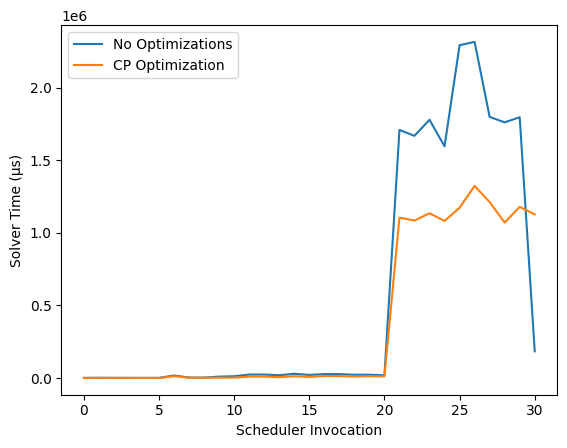

In [31]:
plt.plot(noopt_runtimes_ms, label="No Optimizations")
plt.plot(opt_runtimes_ms, label="CP Optimization")
plt.xlabel("Scheduler Invocation")
plt.ylabel("Solver Time (µs)")
plt.legend()
plt.savefig('output.jpg')

In [17]:
improvement = []
for noopt, opt in zip(noopt_runtimes_ms, opt_runtimes_ms):
    improvement.append(noopt - opt)

In [39]:
opt_without_caching = """1064>.
1482>.
1085>.
1151>.
891>.
939>.
13095>.
3877>.
3472>.
8661>.
10230>.
16611>.
15332>.
12608>.
24100>.
14180>.
16198>.
14492>.
28203>.
12506>.
12222>.
1263165>.
544951>.
900064>.
749777>.
1522004>.
735433>.
705826>.
910527>.
1226885>.
1302033>."""

In [40]:
opt_without_caching = list(map(int, [v[:-2] for v in opt_without_caching.split()]))

In [41]:
opt_without_caching

[1064,
 1482,
 1085,
 1151,
 891,
 939,
 13095,
 3877,
 3472,
 8661,
 10230,
 16611,
 15332,
 12608,
 24100,
 14180,
 16198,
 14492,
 28203,
 12506,
 12222,
 1263165,
 544951,
 900064,
 749777,
 1522004,
 735433,
 705826,
 910527,
 1226885,
 1302033]

In [66]:
opt_with_caching = """1117>.
1548>.
1184>.
1474>.
1127>.
1395>.
10880>.
3658>.
3025>.
3537>.
5368>.
15274>.
12158>.
7753>.
32622>.
17364>.
16764>.
15951>.
15299>.
15450>.
13155>.
699688>.
262194>.
404321>.
246273>.
275199>.
257306>.
250361>.
247343>.
268482>.
255027>."""

In [67]:
opt_with_caching = list(map(int, [v[:-2] for v in opt_with_caching.split()]))

In [29]:
improvement = []
for noopt, opt in zip(opt_without_caching, opt_with_caching):
    improvement.append(noopt - opt)

In [36]:
improvement

[-2,
 216,
 80,
 69,
 87,
 45,
 3365,
 650,
 181,
 -440,
 2547,
 -1086,
 -1071,
 -751,
 214,
 -346,
 69,
 405,
 112,
 1074,
 1523,
 314558,
 365038,
 282038,
 286418,
 -277620,
 358055,
 411493,
 56211,
 -123769,
 434209]

In [37]:
len(opt_without_caching)

30

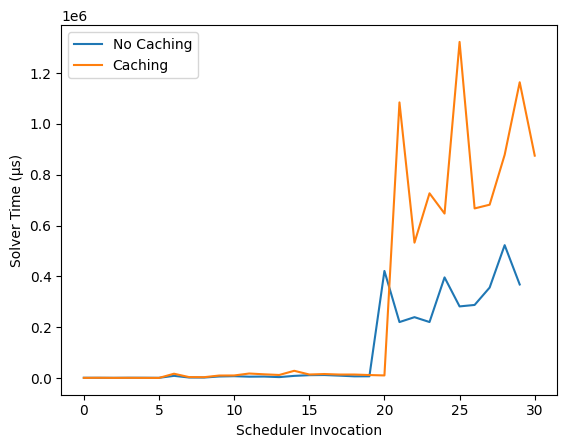

In [38]:
plt.plot(opt_without_caching, label="No Caching")
plt.plot(opt_with_caching, label="Caching")
plt.xlabel("Scheduler Invocation")
plt.ylabel("Solver Time (µs)")
plt.legend()
plt.savefig('output.jpg')

In [31]:
np.percentile(improvement, 50)

214.0

In [32]:
np.percentile(improvement, 95)

388265.5

In [68]:
opt_with_caching

[1117,
 1548,
 1184,
 1474,
 1127,
 1395,
 10880,
 3658,
 3025,
 3537,
 5368,
 15274,
 12158,
 7753,
 32622,
 17364,
 16764,
 15951,
 15299,
 15450,
 13155,
 699688,
 262194,
 404321,
 246273,
 275199,
 257306,
 250361,
 247343,
 268482,
 255027]

In [42]:
opt_without_caching

[1064,
 1482,
 1085,
 1151,
 891,
 939,
 13095,
 3877,
 3472,
 8661,
 10230,
 16611,
 15332,
 12608,
 24100,
 14180,
 16198,
 14492,
 28203,
 12506,
 12222,
 1263165,
 544951,
 900064,
 749777,
 1522004,
 735433,
 705826,
 910527,
 1226885,
 1302033]

In [44]:
conservative_presolve_no_warm_start_declining_utilities = [1064,
 1482,
 1085,
 1151,
 891,
 939,
 13095,
 3877,
 3472,
 8661,
 10230,
 16611,
 15332,
 12608,
 24100,
 14180,
 16198,
 14492,
 28203,
 12506,
 12222,
 1263165,
 544951,
 900064,
 749777,
 1522004,
 735433,
 705826,
 910527,
 1226885,
 1302033]

In [48]:
conservative_presolve_no_warm_start_static_utilities = [874,
 1448,
 1083,
 1124,
 1096,
 1120,
 6201,
 2590,
 2319,
 2993,
 4434,
 13639,
 11164,
 7502,
 14798,
 13641,
 14872,
 14990,
 13701,
 12987,
 12557,
 421863,
 258936,
 392203,
 342409,
 565918,
 269221,
 274277,
 375383,
 698078,
 505756]

In [52]:
aggressive_presolve_no_warm_start_declining_utilities = [991,
 1734,
 1059,
 1563,
 1191,
 813,
 15710,
 4242,
 3824,
 9840,
 12752,
 15399,
 14419,
 12591,
 23437,
 13777,
 17229,
 15678,
 16629,
 13464,
 12737,
 903399,
 899506,
 1027705,
 942076,
 1032409,
 1014650,
 960887,
 1131031,
 1085454,
 1128216]

In [ ]:
aggressive_presolve_no_warm_start_static_utilities = [1517,
 2100,
 1234,
 1239,
 1242,
 1808,
 6302,
 2689,
 2418,
 2425,
 4115,
 10111,
 9983,
 8259,
 17145,
 14905,
 16421,
 18150,
 15257,
 14748,
 14158,
 758863,
 860565,
 877896,
 878734,
 884004,
 863214,
 850750,
 848380,
848539,
 892795,
 931498]

In [64]:
aggressive_presolve_warm_start_declining_utilities = [1105,
 1662,
 1759,
 1343,
 1043,
 952,
 20143,
 4617,
 3776,
 9263,
 13080,
 16846,
 13689,
 11561,
 29346,
 14611,
 17072,
 15166,
 15281,
 14318,
 12058,
 1407510,
 906090,
 1012493,
 934422,
 1019022,
 988171,
 1013368,
 1019954,
 1172149,
 1078670]

In [71]:
aggressive_presolve_warm_start_declining_utilities = [1105,
 1662,
 1759,
 1343,
 1043,
 952,
 20143,
 4617,
 3776,
 9263,
 13080,
 16846,
 13689,
 11561,
 29346,
 14611,
 17072,
 15166,
 15281,
 14318,
 12058,
 1407510,
 906090,
 1012493,
 934422,
 1019022,
 988171,
 1013368,
 1019954,
 1172149,
 1078670]

In [72]:
conservative_presolve_warm_start_static_utilities = [1117,
 1548,
 1184,
 1474,
 1127,
 1395,
 10880,
 3658,
 3025,
 3537,
 5368,
 15274,
 12158,
 7753,
 32622,
 17364,
 16764,
 15951,
 15299,
 15450,
 13155,
 699688,
 262194,
 404321,
 246273,
 275199,
 257306,
 250361,
 247343,
 268482,
 255027]

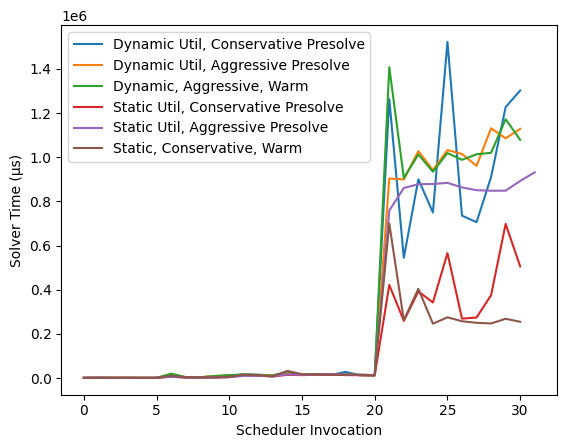

In [74]:
plt.plot(conservative_presolve_no_warm_start_declining_utilities, label="Dynamic Util, Conservative Presolve")
plt.plot(aggressive_presolve_no_warm_start_declining_utilities, label="Dynamic Util, Aggressive Presolve")
plt.plot(aggressive_presolve_warm_start_declining_utilities, label="Dynamic, Aggressive, Warm")
plt.plot(conservative_presolve_no_warm_start_static_utilities, label="Static Util, Conservative Presolve")
plt.plot(aggressive_presolve_no_warm_start_static_utilities, label="Static Util, Aggressive Presolve")
plt.plot(conservative_presolve_warm_start_static_utilities, label="Static, Conservative, Warm")
plt.xlabel("Scheduler Invocation")
plt.ylabel("Solver Time (µs)")
plt.legend()
plt.savefig('output_2.jpg')

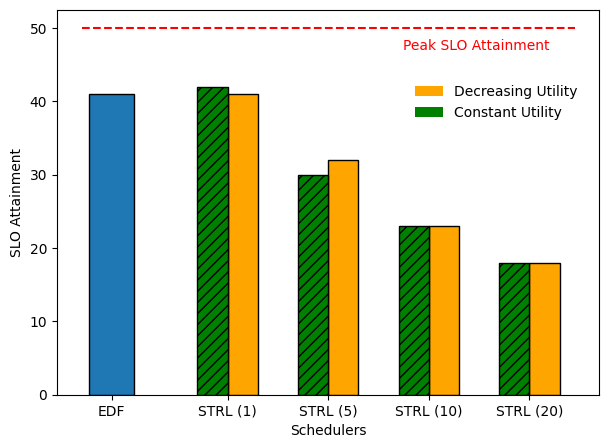

In [488]:
schedulers = ["EDF", "STRL (1)", "STRL (5)", "STRL (10)", "STRL (20)"]
types = ("Decreasing Utility", "Constant Utility")
goodputs =   [(41, 41), (41, 42), (32, 30), (23, 23), (18, 18)]
x = np.arange(1, len(schedulers) + 1)
barWidth = 0.30

dynamic_utility_color = "orange"
static_utility_color = "green"

fig = plt.figure(figsize=(7, 5))
dynamic_bar = plt.bar(x[0], goodputs[0][0], width=1.5*barWidth, edgecolor="black")
static_bar = plt.bar(x[1:] + barWidth * 1, [dynamic_utility for dynamic_utility, _ in goodputs[1:]], width=barWidth, edgecolor="black", color=dynamic_utility_color)
plt.bar(x[1:] + barWidth * 0, [static_utility for _, static_utility in goodputs[1:]], width=barWidth, edgecolor="black", hatch="///", color=static_utility_color)
plt.xticks([x[0]] + [r + (barWidth / 2) for r in x[1:]], schedulers)
plt.plot([x[0] - barWidth, x[-1] + barWidth*2], [50, 50], '--', color='red')
fig.text(0.62, 0.80, "Peak SLO Attainment", fontsize=10, color='red')
plt.xlabel("Schedulers")
plt.ylabel("SLO Attainment")
legend_elements = [
    Patch(facecolor=dynamic_utility_color, label=types[0]),
    Patch(facecolor=static_utility_color, label=types[1]),
]
plt.legend(handles=legend_elements, loc=(0.65, 0.70), framealpha=0)
plt.savefig("dynamic_vs_static_util.jpg")

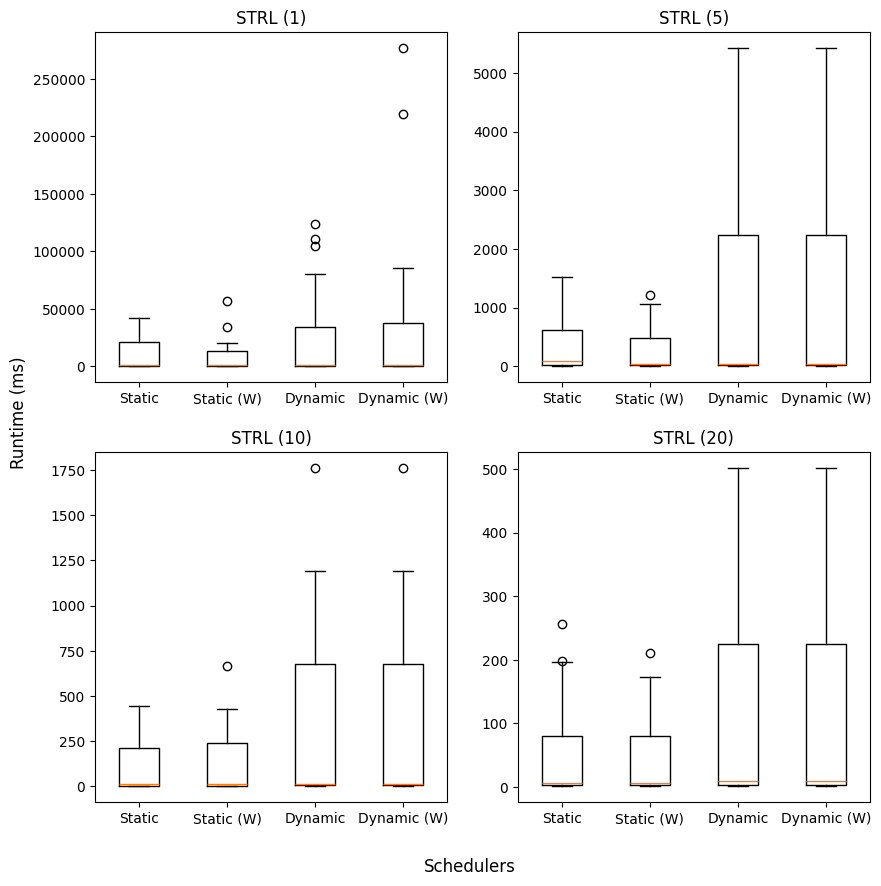

In [82]:
def to_ms(k):
    return [x / 1000 for x in k]
    
strl_1_static_no_warm_start_runtimes_ms  = to_ms([2030,2293,2963,2472,2147,2320,247180,97970,92686,342068,407641,207092,198771,197555,187268,2037689,1889106,1032605,826889,896809,970100,27199056,26938152,29676233,20180999,29098006,31476406,14569346,21785466,15349568,41714793,32396992])
strl_5_static_no_warm_start_runtimes_ms  = to_ms([1596,1960,1736,1469,1732,1508,20978,9010,8139,17001,36983,32083,30772,26480,26685,100576,83372,95627,84497,80709,83365,1263659,962173,809758,956296,1524611,664276,605901,600914,583320,1354174,1255043])
strl_10_static_no_warm_start_runtimes_ms = to_ms([1281,1681,1252,1342,1317,1354,6105,2969,2401,3372,4721,13684,10960,7588,15121,11946,14339,14381,13026,12097,12027,364282,228192,357660,262642,416403,238617,192456,192177,444486,443569])
strl_20_static_no_warm_start_runtimes_ms = to_ms([1584,1419,1528,1298,1353,1348,4374,2463,2273,4391,5758,5619,5585,4086,6117,6002,6151,6143,5651,5847,5418,197318,79202,164073,158970,117716,80601,80184,143634,195981,255443])

strl_static_no_warm_start_runtimes_ms = {
    "STRL (1)": strl_1_static_no_warm_start_runtimes_ms,
    "STRL (5)": strl_5_static_no_warm_start_runtimes_ms,
    "STRL (10)": strl_10_static_no_warm_start_runtimes_ms,
    "STRL (20)": strl_20_static_no_warm_start_runtimes_ms,
}

strl_1_static_warm_start_runtimes_ms = to_ms([1883,2571,3703,2670,2515,1680,374028,72872,70763,131390,175260,292605,230180,191693,3839016,1148364,1161387,986157,1121519,1118484,33633995,14009713,14030552,13458864,14277244,14402819,11656665,19820418,56294224,12862721])
strl_5_static_warm_start_runtimes_ms = to_ms([1600,2012,1896,1774,1409,1899,31675,9602,8330,18710,39473,27832,28451,24215,24571,129518,51090,53027,47847,48238,40726,43872,1216497,500130,876209,482647,529482,541091,449192,854223,1062636,541680])
strl_10_static_warm_start_runtimes_ms = to_ms([1535,1891,1256,1724,1150,1517,10351,4088,3406,3776,5258,13987,10588,7274,20069,14009,15934,14052,14016,13617,11258,664376,259183,425439,266168,240736,236781,218066,335936,397112,261643])
strl_20_static_warm_start_runtimes_ms = to_ms([1298,1194,1631,1357,1152,1527,7178,2550,2216,5352,6887,5262,5787,3391,7761,6658,7098,6301,6124,7164,5617,210901,85112,150854,78179,172202,86254,78855,80480,89434,89581])

strl_static_warm_start_runtimes_ms = {
    "STRL (1)": strl_1_static_warm_start_runtimes_ms,
    "STRL (5)": strl_5_static_warm_start_runtimes_ms,
    "STRL (10)": strl_10_static_warm_start_runtimes_ms,
    "STRL (20)": strl_20_static_warm_start_runtimes_ms,
}
strl_1_dynamic_no_warm_start_runtimes_ms = to_ms([1689,6267,2517,1687,1333,1555,349566,81823,62084,51351,83347,93829,463411,188310,184929,176418,2210817,894137,1004471,797859,875564,910180,765265,104926041,36402512,37613041,40854672,79932199,124095063,23744411,56015535,27124419,71550118,110328011])
strl_5_dynamic_no_warm_start_runtimes_ms = to_ms([1291,2027,1958,1628,1505,1562,30186,17670,11344,21420,30933,28728,28489,28129,28830,84083,38816,39385,37360,31549,34520,5426696,2218422,2603040,2419242,4655578,2320628,2182832,2136493,2609968,3081327,3505669])
strl_10_dynamic_no_warm_start_runtimes_ms = to_ms([1315,1704,1316,1387,1412,1245,13998,3969,3802,8930,10678,17290,15563,12760,25763,15019,16946,15160,15040,12598,12299,1169280,531365,681459,841011,1762204,702667,674862,867471,1191349,1088171])
strl_20_dynamic_no_warm_start_runtimes_ms = to_ms([1384,1171,1559,1444,1352,1567,9014,2623,2826,7670,8833,6277,6211,4404,9598,9096,10027,9478,6417,6366,241154,187748,231493,202265,357099,283316,292086,308741,403208,501838])

strl_dynamic_no_warm_start_runtimes_ms = {
    "STRL (1)": strl_1_dynamic_no_warm_start_runtimes_ms,
    "STRL (5)": strl_5_dynamic_no_warm_start_runtimes_ms,
    "STRL (10)": strl_10_dynamic_no_warm_start_runtimes_ms,
    "STRL (20)": strl_20_dynamic_no_warm_start_runtimes_ms,
}

strl_1_dynamic_warm_start_runtimes_ms = to_ms([1755,6333,3482,1932,1550,1462,360168,95262,52208,49583,100591,107079,266423,196205,195512,178036,4201637,1326842,1133272,797050,1016890,1046577,1218198,219869212,38425736,38804164,37587909,57760030,277125760,36447261,79926798,32903111,79970865,85830718])
strl_5_dynamic_warm_start_runtimes_ms = to_ms([1277,1873,2109,1965,1677,1878,45980,17435,11644,24874,37662,27580,28355,23901,23723,95358,34420,36010,30057,30883,34395,27544,3917211,1946238,1844160,1888168,3772761,2154281,2412738,2858039,2031974,2141093,2998560])
strl_10_dynamic_warm_start_runtimes_ms = to_ms([1706,2016,1658,1510,1666,1583,18649,4156,4261,10985,11274,19059,15919,12241,29680,14536,16904,14933,14824,13849,11432,1055416,564974,685690,620544,1329671,739235,655340,878405,1111989,845258])
strl_20_dynamic_warm_start_runtimes_ms = to_ms([1628,1049,1536,1271,1237,1398,9085,2928,2393,6554,7884,5923,6342,4162,12538,9327,10983,9384,6573,6751,381484,199947,225322,199237,539533,267410,284606,306372,445345,400823])

strl_dynamic_warm_start_runtimes_ms = {
    "STRL (1)": strl_1_dynamic_warm_start_runtimes_ms,
    "STRL (5)": strl_5_dynamic_warm_start_runtimes_ms,
    "STRL (10)": strl_10_dynamic_warm_start_runtimes_ms,
    "STRL (20)": strl_20_dynamic_warm_start_runtimes_ms,
}

schedulers = ["STRL (1)", "STRL (5)", "STRL (10)", "STRL (20)"]

fig = plt.figure(figsize=(10, 10))
axs = fig.subplots(2, 2)
axs[0, 0].set_title("STRL (1)")
axs[0, 0].boxplot([
    strl_1_static_no_warm_start_runtimes_ms,
    strl_1_static_warm_start_runtimes_ms,
    strl_1_dynamic_no_warm_start_runtimes_ms,
    strl_1_dynamic_warm_start_runtimes_ms,
], labels=[
    "Static",
    "Static (W)",
    "Dynamic",
    "Dynamic (W)",
])

axs[0, 1].set_title("STRL (5)")
axs[0, 1].boxplot([
    strl_5_static_no_warm_start_runtimes_ms,
    strl_5_static_warm_start_runtimes_ms,
    strl_5_dynamic_no_warm_start_runtimes_ms,
    strl_5_dynamic_no_warm_start_runtimes_ms,
], labels=[
    "Static",
    "Static (W)",
    "Dynamic",
    "Dynamic (W)",
])

axs[1, 0].set_title("STRL (10)")
axs[1, 0].boxplot([
    strl_10_static_no_warm_start_runtimes_ms,
    strl_10_static_warm_start_runtimes_ms,
    strl_10_dynamic_no_warm_start_runtimes_ms,
    strl_10_dynamic_no_warm_start_runtimes_ms,
], labels=[
    "Static",
    "Static (W)",
    "Dynamic",
    "Dynamic (W)",
])

axs[1, 1].set_title("STRL (20)")
axs[1, 1].boxplot([
    strl_20_static_no_warm_start_runtimes_ms,
    strl_20_static_warm_start_runtimes_ms,
    strl_20_dynamic_no_warm_start_runtimes_ms,
    strl_20_dynamic_no_warm_start_runtimes_ms,
], labels=[
    "Static",
    "Static (W)",
    "Dynamic",
    "Dynamic (W)",
])

fig.text(0.5, 0.04, 'Schedulers', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Runtime (ms)', va='center', rotation='vertical', fontsize=12)

plt.savefig('strl_runtime_ms.jpg')

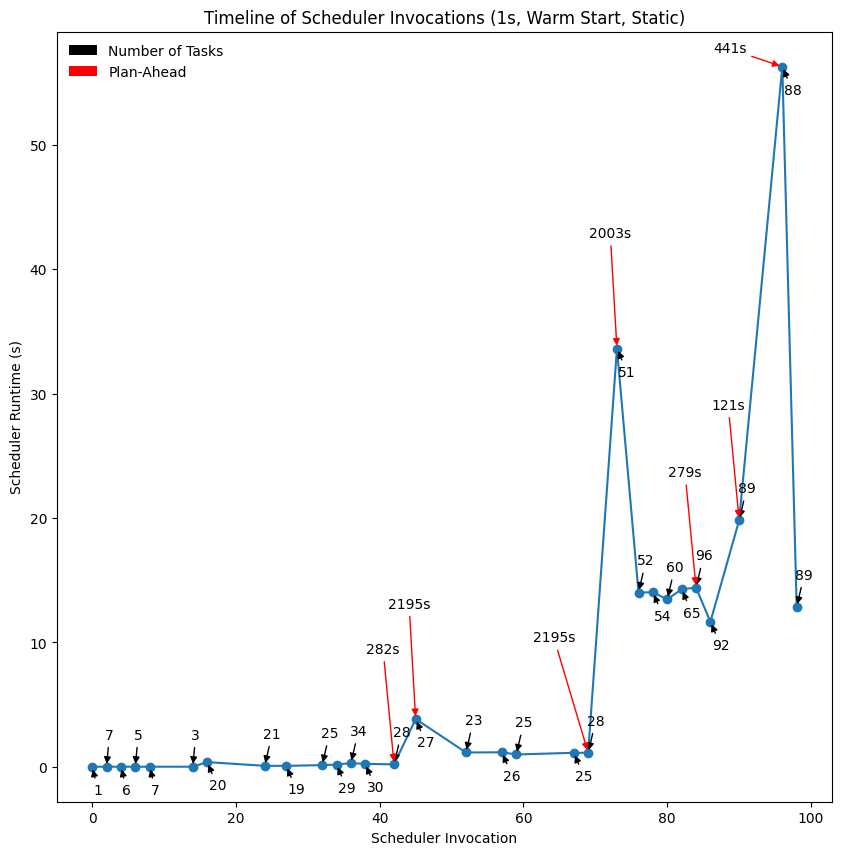

In [289]:
strl_1_static_warm_start_runtimes_s = [x / 1000 for x in strl_1_static_warm_start_runtimes_ms]
scheduler_start_time_static_warm_start = [0,2,4,6,8,14,16,24,27,32,34,36,38,42,45,52,57,59,67,69,73,76,78,80,82,84,86,90,96,98]
scheduler_static_warm_start_num_tasks =  [1,7,6,5,7, 3,20,21,19,25,29,34,30,28,27,23,26,25,25,28,51,52,54,60,65,96,92,89,88,89]
fig = plt.figure(figsize=(10, 10))

for i, tasks in enumerate(scheduler_static_warm_start_num_tasks):
    plt.annotate(
        str(tasks),
        (scheduler_start_time_static_warm_start[i], strl_1_static_warm_start_runtimes_s[i]), 
        xytext=(1, -20) if i % 2 == 0 else (-1, 20),
        textcoords="offset points",
        arrowprops={'arrowstyle': '-|>', 'color': 'black'})

# Annotate inflection points
task_28_scheduler_time = scheduler_static_warm_start_num_tasks.index(28)
plt.annotate(
    '282s',
    (scheduler_start_time_static_warm_start[task_28_scheduler_time], strl_1_static_warm_start_runtimes_s[task_28_scheduler_time]),
    xytext=(-20, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
task_27_scheduler_time = scheduler_static_warm_start_num_tasks.index(27)
plt.annotate(
    '2195s',
    (scheduler_start_time_static_warm_start[task_27_scheduler_time], strl_1_static_warm_start_runtimes_s[task_27_scheduler_time]),
    xytext=(-20, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
second_task_28_scheduler_time = scheduler_static_warm_start_num_tasks.index(28, task_28_scheduler_time+1)
plt.annotate(
    '2195s',
    (scheduler_start_time_static_warm_start[second_task_28_scheduler_time], strl_1_static_warm_start_runtimes_s[second_task_28_scheduler_time]),
    xytext=(-40, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
task_51_scheduler_time = scheduler_static_warm_start_num_tasks.index(51)
plt.annotate(
    '2003s',
    (scheduler_start_time_static_warm_start[task_51_scheduler_time], strl_1_static_warm_start_runtimes_s[task_51_scheduler_time]),
    xytext=(-20, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
task_96_scheduler_time = scheduler_static_warm_start_num_tasks.index(96)
plt.annotate(
    '279s',
    (scheduler_start_time_static_warm_start[task_96_scheduler_time], strl_1_static_warm_start_runtimes_s[task_96_scheduler_time]),
    xytext=(-20, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
task_89_scheduler_time = scheduler_static_warm_start_num_tasks.index(89)
plt.annotate(
    '121s',
    (scheduler_start_time_static_warm_start[task_89_scheduler_time], strl_1_static_warm_start_runtimes_s[task_89_scheduler_time]),
    xytext=(-20, 80),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)
task_88_scheduler_time = scheduler_static_warm_start_num_tasks.index(88)
plt.annotate(
    '441s',
    (scheduler_start_time_static_warm_start[task_88_scheduler_time], strl_1_static_warm_start_runtimes_s[task_88_scheduler_time]),
    xytext=(-50, 10),
    textcoords="offset points",
    arrowprops={'arrowstyle': '-|>', 'color': 'red'}
)

plt.plot(scheduler_start_time_static_warm_start, strl_1_static_warm_start_runtimes_s, marker='o')
plt.ylabel("Scheduler Runtime (s)")
plt.xlabel("Scheduler Invocation")
plt.title("Timeline of Scheduler Invocations (1s, Warm Start, Static)")
legend_elements = [
    Patch(facecolor='black', label="Number of Tasks"),
    Patch(facecolor='red', label="Plan-Ahead"),
]
plt.legend(handles=legend_elements, framealpha=0)

In [275]:
task_65_tasks = """'M1@j_2894565@0 (1µs, 84µs)', 'M3@j_2894565@0 (1µs, 84µs)', 'M2@j_2894565@0 (1µs, 84µs)', 'R4@j_2894565@0 (1µs, 84µs)', 'R2@j_3637946@0 (40µs, 255µs)', 'R3@j_3637946@0 (41µs, 255µs)', 'M1@j_2818427@0 (3µs, 125µs)', 'R2@j_2818427@0 (4µs, 125µs)', 'R3@j_2818427@0 (4µs, 125µs)', 'M4@j_2818427@0 (13µs, 125µs)', 'R5@j_2818427@0 (1µs, 125µs)', 'R2@j_1015056@0 (600µs, 2195µs)', 'M1@j_2962091@0 (38µs, 124µs)', 'J4@j_557089@0 (1µs, 222µs)', 'R5@j_557089@0 (54µs, 222µs)', 'R3@j_2524953@0 (3µs, 237µs)', 'R4@j_2524953@0 (3µs, 237µs)', 'M5@j_2524953@0 (20µs, 237µs)', 'R6@j_2524953@0 (29µs, 237µs)', 'R7@j_2524953@0 (55µs, 237µs)', 'J4@j_787818@0 (14µs, 128µs)', 'R5@j_787818@0 (14µs, 128µs)', 'R2@j_3641743@0 (45µs, 167µs)', 'M1@j_1899282@0 (24µs, 293µs)', 'R2@j_1899282@0 (108µs, 293µs)', 'M3@j_511911@0 (43µs, 504µs)', 'M1@j_511911@0 (1µs, 504µs)', 'R2@j_511911@0 (2µs, 504µs)', 'M4@j_511911@0 (50µs, 504µs)', 'J5@j_511911@0 (205µs, 504µs)', 'M7@j_353101@0 (14µs, 2003µs)', 'M9@j_353101@0 (18µs, 2003µs)', 'J12@j_353101@0 (206µs, 2003µs)', 'J13@j_353101@0 (158µs, 2003µs)', 'M15@j_353101@0 (11µs, 2003µs)', 'R8@j_353101@0 (1µs, 2003µs)', 'R16@j_353101@0 (9µs, 2003µs)', 'R20@j_353101@0 (1µs, 2003µs)', 'R2@j_353101@0 (1µs, 2003µs)', 'M3@j_353101@0 (5µs, 2003µs)', 'M22@j_353101@0 (4µs, 2003µs)', 'J4@j_353101@0 (34µs, 2003µs)', 'M21@j_353101@0 (14µs, 2003µs)', 'J14@j_353101@0 (396µs, 2003µs)', 'J17@j_353101@0 (128µs, 2003µs)', 'J18@j_353101@0 (178µs, 2003µs)', 'J5@j_353101@0 (20µs, 2003µs)', 'J23@j_353101@0 (42µs, 2003µs)', 'R1@j_353101@0 (7µs, 2003µs)', 'R24@j_353101@0 (9µs, 2003µs)', 'J25@j_353101@0 (13µs, 2003µs)', 'R6@j_353101@0 (8µs, 2003µs)', 'J26@j_353101@0 (97µs, 2003µs)', 'R4@j_3720649@0 (6µs, 112µs)', 'R2@j_3720649@0 (17µs, 112µs)', 'J5@j_3720649@0 (2µs, 112µs)', 'R6@j_3720649@0 (1µs, 112µs)', 'R2@j_905043@0 (7µs, 98µs)', 'M7@j_1345171@0 (2µs, 282µs)', 'R8@j_1345171@0 (1µs, 282µs)', 'M9@j_1345171@0 (2µs, 282µs)', 'J5@j_1345171@0 (25µs, 282µs)', 'R6@j_1345171@0 (25µs, 282µs)', 'J10@j_1345171@0 (15µs, 282µs)', 'R11@j_1345171@0 (1µs, 282µs)'"""
task_65_tasks = dict([[x.lstrip("'").strip("'") for x in t.split(' ', 1)] for t in task_65_tasks.split(", '")])

In [278]:
task_96_tasks = """'R2@j_3637946@0 (40µs, 255µs)', 'R3@j_3637946@0 (41µs, 255µs)', 'R2@j_2818427@0 (4µs, 125µs)', 'R3@j_2818427@0 (4µs, 125µs)', 'M4@j_2818427@0 (13µs, 125µs)', 'R5@j_2818427@0 (1µs, 125µs)', 'R2@j_1015056@0 (600µs, 2195µs)', 'M14@j_722464@0 (4µs, 128µs)', 'M15@j_722464@0 (6µs, 128µs)', 'M16@j_722464@0 (5µs, 128µs)', 'M18@j_722464@0 (2µs, 128µs)', 'M6@j_722464@0 (4µs, 128µs)', 'M17@j_722464@0 (6µs, 128µs)', 'M2@j_722464@0 (12µs, 128µs)', 'M3@j_722464@0 (4µs, 128µs)', 'M4@j_722464@0 (5µs, 128µs)', 'R5@j_722464@0 (1µs, 128µs)', 'R19@j_722464@0 (1µs, 128µs)', 'R20@j_722464@0 (1µs, 128µs)', 'M1@j_722464@0 (1µs, 128µs)', 'M9@j_722464@0 (4µs, 128µs)', 'M8@j_722464@0 (3µs, 128µs)', 'M10@j_722464@0 (6µs, 128µs)', 'M7@j_722464@0 (3µs, 128µs)', 'J11@j_722464@0 (2µs, 128µs)', 'R12@j_722464@0 (15µs, 128µs)', 'R13@j_722464@0 (1µs, 128µs)', 'J21@j_722464@0 (4µs, 128µs)', 'M1@j_2962091@0 (38µs, 124µs)', 'J4@j_557089@0 (1µs, 222µs)', 'R5@j_557089@0 (54µs, 222µs)', 'R3@j_2524953@0 (3µs, 237µs)', 'R4@j_2524953@0 (3µs, 237µs)', 'M5@j_2524953@0 (20µs, 237µs)', 'R6@j_2524953@0 (29µs, 237µs)', 'R7@j_2524953@0 (55µs, 237µs)', 'J4@j_787818@0 (14µs, 128µs)', 'R5@j_787818@0 (14µs, 128µs)', 'R2@j_3641743@0 (45µs, 167µs)', 'M1@j_1899282@0 (24µs, 293µs)', 'R2@j_1899282@0 (108µs, 293µs)', 'M9@j_3309303@0 (7µs, 279µs)', 'M1@j_3309303@0 (2µs, 279µs)', 'M3@j_3309303@0 (2µs, 279µs)', 'M8@j_3309303@0 (1µs, 279µs)', 'M14@j_3309303@0 (9µs, 279µs)', 'M5@j_3309303@0 (6µs, 279µs)', 'R6@j_3309303@0 (6µs, 279µs)', 'M7@j_3309303@0 (29µs, 279µs)', 'M13@j_3309303@0 (6µs, 279µs)', 'M10@j_3309303@0 (6µs, 279µs)', 'R11@j_3309303@0 (6µs, 279µs)', 'J12@j_3309303@0 (9µs, 279µs)', 'R2@j_3309303@0 (6µs, 279µs)', 'J4@j_3309303@0 (2µs, 279µs)', 'J15@j_3309303@0 (31µs, 279µs)', 'R16@j_3309303@0 (31µs, 279µs)', 'M3@j_511911@0 (43µs, 504µs)', 'M1@j_511911@0 (1µs, 504µs)', 'R2@j_511911@0 (2µs, 504µs)', 'M4@j_511911@0 (50µs, 504µs)', 'J5@j_511911@0 (205µs, 504µs)', 'M7@j_353101@0 (14µs, 2003µs)', 'M9@j_353101@0 (18µs, 2003µs)', 'J12@j_353101@0 (206µs, 2003µs)', 'J13@j_353101@0 (158µs, 2003µs)', 'M15@j_353101@0 (11µs, 2003µs)', 'R8@j_353101@0 (1µs, 2003µs)', 'R16@j_353101@0 (9µs, 2003µs)', 'R20@j_353101@0 (1µs, 2003µs)', 'R2@j_353101@0 (1µs, 2003µs)', 'M3@j_353101@0 (5µs, 2003µs)', 'M22@j_353101@0 (4µs, 2003µs)', 'J4@j_353101@0 (34µs, 2003µs)', 'M21@j_353101@0 (14µs, 2003µs)', 'J14@j_353101@0 (396µs, 2003µs)', 'J17@j_353101@0 (128µs, 2003µs)', 'J18@j_353101@0 (178µs, 2003µs)', 'J5@j_353101@0 (20µs, 2003µs)', 'J23@j_353101@0 (42µs, 2003µs)', 'R1@j_353101@0 (7µs, 2003µs)', 'R24@j_353101@0 (9µs, 2003µs)', 'J25@j_353101@0 (13µs, 2003µs)', 'R6@j_353101@0 (8µs, 2003µs)', 'J26@j_353101@0 (97µs, 2003µs)', 'R4@j_3720649@0 (6µs, 112µs)', 'R2@j_3720649@0 (17µs, 112µs)', 'J5@j_3720649@0 (2µs, 112µs)', 'R6@j_3720649@0 (1µs, 112µs)', 'R2@j_905043@0 (7µs, 98µs)', 'R8@j_1345171@0 (1µs, 282µs)', 'M9@j_1345171@0 (2µs, 282µs)', 'J5@j_1345171@0 (25µs, 282µs)', 'R6@j_1345171@0 (25µs, 282µs)', 'J10@j_1345171@0 (15µs, 282µs)', 'R11@j_1345171@0 (1µs, 282µs)'"""
task_96_tasks = dict([[x.lstrip("'").strip("'") for x in t.split(' ', 1)] for t in task_96_tasks.split(", '")])

In [279]:
for key, val in task_96_tasks.items():
    if key not in task_65_tasks:
        print(val)

(4µs, 128µs)
(6µs, 128µs)
(5µs, 128µs)
(2µs, 128µs)
(4µs, 128µs)
(6µs, 128µs)
(12µs, 128µs)
(4µs, 128µs)
(5µs, 128µs)
(1µs, 128µs)
(1µs, 128µs)
(1µs, 128µs)
(1µs, 128µs)
(4µs, 128µs)
(3µs, 128µs)
(6µs, 128µs)
(3µs, 128µs)
(2µs, 128µs)
(15µs, 128µs)
(1µs, 128µs)
(4µs, 128µs)
(7µs, 279µs)
(2µs, 279µs)
(2µs, 279µs)
(1µs, 279µs)
(9µs, 279µs)
(6µs, 279µs)
(6µs, 279µs)
(29µs, 279µs)
(6µs, 279µs)
(6µs, 279µs)
(6µs, 279µs)
(9µs, 279µs)
(6µs, 279µs)
(2µs, 279µs)
(31µs, 279µs)
(31µs, 279µs)


In [282]:
task_89_tasks = """'R2@j_3637946@0 (40µs, 255µs)', 'R3@j_3637946@0 (41µs, 255µs)', 'R2@j_2818427@0 (4µs, 125µs)', 'R3@j_2818427@0 (4µs, 125µs)', 'M4@j_2818427@0 (13µs, 125µs)', 'R5@j_2818427@0 (1µs, 125µs)', 'M1@j_2991989@0 (1µs, 93µs)', 'R2@j_2991989@0 (1µs, 93µs)', 'R2@j_1015056@0 (600µs, 2195µs)', 'M15@j_722464@0 (6µs, 128µs)', 'M16@j_722464@0 (5µs, 128µs)', 'M18@j_722464@0 (2µs, 128µs)', 'M6@j_722464@0 (4µs, 128µs)', 'M17@j_722464@0 (6µs, 128µs)', 'M2@j_722464@0 (12µs, 128µs)', 'M3@j_722464@0 (4µs, 128µs)', 'R5@j_722464@0 (1µs, 128µs)', 'R19@j_722464@0 (1µs, 128µs)', 'R20@j_722464@0 (1µs, 128µs)', 'M1@j_722464@0 (1µs, 128µs)', 'M8@j_722464@0 (3µs, 128µs)', 'J11@j_722464@0 (2µs, 128µs)', 'R12@j_722464@0 (15µs, 128µs)', 'R13@j_722464@0 (1µs, 128µs)', 'J21@j_722464@0 (4µs, 128µs)', 'J4@j_557089@0 (1µs, 222µs)', 'R5@j_557089@0 (54µs, 222µs)', 'R3@j_2524953@0 (3µs, 237µs)', 'R4@j_2524953@0 (3µs, 237µs)', 'M5@j_2524953@0 (20µs, 237µs)', 'R6@j_2524953@0 (29µs, 237µs)', 'R7@j_2524953@0 (55µs, 237µs)', 'J4@j_787818@0 (14µs, 128µs)', 'R5@j_787818@0 (14µs, 128µs)', 'R2@j_3641743@0 (45µs, 167µs)', 'M1@j_1899282@0 (24µs, 293µs)', 'R2@j_1899282@0 (108µs, 293µs)', 'M1@j_443298@0 (18µs, 121µs)', 'M9@j_3309303@0 (7µs, 279µs)', 'M1@j_3309303@0 (2µs, 279µs)', 'M3@j_3309303@0 (2µs, 279µs)', 'M8@j_3309303@0 (1µs, 279µs)', 'M14@j_3309303@0 (9µs, 279µs)', 'M5@j_3309303@0 (6µs, 279µs)', 'R6@j_3309303@0 (6µs, 279µs)', 'M7@j_3309303@0 (29µs, 279µs)', 'M13@j_3309303@0 (6µs, 279µs)', 'M10@j_3309303@0 (6µs, 279µs)', 'R11@j_3309303@0 (6µs, 279µs)', 'J12@j_3309303@0 (9µs, 279µs)', 'R2@j_3309303@0 (6µs, 279µs)', 'J4@j_3309303@0 (2µs, 279µs)', 'J15@j_3309303@0 (31µs, 279µs)', 'R16@j_3309303@0 (31µs, 279µs)', 'M3@j_511911@0 (43µs, 504µs)', 'M4@j_511911@0 (50µs, 504µs)', 'J5@j_511911@0 (205µs, 504µs)', 'M7@j_353101@0 (14µs, 2003µs)', 'M9@j_353101@0 (18µs, 2003µs)', 'J13@j_353101@0 (158µs, 2003µs)', 'M15@j_353101@0 (11µs, 2003µs)', 'R8@j_353101@0 (1µs, 2003µs)', 'R16@j_353101@0 (9µs, 2003µs)', 'R20@j_353101@0 (1µs, 2003µs)', 'R2@j_353101@0 (1µs, 2003µs)', 'M3@j_353101@0 (5µs, 2003µs)', 'M22@j_353101@0 (4µs, 2003µs)', 'J4@j_353101@0 (34µs, 2003µs)', 'M21@j_353101@0 (14µs, 2003µs)', 'J14@j_353101@0 (396µs, 2003µs)', 'J17@j_353101@0 (128µs, 2003µs)', 'J18@j_353101@0 (178µs, 2003µs)', 'J5@j_353101@0 (20µs, 2003µs)', 'J23@j_353101@0 (42µs, 2003µs)', 'R1@j_353101@0 (7µs, 2003µs)', 'R24@j_353101@0 (9µs, 2003µs)', 'J25@j_353101@0 (13µs, 2003µs)', 'R6@j_353101@0 (8µs, 2003µs)', 'J26@j_353101@0 (97µs, 2003µs)', 'R4@j_3720649@0 (6µs, 112µs)', 'J5@j_3720649@0 (2µs, 112µs)', 'R6@j_3720649@0 (1µs, 112µs)', 'R2@j_905043@0 (7µs, 98µs)', 'R8@j_1345171@0 (1µs, 282µs)', 'M9@j_1345171@0 (2µs, 282µs)', 'J5@j_1345171@0 (25µs, 282µs)', 'R6@j_1345171@0 (25µs, 282µs)', 'J10@j_1345171@0 (15µs, 282µs)', 'R11@j_1345171@0 (1µs, 282µs)'"""
task_89_tasks = dict([[x.lstrip("'").strip("'") for x in t.split(' ', 1)] for t in task_89_tasks.split(", '")])

In [283]:
for key, val in task_89_tasks.items():
    if key not in task_92_tasks:
        print(val)

(1µs, 93µs)
(1µs, 93µs)
(18µs, 121µs)


In [259]:
task_89_tasks = """'R2@j_3637946@0 (40µs, 255µs)', 'R3@j_3637946@0 (41µs, 255µs)', 'R2@j_2818427@0 (4µs, 125µs)', 'R3@j_2818427@0 (4µs, 125µs)', 'M4@j_2818427@0 (13µs, 125µs)', 'R5@j_2818427@0 (1µs, 125µs)', 'M1@j_2991989@0 (1µs, 93µs)', 'R2@j_2991989@0 (1µs, 93µs)', 'R2@j_1015056@0 (600µs, 2195µs)', 'M15@j_722464@0 (6µs, 128µs)', 'M16@j_722464@0 (5µs, 128µs)', 'M18@j_722464@0 (2µs, 128µs)', 'M6@j_722464@0 (4µs, 128µs)', 'M17@j_722464@0 (6µs, 128µs)', 'M2@j_722464@0 (12µs, 128µs)', 'M3@j_722464@0 (4µs, 128µs)', 'R5@j_722464@0 (1µs, 128µs)', 'R19@j_722464@0 (1µs, 128µs)', 'R20@j_722464@0 (1µs, 128µs)', 'M1@j_722464@0 (1µs, 128µs)', 'M8@j_722464@0 (3µs, 128µs)', 'J11@j_722464@0 (2µs, 128µs)', 'R12@j_722464@0 (15µs, 128µs)', 'R13@j_722464@0 (1µs, 128µs)', 'J21@j_722464@0 (4µs, 128µs)', 'J4@j_557089@0 (1µs, 222µs)', 'R5@j_557089@0 (54µs, 222µs)', 'R3@j_2524953@0 (3µs, 237µs)', 'R4@j_2524953@0 (3µs, 237µs)', 'M5@j_2524953@0 (20µs, 237µs)', 'R6@j_2524953@0 (29µs, 237µs)', 'R7@j_2524953@0 (55µs, 237µs)', 'J4@j_787818@0 (14µs, 128µs)', 'R5@j_787818@0 (14µs, 128µs)', 'R2@j_3641743@0 (45µs, 167µs)', 'M1@j_1899282@0 (24µs, 293µs)', 'R2@j_1899282@0 (108µs, 293µs)', 'M1@j_443298@0 (18µs, 121µs)', 'M9@j_3309303@0 (7µs, 279µs)', 'M1@j_3309303@0 (2µs, 279µs)', 'M3@j_3309303@0 (2µs, 279µs)', 'M8@j_3309303@0 (1µs, 279µs)', 'M14@j_3309303@0 (9µs, 279µs)', 'M5@j_3309303@0 (6µs, 279µs)', 'R6@j_3309303@0 (6µs, 279µs)', 'M7@j_3309303@0 (29µs, 279µs)', 'M13@j_3309303@0 (6µs, 279µs)', 'M10@j_3309303@0 (6µs, 279µs)', 'R11@j_3309303@0 (6µs, 279µs)', 'J12@j_3309303@0 (9µs, 279µs)', 'R2@j_3309303@0 (6µs, 279µs)', 'J4@j_3309303@0 (2µs, 279µs)', 'J15@j_3309303@0 (31µs, 279µs)', 'R16@j_3309303@0 (31µs, 279µs)', 'M3@j_511911@0 (43µs, 504µs)', 'M4@j_511911@0 (50µs, 504µs)', 'J5@j_511911@0 (205µs, 504µs)', 'M7@j_353101@0 (14µs, 2003µs)', 'M9@j_353101@0 (18µs, 2003µs)', 'J13@j_353101@0 (158µs, 2003µs)', 'M15@j_353101@0 (11µs, 2003µs)', 'R8@j_353101@0 (1µs, 2003µs)', 'R16@j_353101@0 (9µs, 2003µs)', 'R20@j_353101@0 (1µs, 2003µs)', 'R2@j_353101@0 (1µs, 2003µs)', 'M3@j_353101@0 (5µs, 2003µs)', 'M22@j_353101@0 (4µs, 2003µs)', 'J4@j_353101@0 (34µs, 2003µs)', 'M21@j_353101@0 (14µs, 2003µs)', 'J14@j_353101@0 (396µs, 2003µs)', 'J17@j_353101@0 (128µs, 2003µs)', 'J18@j_353101@0 (178µs, 2003µs)', 'J5@j_353101@0 (20µs, 2003µs)', 'J23@j_353101@0 (42µs, 2003µs)', 'R1@j_353101@0 (7µs, 2003µs)', 'R24@j_353101@0 (9µs, 2003µs)', 'J25@j_353101@0 (13µs, 2003µs)', 'R6@j_353101@0 (8µs, 2003µs)', 'J26@j_353101@0 (97µs, 2003µs)', 'R4@j_3720649@0 (6µs, 112µs)', 'J5@j_3720649@0 (2µs, 112µs)', 'R6@j_3720649@0 (1µs, 112µs)', 'R2@j_905043@0 (7µs, 98µs)', 'R8@j_1345171@0 (1µs, 282µs)', 'M9@j_1345171@0 (2µs, 282µs)', 'J5@j_1345171@0 (25µs, 282µs)', 'R6@j_1345171@0 (25µs, 282µs)', 'J10@j_1345171@0 (15µs, 282µs)', 'R11@j_1345171@0 (1µs, 282µs)'"""
task_89_tasks = dict([[x.lstrip("'").strip("'") for x in t.split(' ', 1)] for t in task_89_tasks.split(", '")])

In [258]:
for key, val in task_89_tasks.items():
    if key not in task_92_tasks:
        print(val)

(1µs, 93µs)
(1µs, 93µs)
(18µs, 121µs)


In [285]:
task_88_tasks = """'M1@j_1889356@0 (2µs, 441µs)', 'R2@j_1889356@0 (1µs, 441µs)', 'R3@j_1889356@0 (3µs, 441µs)', 'R4@j_1889356@0 (2µs, 441µs)', 'M5@j_1889356@0 (82µs, 441µs)', 'R6@j_1889356@0 (49µs, 441µs)', 'R7@j_1889356@0 (60µs, 441µs)', 'R2@j_3637946@0 (40µs, 255µs)', 'R3@j_3637946@0 (41µs, 255µs)', 'R3@j_2818427@0 (4µs, 125µs)', 'M4@j_2818427@0 (13µs, 125µs)', 'R5@j_2818427@0 (1µs, 125µs)', 'R2@j_1015056@0 (600µs, 2195µs)', 'M15@j_722464@0 (6µs, 128µs)', 'M16@j_722464@0 (5µs, 128µs)', 'M6@j_722464@0 (4µs, 128µs)', 'M17@j_722464@0 (6µs, 128µs)', 'M2@j_722464@0 (12µs, 128µs)', 'M3@j_722464@0 (4µs, 128µs)', 'R20@j_722464@0 (1µs, 128µs)', 'M1@j_722464@0 (1µs, 128µs)', 'R12@j_722464@0 (15µs, 128µs)', 'R13@j_722464@0 (1µs, 128µs)', 'J21@j_722464@0 (4µs, 128µs)', 'J4@j_557089@0 (1µs, 222µs)', 'R5@j_557089@0 (54µs, 222µs)', 'R3@j_2524953@0 (3µs, 237µs)', 'R4@j_2524953@0 (3µs, 237µs)', 'M5@j_2524953@0 (20µs, 237µs)', 'R6@j_2524953@0 (29µs, 237µs)', 'R7@j_2524953@0 (55µs, 237µs)', 'J4@j_787818@0 (14µs, 128µs)', 'R5@j_787818@0 (14µs, 128µs)', 'R2@j_3641743@0 (45µs, 167µs)', 'M1@j_1899282@0 (24µs, 293µs)', 'R2@j_1899282@0 (108µs, 293µs)', 'M1@j_242256@0 (6µs, 148µs)', 'R2@j_242256@0 (7µs, 148µs)', 'R3@j_242256@0 (7µs, 148µs)', 'R4@j_242256@0 (7µs, 148µs)', 'M1@j_443298@0 (18µs, 121µs)', 'M9@j_3309303@0 (7µs, 279µs)', 'M1@j_3309303@0 (2µs, 279µs)', 'M3@j_3309303@0 (2µs, 279µs)', 'M8@j_3309303@0 (1µs, 279µs)', 'M14@j_3309303@0 (9µs, 279µs)', 'M5@j_3309303@0 (6µs, 279µs)', 'R6@j_3309303@0 (6µs, 279µs)', 'M7@j_3309303@0 (29µs, 279µs)', 'M13@j_3309303@0 (6µs, 279µs)', 'M10@j_3309303@0 (6µs, 279µs)', 'R11@j_3309303@0 (6µs, 279µs)', 'J12@j_3309303@0 (9µs, 279µs)', 'R2@j_3309303@0 (6µs, 279µs)', 'J4@j_3309303@0 (2µs, 279µs)', 'J15@j_3309303@0 (31µs, 279µs)', 'R16@j_3309303@0 (31µs, 279µs)', 'J5@j_511911@0 (205µs, 504µs)', 'M7@j_353101@0 (14µs, 2003µs)', 'M9@j_353101@0 (18µs, 2003µs)', 'J13@j_353101@0 (158µs, 2003µs)', 'M15@j_353101@0 (11µs, 2003µs)', 'R8@j_353101@0 (1µs, 2003µs)', 'R16@j_353101@0 (9µs, 2003µs)', 'R20@j_353101@0 (1µs, 2003µs)', 'R2@j_353101@0 (1µs, 2003µs)', 'M3@j_353101@0 (5µs, 2003µs)', 'M22@j_353101@0 (4µs, 2003µs)', 'J4@j_353101@0 (34µs, 2003µs)', 'M21@j_353101@0 (14µs, 2003µs)', 'J14@j_353101@0 (396µs, 2003µs)', 'J17@j_353101@0 (128µs, 2003µs)', 'J18@j_353101@0 (178µs, 2003µs)', 'J5@j_353101@0 (20µs, 2003µs)', 'J23@j_353101@0 (42µs, 2003µs)', 'R1@j_353101@0 (7µs, 2003µs)', 'R24@j_353101@0 (9µs, 2003µs)', 'J25@j_353101@0 (13µs, 2003µs)', 'R6@j_353101@0 (8µs, 2003µs)', 'J26@j_353101@0 (97µs, 2003µs)', 'J5@j_3720649@0 (2µs, 112µs)', 'R6@j_3720649@0 (1µs, 112µs)', 'M9@j_1345171@0 (2µs, 282µs)', 'J5@j_1345171@0 (25µs, 282µs)', 'R6@j_1345171@0 (25µs, 282µs)', 'J10@j_1345171@0 (15µs, 282µs)', 'R11@j_1345171@0 (1µs, 282µs)', 'M1@j_2422067@0 (1µs, 97µs)'"""
task_88_tasks = dict([[x.lstrip("'").strip("'") for x in t.split(' ', 1)] for t in task_88_tasks.split(", '")])

In [286]:
for key, val in task_88_tasks.items():
    if key not in task_89_tasks:
        print(val)

(2µs, 441µs)
(1µs, 441µs)
(3µs, 441µs)
(2µs, 441µs)
(82µs, 441µs)
(49µs, 441µs)
(60µs, 441µs)
(6µs, 148µs)
(7µs, 148µs)
(7µs, 148µs)
(7µs, 148µs)
(1µs, 97µs)


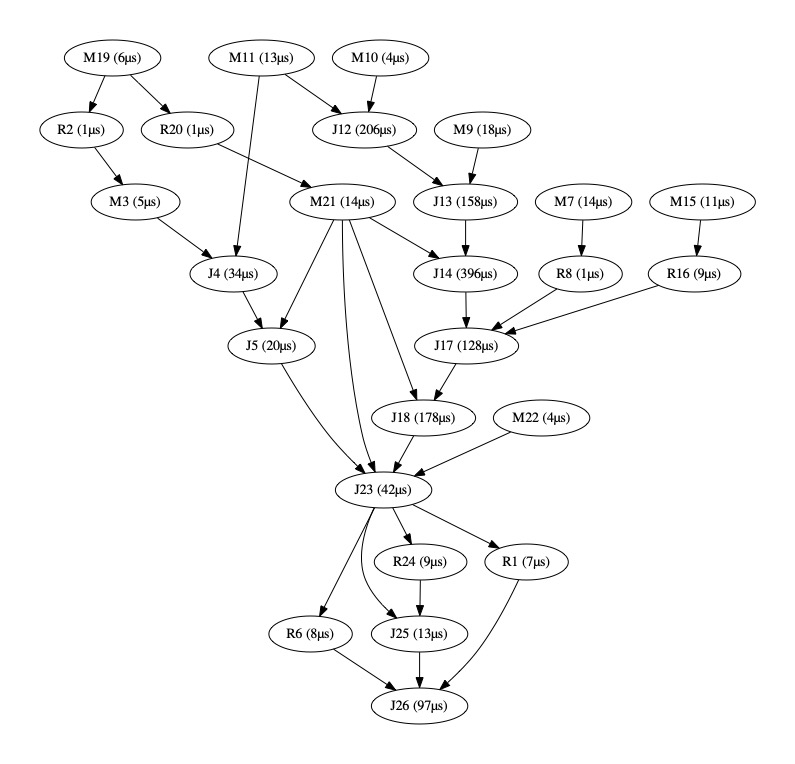

In [290]:
from IPython.display import Image
Image(filename='task_graph_j_353101@0.dot.jpg')

In [291]:
np.mean(strl_1_static_no_warm_start_runtimes_ms)

9375.95846875

In [412]:
capacity_constraint_dir = './CapacityConstraintMapPass.log/'

scheduler_heatmap = {}
for file_name in os.listdir(capacity_constraint_dir):
    scheduler_time = int(file_name.split('_', 1)[1].split('.', 1)[0])
    with open(os.path.join(capacity_constraint_dir, file_name), 'r') as f:
        usage_map = {}
        for line in f:
            key, val = line.strip().split(': ')
            _, worker_time = key.split('_', 1)
            worker, time = worker_time.split('_at_')
            usage_map[int(time)] = int(val.split(', ')[0])
    scheduler_heatmap[scheduler_time] = usage_map

In [413]:
granularity = 10
min_planahead, max_planahead = float('inf'), 0
for scheduler_time in sorted(scheduler_heatmap.keys()):
    if len(scheduler_heatmap[scheduler_time]) > 0:
        min_planahead_this_cycle = min(scheduler_heatmap[scheduler_time].keys())
        max_planahead_this_cycle = max(scheduler_heatmap[scheduler_time].keys())
    if min_planahead_this_cycle < min_planahead:
        min_planahead = min_planahead_this_cycle
    if max_planahead_this_cycle > max_planahead:
        max_planahead = max_planahead_this_cycle
num_slots = int(((max_planahead - min_planahead) / granularity) + 1)
print(f"Number of slots: {num_slots}")

Number of slots: 219


In [414]:
occupancy_map = np.zeros((len(scheduler_heatmap), num_slots))
scheduler_times = list(sorted(scheduler_heatmap.keys()))
for index, key in enumerate(scheduler_times):
    for slot_time in sorted(scheduler_heatmap[key].keys()):
        occupancy_map[index][int(slot_time / granularity)] = scheduler_heatmap[key][slot_time]

In [415]:
occupancy_map[2]

array([0., 3., 3., 3., 2., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[0.0, '10 (Max)', 20.0, 30.0, 40.0, 50.0, 60.0]


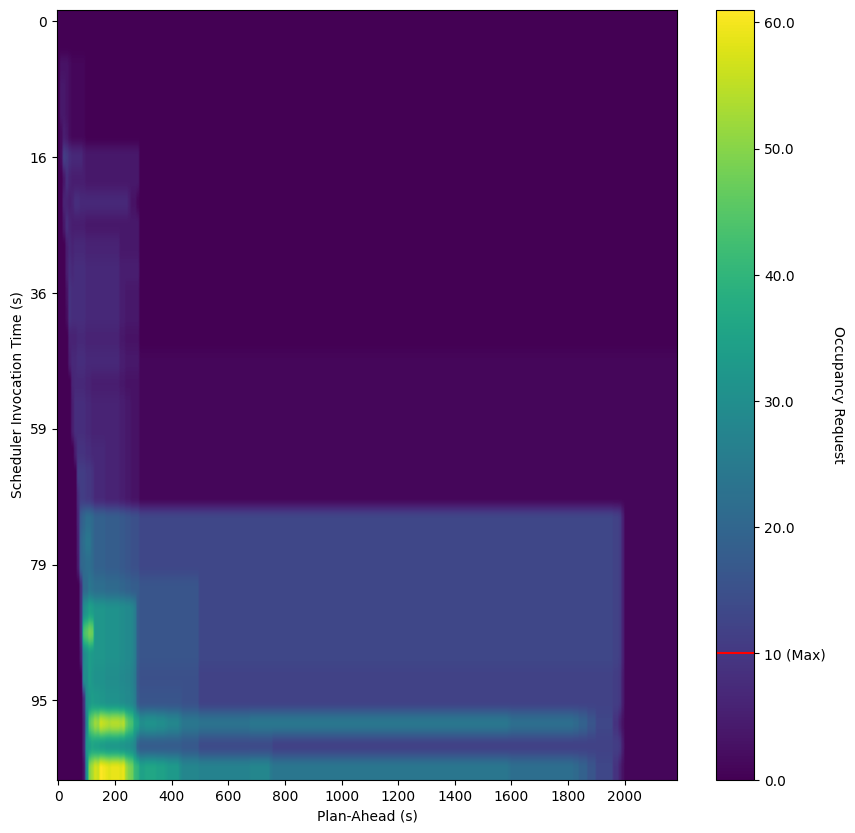

In [416]:
fig, ax = plt.subplots(figsize=(10, 10)) 
im = ax.imshow(occupancy_map, aspect="auto")

ax.set_yticks(np.arange(occupancy_map.shape[0])[::6], labels=scheduler_times[::6])
ax.set_xticks(np.arange(occupancy_map.shape[1])[::20], labels=list(range(min_planahead, max_planahead + 1, granularity))[::20])
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Occupancy Request", rotation=-90, va="bottom")
cbar.ax.axhline(y=10, c='r')
original_ticks = list(cbar.get_ticks())[:-1]
cbar.set_ticks(original_ticks)
labels = [tick if tick != 10 else '10 (Max)' for tick in original_ticks]
print(labels)
cbar.set_ticklabels(labels)
ax.set_xlabel("Plan-Ahead (s)")
ax.set_ylabel("Scheduler Invocation Time (s)")
plt.savefig("occupancy_request_heatmap_scheduler_discretization_10.jpg")

In [374]:
print(scheduler_heatmap.keys())

dict_keys([32, 27, 24, 34, 9, 36, 79, 51, 87, 44, 85, 90, 57, 81, 42, 68, 83, 96, 70, 59, 98, 72, 76, 74, 7, 4, 39, 14, 0, 2, 16])


In [411]:
scheduler_heatmap[59]

{50: 4,
 2180: 1,
 2170: 1,
 2160: 1,
 2150: 1,
 2140: 1,
 2130: 1,
 2120: 1,
 2110: 1,
 2100: 1,
 2090: 1,
 2080: 1,
 2070: 1,
 2060: 1,
 2050: 1,
 2040: 1,
 2030: 1,
 2020: 1,
 2010: 1,
 2000: 1,
 1990: 1,
 1980: 1,
 1970: 1,
 1960: 1,
 1950: 1,
 1940: 1,
 1930: 1,
 1920: 1,
 1910: 1,
 1900: 1,
 1890: 1,
 1880: 1,
 1870: 1,
 1860: 1,
 1850: 1,
 1840: 1,
 1830: 1,
 1820: 1,
 1810: 1,
 1800: 1,
 1790: 1,
 1780: 1,
 1770: 1,
 1760: 1,
 1750: 1,
 1740: 1,
 1730: 1,
 1720: 1,
 1710: 1,
 1700: 1,
 1690: 1,
 1680: 1,
 1670: 1,
 1660: 1,
 1650: 1,
 1640: 1,
 1630: 1,
 1620: 1,
 1610: 1,
 1600: 1,
 1590: 1,
 1580: 2,
 1570: 2,
 1560: 2,
 1550: 2,
 1540: 2,
 1530: 2,
 1520: 2,
 1510: 2,
 1500: 2,
 1490: 2,
 1480: 2,
 1470: 2,
 1460: 2,
 1450: 2,
 1440: 2,
 1430: 2,
 1420: 2,
 1410: 2,
 1400: 2,
 1390: 2,
 1380: 2,
 1370: 2,
 1360: 2,
 1350: 2,
 1340: 2,
 1330: 2,
 640: 2,
 630: 1,
 620: 1,
 610: 1,
 600: 1,
 590: 1,
 580: 1,
 570: 1,
 560: 1,
 550: 1,
 540: 1,
 530: 1,
 520: 1,
 510: 1,
 500: 

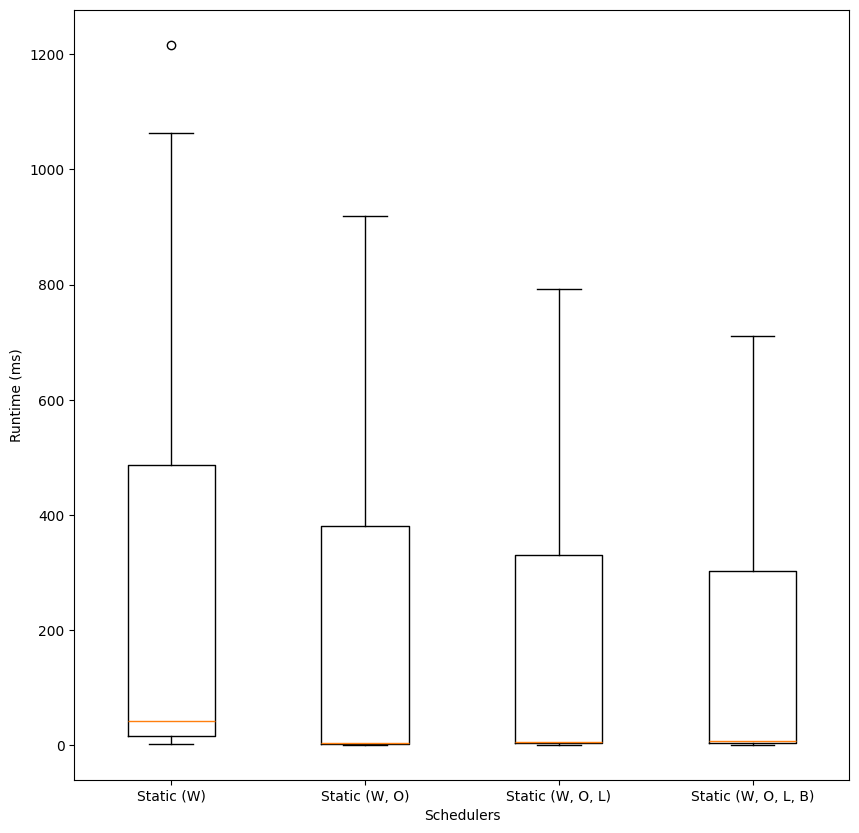

In [483]:
strl_5_static_warm_start_runtimes_ms_updated = to_ms([1130,1650,1733,1520,1243,1595,14036,3722,2943,3842,8627,4138,4111,3948,5309,4314,3344,2796,3196,3979,919337,601184,666050,367001,407350,458792,348673,577173,339784,405211,394909])
strl_5_static_warm_start_runtimes_ms_updated_lazy = to_ms([1052,1610,1858,1488,1306,1488,7514,3785,2810,4314,12178,5629,4538,4392,4135,5905,5403,7587,3033,3910,4448,3562,791834,590123,576614,330804,660992,388376,330921,351693,277167,317156,347071])
strl_5_static_warm_start_runtimes_ms_updated_bounds_1 = to_ms([1145,1295,1352,1449,1181,1429,7085,1811,1752,2462,2477,4388,2834,2303,3476,2711,2783,2221,2650,2607,1948,370808,199009,279401,195344,210063,205389,196234,240526,209349,216945])
strl_5_static_warm_start_runtimes_ms_updated_bounds_2 = to_ms([1203,1299,1364,1465,1266,1477,7108,2086,2062,2913,2983,4893,3726,2793,3885,2739,3477,2778,3144,3164,2478,292095,176479,262944,177215,181745,178723,170926,202210,275843,181502])
strl_5_static_warm_start_runtimes_ms_updated_bounds_3 = to_ms([1120,1120,1374,1490,1114,949,5869,2599,2427,3298,2949,7335,4287,4047,7335,3532,4447,3088,3118,3459,2692,287814,160853,272665,168429,169426,172219,169152,219022,262603,181721])
strl_5_static_warm_start_runtimes_ms_updated_bounds_4 = to_ms([999,1133,1234,1539,1244,1364,6657,2565,2540,3255,2639,7060,4736,4524,7479,3299,3761,3181,3416,3459,307433,166801,231054,169752,167337,169752,151552,242035,240144,173839,])
strl_5_static_warm_start_runtimes_ms_updated_bounds_5 = to_ms([1019,1110,1292,1381,1221,1410,5757,2590,2313,3202,2813,7140,4817,4392,6603,3308,3573,3036,3226,3863,2822,293896,165971,243809,176683,181925,179186,177570,233998,164465,186858,178878])
strl_5_static_warm_start_runtimes_ms_updated_bounds_6 = to_ms([1000,1474,1708,1404,1213,1409,10503,6390,4066,4946,12924,8484,8346,8129,8176,11449,6454,4593,3795,4335,6899,710330,484118,517718,297181,416079,320116,280603,556143,288675,555603,369958])

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

ax.boxplot([
    strl_5_static_warm_start_runtimes_ms,
    strl_5_static_warm_start_runtimes_ms_updated,
    strl_5_static_warm_start_runtimes_ms_updated_lazy,
    # strl_5_static_warm_start_runtimes_ms_updated_bounds_1,
    # strl_5_static_warm_start_runtimes_ms_updated_bounds_2,
    # strl_5_static_warm_start_runtimes_ms_updated_bounds_3,
    strl_5_static_warm_start_runtimes_ms_updated_bounds_6,
], labels=[
    "Static (W)",
    "Static (W, O)",
    "Static (W, O, L)",
    # "Static (W, O, L, B)",
    # "Static (W, O, L, B)",
    # "Static (W, O, L, B)",
    "Static (W, O, L, B)"
])
plt.xlabel("Schedulers")
plt.ylabel("Runtime (ms)")
plt.savefig('post_opt_5ms_discretization.jpg')

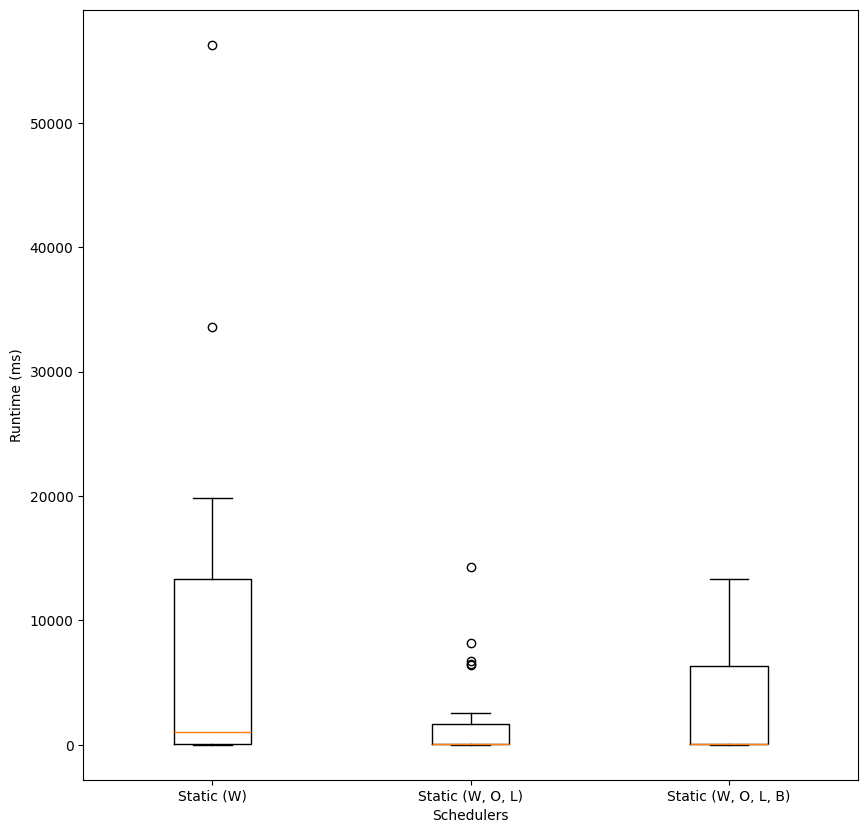

In [484]:
strl_1_static_warm_start_runtimes_ms_updated = to_ms([1870,1663,1842,2087,1835,1560,65148,32373,25085,17381,32338,12566,68769,34876,32627,67200,37680,45500,39546,44253,44703,14306101,6495040,8151853,6429271,6729085,2342374,959095,1876509,1572421,1414198,2573105])
strl_1_static_warm_start_runtimes_ms_bounds = to_ms([1886,1764,1934,1287,1320,1406,84768,30615,31238,36664,62792,44722,43150,38223,33183,80148,46524,56182,50691,41810,63358,13457423,6980433,7277678,8663015,7257905,9326745,7248278,10272453,8621922,8106579])
strl_1_static_warm_start_runtimes_ms_bounds_2 = to_ms([1471,1671,1864,1623,1135,1449,56748,31099,20655,17975,32468,66573,35741,28415,27569,10320,57037,33952,37946,33328,36172,42589,31929,13993446,8179371,8115058,6622424,6616720,8530106,5950954,9304919,6873943,10185193,7721400])
strl_1_static_warm_start_runtimes_ms_bounds_3 = to_ms([1351,1607,1846,1564,1477,1530,66832,32884,28394,22671,36331,54426,38221,29318,28695,30336,72388,46558,56320,42306,54331,64970,35789,13311276,6305502,6274318,8087623,7306324,9218069,7269435,8224355,7506101,7917495])

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

ax.boxplot([
    strl_1_static_warm_start_runtimes_ms,
    strl_1_static_warm_start_runtimes_ms_updated,
    strl_1_static_warm_start_runtimes_ms_bounds_3,
], labels=[
    "Static (W)",
    "Static (W, O, L)",
    "Static (W, O, L, B)",
])
plt.xlabel("Schedulers")
plt.ylabel("Runtime (ms)")
plt.savefig('post_opt_1ms_discretization.jpg')

In [471]:
np.percentile(strl_1_static_warm_start_runtimes_ms_updated, 80)

2249.201

In [462]:
np.percentile(strl_1_static_warm_start_runtimes_ms_bounds_3, 70)

2553.159999999991

In [469]:
x = list(sorted(strl_1_static_warm_start_runtimes_ms_bounds_3))[:-1]

In [472]:
x

[1.351,
 1.477,
 1.53,
 1.564,
 1.607,
 1.846,
 22.671,
 28.394,
 28.695,
 29.318,
 30.336,
 32.884,
 35.789,
 36.331,
 38.221,
 42.306,
 46.558,
 54.331,
 54.426,
 56.32,
 64.97,
 66.832,
 72.388,
 6274.318,
 6305.502,
 7269.435,
 7306.324,
 7506.101,
 7917.495,
 8087.623,
 8224.355,
 9218.069]

In [473]:
list(sorted(strl_1_static_warm_start_runtimes_ms_updated))

[1.56,
 1.663,
 1.835,
 1.842,
 1.87,
 2.087,
 12.566,
 17.381,
 25.085,
 32.338,
 32.373,
 32.627,
 34.876,
 37.68,
 39.546,
 44.253,
 44.703,
 45.5,
 65.148,
 67.2,
 68.769,
 959.095,
 1414.198,
 1572.421,
 1876.509,
 2342.374,
 2573.105,
 6429.271,
 6495.04,
 6729.085,
 8151.853,
 14306.101]

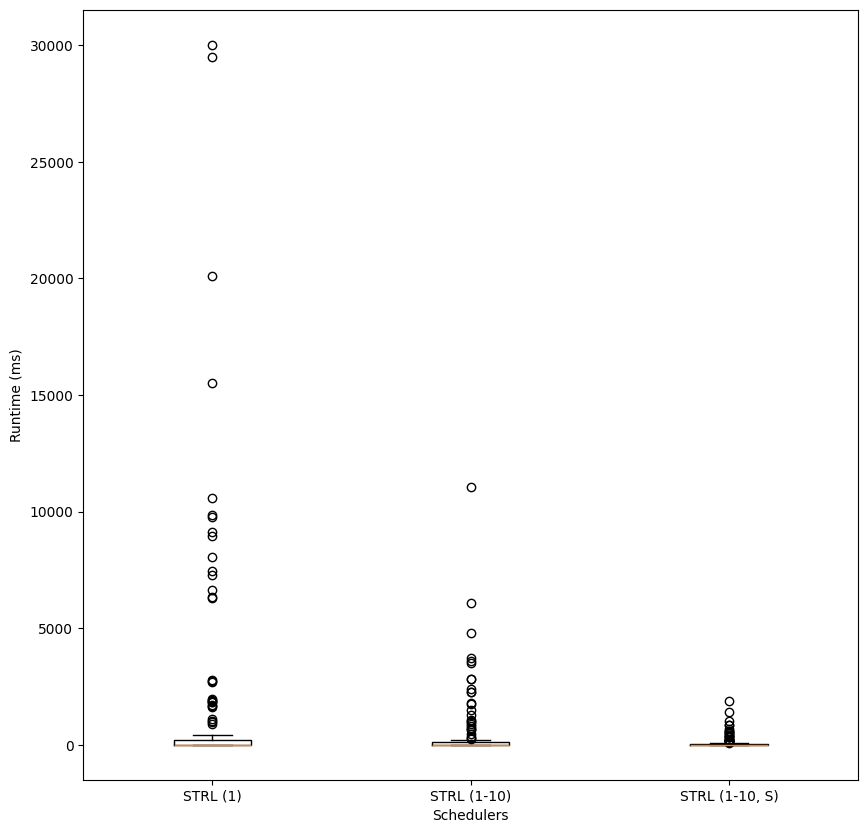

In [507]:
strl_1_discretization_warm_start_alind = to_ms([2017,1854,1278,832,30718,1971,1839,1711,2744,151528,122052,37118,4717,5751,1525,1221,1071,41090,2243,24510,2468,80979,1992,2025,1522,7951,20111886,9854479,7450989,9769664,7291766,6616343,6337027,15527210,9120163,8934716,10597660,29519214,8064057,30028008,6297548,2779861,2727679,2712260,1953446,1930540,1836204,1856368,1705800,1639177,1842799,1679311,1015350,1118543,976073,871805,342045,315518,257227,244159,129355,91187,94865,248649,175791,143498,99396,34777,1763,289898,409994,27071,2047,941,1321,1154,98286,46304,1757,3250,3387,1281,917,112124,54198,1799,8715,1764,9339,2611,1247,1645,1704,1472,939,1941,1782,1354,13370,1496,939,1554,2027,3301,1784,1214,1154,1474,1501,1192,867,1128,1213,1205,3378,150334,47688,1981,237022,63654,2161,3463,1371,1231,1192,936,1082,46765,27811,173611,25837,17365,1923,1152,1066,1190,1223,9915,1547,1215,38922,3487,2352,8491,37342,2326,2065,1239,848,703])
# strl_5_discretization_warm_start_alind = to_ms([2070,2622,2340,2286,2193,1961,20003,21514,13741,39611,70440,44183,43779,33454,42026,76867,60112,63045,62333,51122,65216,44082,857013,802662,807662,912157,1029054,2393021,1086870,1009218,1402410,1122313,])
strl_dynamic_discretization_warm_start_alind = to_ms([2138,1689,2075,1452,1444,1597,18031,17037,9979,9694,12399,12496,31242,19023,14858,73642,54468,56226,54771,50779,71764,38099,7242175,4645669,4646959,4583426,5335743,6207962,5221012,5659275,5145221,6449660,6387863])
strl_dynamic_discretization_warm_start_alind_1_10 = to_ms([1849,1919,1149,813,23484,1740,1323,1968,3607,74611,61239,5029,3929,6299,1556,1010,1143,25146,1890,16287,4510,39168,22604,2065,1604,5756,6070516,2800213,2275550,3606621,3739190,2248705,1496071,4802548,2823257,2396189,3525118,11065140,1758784,1012382,987967,877534,689153,1068217,1263598,1778330,810638,635469,441236,332714,719005,142888,135264,117752,125450,181445,178544,211778,81459,98101,73816,23165,29806,252987,280826,137082,8045,6473,1646,101985,137854,5747,5420,3738,2885,2039,5783,928,923,1164,1341,755,925,62941,14070,1513,6188,1370,3805,1760,1106,1367,1452,1391,897,1483,1558,1342,9324,1403,670,1338,1480,2958,1767,797,1054,1217,1391,895,945,1060,1105,878,1050,79774,29028,1891,117457,16338,1651,3089,1015,981,1093,861,868,31463,1936,78468,9602,2557,1416,1021,1074,1131,1092,3778,1331,1005,27716,3004,1888,7779,37878,6296,1844,946,735,778])
strl_dynamic_discretization_warm_start_alind_1_20 = to_ms([1988,2136,2653,1985,1981,1503,22684,17979,9811,9347,18751,33156,19260,21539,12572,11895,60122,52159,56160,51207,51748,65617,8234710,3621869,4118770,4511308,4608157,4775125,4655048,4897416,5139307,5560078])
strl_dynamic_discretization_warm_start_alind_1_10_steep = to_ms([3527,1807,1471,1245,13017,1668,1520,1931,3292,38082,5417,3415,2176,1850,1311,1249,1273,13441,1720,7784,4120,18870,11752,2257,1630,1753,1386395,686153,555291,579573,403867,591170,437449,831692,512846,489695,827890,1029443,1872507,340101,314987,348073,157087,165341,186894,199516,196430,182254,196037,216526,374943,88105,22093,21008,21926,36473,29255,32022,15215,17701,22938,7918,8606,58768,180284,116526,48167,12836,2633,55716,56277,11815,2739,2303,2102,1539,2840,1040,1085,1398,1302,1243,1170,25593,10188,2244,3700,1573,2284,1458,1233,1347,1530,1137,1166,1326,1644,1621,2024,1250,1078,1439,1527,2364,2016,1108,1340,1414,1572,1160,1056,1279,1271,1152,1240,28880,4187,1586,33231,17109,3552,2821,1325,1298,1313,1123,1195,8994,2991,55483,6046,3176,1656,1258,1155,1260,1184,1950,1496,1302,14458,2576,1957,5489,8155,2826,2050,1330,1109,925,])
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

ax.boxplot([
    strl_1_discretization_warm_start_alind,
    # strl_5_static_warm_start_runtimes_ms,
    # strl_dynamic_discretization_warm_start_alind,
    strl_dynamic_discretization_warm_start_alind_1_10,
    strl_dynamic_discretization_warm_start_alind_1_10_steep
    # strl_dynamic_discretization_warm_start_alind_1_20
], labels=[
    "STRL (1)",
    # "STRL (5)",
    # "STRL (1-5)",
    "STRL (1-10)",
    "STRL (1-10, S)",
    # "STRL (1-20)"
])
plt.xlabel("Schedulers")
plt.ylabel("Runtime (ms)")
plt.savefig('strl_dynamic_discretization.jpg')

In [512]:
np.percentile(strl_1_discretization_warm_start_alind, 50)

4.102

In [515]:
np.percentile(strl_dynamic_discretization_warm_start_alind_1_10, 95)

2618.402199999993

In [514]:
np.percentile(strl_dynamic_discretization_warm_start_alind_1_10_steep, 95)

568.6460999999996

In [509]:
np.max(strl_dynamic_discretization_warm_start_alind_1_10_steep)

1872.507

In [520]:
np.percentile(strl_1_static_warm_start_runtimes_ms_bounds_3, 95)

8621.840599999998

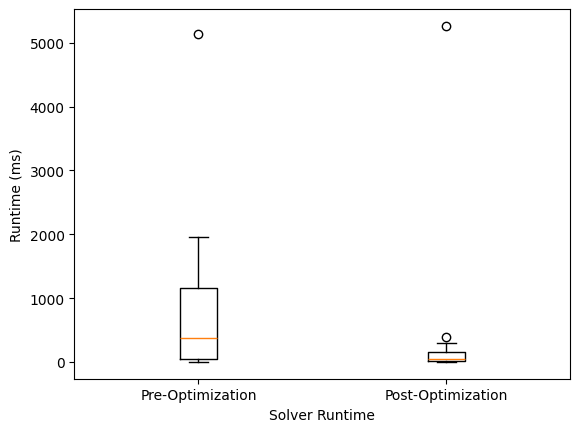

In [9]:
post_optimization_runtimes = to_ms([21383,1636,1052,2387,397198,24160,299224,32519,13928,14819,10410,9379,4093,3644,3168,1182,36708,7911,46212,90087,13438,15679,8528,51792,1304,1032,5264821,239692,216407,214051,203103,189270,172747,159835,164600,164680,151281,154480,151945,132650,199618,118481,109100,90420,85273,85488,63233,49333,44774,47401])
pre_optimization_runtimes = to_ms([22148,1669,1302,2403,724138,237002,1094496,602906,110136,111828,51443,41654,8872,5666,4533,1424,43974,41063,114784,176456,54448,31316,26468,52924,6760,1296,5141597,1962340,1794739,1561896,1523533,1387503,1354600,1180580,1284488,1252312,1190821,1143531,1158740,959693,1441321,1005940,728603,689248,680198,732093,499258,375579,365281,362715])
ax = plt.gca()

ax.boxplot([
    pre_optimization_runtimes,
    post_optimization_runtimes
], labels=[
    "Pre-Optimization",
    "Post-Optimization",
])
plt.xlabel("Solver Runtime")
plt.ylabel("Runtime (ms)")
plt.savefig('post_opt.jpg')

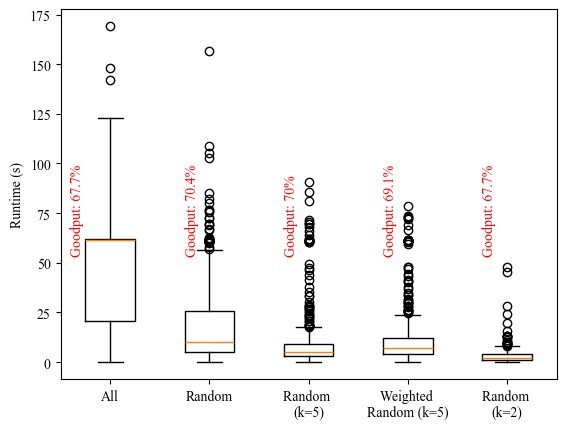

In [3]:
def to_s(k):
    return [x / 1e6 for x in k]

all_rescheduling = to_s([74723,700323,274605,419296,802870,425742,4476853,5342850,6064328,8391498,11871970,13432938,11911346,17242326,14846984,61229329,100790206,61724610,61853592,61947516,61967358,62219843,61270681,117322561,61177827,61430605,61338678,61557397,61753616,61080667,61279855,61097761,103671304,17028976,62200066,19995983,61406270,49985972,61408361,61320192,61163130,61148046,61295268,80083790,61325304,18253582,65979376,20924435,21879082,30771523,30754718,61768465,53829858,61735670,54534716,61470286,61510074,61559839,62006727,142072796,62475079,61984610,61753368,61926904,61398346,89414103,14744485,61191359,61143594,35387501,20344940,60991873,61514703,32188068,61746691,79743352,61489858,61700959,42507127,18472423,20171266,57269701,61075816,61991906,61986321,45084816,27106132,34089890,62189188,61699795,148020013,21129333,61974700,61555252,61626539,107420447,61972712,61991101,61983072,62086625,61887401,61967607,92633919,61494873,61363405,22618938,30863369,61290588,57020518,62844390,61959622,61458505,112485503,63531664,103990705,104775566,61520613,61560602,46473659,24517966,61434819,61590664,61581264,49344703,21845231,61684155,56043175,36975248,17506404,61470946,61406636,20710560,61266110,61383190,61562702,61373047,61525181,112713992,42745194,22975377,46041674,71690849,27278604,14065081,61129141,15876687,14500767,61200209,61201654,61318685,122521674,61221398,61123490,61463903,61577530,61545658,61580996,61525901,61417718,56084254,17525475,61342392,61559075,61896775,78056619,15847172,17879630,17283469,24650636,27671575,26452506,28051116,31424393,38976055,61742442,61769588,61839051,117735372,25039996,61796438,85292488,61723941,121695867,61846552,118547455,22786972,61655591,61435753,61346899,61466129,69583632,61452181,61742043,61939288,117302668,98584226,61532429,16979710,26157727,32599675,26087590,57463263,61816020,91901173,13578384,44849694,61480731,37267343,61209058,61640017,118819717,61631590,23035129,61835699,61406393,61437873,61516270,56283197,61336115,61578880,61827066,61569816,61425665,71345793,22379304,61557730,61565924,61613440,61592822,61358860,61180282,61092805,27576057,62250962,8298042,10483829,26498982,60978084,76611524,15570918,14995907,14017701,61283179,109646826,17170089,61633121,61756022,62091685,110758247,61805644,61571527,61525469,61304836,61513557,102973535,61419782,61692932,61845176,61557058,61540297,105207224,61448172,102414988,61201277,61455887,86679047,96748268,19848669,61219743,50131142,62713186,81596577,43465737,62187786,33977293,62379131,62030622,61715728,61925530,169209292,62160735,61775554,61866830,118632563,62040808,61839479,122871680,61567927,22944346,61626355,61604134,61816782,61952752,61460591,61513292,61243118,95011734,34329156,49829058,61573717,61360703,61352780,61517854,61251302,117754230,61318565,61425354,108947267,61363042,63291805,61131175,100313058,61445059,118538278,56980678,61670357,57756286,61215110,67595892,61866092,102677158,61982454,91663912,86011354,16292539,62478124,61775872,61682244,61594853,61618122,78424028,61686526,26798578,61402169,61843730,62199058,62032778,95302521,27260498,39090372,61927947,58803659,62847584,62085379,61680066,116732428,61635333,61933450,61703840,99368301,33697654,61377262,61495725,61550264,108175795,18315386,21195847,49966874,61276483,61282634,12333875,9514992,10088165,9602632,11926178,11568015,13944676,13917734,13376301,13964093,12439712,11666625,11104208,12560230,9318297,11073693,12940217,15709079,15528417,15319848,14234888,13602560,12335993,16298997,14191825,14282691,17200379,15805046,15508802,58121907,19035065,19455141,61191630,16510850,61404477,79092414,18396568,24925966,52573761,23222616,19611526,23380516,18421707,17503460,13435052,16017402,17453648,20552557,20297349,19325838,19294716,18332507,22615273,16943702,15849420,10461095,12523014,17894035,11224681,43261225,17029872,12463444,12217446,14315539,12562196,9737957,15260813,18506516,34889891,15442749,16644913,36830754,12216598,13396675,14453442,13379317,14456419,11996738,12375895,15777141,17050904,15848658,51059977,22956286,61076216,61105788,61281697,122637848,48471964])
random_rescheduling = to_s([66593,488276,188372,320176,278446,221165,293864,2964443,1345663,5171516,2169114,3786112,3691722,5213904,3383252,60744174,61260715,12574081,14073357,1641594,79973540,62352724,10534052,24657883,61126721,60977841,52411114,4792897,50792927,60783668,61283347,50735919,12418443,60830049,60687614,61014055,61559751,13198093,54411239,61353853,13321243,60868716,69692169,22127246,16896018,3628235,9725931,10352872,2764662,30024306,9432352,21177728,18241909,4909437,5724165,5826456,27981222,14942388,14322891,11740309,57046146,44569256,13611676,61363850,61186472,26322289,5628722,2587746,19110935,5969586,8527008,5253035,5837711,9548919,5619045,8807344,30682225,10939695,6465573,2202483,7177478,11942816,22409780,37551857,12544196,20295737,8724414,54092597,38573251,10508852,12145856,3790467,10284173,19239797,5296808,7236102,7464769,16353289,6466812,21421392,5572744,61176176,26961437,9167449,5086770,2679159,13004899,31941816,18376596,40424407,8100885,9119412,9379099,102721442,18547156,10189295,6300417,6833884,9603860,13014710,11243961,60976368,25869161,5795196,53935505,11405174,5248136,22183834,8681501,12904808,7868078,7323275,5673717,20487994,11648970,32849316,31770345,50308508,6508872,16666536,6538848,16254619,35352935,6187698,60696274,7283497,6041967,7875163,14991846,14166534,9605266,16803646,38912296,10543301,105348578,26511580,7266107,25580795,19196867,8005294,5918009,8374106,10178101,3625161,7891727,56357575,6963995,2641408,13013011,19462798,10642947,34601304,5578651,44030525,61446744,49313291,7158339,2296583,6198011,36797408,85094050,3154924,55133850,60826025,69204465,14994779,61201865,13071999,10465948,10230396,15728863,61724283,14085254,13261155,49633159,14666554,21686442,56615141,12204703,45865113,5039328,1094044,6087133,4346548,12755561,8130518,7150676,7032020,15812268,8798050,8374353,1153108,3104651,11694877,5551367,8689831,10313949,11850356,60957940,19927989,4625172,61342767,14755308,10413689,2848785,4438146,66565357,4219727,22643339,60987132,54365935,28474041,2081027,14196151,3823796,19946520,4655157,10445842,4350409,61266189,20572301,9716028,20030062,11584053,4289761,8183271,5015744,24398456,4337711,22815086,31957093,3789633,15829436,3339988,10122981,8810597,14902627,2320461,50128873,26126456,7779351,39684146,22619061,7471010,12641798,53237182,6022839,5185110,46023321,8838163,5771002,8045565,61396214,47348813,76497401,7813558,58116622,60955351,6624047,11001819,82362669,27617498,156781053,18630903,61213853,62391273,44306403,108775303,33226024,10067638,60867358,13957724,61288641,16915335,6069009,72732345,11647279,2519325,7966469,26267060,10669155,11427758,61364114,26745913,1649685,69523830,15285166,2514607,48694884,2112480,5107539,6227625,8577370,23292330,5140482,9499791,2887965,72398762,6001659,21083024,9376041,29824495,17999183,3730523,51264349,45308687,61064284,48076209,21759594,22535645,10725240,17462450,4562214,29330271,7726511,7535274,76399863,17774451,6249697,18208407,13803171,10592530,7916321,5111205,59958445,16461069,60903759,14526421,34558571,61361179,32003380,10588289,16188946,60782300,67167243,75440681,5437205,1938736,16562162,11484213,4071484,3374042,2635073,2817743,6363971,2848139,1742472,5637116,2216133,1972736,3718991,6142130,6553769,3362592,3794748,3756797,3206529,5295793,6075415,1754639,1168241,4886590,1445916,7438396,10129329,5745494,7521512,4134200,7239326,6600314,8299532,10573664,22272314,11028207,8402123,5224000,5126890,3304818,5454441,2812743,7256759,4554193,5712985,2007289,26851026,6018945,4641789,8810642,2427824,3909672,1502399,4876167,1456096,4280153,2149038,1377063,3359710,3228193,5641584,5019642,1571547,2462508,857892,2409046,740062,1717956,2199929,4739894,1675980,2597517,2656234,1818697,5159214,5593443,5660997,8361756,5069813,3804628,6096796,3811456,5895229,11173371,5760352,60953489,11085097,21499855,9163486,4195324,3023393])
random_rescheduling_sample_size_5 = to_s([35551,715126,368534,1781593,3350785,2214964,4140995,4483356,4912304,3918704,5190822,2824756,3969543,4288127,5264974,5225706,43688966,33067810,61176871,18305073,28354558,6079282,5446077,4415132,8227355,60808754,63802229,61316086,69442405,3087532,17422338,4836698,13599263,17570690,22290887,69764577,2377267,11041344,7602933,4679819,6802596,1975222,4436044,7610542,4663792,9789624,5174988,6777265,1268052,7413602,8301893,6649270,8765636,10176480,9887410,2743385,3308590,2606471,9756774,7165665,4268652,10256975,3533213,8627735,9157729,65814353,8010852,4555951,4725175,6114295,2920058,6159859,5885744,5706529,4996504,1705096,15358875,7044734,4249591,5089540,7044495,4578752,7590812,7718014,5324510,8311229,8722463,1114692,8400838,7142974,2965410,1327454,4638194,6335532,693308,9631227,6265285,6837578,16858510,3522568,5998380,71323988,26505797,2472977,22411128,20600314,28579635,15042502,6014078,8868324,18852111,3238872,12677377,4370278,6675382,10526176,7133346,8251679,4167595,4974669,6205770,4597557,6863167,8133401,4693321,12785287,5613666,7162382,4671256,5079747,4238357,2913149,2492317,4973192,2670381,2453087,1980672,3151265,12867509,4119349,2621054,9009549,10429487,9105473,6281824,3141256,1538941,19174470,2703059,4552809,5981491,16883836,3030289,17882333,8518308,9659635,2968883,3790028,3322905,14623478,8662903,3197198,8393802,2005852,3525776,3646952,5891909,4719016,6548201,8296997,12540371,9107068,14685942,18449072,7836492,16122090,6890993,1587688,1924633,8781434,4744671,6822687,8269057,8283225,14633441,2631761,5494638,2134354,2791180,33353452,2638751,2072233,9265724,7699681,26641721,11549426,6588926,2241246,5791321,23377337,4963152,6338908,2430904,2896882,6678065,5137316,3778298,915521,4276963,12960273,862929,3388943,18288524,5172985,2554352,27502416,3390250,10517124,4566641,10228065,5788432,6821609,3747092,9182524,9785561,46573106,60557458,85544624,3409955,17754943,3395113,8032992,833972,1055598,9600180,5631771,2319240,4477102,8947035,12320985,7302899,2695137,4822697,4764465,3963451,6950325,6480551,7010741,2488127,6641035,5583410,6833618,10077696,4784577,6986279,2189894,3760038,5560400,12066934,2123856,90650564,2980034,6626281,4806213,3256767,9140941,5241031,6620684,47226423,61988838,7748492,7782757,49581254,7127455,60785704,6570352,3265393,6920003,70307009,23820073,35324747,2354853,4912967,2984443,2284500,4919594,61745825,41261188,6432084,10130033,15614061,60888645,2147499,1979056,38042615,27687165,2017375,24892127,7167065,6044191,15285768,81331581,12936174,4192954,60678139,30084285,7985409,60511001,7788618,67922135,5077623,13947916,4944864,16332497,3327400,5864450,973088,8413019,7942863,17651885,25801386,9093842,3079109,23699717,6391454,16403858,4019043,5653701,2375119,4805016,7359982,11555847,13158854,4492673,4655462,3704032,7635401,8559311,4887823,3298530,9266947,4502709,8316796,5226278,4896977,4865570,745373,10645474,5443644,5773598,3590335,13959178,3192779,10784923,3783781,3814409,17612452,5039587,2449579,3505461,2847412,3949672,2902193,2185762,5634769,1626127,1798310,2821738,1586241,3010500,1354839,1746604,3911794,4604176,673786,1781718,5450146,9132872,1963976,3116927,1646089,5352187,3880890,2168467,2466887,1351736,3240573,1261688,3116298,4249973,4739575,3805000,7581587,6536018,5955070,2288116,5386932,4063514,5630671,5322020,1760120,420695,5189166,1270522,3730191,4140233,4906286,3411883,2523774,4082357,3525385,812673,994826,1124630,825312,2126239,627361,854364,756658,5101593,4570051,5237916,1714969,1231046,928634,2801331,2005771,1703294,2725797,3290674,4188910,941944,4090653,2250662,1834737,2849240,2530915,2783123,5791741,889611,859177,1741465,3673708,7141622,2974041,60754723,60747823,17518963,20903863])
weighted_random_rescheduling_sample_size_5 = to_s([65752,678444,348663,1796326,3120867,2334728,4119350,3066590,4416714,4761556,8441542,4992055,7060916,5787218,7411607,26119240,7209896,33606446,60933534,43159729,11953246,61438485,61312266,16388330,61093817,61234997,16204515,10897814,17821401,78621140,16796421,1402494,7290396,1571691,48052026,2338191,9310464,26055094,12108207,5839734,5752801,3974221,4635626,7919028,15390098,1501173,6882547,7418165,6085875,3215149,6339222,5357337,8300890,3583463,4968374,7701502,17461769,61081145,20421244,3658792,36745941,5451230,28228263,68950032,8433768,61429211,17148693,8059192,4990376,8664972,4567895,1386658,4754297,16987887,4371384,1549014,2896356,8201532,5111511,2214893,9705636,5833512,12570255,18545847,7952325,12932580,11678241,10587978,7467068,10495468,19516925,13140707,19627098,1747363,2751889,6772500,20491716,5511904,21750859,25487557,47954953,13064036,34699865,7202951,5484136,16801401,22307378,16392677,7690076,13245858,4268453,15058870,25845533,14898192,9226241,18855525,8438581,7228507,4313661,8531321,5030839,10209508,8161632,3209267,6931861,10794284,7826973,10579857,4094454,9024348,9219272,5899786,7852710,5910422,15550030,4631483,10999181,12742838,6461909,7248888,4937952,13309558,3695162,4595459,2632064,2631558,4031990,4500132,2515624,4658531,40700096,17637009,3727541,7629875,16864799,14424737,6078514,31098224,8058672,10420277,3350345,6424919,6881527,4807668,2425237,5513033,5177937,6687625,18542350,14645596,14147695,10605213,7440012,26432162,6342205,11238285,8981539,6890305,6587468,60676437,13840129,6207444,14703889,4699184,72066835,11524827,2960461,5237136,5580563,7462807,11497585,29620624,5813057,11277588,19849090,15477109,27712802,8895297,14260632,4064456,10770635,6954246,5964474,4883115,4832720,7143469,3849597,2603409,4163139,4147476,8334546,3217012,23443523,11200430,2474138,4706379,2977147,37727525,13995902,8246490,60819025,24630266,4097995,13999382,3278617,60933037,40256724,13008525,59506962,9706862,5295348,14046306,1595379,66543484,3147913,3104662,2877801,4818545,12746775,9047083,12577633,1161741,806475,3397116,5799483,2440950,2545439,8324180,4782363,8300655,3191499,8255171,12342917,21198548,4636475,3776929,10744249,5060306,6304913,12613048,7509236,8752588,9746963,5842622,33865715,13105052,11110263,8719350,17976857,9525007,28322457,10706508,12514734,9531244,41088653,11700697,10628157,3568967,9359484,73433291,8710230,7409804,44215751,11165231,12273921,7139926,8647283,7793478,9035403,31550498,61155827,46686101,6611532,20766281,4474407,12689241,72587825,2802693,10892911,7294464,3002246,8700087,7989272,8643685,11510505,25337877,10651242,29889314,12115608,6512118,7798715,15059287,6161979,14323414,13161729,7194340,61175196,6960718,6044704,5430831,4073575,11121271,12584080,2848690,15487063,11446963,9617667,11097001,6680000,7440654,6951199,4177472,4034275,4757005,4886702,22272339,9302236,23934140,5442756,4374459,2449951,4201849,8237202,8953629,6059244,8453834,7295606,6877373,30335262,16953958,6322695,3825186,4507666,30493254,3884584,4139071,5364660,3635998,2303678,2695629,3887577,4896028,2366662,3618379,3984771,4903070,3260549,3684954,2970703,8340339,1892414,2723254,2060889,3882274,671344,4487898,4125340,3736889,5793171,2611725,7153612,5280347,7524469,6130573,976261,4103790,3864324,3676089,5417452,4184289,5804461,6847244,8147579,4790518,5008733,8469371,13618366,6198866,5986768,10110111,4167429,6771052,933236,1375718,3402073,4267439,3232021,3926146,3039237,2133815,4325360,2733103,3650730,1670209,4414969,2139989,2715084,2329094,3317368,4328556,1769159,1862296,4978406,2810753,1316452,1253117,1999685,6311836,2841318,1186848,5036115,2709204,2765103,3417256,2416807,5674368,2237557,3331749,5239660,3973883,10649513,4706177,3402580,1617345,4517909,8919997,73043493,3568738,4303303])
random_rescheduling_sample_size_2 = to_s([70186,661482,266358,420985,359895,215611,1345829,187487,1492285,2391929,2982199,1104463,1103509,1478688,2856806,13358078,1076446,19611638,9975901,4849504,4363388,9561164,2013592,2099848,1883674,4446833,1055997,1762972,1534446,2744267,7181551,705271,303267,1107012,6724815,1101952,4016788,3704555,3256756,6042328,1984990,1151389,7523558,4426043,3782880,3326073,3263941,5393703,2668862,223685,2862322,299569,1656945,1135248,2280896,2793036,2650177,2735364,3301982,3864810,3925104,9127446,1734531,3088899,3738604,2762216,4661659,2244671,1001455,2696035,1982764,969312,1087647,2923468,4684574,2162735,2719276,3123157,2725535,1999333,2501713,4525078,6499882,2715158,5254081,7143472,3951124,2734504,249622,920462,2350202,852988,1820205,1394373,880674,321466,2579338,2303609,8171061,2487158,2918972,3465497,668502,2233453,3842837,3033424,5168206,7803047,5313175,7036586,4173060,12438502,354538,4569330,4593340,2909564,3344727,2684079,322296,2926757,2907174,914124,2667335,907438,8397967,2516607,1683589,3461074,661287,3242587,1672955,2072196,1346664,2350570,4983846,3310182,6114892,5476800,2202212,2656247,3257811,4704945,1591929,1228682,511199,1294350,828863,2460155,4228313,915031,2186172,6629792,1457591,7247757,10908405,3234937,942403,4497111,1934547,1740151,1044770,2895263,3055194,4939163,4187972,818815,3318461,3859554,5245086,1332130,254631,1127315,1695592,2352360,2417111,3265311,2075169,3842726,1798748,3840147,3611404,5249017,1613328,12392730,1760375,654684,1118355,2472500,4368070,7380130,480879,3636681,7735744,7264259,13025368,7916526,6246232,1856489,4643155,3826743,940845,4576748,865233,1151638,830485,5222225,746153,1983792,2679420,2050257,4000081,1711711,1817171,1840613,1688711,8894317,3399875,3421682,4551336,7384383,4754267,3704453,3531613,3182567,1497777,1952238,12979385,3020596,15741586,1821697,2952693,5503960,178822,2247945,1710488,3752671,329843,2459301,3542692,2875907,5392017,2777797,7202175,289222,370979,1300507,2936823,5331532,3322474,4096728,1562976,2982990,1650132,2052999,2351786,1101428,5559567,4030730,1619749,1356500,5294645,4687457,3414526,1457580,28000046,5585139,1233299,1543241,4999465,3801005,569593,2817564,2080519,3309051,9992764,9644801,47970006,1496041,7135061,4315045,5661771,1325530,4014394,387936,4834960,8877365,1893423,2279078,1979845,45332659,497207,2369110,1320995,1151871,1876075,24300728,1006598,2008475,5353242,6396214,495019,4406309,706398,4008020,3957112,6590982,1009378,1028006,5192648,240593,238389,1972679,754616,2119445,2056725,3003000,2123780,848957,2480341,344093,4512112,5856070,1377128,2164752,5236927,5552459,1565855,1988527,2587749,1401015,6544022,2034028,1180621,1074327,5309722,3669418,3507599,4372936,3753766,3288870,3185140,3295038,5418571,5580584,2137546,604187,3525881,3262243,1203609,2829628,2424726,6806823,7793973,1537830,5284607,697080,4011460,329166,2776301,2854613,495929,715091,449736,830307,1112989,1016511,1343806,405083,248155,846986,1048353,883329,1007982,616389,394119,536301,724465,5505274,296603,3807278,238233,3423196,571874,1055206,687366,1752890,489590,1274043,1250097,1455489,3561473,2411170,1410103,745517,936539,1783823,674579,536755,1122812,974868,1065012,513143,656649,737959,714122,2004320,1792346,743565,561913,1774352,1116412,332483,455711,182076,809638,313317,401219,1030819,202385,2898674,643885,440806,1274105,483184,327274,1140110,786940,2610478,591411,2281605,882648,107561,1552070,671444,2251427,610285,931076,2038982,6148252,237748,6583969,411902,1649720,1884614,2309295,820673,1401409,5703744,1546257])
ax = plt.gca()

ax.boxplot([
    all_rescheduling,
    random_rescheduling,
    random_rescheduling_sample_size_5,
    weighted_random_rescheduling_sample_size_5,
    random_rescheduling_sample_size_2,
], labels=[
    "All",
    "Random",
    "Random \n(k=5)",
    "Weighted \nRandom (k=5)",
    "Random \n(k=2)"
])
# plt.xlabel("Optimization")
plt.ylabel("Runtime (s)")
plt.text(0.6, 55, "Goodput: 67.7%", rotation="vertical", color='r')
plt.text(1.75, 55, "Goodput: 70.4%", rotation="vertical", color='r')
plt.text(2.75, 55, "Goodput: 70%", rotation="vertical", color='r')
plt.text(3.75, 55, "Goodput: 69.1%", rotation="vertical", color='r')
plt.text(4.75, 55, "Goodput: 67.7%", rotation="vertical", color='r')
plt.savefig('post_opt_rescheduling.jpg')

In [6]:
np.percentile(pre_runtimes, 25), np.percentile(pre_runtimes, 50), np.percentile(pre_runtimes, 75), np.percentile(pre_runtimes, 90), np.percentile(pre_runtimes, 95)

(11.387624, 25.896042, 61.178369, 61.728952400000004, 66.73641319999999)

In [7]:
np.percentile(post_runtimes, 25), np.percentile(post_runtimes, 50), np.percentile(post_runtimes, 75), np.percentile(post_runtimes, 90), np.percentile(post_runtimes, 95)

(2.8843195, 5.5347445, 11.009272, 32.996899900000024, 60.8843712)

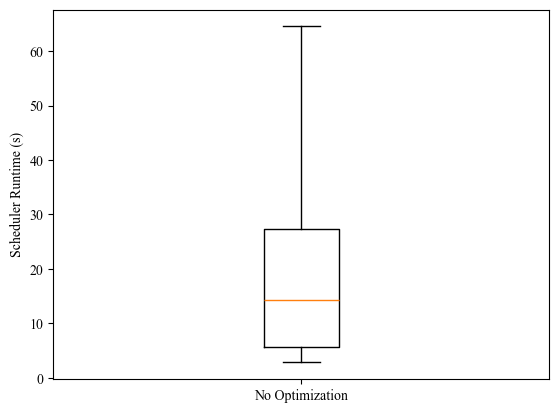

In [4]:
pre_feasibility_preserving_opt = to_s([1930525,3034769,5404120,2824326,4439461,2956022,957324,4605319,7430160,29153283,10732345,23692416,20255621,13736196,18687235,14291759,18432523,120067259,120125648,48190731,85458017,76238407,23349577,24500780,120097277,120096532,10476811,1662791,7231891,20126711,4908141,3824930,4775782,1481026,2900458,3168543,10435191,16117567,13011288,3680606,31136985,12412749,11397333,5264297,26121317,12270532,4864934,3213142,27228211,10634363,2546839,5652793,27079946,20848056,120095459,47161657,120491310,15174263,2245602,120245803,120153761,12538299,1146299,2231527,9210495,14968026,7445515,24263860,14645081,987628,745721,4150297,10992271,12073745,10949367,52255121,13311431,18210472,11206636,14659925,29661906,24590535,3144747,7526274,23389651,21592663,2040097,2819285,55086517,22971734,4120812,33597564,34265176,120112335,19827464,10882583,17098725,19280252,13666541,10557260,17031148,17928801,10836091,14310382,13767069,5716166,13704138,28964130,20354925,29995122,120164925,120221046,21473822,3746689,11490121,9579191,3560300,23977781,23924592,23856776,36803899,22576267,23960906,2820050,16009485,71965197,35793891,10094180,16219585,12552560,13339034,4519559,3829887,120076617,37736442,3188121,4180790,13132324,120119067,18373597,25374593,40337197,120057605,37653188,4654268,33531004,12048209,15184443,68271060,15766266,27016390,71655950,51153483,35368538,66990927,50205884,24710636,18646877,15384752,26269984,2694533,24025215,45120768,32771179,15016835,8996475,12939967,13941662,29477583,15213562,11577664,7576868,10317406,8576952,63238784,22474439,9268970,13153169,10330820,9944592,944685,2144343,17669326,15464524,1314954,2904613,11350328,14057912,3811371,6007086,120507495,110804602,5480223,1486557,26308067,37183572,4315789,3051924,12456154,8743412,1810138,13366856,6181068,7285547,8360622,83555775,19957012,38821253,35011828,10217064,41517749,38270131,75673114,7580024,9733355,21228793,3590741,66500776,120206428,120106317,27709747,12331420,70543169,51328993,52904954,8080349,16059650,28294354,29573879,14315600,80330245,31969881,11867477,17578213,17290919,971336,5896158,26538701,7202174,14356948,10860633,64522629,34457649,9009801,1606472,11762208,1069916,3340077,43579434,18408994,28434367,39174036,13238409,27842486,24849455,23779250,10319870,7738214,12831326,31832565,25152432,53873078,25442976,29225112,5690899,12471628,17252398,15960477,1672512,2152904,19833488,4667291,3311340,4320343,7362901,12514139,6642311,2427112,2321851,3846061,2119910,1919964,25025127,2842389,4747697,4334851,27507033,20590140,3355863,14531898,19774704,1979843,4099578,120126384,1374784,4435927,18912553,2205614,13495444])
post_feasibility_preserving_opt = to_s([842566,1553960,2684557,2403129,4251627,5099162,2449226,3621254,12487616,40210976,11032810,15446116,7756541,32130360,5985069,7523062,7780475,121174130,53962084,73233186,120793891,40303606,18776345,36163577,120528847,34189410,5999250,1945565,6073363,6052975,4664953,2593849,4300005,4184253,3417593,3510594,5136900,6468414,11170143,10891993,48719668,4202372,2951298,4894961,6857013,5453775,4889455,5074351,7190820,6576293,4414104,3390786,52970895,13104869,33332355,9288759,4806821,29481966,11484923,12432653,120655681,9693535,2566863,3458806,6729620,28462522,2896289,2979351,6328849,120378365,2282274,5638576,9001827,11296378,12985538,9696224,6856680,46734349,2573559,2816996,7452281,16281953,3341464,2422772,14538046,9612543,7254081,8171171,11997393,9903640,9449944,4191535,12206823,128013876,5297089,4456489,6545283,23047527,2766425,5155589,3563799,4861127,4808596,5485940,5204050,5024625,26826864,18144770,120731316,36553615,8475456,19234703,91954838,4647912,7698726,5063897,4206887,4740826,13442952,57459949,27765292,13436218,43145793,3759876,7434030,7814907,120658446,4452339,5000700,6664947,7276070,7115473,6554168,4373743,13469667,12533602,4021364,5110704,18353111,66579851,5528739,120630156,120782497,12876493,8842080,5901588,10800341,13054322,5919837,24297690,43910602,12711810,21190416,12804943,11211676,29808805,120635996,49685653,6254094,17223653,5570353,6569081,12085756,14450486,5633833,3703062,8068045,5895012,8448737,4429043,4719651,3385551,4430033,3210430,8017086,120682380,3709019,3264484,5443803,12509118,2432442,2983751,4723650,8416037,4348595,3259365,3618075,5153973,4355051,6547581,120662081,140085951,10002886,5317531,13832803,13927994,5170577,3322782,4558238,2752593,1531813,8117055,22136707,1975744,4896393,14938143,55810091,10398833,15050350,5343529,5938229,13790307,37238128,14179923,13923808,4749419,6739402,16322860,9644511,120614920,9465436,6530568,21658570,13323057,6915138,5451470,10519229,6656382,1681144,14551331,120547374,36289202,2399764,12177886,120063806,1335614,2918282,8266431,4143725,2426902,2602990,7016160,19244771,30759147,120843816,120671506,124080490,3649683,11940989,7335899,18710730,27049198,13575551,79168091,15577077,8920050,7031020,7752147,7786550,22529239,6186834,16007462,23338726,41205780,17130858,4429879,16669821,49607536,769468,3656099,14525324,2497325,1697527,2176085,8545192,5171237,4799534,1116260,718854,6386481,2019199,1056658,5275031,1579530,2049718,2987110,24471978,5191417,71349,5064325,3281959,997648,1734919,11506467,568802,2280750,2229788,1229686,2394741])
post_feasibility_compromising_opt = to_s([513307,344363,383870,271652,1016769,733792,52995,349891,471489,795689,1014971,2345451,1069680,22343744,2740856,777921,1605597,7999500,3223454,3413476,7459268,2563279,901690,813642,63258265,964937,691555,71039,433590,1082315,648094,555108,868662,367913,194356,258150,6957762,487366,8750414,3246964,1042006,780324,1929780,1913471,2061268,1601537,168521,1101476,729719,479962,332015,129517,7269124,2793550,2949518,3198902,860185,3275881,79550,1920641,2598335,5824776,2842762,3327175,4536217,1923130,85313,358597,3211470,880455,134980,451694,705915,574988,805264,1129402,2651842,1363370,235299,1270461,7029476,6063464,1377882,3662034,8450618,18428382,473376,4069302,120099660,54054042,1269779,1524177,5020534,68545317,6782140,627116,1149356,1309265,703984,1470219,1811916,635745,2420552,799834,937531,1611178,2095995,6124677,28713700,4743762,13904018,4276259,232486,112511,589560,1880253,243025,1766893,1950838,8608495,37965465,6071867,5749795,1619148,785958,1500753,4575469,4996886,755048,6368818,3302376,1117524,1512803,924968,3745952,2414168,1448988,1006627,1561851,2218228,527417,842888,1304697,3157350,242460,747592,1271810,1560951,8163666,32719101,13276981,1444918,961412,147433,5209406,2922838,7181387,190100,30903821,3107322,3489278,1452367,3198053,1949175,3104695,745494,7394898,1134642,378060,285332,4424978,1366010,4018246,421602,11191933,2054522,601740,2121586,1018994,677709,409208,405050,4249654,4180543,667930,137379,463279,1014519,567243,2359994,24639682,2299109,3618853,326682,6167578,6715864,317128,768969,1881147,1137978,536817,820062,2781004,2539345,816889,16462405,13295246,7549125,4399124,7687756,3206088,6857838,1346350,2315157,3647936,1021081,485752,2389006,2888343,2698011,320530,672416,1038815,11792126,138689,452944,540008,868453,1053150,584565,120337453,273641,413418,1040142,918269,118769,836460,1518747,898132,50701075,784610,934250,1004104,638946,167936,2640167,340537,776826,616092,1126506,2177307,3066018,1708799,1990277,1228117,1395137,140064,1855605,4019698,7973348,1520165,6358130,79440344,2568305,432890,607537,1571429,174509,441015,378437,511795,291794,257312,466142,785443,792902,1896969,523963,372441,425061,325383,612513,1576787,358241,658139,521987,7290753,774551,22371,756281,1872489,165229,360207,2752340,254126,468325,2565036,611731,356181])
ax = plt.gca()


ax.boxplot([
    pre_feasibility_preserving_opt,
    # post_feasibility_preserving_opt,
    # post_feasibility_compromising_opt,
], labels=[
    "No Optimization",
    # "Fidelity Preserving",
    # "Fidelity Modifying",
], whis=(10, 90), showfliers=False)
# plt.xlabel("Optimization")
plt.ylabel("Scheduler Runtime (s)")
plt.savefig("noopt_vs_feasibility.png")

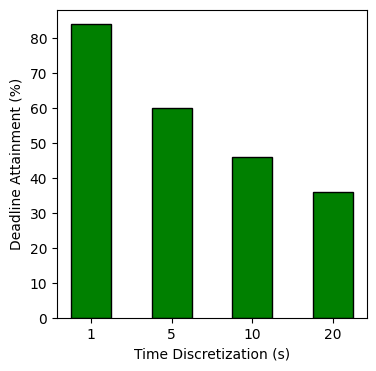

In [107]:
schedulers = ["EDF", "1", "5", "10", "20"]
types = ("Decreasing Utility", "Constant Utility")
goodputs =   [(41, 41), (41, 42 * 2), (32, 30 * 2), (23, 23 * 2), (18, 18 * 2)]
x = np.arange(1, len(schedulers) + 1)
barWidth = 0.50

dynamic_utility_color = "orange"
static_utility_color = "green"

fig = plt.figure(figsize=(4, 4))
# dynamic_bar = plt.bar(x[0], goodputs[0][0], width=1.5*barWidth, edgecolor="black")
# static_bar = plt.bar(x[1:] + barWidth * 1, [dynamic_utility for dynamic_utility, _ in goodputs[1:]], width=1.5*barWidth, edgecolor="black", color=dynamic_utility_color)
plt.bar(x[:-1] + barWidth * 0, [static_utility for _, static_utility in goodputs[1:]], width=barWidth, edgecolor="black", color=static_utility_color)
plt.xticks([r for r in x[:-1]], schedulers[1:])
# plt.plot([x[0] - barWidth, x[-2] + barWidth], [50, 50], '--', color='red')
# fig.text(0.5, 0.80, "Peak SLO Attainment", fontsize=10, color='red')
plt.xlabel("Time Discretization (s)")
plt.ylabel("Deadline Attainment (%)")
# legend_elements = [
#     Patch(facecolor=dynamic_utility_color, label=types[0]),
#     Patch(facecolor=static_utility_color, label=types[1]),
# ]
# plt.legend(handles=legend_elements, loc=(0.65, 0.70), framealpha=0)
plt.savefig("dynamic_vs_static_util.jpg")

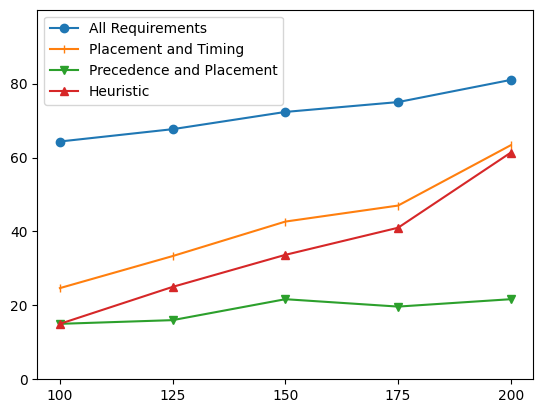

In [81]:
dagsched_goodput = [x / 3 for x in [193, 203, 217, 225, 243]]
graphene_goodput = [x / 3 for x in [45, 48, 65, 59, 65]]
tetrisched_goodput = [x / 3 for x in [74, 100, 128, 141, 190]]
edf_goodput = [x / 3 for x in [45, 75, 101, 123, 184]]
arrival_rates = [100, 125, 150, 175, 200]

plt.plot(arrival_rates, dagsched_goodput, marker='o', label="All Requirements")
plt.plot(arrival_rates, tetrisched_goodput, marker='|', label="Placement and Timing")
plt.plot(arrival_rates, graphene_goodput, marker='v', label="Precedence and Placement")
plt.plot(arrival_rates, edf_goodput, marker='^', label="Heuristic")
plt.xticks(arrival_rates)
plt.legend()
plt.ylim(0, 100)
plt.yticks([0, 20, 40, 60, 80])
plt.savefig("motivation_goodput_raw.png")

In [70]:
np.array(dagsched_goodput) / np.array(tetrisched_goodput)

array([2.60810811, 2.03      , 1.6953125 , 1.59574468, 1.27894737])

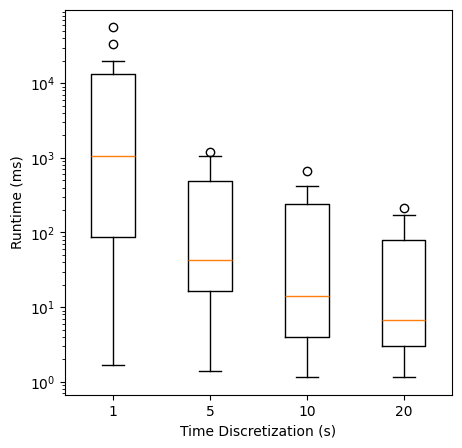

In [114]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.boxplot([
    strl_1_static_warm_start_runtimes_ms,
    strl_5_static_warm_start_runtimes_ms,
    strl_10_static_warm_start_runtimes_ms,
    strl_20_static_warm_start_runtimes_ms,
], labels=[
    "1",
    "5",
    "10",
    "20"
])
# plt.xlabel("Optimization")
plt.yscale('log')
plt.ylabel("Runtime (ms)")
plt.xlabel("Time Discretization (s)")
plt.savefig("time_discretization_vs_runtime.pdf")

### Motivation R1, R2, R3 requirement data and plots

In [5]:
# Motivation Results
num_graphs = 200 + 100
goodput = {
    "DAGSched": {
        100: [202, 193, 196, 190, 181],
        125: [206, 203, 212, 200, 196],
        150: [218, 217, 218, 220, 210],
        175: [232, 225, 218, 221, 215],
        200: [244, 243, 245, 237, 235],
    },
    "EDF": {
        100: [ 64,  45,  66,  58,  52],
        125: [ 82,  75,  93,  79,  65],
        150: [115, 101, 120,  91, 116],
        175: [135, 123, 138, 129, 115],
        200: [190, 184, 186, 158, 159],
    },
    "TetriSched": {
        100: [ 84,  74,  70,  50,  52],
        125: [115, 100,  98,  88,  88],
        150: [144, 128, 133, 137, 116],
        175: [171, 141, 143, 155, 124],
        200: [201, 190, 196, 167, 175],
    },
    "Graphene": {
        100: [ 57,  45,  49,  57,  58],
        125: [ 55,  48,  63,  59,  54],
        150: [ 64,  65,  66,  60,  66],
        175: [ 73,  59,  74,  83,  67],
        200: [ 92,  65, 125,  84,  93],
    }
}

In [6]:
for scheduler, runtimes in goodput.items():
    if scheduler == "DAGSched":
        continue
    print(f"Runtimes for {scheduler}: ")
    for runtime, attainment in runtimes.items():
        dagsched_attainments = goodput["DAGSched"][runtime]
        print(f"\t{runtime}: {np.array(dagsched_attainments) / np.array(attainment)}")

Runtimes for EDF: 
	100: [3.15625    4.28888889 2.96969697 3.27586207 3.48076923]
	125: [2.51219512 2.70666667 2.27956989 2.53164557 3.01538462]
	150: [1.89565217 2.14851485 1.81666667 2.41758242 1.81034483]
	175: [1.71851852 1.82926829 1.57971014 1.71317829 1.86956522]
	200: [1.28421053 1.32065217 1.3172043  1.5        1.47798742]
Runtimes for TetriSched: 
	100: [2.4047619  2.60810811 2.8        3.8        3.48076923]
	125: [1.79130435 2.03       2.16326531 2.27272727 2.22727273]
	150: [1.51388889 1.6953125  1.63909774 1.60583942 1.81034483]
	175: [1.35672515 1.59574468 1.52447552 1.42580645 1.73387097]
	200: [1.21393035 1.27894737 1.25       1.41916168 1.34285714]
Runtimes for Graphene: 
	100: [3.54385965 4.28888889 4.         3.33333333 3.12068966]
	125: [3.74545455 4.22916667 3.36507937 3.38983051 3.62962963]
	150: [3.40625    3.33846154 3.3030303  3.66666667 3.18181818]
	175: [3.17808219 3.81355932 2.94594595 2.6626506  3.20895522]
	200: [2.65217391 3.73846154 1.96       2.8214285

In [7]:
gaps = defaultdict(dict)
for scheduler, arrival_rates in goodput.items():
    if scheduler == "DAGSched":
        continue
    for arrival_rate, attainment in arrival_rates.items():
        dagsched_attainments = np.array(goodput["DAGSched"][arrival_rate])
        attainment = np.array(attainment)
        scheduler_gap = dagsched_attainments / attainment
        gaps[scheduler][arrival_rate] = DataPoint(min=np.min(scheduler_gap), mean=np.mean(scheduler_gap), median=np.median(scheduler_gap), max=np.max(scheduler_gap), sd=np.std(scheduler_gap, ddof=1))

gaps

defaultdict(dict,
            {'EDF': {100: DataPoint(min=np.float64(2.9696969696969697), mean=np.float64(3.434293431664121), median=np.float64(3.2758620689655173), max=np.float64(4.288888888888889), sd=np.float64(0.512530953812099)),
              125: DataPoint(min=np.float64(2.2795698924731185), mean=np.float64(2.6090923732191746), median=np.float64(2.5316455696202533), max=np.float64(3.0153846153846153), sd=np.float64(0.2732060938163754)),
              150: DataPoint(min=np.float64(1.8103448275862069), mean=np.float64(2.0177521874466966), median=np.float64(1.8956521739130434), max=np.float64(2.4175824175824174), sd=np.float64(0.2623569610918535)),
              175: DataPoint(min=np.float64(1.5797101449275361), mean=np.float64(1.7420480936187857), median=np.float64(1.7185185185185186), max=np.float64(1.8695652173913044), sd=np.float64(0.11358773675731139)),
              200: DataPoint(min=np.float64(1.2842105263157895), mean=np.float64(1.3800108845375498), median=np.float64(1.320

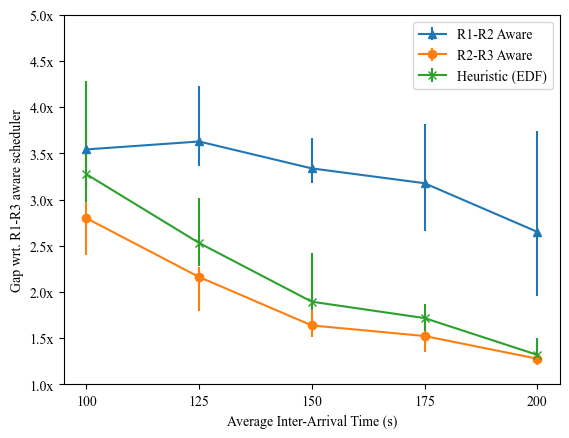

In [8]:
x_vals = list(sorted(gaps["EDF"].keys()))
plt.errorbar(x_vals, [gaps["Graphene"][x].median for x in x_vals], yerr=[[gaps["Graphene"][x].median - gaps["Graphene"][x].min for x in x_vals], [gaps["Graphene"][x].max - gaps["Graphene"][x].median for x in x_vals]], marker='^', label="R1-R2 Aware")
plt.errorbar(x_vals, [gaps["TetriSched"][x].median for x in x_vals], yerr=[[gaps["TetriSched"][x].median - gaps["TetriSched"][x].min for x in x_vals], [gaps["TetriSched"][x].max - gaps["TetriSched"][x].median for x in x_vals]], marker='o', label="R2-R3 Aware")
plt.errorbar(x_vals, [gaps["EDF"][x].median for x in x_vals], yerr=[[gaps["EDF"][x].median - gaps["EDF"][x].min for x in x_vals], [gaps["EDF"][x].max - gaps["EDF"][x].median for x in x_vals]], marker='x', label="Heuristic (EDF)")
plt.xticks(x_vals)
plt.ylim((1, 5))
plt.yticks(ticks=list(x for x in np.arange(1, 5.5, 0.5)), labels=list(f"{x}x" for x in np.arange(1, 5.5, 0.5)))
plt.xlabel("Average Inter-Arrival Time (s)")
plt.ylabel("Gap wrt. R1-R3 aware scheduler")
plt.legend()

In [9]:
list(x for x in np.arange(1, 5.5, 0.5))

[np.float64(1.0),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0)]

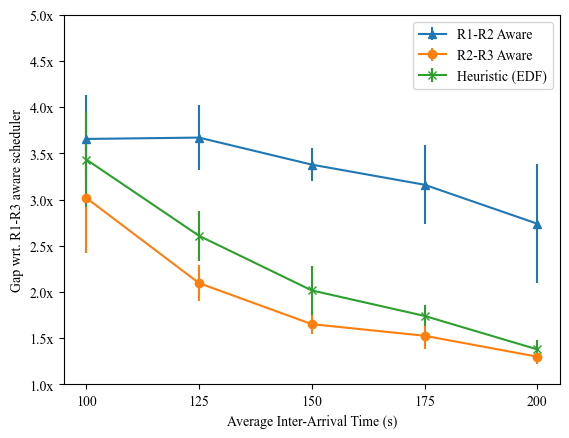

In [10]:
x_vals = list(sorted(gaps["EDF"].keys()))
plt.errorbar(x_vals, [gaps["Graphene"][x].mean for x in x_vals], yerr=[gaps["Graphene"][x].sd for x in x_vals], marker='^', label="R1-R2 Aware")
plt.errorbar(x_vals, [gaps["TetriSched"][x].mean for x in x_vals], yerr=[gaps["TetriSched"][x].sd for x in x_vals], marker='o', label="R2-R3 Aware")
plt.errorbar(x_vals, [gaps["EDF"][x].mean for x in x_vals], yerr=[gaps["EDF"][x].sd for x in x_vals], marker='x', label="Heuristic (EDF)")
plt.xticks(x_vals)
plt.ylim((1, 5))
plt.yticks(ticks=list(x for x in np.arange(1, 5.5, 0.5)), labels=list(f"{x}x" for x in np.arange(1, 5.5, 0.5)))
plt.xlabel("Average Inter-Arrival Time (s)")
plt.ylabel("Gap wrt. R1-R3 aware scheduler")
plt.legend()

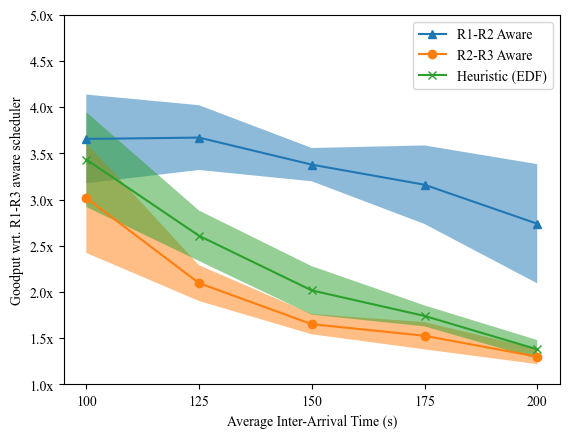

In [11]:
x_vals = list(sorted(gaps["EDF"].keys()))
plt.plot(x_vals, [gaps["Graphene"][x].mean for x in x_vals], marker='^', label="R1-R2 Aware")
plt.fill_between(x_vals, [gaps["Graphene"][x].mean - gaps["Graphene"][x].sd for x in x_vals], [gaps["Graphene"][x].mean + gaps["Graphene"][x].sd for x in x_vals], alpha=0.5)
plt.plot(x_vals, [gaps["TetriSched"][x].mean for x in x_vals], marker='o', label="R2-R3 Aware")
plt.fill_between(x_vals, [gaps["TetriSched"][x].mean - gaps["TetriSched"][x].sd for x in x_vals], [gaps["TetriSched"][x].mean + gaps["TetriSched"][x].sd for x in x_vals], alpha=0.5)
plt.plot(x_vals, [gaps["EDF"][x].mean for x in x_vals], marker='x', label="Heuristic (EDF)")
plt.fill_between(x_vals, [gaps["EDF"][x].mean - gaps["EDF"][x].sd for x in x_vals], [gaps["EDF"][x].mean + gaps["EDF"][x].sd for x in x_vals], alpha=0.5)
plt.xticks(x_vals)
plt.ylim((1, 5))
plt.yticks(ticks=list(x for x in np.arange(1, 5.5, 0.5)), labels=list(f"{x}x" for x in np.arange(1, 5.5, 0.5)))
plt.xlabel("Average Inter-Arrival Time (s)")
plt.ylabel("Goodput wrt. R1-R3 aware scheduler")
plt.legend()

<BarContainer object of 5 artists>

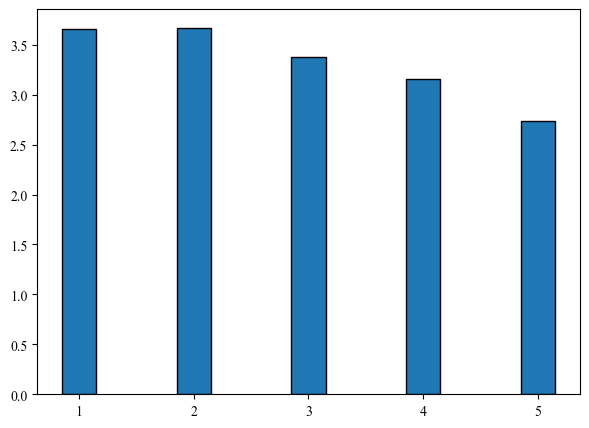

In [12]:
inter_arrival_times = [100, 125, 150, 175, 200]
x = np.arange(1, len(inter_arrival_times) + 1)
barWidth = 0.30

dynamic_utility_color = "orange"
static_utility_color = "green"

fig = plt.figure(figsize=(7, 5))
plt.bar(x, [gaps["Graphene"][x].mean for x in x_vals], width=barWidth, edgecolor='black')

# dynamic_bar = plt.bar(x[0], goodputs[0][0], width=1.5*barWidth, edgecolor="black")
# static_bar = plt.bar(x[1:] + barWidth * 1, [dynamic_utility for dynamic_utility, _ in goodputs[1:]], width=barWidth, edgecolor="black", color=dynamic_utility_color)
# plt.bar(x[1:] + barWidth * 0, [static_utility for _, static_utility in goodputs[1:]], width=barWidth, edgecolor="black", hatch="///", color=static_utility_color)
# plt.xticks([x[0]] + [r + (barWidth / 2) for r in x[1:]], schedulers)
# plt.plot([x[0] - barWidth, x[-1] + barWidth*2], [50, 50], '--', color='red')
# fig.text(0.62, 0.80, "Peak SLO Attainment", fontsize=10, color='red')
# plt.xlabel("Schedulers")
# plt.ylabel("SLO Attainment")
# legend_elements = [
#     Patch(facecolor=dynamic_utility_color, label=types[0]),
#     Patch(facecolor=static_utility_color, label=types[1]),
# ]
# plt.legend(handles=legend_elements, loc=(0.65, 0.70), framealpha=0)


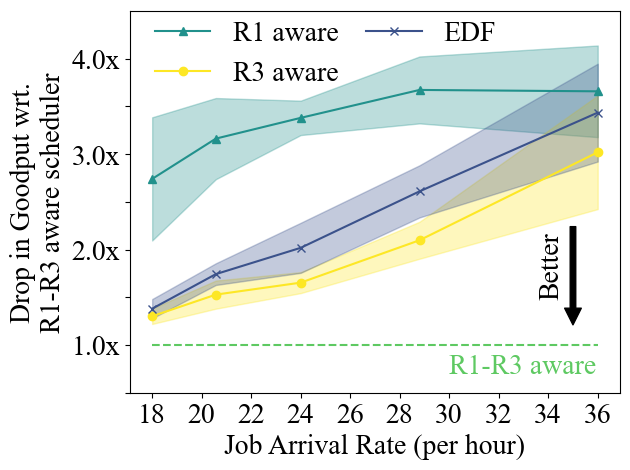

In [16]:
x_vals = list(sorted(gaps["EDF"].keys(), reverse=True))
x_labels = [3600 / x for x in x_vals]
r1_aware, r3_aware, heuristic = graphene, tetrisched, edf
plt.plot(x_labels, [gaps["Graphene"][x].mean for x in x_vals], marker='^', label="R1 aware", color=r1_aware)
plt.fill_between(x_labels, [gaps["Graphene"][x].mean - gaps["Graphene"][x].sd for x in x_vals], [gaps["Graphene"][x].mean + gaps["Graphene"][x].sd for x in x_vals], alpha=0.3, color=r1_aware)
plt.plot(x_labels, [gaps["TetriSched"][x].mean for x in x_vals], marker='o', label="R3 aware", color=r3_aware)
plt.fill_between(x_labels, [gaps["TetriSched"][x].mean - gaps["TetriSched"][x].sd for x in x_vals], [gaps["TetriSched"][x].mean + gaps["TetriSched"][x].sd for x in x_vals], alpha=0.3, color=r3_aware)
plt.plot(x_labels, [gaps["EDF"][x].mean for x in x_vals], marker='x', label="EDF", color=heuristic)
plt.fill_between(x_labels, [gaps["EDF"][x].mean - gaps["EDF"][x].sd for x in x_vals], [gaps["EDF"][x].mean + gaps["EDF"][x].sd for x in x_vals], alpha=0.3, color=heuristic)
plt.xticks(np.arange(18, 36.5, 2))
plt.ylim((0.5, 4.5))
plt.yticks(ticks=list(x for x in np.arange(0.5, 4.5, 0.5)), labels=list(f"{x}x"  if int(x) == x else "" for x in np.arange(0.5, 4.5, 0.5)))
plt.hlines(y=1, xmin=18, xmax=36, color=dagsched, linestyles='--')
plt.text(30, 0.7, "R1-R3 aware", color=dagsched, fontsize=20)

plt.annotate('', xy=(35, 1.2), xytext=(35, 2.25),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(33.6, 1.54, "Better", rotation="vertical", color='black', fontsize=20)

plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Drop in Goodput wrt.\nR1-R3 aware scheduler", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="upper left", fontsize=20, ncol=2, columnspacing=1, frameon=False, bbox_to_anchor=(0, 1.04))
plt.tight_layout()
plt.savefig("motivation_r1_r3_edf.pdf", format="pdf", dpi=300)

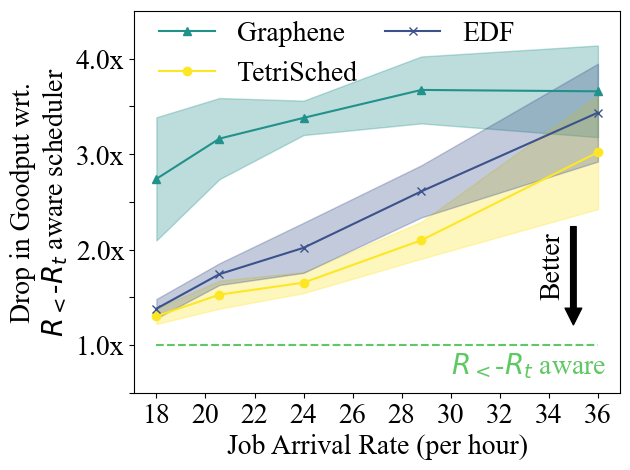

In [18]:
x_vals = list(sorted(gaps["EDF"].keys(), reverse=True))
x_labels = [3600 / x for x in x_vals]
r1_aware, r3_aware, heuristic = graphene, tetrisched, edf

plt.plot(
    x_labels,
    [gaps["Graphene"][x].mean for x in x_vals],
    marker="^",
    label="Graphene",
    color=r1_aware,
)
plt.fill_between(x_labels,
                 [gaps["Graphene"][x].mean - gaps["Graphene"][x].sd for x in x_vals],
                 [gaps["Graphene"][x].mean + gaps["Graphene"][x].sd for x in x_vals],
                 alpha=0.3, color=r1_aware)

plt.plot(
    x_labels,
    [gaps["TetriSched"][x].mean for x in x_vals],
    marker="o",
    label="TetriSched",
    color=r3_aware,
)
plt.fill_between(x_labels,
                 [gaps["TetriSched"][x].mean - gaps["TetriSched"][x].sd for x in x_vals],
                 [gaps["TetriSched"][x].mean + gaps["TetriSched"][x].sd for x in x_vals],
                 alpha=0.3, color=r3_aware)

plt.plot(x_labels, [gaps["EDF"][x].mean for x in x_vals], marker='x', label="EDF", color=heuristic)
plt.fill_between(x_labels,
                 [gaps["EDF"][x].mean - gaps["EDF"][x].sd for x in x_vals],
                 [gaps["EDF"][x].mean + gaps["EDF"][x].sd for x in x_vals],
                 alpha=0.3, color=heuristic)

plt.xticks(np.arange(18, 36.5, 2))
plt.ylim((0.5, 4.5))
plt.yticks(
    ticks=list(x for x in np.arange(0.5, 4.5, 0.5)),
    labels=[f"{x}x" if int(x) == x else "" for x in np.arange(0.5, 4.5, 0.5)]
)

plt.hlines(y=1, xmin=18, xmax=36, color=dagsched, linestyles='--')
plt.text(30, 0.7, "$R_{<}$-$R_{t}$ aware", color=dagsched, fontsize=20)

plt.annotate('', xy=(35, 1.2), xytext=(35, 2.25),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(33.6, 1.54, "Better", rotation="vertical", color='black', fontsize=20)

plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Drop in Goodput wrt.\n$R_{<}$-$R_{t}$ aware scheduler", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="upper left", fontsize=20, ncol=2, columnspacing=1, frameon=False, bbox_to_anchor=(0, 1.04))
plt.tight_layout()
plt.savefig("motivation_r1_r3_edf.pdf", format="pdf", dpi=300)

In [13]:
sns.color_palette(as_cmap=True)

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [ ]:
dagsched_dyn = [99.9, 99.3, 99.8, 98.5, 97.7, 96.2, 93.7, 90.3, 79.3]
tetrisched =   [99.2, 97.5, 98.8, 96.6, 94.1, 90.9, 86.1, 77.3, 57.8]
job_rate =     [90,  100.8, 100.8, 108, 118.8, 129.6, 140.4, 147.6, 180] 

plt.plot(job_rate, dagsched_dyn, label="DAGSched", marker='o')
plt.plot(job_rate, tetrisched, label="TetriSched", marker='x')
plt.hlines(y=99, xmin=100, xmax=220, color='blue', linestyles='--')
plt.legend()

plt.ylim((0, 100))
plt.tight_layout()

In [618]:
# erdos4_runtimes = to_s([57716,41029,55455,48978,44489,55560,48555,30057,52308,33720,81383,725477,53183,85324,60418,91369,40613,55066,68968,263963,74206,37886,78093,57764,75981,58950,48727,67576,59141,52142,55406,57318,60299,48442,317559,115743,379373,154925,52230,630527,140891,259922,116510,127474,97631,214097,78261,47678,87166,70709,169471,56507,60524,49270,55974,98338,46763,90022,47950,48019,42232,113912,39157,87643,84584,56030,56368,47093,43242,39869,55156,102727,48251,61489,66865,51933,53393,676775,50912,62716,297999,937544,194825,124738,398130,71756,232066,104269,71767,56331,72157,50966,40096,116333,52947,92797,52125,69718,43631,46079,55695,87356,56598,102939,103434,38073,72445,53956,47973,52528,56852,59686,63635,223047,36483,85825,52837,64194,95132,221935,61158,51329,47752,62249,92525,55586,56574,50212,57247,46159,49072,66042,48406,20620113,12938841,7069179,6081722,1937922,56231,54833,47164,48342,48278,47390,101840,59227,54039,98865,52004,160935,53545,171219,125806,79550,90156,98128,51919,192619,58749,54242,54831,138335,60099,135045,120695,70444,62091,74188,59992,55756,43300,43354,223145,71100,35505,3048714,145721,397224,99006,73033,96722,787532,39536,175851,593920,77176,132806,65471,56536,75730,60570,42162,49945,83867,57071,67636,53294,50218,54049,56081,57878,281045,36594,64921,49995,142087,51752,41168,42855,65838,75280,45640,46313,35004,59529,58430,55735,47020,57979,63023,57285,56107,47019,114742,53698,37489,37186,51289,51741,76953,75572,35613,47316,47077,42405,68838,56084,40650,49753,42672,51159,61911,28848,71607,53125,39341,43544,52062,47307,53792,59375,71138,64955,54999,58966,83418,55799,110709,46265,76971,48512,37815,90580,70013,48292,46758,78548,54113,79238,46159,48100,39117,60956,55531,52944,71370,53877,86945,68861,54067,62244,53003,46530,72258,45280,96256,62499,153877,50726,71880,118796,51172,31942,50810,50541,46320,133310,60290,67086,57981,61179,76375,53024,68885,42650,45334,99383,46017,72502,54385,49097,101079,41580,57082,49013,51845,52420,60576,40529,41065,59699,51131,67254,52030,57875,50049,55431,39621,48278,53262,48695,49815,46023,72434,51713,56091,50960,49368,50612,73235,61325,61196,74581,55522,84462,59632,38954,43263,55990,81448,58031,71948,52323,54576,42921,48440,38186,76481,47584,53520,47392,63370,50876,54622,59473,54652,52294,41396,49883,41905,52108,31242,63829,54027,55935,202020,46617,53991,49059,52590,38866,35549,46777,38088,56118,50519,48160,50465,85423,54767,52398,351524,171208,92374,96106,63850,31838,47126,40008,28503,148221,34297,40576,39836,77532,103577,56340,80014,46442,61333,57275,90047,61249,42201,65122,63775,53746,40302,59765,32604,52718,63407,115946,50703,55970,96138,65879,189466,44906,73254,41378,65944,37324,47649,42957,52102,40636,65988,44811,76281,45611,56301,53373,48391,68400,68248,66238,61806,48384,50355,52566,52465,46891,31593,49340,64888,48549,45733,51817,47168,41439,67084,51934,62978,53327,67824,47874,74105,51649,98862,53540,104833,51491,65980,78507,103309,45882,55273,50710,59942,60594,38731,50080,53321,61446,43486,81490,68400,61578,70735,46440,61163,73041,73890,50443,70301,58934,53886,57410,70990,45754,58755,43576,42936,53184,48891,43305,44796,51260,47058,47756,47326,57235,99651,40179,55313,159211,44430,109166,35611,63375,94650,47762,51100,49393,43705,156731,42695,68505,55306,106775,48319,49513,59480,42166,69953,53655,43150,48666,81278,42052,100356,62594,61226,44373,58011,63099,45341,88091,53309,39683,58159,54316,36976,49768,52689,42948,57485,70922,49343,65502,50388,43219,65724,52621,43047,64224,52621,70967,40540,54069,54330,56292,68573,64648,33089,60710,53866,57865,45320,52437,56587,43118,58401,61460,76309,52680,132712,38294,145039,53315,65063,151981,66432,121382,51999,53484,52903,76991,54570,55396,46675,45876,48501,97121,187655,34718,98587,46801,47101,56019,54300,197062,62520,57759,47454,58594,69602,50315,62017,46358,53413,263166,52640,148390,46240,45948,69829,53714,77121,62088,137949,71573,56375,134557,63494,46482,51277,48774,56450,146513,69595,54703,75225,233750,52430,47189,73524,34718,74510,43827,61287,29052,53368,56838,30777,73396,68466,54601,201681,94109,67535,72347,176584,370729,81511,47295,92084,74001,48319,79542,38091,87614,54729,65526,65167,60092,48855,39613,56871,54999,47469,28505,44604,49914,36481,55147,44220,40004,62330,52568,60686,81934,56223,82310,156298,100099,58556,56260,76982,46970,45243,63535,34622,52577,51415,48996,210928,62891,55760,57850,44473,40322,56845,52271,83144,54354,71990,62438,58159,69453,65022,86550,69732,63853,38798,356548,63349,73260,47646,57445,66098,52018,59877,76917,64300,42853,52398,39741,48916,88079,58560,81289,59226,89944,73806,55286,84274,61628,210122,57157,133764,46777,1126397,61300,82577,116146,90042,36749,63661,80260,41500,57718,51433,32271,55783,68310,47588,31161,50401,40560,43145,48466,44054,29918,69812,42190,68766,48357,61540,48850,45089,33151,44366,39428,46629,62118,74601,42799,107481,58056,106424,63631,94527,251143,107936,54727,64077,39451,52476,156950,62355,103554,100703,137711,142130,41886,101968,46769,56115,53870,76465,52336,50734,67570,74513,63490,69712,65208,175783,44750,67747,42773,50988,59107,39511,45062,52998,62181,70055,66335,52509,98017,55525,51754,57179,47472,51354,47956,63749,34387,39211,49423,49504,47553,58851,65900,47041,192812,97465,49731,55090,60128,38808,51701,43288,49164,48990,128074,63120,67348,34829,42064,52872,51035,48297,50038,51335,55811,77320,82403,97894,48910,73269,115747,118292,49820,53416,54816,45740,221583,93915,56612,91871,80560,70926,83826,95283,51486,46345,62174,50972,198656,47626,2434425,948789,685328,75693,229252,80557,242423,121606,454480,240545,105135,66862,67355,49930,47290,58325,112791,45575,55449,58616,119978,65139,48671,64639,239459,41934,208293,37629,42940,75611,154206,118774,84360,44980,77366,93669,50153,83014,87943,35430,154417,102192,47316,60076,41398,49114,41914,56972,52912,49424,50052,43295,51698,39716,51371,52292,51762,51054,41889,30812,36673,48624,35756,33311,67352,51200,63128,47926,52297,70541,53401,102202,43032,46548,50057,57170,66511,51522,39742,59451,56817,55018,69222,53801,52041,61486,56306,91940,71598,140464,72086,74649,62298,36623,44477,40057,110807,59716,50311,39711,42280,208745,59439,52736])
# gcloud_runtimes = to_s([20377,9909,16572,13262,8994,18115,16043,4572,15565,5975,44961,219494,45627,42687,7909,47147,19214,14588,19377,201625,22747,70244,29045,30123,33043,26920,15537,17876,25108,9623,15374,39729,13959,13057,449615,19717,441378,15416,889220,29429,26944,141033,39754,191393,19985,178395,17118,97673,33833,48762,59781,36865,19815,15541,22061,12601,21368,51946,21054,12380,55923,84581,20945,50184,21071,36176,17846,11483,21417,9556,25450,58389,36355,19285,43993,17112,4167,237823,107414,568463,848174,57940,783294,61382,208713,31948,255299,204755,333371,10114,19416,28950,5871,58271,15772,43253,43963,36687,40643,16213,90270,32626,85964,15741,10189,16999,17670,21759,13486,23230,22648,17029,23287,155246,6957,18948,13055,19291,7794,127736,13110,12057,36379,11293,19297,16473,10630,18479,12058,13271,12291,27771,13347,17074957,6897641,9706038,3253865,841559,18511,15322,12745,9695,10472,11299,66807,12378,38846,82223,33694,242333,19642,25945,48431,16858,21015,79213,18454,97950,35938,55701,83950,80074,15797,88685,49378,25176,21438,18865,116410,12615,14502,87432,111452,11584,8988,283953,57849,411332,7685,884465,49253,108366,27340,39663,29518,17522,40693,16589,16182,22421,36474,10495,9856,39970,12210,21907,18111,8445,40317,43264,70379,144714,12345,264411,37064,46357,15142,70298,7840,25182,39481,17089,9697,9793,13381,28769,19192,11024,22591,33890,14455,19495,11289,86999,17128,10191,8178,33387,17987,14663,39439,44360,31081,20279,9033,19044,24299,13998,16779,22454,5549,18390,4355,29245,13036,11479,10849,20510,16634,14876,27036,17637,22329,12064,22726,40225,13037,22977,32685,18895,6221,32049,39679,25465,11211,30652,36130,21135,39098,15829,24909,16627,9727,15688,13223,25489,20130,38497,23897,28350,8020,12787,25313,86014,12344,57119,23399,61148,6743,25701,73397,10396,7073,12487,50146,11419,45892,16085,29624,76801,33967,47203,18673,12222,6453,11644,10262,55682,9793,14377,15711,60068,15915,26196,18147,12735,13261,24780,10977,20562,11788,19099,17428,17015,12537,10875,19056,12900,8704,18689,10584,16308,20646,36701,24802,15141,15485,16927,20527,30598,17152,17810,15485,20532,38413,7325,8710,47836,20081,12451,48716,6576,14187,14525,10672,20137,11833,37422,11930,13996,30157,6553,7691,15325,31665,11834,17252,7545,14102,23754,25205,4915,18104,19912,14277,161417,11762,86451,35516,17234,7523,70721,11540,10643,18393,12815,17065,13853,25043,17711,15414,154347,18765,85490,15470,45585,9606,19978,9594,6398,90996,3898,6970,22905,23522,28190,20613,35598,11307,14110,28822,36941,17011,13912,25686,24277,18889,3678,10389,8015,10979,17884,69845,15913,38926,44790,16028,89800,25654,14056,14688,19639,12374,13298,9190,28501,6668,26632,15049,17500,14966,12976,20091,39904,33642,36111,23139,16726,10795,30859,14733,26508,14536,5080,17278,19725,15895,15040,14998,9587,13177,18209,13295,17439,11882,17482,9669,38453,28163,51919,14239,50060,12224,14797,55424,19454,8868,15622,16274,18422,24867,10625,10685,24587,25775,18551,30513,9029,36565,24330,25819,14672,31735,28488,9201,36081,23565,26755,16801,22521,8458,17580,15035,11121,25126,21063,4609,8611,17752,107278,13683,10338,17270,31386,6646,129551,145531,14172,18284,43423,30775,31110,19358,5214,6503,8193,17423,8721,49571,9596,69647,13810,11337,34146,33637,23159,45594,13115,20257,24524,25501,11770,42171,21759,14685,23827,23655,13404,57786,28555,13856,28550,14369,7945,26708,14595,9959,12480,41674,8989,33970,13682,20567,34128,13735,21844,14712,22027,13911,13075,14442,18646,24597,14892,29328,4852,24756,17903,15390,21017,8907,22971,7141,32218,9389,31741,9484,86390,4981,125396,4904,15159,9843,65500,69804,100397,41381,20115,47236,14638,15171,11692,8851,14305,34289,25512,30195,23598,8961,21491,30078,26324,135884,15497,18070,24703,53011,18952,18729,19220,9132,18318,197737,25702,35882,7101,8570,19637,57862,47549,14017,125570,14719,9530,10699,87011,8479,22380,16243,31827,44839,14171,46113,32015,65667,22405,20775,61871,14550,31221,13250,17499,5031,16914,21990,7680,29301,28148,21607,200707,50157,22268,44112,209488,26944,31987,66562,21900,44628,17679,24779,8612,56952,16613,31231,39224,24343,19561,9840,18975,7744,10648,4191,8517,12027,12529,16229,10558,8686,28015,10369,13582,44729,13456,31264,144682,37106,11107,18549,22843,9162,12059,24216,10658,20770,12653,9902,223060,10980,188185,16242,18114,9801,21301,20512,20079,27217,29257,17448,39080,31037,10361,43123,19539,43814,6220,151628,10741,11613,84342,12622,16110,18686,28326,24720,38834,12653,26368,7729,14589,59812,26012,39456,19527,73847,26802,25842,33972,35818,87729,19374,111987,36539,164056,27358,21576,57738,17979,8508,56971,15131,8789,23610,11969,25782,21421,20378,45825,7879,16369,13182,10014,25029,9726,6686,25474,24156,35409,29109,12151,13339,11118,6240,11566,8019,10629,25648,30547,8867,111896,25115,73987,31567,25097,123005,131037,21889,33676,7253,15746,106827,25180,20427,85073,90528,103207,22021,52979,12382,19959,47807,26606,15752,15258,92765,93962,37197,18544,17508,27712,13411,19715,12956,15776,22112,7468,12458,16132,17889,27941,31016,19834,58406,18888,14923,18826,19237,24939,11497,18418,6807,13626,13630,10719,13523,20133,29782,12900,147209,56374,14452,16944,14140,5890,24506,10164,13985,11752,207196,18653,15970,6114,12512,16648,14942,11312,10201,12990,15171,29269,38573,58188,12941,14205,67259,58522,20050,15279,13121,13203,164957,52832,15758,64991,54611,11351,231126,50306,17122,29187,32701,13936,133579,26480,644184,480187,315294,548084,301190,19135,67262,20984,26006,135176,51608,13521,44767,9556,10489,32747,90435,21521,21601,31265,70850,20112,12874,18367,235582,8894,205451,13606,5580,42471,68493,59798,29478,49049,25151,34480,22559,20752,48216,6445,108401,23813,4976,20433,9274,11438,11424,33417,22225,15786,19450,7795,13911,7983,15076,11845,17949,14091,11074,7445,7370,13021,7300,7059,20757,14941,18867,9992,17444,22699,21572,61863,9484,13918,20631,22641,27078,12076,10262,21463,12747,26621,32172,16544,12683,25008,17854,49107,27418,64168,26068,19859,13163,7608,10907,8401,48933,21996,10526,6617,13800,169352,28287,22842])
cloudlab_runtimes = to_s([62282,36275,49965,42685,36938,52297,46073,28495,49400,35321,81060,1018100,61738,105172,48527,48091,29946,50100,68401,255707,44388,34838,183728,69638,142372,70314,53242,52567,58784,35322,42114,57826,44425,57938,594253,138985,1811293,104252,310664,906697,79474,281119,943009,256550,41703,291758,39866,246214,86065,68732,121064,80351,57832,42554,58093,41309,64531,110741,42680,39941,38530,141301,34767,103734,84717,57904,38582,42848,36906,53211,47608,123315,44237,37418,45937,48299,99318,985300,169243,369574,723034,177796,121780,66260,166062,133698,394771,156948,112560,35769,100913,35500,39492,131499,67190,106231,57424,95791,85112,62569,92492,56412,77757,54420,40104,52426,54766,56551,43553,46564,49179,43193,60496,339835,64766,68297,44786,52484,46362,451390,55275,76646,69308,54972,53455,105746,46709,40734,61496,48288,32986,58967,36708,42843848,14820829,8832299,7264119,2149394,50842,57790,40777,42734,35898,35157,120075,54958,42329,132679,41547,409066,66226,295993,68351,44201,92748,34939,48669,608123,61901,50123,34654,164473,45613,235027,116922,38508,117892,50991,34472,117697,43929,99470,134579,86245,49279,301597,709239,152257,810008,608725,59629,338411,54855,100654,57332,61654,53598,73325,57712,53244,34704,39218,55565,97903,50340,48413,47512,36928,42220,64418,64009,359412,74402,119629,39274,198315,61901,42000,35740,50381,81381,38110,36314,32179,70255,48125,64791,41908,74124,42462,75610,61426,39537,93746,43375,33494,33849,40823,42380,37675,98577,46132,42012,73249,37166,45172,53958,31676,35293,53742,31521,41111,28091,86987,52417,41280,55420,61249,41435,92921,56552,54732,96130,49081,47519,79047,59242,55755,50585,69851,36640,40453,109792,48258,49675,82119,81531,52956,102012,49987,42727,60912,43670,35694,39899,44717,55036,41012,52311,49351,53155,44822,37976,68953,45749,115625,69089,87644,29717,67213,124548,36745,29151,60905,47920,55955,147965,63090,111058,76841,105209,147341,38936,108466,41785,66421,42337,118220,38432,65577,46942,110158,64206,74857,35719,48646,65365,49778,46407,42807,39670,56383,43768,39648,40298,55685,54413,52177,33138,41977,34254,54558,53976,85709,43144,49365,35215,42126,57540,48041,73608,47809,46358,82338,109427,51826,40233,58647,60376,40323,45181,40213,395894,61955,34722,49310,82551,78557,39752,44753,45059,30181,40370,44173,74638,47375,56594,35113,43699,40821,53621,50403,34024,42521,53431,241643,36479,48314,42293,45433,88189,65994,34892,45285,65407,36631,50000,49204,42640,56664,60198,278029,243096,224208,74962,67659,43355,60527,33087,31452,128234,29283,35523,69876,62979,71957,52297,68800,66738,54299,77132,90148,32331,30404,82817,43978,69108,34004,41166,36802,50052,57707,183627,40777,91804,97041,101556,226391,46558,83698,40683,65758,39004,37685,36754,54734,31019,49044,44574,53072,52012,38986,63319,88379,72010,76729,51349,62480,56622,45977,43531,35011,40389,29293,46895,50187,42777,49764,59899,28750,32972,96511,62828,50481,66499,73600,42846,96420,73850,99935,59331,133854,36207,44686,33056,95420,42769,68178,44054,82543,74675,39916,42319,69822,54564,37349,61481,38392,82816,79223,58391,61447,80457,59342,36559,91272,58428,62307,59210,60726,37583,43842,39178,33393,62200,53615,34106,37760,39437,80367,66072,31162,59181,170620,27584,145316,189529,102824,43234,34546,101595,54250,40378,27821,28844,109955,158402,48109,91224,101231,95268,264065,44862,45524,62449,68558,50341,18857,58702,61470,48260,41277,56642,46587,44980,57441,67257,55655,95934,47883,50679,58788,44049,29938,41862,43286,35161,41170,69648,41526,86381,48763,61028,84003,50080,34414,75063,54164,52938,43504,43034,57145,45365,35975,75962,32597,56861,35244,67611,42096,53456,45268,41934,50505,42779,64994,49055,181012,50650,238250,64812,94982,32846,218249,103064,64840,47323,40223,42266,508069,46646,34060,34040,42295,33471,75315,192281,54039,41635,42601,72897,69221,206328,46876,47921,69762,47415,82401,38608,48940,40174,40658,368856,52094,60406,136998,59786,43798,62243,94925,40050,372847,38225,37349,40763,200112,37791,69006,51843,47769,97677,84613,77109,58127,150427,81605,51424,46438,45978,84667,42727,53725,27178,41636,49555,34614,39809,72319,77162,355065,58300,422826,191170,258193,661080,50708,72690,43757,61985,53272,87497,34248,97552,52172,61167,71196,58041,61911,32565,59686,36957,42410,28137,34159,54190,36643,45782,33867,41464,61081,39180,49679,79463,44145,59179,171209,103819,65458,42622,79497,45131,34256,92991,28477,58671,38023,34592,253540,70064,54252,51888,46417,82434,70505,56911,63127,69562,68553,72087,70141,84290,71938,75705,44567,73790,28913,350911,45532,53699,29253,34502,62224,115971,53444,64272,99700,66116,73752,35347,46024,90364,53263,113537,37107,113529,59631,37508,69352,61239,283086,39749,106771,69660,763567,49575,82637,63213,126790,34986,68580,89553,36160,65661,63510,43974,60940,52484,50945,33244,47495,37800,42588,62699,39061,36835,53024,44051,91353,65131,45522,41866,48784,28987,40567,31395,31866,56274,67869,38691,107920,90900,139411,74161,74171,197536,218480,135821,140777,42302,51187,126289,40052,133564,122641,161989,71266,95060,109990,70543,78678,54134,57996,28378,49188,74972,86745,41746,19679,66121,47517,37252,48505,34628,56064,55576,31829,39343,75655,52781,98032,55085,47235,146731,47508,47462,43284,113180,46565,64557,48702,32835,35920,41558,37552,39643,44169,78425,38802,220381,93668,61513,48214,42271,50483,44973,41200,44906,38124,130087,56003,65533,29945,51644,38497,41301,39560,38720,44860,54227,60111,70570,110240,47950,49569,114537,127294,44055,50295,51930,41621,921616,143396,50329,105832,88167,52719,105996,64003,79970,111636,68185,49386,117609,81641,2011031,689049,213393,8120331,195816,65204,70995,33197,40855,232920,58567,97680,39325,31416,36367,45023,116581,45649,64485,58393,129956,63058])

# erdos4_runtimes = to_s([71420,43831,56660,50462,46882,57139,55856,54870,45309,79667,49805,95905,305223,81455,63144,60180,68722,56551,54651,39684,47681,55129,31692,42661,60389,70699,64402,34434,62591,47783,84763,49831,47344,46720,57831,57214,45160,44115,61155,63954,66036,59998,71040,44075,50369,48174,97496,63350,44170,99270,73715,39737,69415,81124,58263,43495,71817,57970,64073,44838,47686,52551,33179,151046,59091,78771,43176,58458,215819,34643,71746,35273,127358,90905,73358,48376,74041,53271,54945,136110,49102,42120,1299056,56094,127633,1800657,110252,124654,168817,148443,91624,185750,88911,71677,46077,46595,70380,118583,85727,71446,65294,46669,97904,59921,73912,98385,33822,56262,107741,51395,48639,46725,80860,50862,103610,59000,100554,42789,54577,61293,209857,50942,47439,105835,48814,75453,53574,46622,56907,54419,39914,65674,78611,51576,10873971,1313984,884111,55254,45057,53764,53734,44671,42072,53795,173835,41190,45289,69921,94614,144083,86245,83526,80368,54541,57589,172674,53666,121355,61497,53806,49909,116394,41661,113843,43985,89221,60706,64150,83114,71552,47748,96991,77506,60960,52380,53533,111309,55169,67670,46112,37388,71218,43324,43858,60991,49923,44234,36559,85625,48416,44161,48010,41553,72191,49540,58617,65184,44203,66216,65306,70409,221928,68048,60118,121359,49151,41403,68182,44440,65214,42511,35317,56998,47665,45021,50284,111381,53462,72539,44210,59755,130582,77787,57724,39943,42054,46538,50895,45076,55707,16117,59547,60341,39570,68821,65406,40061,45087,50848,42281,53200,27603,80043,53090,64968,49074,71475,44961,47126,39418,75033,41261,104526,50559,36572,39865,88798,164963,42407,43348,80975,69333,165038,105443,118330,76931,49506,106490,67604,67570,64974,89071,65007,56019,53637,53638,49510,458257,55212,47852,45700,67913,899977,61450,633220,134651,236390,211564,116218,143685,58553,54437,87078,54380,78187,46711,258280,53905,119581,54956,62257,74738,62130,37777,63401,63754,68508,45586,32044,93857,116439,65068,56390,42707,42846,67011,54957,43897,44351,45349,74214,45736,50154,45362,74338,56052,40262,197482,73764,53331,48635,59469,79717,58345,71168,65768,50451,116154,71291,52536,83449,54573,67749,55274,42396,42224,36146,249018,39801,132546,45383,69685,94782,44170,100576,48060,85750,80946,44111,53423,69469,38749,41184,62273,64613,49669,107844,50659,81266,45036,50092,55982,37787,55294,55444,237331,56938,52403,45293,41223,96456,99427,54908,240935,51945,48841,53531,72323,145563,78576,46875,64497,49580,122759,54454,53768,49338,46243,40451,38313,109860,35429,63905,39511,50995,105167,50471,58689,66691,53222,74781,62196,73639,71859,46963,49900,39281,130926,50591,76320,53830,54420,86403,60020,62776,66242,101756,78792,48293,55189,42989,53729,36059,50690,58171,47142,36135,47971,43999,43088,45347,136166,36574,75098,65497,70547,51705,62054,54522,44951,52734,57084,47957,51670,31791,46276,60153,67852,44829,52708,252230,61336,58162,53350,141875,51041,55751,85662,51518,74724,49867,52577,81836,43008,50792,48982,52780,46908,68285,49490,69198,54785,128987,50335,67526,97917,76921,90072,40332,73824,63322,89436,316743,62558,48428,86123,83971,55366,54065,49056,49562,55664,52294,64650,44190,49512,30704,54385,101965,53277,58609,52587,45048,68464,59024,127908,98875,53490,41542,55663,56639,48284,48735,51757,56339,39354,49918,48659,77984,122726,57253,86034,45176,70238,131271,47034,38222,77464,82291,64755,42502,68096,56204,49560,38757,52666,61375,51994,65572,42482,43732,45200,39896,48230,49570,45180,55499,76769,34846,56964,67731,104518,57392,59203,55354,44148,69539,41548,215186,51358,109691,71853,62522,80287,32409,65223,66844,51330,77067,48782,47361,47266,51239,88203,106099,58472,70953,32823,27283,92449,58401,52809,48567,51442,59323,86767,31143,46043,74406,52851,44614,44453,49296,61269,56111,24109,58315,57632,52123,62459,56446,206901,67889,46300,72888,11187,39454,54373,91961,58135,63484,136779,47393,52105,138201,105460,48504,88086,66298,199305,60119,76027,166169,49358,51818,54084,53897,49560,46344,199031,79396,69842,160797,65206,95737,56701,272982,90970,57628,46188,35038,100502,47118,41066,63256,48768,57935,36114,124262,60263,54024,49371,56802,62383,53301,52984,61204,59262,87100,68485,112198,42359,62504,53011,74888,137075,62974,63868,46003,67999,69168,34805,52048,49092,56999,38223,33543,58044,47998,57634,63820,70206,34832,48448,223000,73470,86943,63606,66272,114761,75499,63531,50851,51291,65867,51194,40061,42722,376030,35275,47727,304336,107016,79544,39852,74493,50025,36117,40071,60810,58233,72012,69466,45655,49373,51017,296457,58108,75022,61920,141035,55276,49577,77233,41588,12651,52843,47705,40094,45969,60463,47041,83948,44241,44601,304102,86153,72840,64519,238671,152556,78804,185486,1270521,89989,119147,52556,86642,63058,67256,62589,149436,72887,78518,50528,98037,33835,46631,42855,90783,57162,56213,50765,47340,51310,59890,48440,84953,73417,56034,43635,62345,46814,45385,35968,47903,59499,54572,47362,135794,64416,111118,43313,108608,58434,85371,57054,58403,63589,53761,116411,219700,55014,217518,71446,211780,54380,105435,83117,68145,33783,48911,40093,60727,49263,96505,55486,60613,55520,54466,93851,51256,48427,135039,80627,68346,75688,66825,58739,81513,75526,72507,123167,77183,69459,56082,88848,61641,49263,64595,74727,46868,55410,46208,46203,66436,73091,38416,243894,77315,109353,55809,51607,34417,56535,56180,48031,46774,161280,61980,51432,39606,58717,56202,46282,47338,56744,60325,50318,65583,71919,115611,53711,53479,119055,88034,73291,62400,56671,47501,305438,98102,55421,83527,107449,41423,119210,67795,162021,66156,88919,58877,101885,53729,3549277,358811,119761,5224655,238912,50903,75199,44779,66560,215676,67485,112435,56273,39662,42908,49588,208740,55209,59789,64458,120249,61709,52061,70486,371853,40175,142179,48234,50308,95303,133225,206249,153854,63566,64708,195576,61221,65898,112746,43282,114519,55501,37460,68408,30735,46426,39097,74821,43372,51358,64920,38208,46100,42175,39782,44114,51481,44816,43330,33840,40906,56316,31755,42407,57569,48932,56884,33195,51787,55649,58545,60353,33729,65362,51169,56157,52092,51875,46451,62013,50566,58352,56296,51992,55347,72209,49374,83489,66735,138409,77932,54216,44395,36191,48937,28339,91853,66618,45149,38632,45520,268227])
# gcloud_runtimes = to_s([22360,9903,18900,13286,9681,18658,19986,17391,18573,35635,5430,34271,249325,12150,30856,12886,41335,21458,14829,12437,12669,17851,7639,11759,29639,32076,32729,5015,78953,30870,18260,23799,16498,9912,12585,19573,14327,9025,21436,24063,29057,18604,10532,19588,22115,21614,106241,34804,81205,83919,30440,15696,15067,21588,26969,18296,19412,22226,27815,14863,11097,18194,10352,89596,31665,44386,11234,18391,144270,28456,71665,15223,24974,50076,26031,17772,30402,73762,16556,73656,15623,9112,89341,144542,432851,57376,27586,155800,39521,103680,51571,108448,47204,35851,8508,17460,17577,52398,23048,19775,12867,50377,9492,20329,57573,31367,7894,11198,14075,16767,13527,16576,45843,12320,79445,8959,22771,45530,32344,23784,164686,17707,78362,19573,42654,14710,24064,12865,17402,14077,7727,31728,32574,8200,5859789,625026,553087,20722,9725,9511,10337,15954,7771,11833,142280,15820,12136,63317,25560,104483,32782,24858,13739,241777,27065,34412,28757,20411,24093,13941,13828,64943,16904,77466,10415,9868,68642,17363,7643,89575,15957,20828,85256,18751,58402,13259,71044,10557,17830,23841,14234,18988,7494,16415,14218,13875,10417,12134,27673,14233,24829,11909,12773,24970,14526,7549,19670,37005,29219,21996,27209,78315,19318,67187,23057,13900,31188,22479,24044,25920,9159,10681,30215,12641,19761,15949,34892,15025,38960,23624,49799,126315,25776,13415,19656,8612,15307,12323,10196,14205,16599,25268,19372,7670,33145,15255,11104,14939,25630,12271,15457,3981,30211,14567,19660,12235,25294,10655,7510,15483,31845,4787,52651,12702,8879,32850,31815,57507,12048,14604,19166,37726,22949,37238,62624,24052,40803,169842,11866,24602,33371,19223,14401,9259,34942,17129,13415,340133,341661,21667,14525,95859,45963,481369,244280,39962,316720,172628,84428,103596,42218,31192,24572,7314,37118,35139,106567,28331,45997,20962,88891,22737,55340,8158,20056,33299,10371,15493,4050,68831,61570,8772,21568,13813,12451,12218,13374,14657,10322,17526,26969,15378,23102,8729,41964,24127,6305,156321,35408,43949,18698,8337,41588,27503,45361,13393,20725,62751,9474,36288,22000,32842,31245,18624,13176,11567,10447,180325,8749,55553,12501,25273,17602,8752,61826,64422,16225,52774,7785,64748,23586,9963,31995,21851,22145,13429,27347,9862,45659,19924,9185,5017,29201,11818,29717,128724,20589,20838,15786,13593,37769,115015,32715,208526,33624,13365,9362,141960,13568,50016,10383,16259,19679,44374,17860,19631,11468,18826,9650,5988,68930,5241,21283,8374,14537,50702,18106,17340,18538,14070,44286,37828,44317,33594,15759,17231,11504,97434,39873,35545,31203,12676,67541,28335,16337,34514,11295,70217,14318,29319,18299,17601,6644,21327,25851,11228,6651,33605,12138,11871,17880,113712,29259,19233,13041,35009,12028,30312,22963,16800,12534,17661,15761,15999,4602,13725,25035,23059,7060,12381,126921,44679,34899,19273,9741,52145,10400,25145,14710,30997,13006,20583,40655,9734,31467,10131,32216,31070,11723,11669,31882,28579,60505,10761,16649,28188,25416,32206,12887,28663,27340,62125,31479,33824,16282,31878,38832,18998,23074,12758,15788,19098,13850,18881,10074,6146,6842,13633,55474,16159,17641,11356,9139,8581,17584,75070,57891,8112,9696,15044,14155,11844,9425,8932,10934,23190,14559,10167,39992,45889,15858,32087,25397,96874,100114,33780,7952,27275,40578,23528,28868,22317,10415,15453,16121,16064,19185,22775,32802,16977,7536,16468,6305,13946,16544,13222,17957,33674,11143,20361,20418,39633,18494,16218,25806,13082,16723,15560,188670,27416,20733,13954,11374,37893,36948,18992,12502,17606,13113,13814,8771,9579,19048,12202,28882,23178,24367,5894,10216,57168,19069,16530,53883,12586,17421,27263,8979,53927,24102,50447,11758,12965,9579,17024,25821,6120,28823,12482,18664,20085,16672,178191,22782,86459,32589,59698,10917,14931,93760,21387,18706,194222,16928,18592,8054,288245,75505,96639,14536,676851,13891,44274,13020,14919,384421,14186,74737,22737,20458,166497,26236,58513,122909,90728,13909,29248,106981,178797,10116,15820,5413,74229,10322,19957,28775,9489,16569,5795,126263,13809,67777,13572,15806,21662,12474,47308,21752,16848,34128,44438,16795,15319,29413,21493,22853,53128,25939,21259,10645,12595,13987,26462,8019,10214,23533,15589,17024,13086,20253,10716,21876,32231,7492,28815,153447,18462,95903,45220,29504,66902,22607,43410,35638,17070,23488,15206,18287,16450,121206,68662,10602,280685,55062,49316,28544,45479,31937,8402,12141,39500,22984,38931,19355,14933,18128,13728,171679,23298,31510,28757,17623,21353,25166,45027,10964,51279,13801,18128,12511,20590,24641,11540,49941,11031,13705,142724,18544,599220,25614,215244,45655,179614,18504,164031,35815,51384,172580,15624,12533,96079,19294,6490,16403,14202,18163,65470,7737,27322,38074,13172,7742,19669,17377,33075,12569,15401,18911,35270,31355,17043,32822,53520,6809,50994,4510,11569,33102,14971,15776,51359,18250,67355,7845,19281,11382,64337,10067,25698,8061,20909,186334,15593,27423,183238,37465,77135,16060,5864,63853,41813,19785,16214,7512,13483,14803,60079,10603,77380,23202,15229,11507,13303,13018,116436,8181,10459,22030,28036,33646,17861,37094,19939,56933,17507,21388,15963,41459,43591,23278,13019,41594,12074,20723,7882,13271,28305,31116,12021,163697,34380,8578,16804,33253,11025,19284,18092,14345,12114,108108,26319,18430,10401,15263,19501,13240,14188,11349,18549,15534,25102,34712,69805,26207,23499,175620,64645,14864,36876,13732,12526,231239,49302,14758,46239,33771,33219,87618,32437,19311,41917,27399,32464,42920,29286,88146,1213689,290845,30804,3944302,26693,98660,11368,177610,158180,22437,126591,28708,13109,10804,22430,85150,19393,18265,36150,46115,37165,17007,28762,268629,22009,51939,18376,9006,66727,51090,49819,213477,15508,27748,61606,26596,23408,49310,7357,73830,34066,9406,31356,11104,16970,10623,20862,16490,15191,17107,5663,14256,10326,15990,10159,18261,16303,15053,15402,7569,19479,7790,8023,20095,14996,13983,6080,7512,44468,14975,23798,10529,15994,21251,16483,11803,14146,11327,21357,18384,20967,22531,14680,11801,35446,16574,41753,29947,53191,36015,17762,7634,5467,10834,5069,51124,45799,13674,4673,11821,136641])

# erdos4_runtimes = to_s([61288,45344,56715,46963,42609,57393,52874,55298,51514,43602,82835,43703,80097,38263,147323,68157,50548,72883,44749,106614,54787,48742,133217,109388,157966,58855,90556,69883,33944,102659,54853,44564,66026,45680,39498,51862,62727,68802,51151,44202,38489,59498,44375,110879,120777,49363,148321,68704,43500,61904,87525,68751,50077,62557,170311,67711,57894,50487,54792,119366,68668,50239,53866,31877,47271,122376,65651,40509,98366,40965,122548,48598,41295,67250,35763,48799,164261,43615,123079,32937,77422,42739,56396,63303,49736,99426,55160,40445,68098,52462,39564,93868,55023,94599,57587,73418,117143,90952,65224,113952,60776,35794,132788,60809,49977,96019,42282,71996,43944,66159,185508,52912,84079,119330,48905,47695,46194,39056,61210,57348,49562,60003,53666,39710,51326,39552,37950,65867,77816,42055,7361957,895971,907376,57232,39306,58041,40460,42425,70956,44386,51129,199277,48841,51327,70192,108649,54098,66277,60231,52477,45424,48950,37935,43106,44118,46796,239331,164331,153262,145968,64808,90841,75552,135374,81340,63231,44952,119186,72754,45567,44529,1275313,53216,667332,80661,45233,106522,40698,33854,602000,95129,67490,240386,50930,42292,68877,57721,166296,59404,65319,55098,47602,64664,53673,58690,66638,41676,49188,57718,95454,38404,51117,47943,53280,38869,53163,74669,39255,33677,96068,55377,47507,43725,53901,48158,70564,53182,193859,62926,80580,46132,48414,125574,57546,48263,83705,81667,38434,93542,56192,40875,141316,76882,60219,42170,55454,63070,101081,45609,84629,67238,77484,61660,114119,59228,126619,49174,64138,98017,58414,53071,56020,92134,54380,68640,102353,28452,45055,46002,118328,76792,94571,58110,104745,59442,84967,65610,39901,66550,40235,77346,49536,51033,53835,123249,50838,76610,45415,336210,37915,87729,153844,2422530,225254,887082,334432,120102,156021,116864,59199,123191,48437,69746,92039,82851,59342,51044,69192,80552,52535,46845,49488,55996,72604,54917,52557,32230,125770,45598,177923,121494,54199,87486,59873,77286,53932,53751,51375,61301,54144,49917,42627,79065,42207,97214,222622,73865,49766,42913,40784,99158,61631,58806,72009,57293,155247,74693,77306,59491,87853,131136,58298,93328,42365,112796,100517,43018,207631,38672,43544,165109,44492,117332,67851,54242,104025,52096,67846,140811,75441,56721,83940,73610,73019,30591,55457,89244,75594,127166,58419,64478,55618,54381,537158,65143,83080,54461,55670,39234,156789,776769,552241,189724,212794,51723,501103,48244,52199,55335,67275,351269,75022,173879,73754,50339,58797,35591,37908,162446,47132,48475,53475,54819,43164,67587,103685,40411,52553,47476,44742,94590,66522,48445,52702,61788,267660,96392,51208,84144,46435,79825,42214,45575,81865,37133,113245,49716,36093,42556,48884,38535,69146,38393,68978,40600,61994,57241,57406,52397,52515,54728,65016,58702,100025,60852,58290,42877,52615,58172,122560,66140,65007,59925,69225,51566,36359,62358,44012,44704,87161,42329,139085,43335,63651,53776,99717,66233,120653,62117,43707,57515,44405,48725,68739,42935,49697,41022,39715,67153,34181,46340,66840,43638,70932,57648,41927,69016,83409,78252,49160,110366,63771,75864,70367,89353,53508,111031,58506,105433,49767,45903,60095,56447,36447,43298,36990,53661,61896,45585,43238,48671,56638,30931,63455,38965,118559,47660,37464,70960,69998,56865,57318,46280,44683,38152,55113,58098,94136,80319,54160,167579,75882,136089,263341,203726,94689,58651,165343,158229,53305,60705,93388,44708,67786,55829,74238,54749,57147,59663,41839,49815,42683,26924,51533,43343,82723,52578,74817,59736,58885,56953,104593,60734,61586,37557,61973,75227,47620,224397,54855,59341,59849,56220,83263,83619,65851,44139,55280,72407,47607,51152,61345,74079,71704,99273,62849,155539,36671,366185,86024,59905,61707,157008,481046,75580,101183,120030,151672,109178,63124,1137332,135298,450700,203847,107310,249945,316481,268083,96620,158604,218175,417984,133312,54449,132356,162143,36818,79645,99729,48844,68389,242675,43370,471817,201377,130059,62221,250025,107527,108025,107844,176848,159476,145120,40279,217520,115574,240148,641273,66682,241021,780745,178530,281445,69594,89731,202996,127731,75383,77427,159394,75391,59535,48911,22764,59909,57502,73787,56755,60946,46887,66875,146397,215888,65702,48587,54519,75256,80151,67019,58581,74349,63862,69972,100194,120004,76544,57771,52599,45777,122986,42629,52018,45065,16812,104055,34305,41892,53384,39291,62956,88889,43850,59146,119687,54539,69289,47729,35692,127476,71618,15692,63636,41355,50511,54862,50827,141221,59261,50053,299954,82921,100452,69923,82488,60916,59940,52391,51253,118526,70488,50841,63484,57328,68543,52488,94218,66746,50063,65795,80415,38294,51506,72204,47549,64289,58587,52838,88800,68605,87646,55840,120748,212147,75574,471211,63690,669874,300487,100121,85886,183144,49752,74109,81677,52614,56920,60747,42420,64002,46101,42604,92204,48211,37780,41342,80242,48966,58220,34999,50925,54580,48633,77707,52920,55653,74645,47574,46974,44035,43836,91825,43047,57375,40495,42550,85604,68963,64620,339022,45404,49650,38830,67591,117128,65135,288782,175274,83496,376451,58472,45502,44435,77839,72243,54057,32837,49201,49698,126190,55639,74457,38009,47416,53309,64297,63491,54344,56573,55706,50390,54808,54627,183857,42390,71960,43752,76733,63700,57324,58631,59114,44816,51355,41722,43974,52893,46381,52858,44905,51470,56564,111537,79854,70275,62876,50894,61187,67526,65597,65113,57491,311032,50354,101178,44303,49450,52821,38951,43975,72648,19221,62935,56392,76473,180088,41420,143726,123202,103389,50782,73741,57664,51641,339590,249540,51766,89686,133203,63573,61375,116902,70116,58336,76006,55956,171558,59462,2299755,1166321,220955,4590950,1528957,338577,315940,52767,70297,170048,82761,63363,52816,75122,34272,49513,149193,44594,53122,66762,81876,72747,50314,63192,275767,53758,66064,127765,33381,72938,142577,204476,70501,94263,83872,83325,75164,58234,65072,37090,157585,63067,58146,61315,29326,43513,47455,56629,40761,51218,60229,31495,39252,44193,55160,49628,39777,41079,46199,49374,36812,49940,42894,40945,71729,54135,59910,37957,59430,53610,60264,70110,43664,70371,39572,69945,58834,50540,49817,62252,57223,54892,64633,54796,53630,72432,52458,101385,72645,107280,67050,52315,50653,37721,43437,39763,111344,75102,41519,43631,41138,239693,58478,158100,64407])
# gcloud_runtimes = to_s([23805,9840,14674,12818,8703,18714,14335,16437,14300,10098,52001,6784,38706,8145,149797,28802,11547,36206,9300,84181,4635,68294,66153,43926,51582,36746,41675,17322,43897,54668,11772,17393,34713,7853,8123,15213,19135,10946,14790,12173,8606,28127,15351,88253,83288,14916,495666,58420,43056,10965,436802,33399,35636,34483,77972,13843,51849,13400,16978,33575,16798,14158,15213,10912,10007,60496,19522,29803,20795,11277,50401,21009,16988,43343,11548,16039,350934,8681,23056,99365,53273,11166,11655,33092,7525,37674,22726,44130,26417,21062,34516,37432,10358,78555,11824,43573,48874,14368,28342,24097,12919,49446,23549,97422,16884,15837,23828,12322,9507,20347,147948,9171,25748,10659,74905,20052,12752,17415,34652,24313,19503,17342,13011,12857,21470,13480,8874,35107,33714,15389,1667272,515695,441438,17666,15661,18064,13470,10565,28824,6236,16831,132334,15445,59040,27209,18175,20204,25891,26107,14308,22511,8731,7857,10237,10069,12091,11408,144783,11347,93852,14514,9660,83907,16709,60349,36025,11671,42763,44692,9974,10091,2253066,102382,15818,876579,12948,22428,8552,1296719,20046,17751,43581,29670,36386,57226,30991,49618,141417,43817,28592,16111,49532,29887,14656,30504,16196,10122,10549,13998,27507,13235,34645,14894,10218,6382,13998,29993,7328,5061,55253,9133,11763,48882,25674,16848,19089,19103,19529,11494,56967,52763,39779,29913,17129,76578,15698,41621,16309,28079,35650,9659,136683,14021,79702,9101,23876,21397,63282,17479,51978,18169,45329,304858,37620,26736,21062,9136,83423,22681,22019,39068,22504,41465,68018,36317,66410,16270,23179,18679,73340,24558,11253,43824,50728,27542,56322,23652,8005,14951,15470,24894,12519,11560,15104,37626,12921,191567,18616,16614,11367,53048,43993,178217,384782,495350,71487,131083,343817,73783,84343,121888,7380,45952,61092,13985,59062,21716,29073,32649,13294,18828,9275,20898,31328,31115,13404,24032,61214,10316,117570,22203,10520,51129,8649,36122,24282,33308,12222,20363,27006,9263,11708,38820,10175,38736,175364,42045,60925,41242,74640,66521,30947,20954,15370,8762,102618,36455,18402,13585,46873,34276,75696,22104,5002,6028,128622,15033,101017,13496,22352,34301,10114,56396,32383,17218,35267,16523,29500,60451,23775,19670,35114,31060,13120,61117,15946,13197,973110,19491,6442,32650,14126,22918,381228,22344,17703,14329,286962,10667,409044,140357,282517,287069,57786,168712,654733,31588,373720,31380,11051,223368,13382,41259,25120,44012,19696,9767,4946,57558,6145,29581,7460,22703,12951,26588,18806,6378,15766,15706,11735,38824,25552,20761,21214,11396,277238,13365,12439,15491,53565,55119,15176,66102,52094,14587,83530,11877,6386,13624,43012,6947,14822,10510,39534,8456,24507,24061,41778,17501,15038,22917,34748,19199,49115,21952,29371,10522,10241,32095,98172,12164,19400,42676,13810,14007,6928,16834,5009,8887,19920,10550,54169,11149,18371,20234,31754,22015,127561,22671,20396,11157,12326,21230,14429,14432,8701,11809,10507,25084,12112,12933,22512,30672,32182,16812,9972,14734,36531,40495,11055,56063,36930,7050,30836,12765,61194,29043,25410,26245,14490,10258,44105,29552,7046,8095,11696,13309,20466,12161,10756,19263,19033,9919,22906,9962,52823,10630,11707,39932,20538,14619,11155,15968,7891,6092,18823,4988,37917,24185,27739,13533,78698,30523,69815,64522,56931,10523,114030,35659,228584,10633,54162,12299,12999,14769,60779,18546,12757,40365,16682,18019,14818,5845,17900,10259,7816,12389,26218,25858,35349,17900,52425,16821,18251,16038,16499,23427,10591,272817,21153,99012,29660,11611,39417,6817,35059,24533,32707,15043,6283,13451,56584,10749,79242,29343,13165,88348,8195,119633,112059,11184,268683,16959,259057,24412,47964,20797,12196,162220,29042,350772,99797,565266,137250,47278,52034,14224,395220,24103,104990,24430,118409,20020,77809,138715,11410,64313,71989,213945,17557,46989,404077,14110,115479,160494,287178,663220,174249,426032,84186,85953,273536,38935,190741,33759,170160,79911,38018,183971,45552,134448,38897,102522,627622,72020,40176,128179,63193,90014,65830,272111,12629,31646,14406,80491,25335,37969,17628,11832,23254,9795,30529,151779,19949,343972,18522,46602,63946,63092,36196,30103,16809,34167,25994,18250,69633,24276,57464,11014,22936,77976,4081,10656,9439,13353,73370,9291,9743,13000,10931,17007,88273,120180,61325,106484,93117,36819,17894,11675,88305,15464,19217,78536,4646,36317,28763,9422,207234,12921,601667,40742,232311,21900,32630,103799,24980,17640,21394,18529,189546,50352,29548,34823,30548,17307,19556,34679,27231,21161,15574,28340,18254,11299,24048,8776,25531,10585,14070,65860,29215,46140,8359,55151,205041,51939,59057,116341,794273,92004,23895,37255,458079,45249,446111,32025,23471,32247,10749,138049,34610,18443,107931,89594,17190,48316,15396,5714,19097,18760,9499,22811,12667,14865,44938,17593,12171,12271,11940,10022,10057,7168,42031,8800,10337,28127,23476,34109,12667,27031,279607,10061,26012,12727,9853,224499,50180,119890,130741,43154,17286,55457,12757,8212,15038,11607,15105,6485,18403,39460,77547,21501,19967,14194,16783,19722,19942,17934,77081,18587,21293,18890,31176,31347,90827,18832,27383,17530,130558,28544,31880,11806,11365,8555,16354,16569,9337,15450,17444,30304,14773,14359,23480,72629,39835,25142,18173,17540,10260,26324,18843,17133,25211,107091,15843,18047,8522,23006,32332,7097,11083,13350,17298,14528,22375,51711,102725,50887,15730,151497,49838,97597,15417,20421,9803,277252,159854,35039,37891,52095,53546,32930,45447,35614,16297,41035,21061,74448,25358,515113,360808,129123,198077,3648942,76715,192145,96232,103345,276058,160440,185323,41156,9996,9383,17970,112888,12371,57538,28392,57375,22680,15347,67657,402393,20382,33923,7329,14866,41913,60887,46520,48349,19847,44995,47079,23240,20628,66440,8765,133865,25380,8865,23154,7892,18840,12237,24218,18351,11905,86922,5214,12559,14729,8389,12186,13594,14576,13806,9745,7371,15133,7651,5458,17962,16363,18036,13819,12186,38894,19170,57219,7265,10402,27867,22343,21383,8756,7175,19102,19415,17998,24831,19785,20753,27094,14087,40639,37241,53480,29067,15928,11212,6762,14494,6172,74443,23158,13415,8258,13517,182704,15182,123249,24710])

# erdos4_runtimes = to_s([56336,43154,56845,35658,45620,53617,35487,54486,109339,53451,104103,61082,60125,58722,57836,99693,78875,63942,53389,52461,57943,48629,49068,184532,49116,85696,40801,62781,149437,58405,72266,48070,57835,53673,40612,38645,92719,52942,37765,52670,42496,71640,49482,115818,37271,81459,50152,69953,114441,66956,87252,77750,176735,81096,83531,59761,93036,75108,167840,64026,59864,260496,56408,249595,44912,101346,301551,56401,48791,82280,43273,106392,54353,51634,63160,54487,41160,408139,340681,173901,303134,56747,55308,91693,59740,1600193,548355,127679,129716,62935,295313,234975,95895,167894,94648,232149,53873,50272,74133,51868,59671,53792,47811,45690,56646,38361,64541,46484,51221,72572,48215,64690,46451,222305,38326,75361,65072,246143,66855,61549,63524,75639,79093,45525,54021,72551,47056,59297,53285,47764,72153,70144,53632,14152401,6548492,5908953,5157381,775333,735311,50291,38692,40665,46474,47340,60417,52859,42285,55705,43755,58054,59646,62834,49736,56911,43048,32367,51169,42694,90788,76427,190698,83180,97071,172526,53506,44846,58864,120062,70462,103357,158329,44847,42832,116954,60635,105324,42008,49271,43237,40624,64232,41010,48994,71197,236025,64695,47118,42346,165740,90257,63936,90067,62921,64567,63682,60820,43675,47428,55979,48292,55241,68364,60286,48799,58671,59600,63720,39009,69607,39533,45229,41864,36221,45942,60058,50131,65568,53323,66345,48642,109376,117419,376770,87122,90162,261339,83866,77083,93475,83346,43758,42807,34597,39321,106585,65291,47617,104458,46371,549689,71642,71487,252979,260363,58417,78067,44782,76152,58079,64268,59842,63572,54474,91251,66948,104434,48439,55964,94196,96398,39171,239541,62140,62773,89655,82064,121356,174261,73250,87085,113734,70052,53488,38487,44434,60780,55831,69166,36697,77329,67169,82480,61303,106665,102249,591960,301823,437022,165827,91802,217414,79530,61280,799140,33442,58520,172867,55897,63290,106025,53390,59579,50867,73921,133605,60351,56542,105444,67362,36163,99501,47657,283052,94790,46514,44388,55326,46988,86958,49546,78966,67550,58806,80218,41793,44259,46989,39391,211635,71927,47444,146749,47715,137056,70757,64437,70915,72310,72135,61853,48518,51160,71798,63684,98770,39712,51488,282210,54494,152930,51644,38427,83332,53154,139068,62282,151201,92169,405295,51152,475052,49141,63701,234697,41191,88287,452592,57992,60272,176912,137646,36832,53801,61164,73485,53792,48666,50224,45363,49229,35672,86236,43433,50584,59106,52032,76232,50884,60040,56217,65606,225332,65393,555593,36526,159130,75786,59426,38968,30918,102998,34424,55917,62294,41905,62209,98144,56990,64369,51906,58849,75203,69981,85028,90855,47425,68654,40288,197947,84963,68197,58751,56980,95019,44119,69422,141162,42668,48393,102032,62522,57914,33024,43097,50499,56459,43290,59363,54734,54116,61785,55975,54561,40639,44370,85891,67902,49743,39319,52542,45521,50476,52654,63187,53002,65653,50358,40611,51852,35353,44944,55778,39123,100175,50582,44710,51898,100348,44689,147875,39363,114193,57325,36192,92185,58200,53870,64698,54543,50636,60502,51482,54537,51079,49558,66607,60720,44868,64700,73115,70905,41693,92694,60095,43758,81831,50833,53261,88436,65792,43421,49215,22611,52131,66208,40567,28739,47072,52689,119855,53886,87308,66733,55199,55371,57922,236081,168244,48305,41556,39887,53180,64587,59331,53193,45981,44675,63642,48854,43839,61383,53307,69203,97196,43458,155009,264957,81098,69693,134888,137063,57875,91431,93159,60285,44072,46938,32393,53233,93311,45292,45036,85511,52009,83015,48757,57527,44662,53380,78939,43931,56503,46531,47415,65565,50912,54951,49801,42939,46904,182549,62591,107750,69375,156116,199779,38488,71964,140783,36649,47463,83676,77168,60149,138181,67606,56866,146314,45691,254823,270495,58655,203581,506035,111788,66564,105334,73039,62125,146581,72724,119073,51878,165596,64448,74305,77677,42635,108100,57612,67424,84795,41251,48852,61941,60446,54942,72154,45571,101654,107056,58084,379903,49478,59072,41596,54020,52215,223497,55359,466525,87382,87687,82308,320815,189671,74856,187621,66776,147331,453140,174933,431874,284084,127482,391304,133725,81703,244086,102764,370343,142054,49306,48980,211463,69330,145593,54946,67784,35688,177439,54659,38367,67655,143146,134579,462802,42696,58492,280517,67268,71199,99695,139175,72754,72580,94712,108909,46636,88322,53995,52657,43051,64805,41955,64677,54312,50157,37662,46493,48089,50979,55097,37675,50841,186328,56309,99965,39531,46652,51643,47026,42029,65957,33293,71103,48715,54181,187480,126627,54513,66121,612179,51104,58666,68328,68002,57730,71639,52855,61047,21250,148972,57308,37400,90020,60670,298875,54206,74063,249993,60544,52433,111880,36306,58243,41468,48238,81052,63796,84141,64660,82315,87837,85196,171687,356072,87829,113361,63594,695784,86942,107744,76788,47720,181128,114133,201724,365618,71717,46831,65856,42685,152456,862021,68127,46926,125710,75736,51633,168867,63176,60726,52591,52782,39811,60524,60060,54529,54199,53114,62213,57472,51709,71777,48262,61517,48601,54005,65253,43569,100880,65616,118194,43745,82481,378045,69341,179684,149489,56901,91803,66591,46827,94712,243311,64442,100896,48964,105359,106824,82507,82456,108921,53208,35220,74232,120643,120259,183409,56304,61827,52506,44755,69548,54140,63123,48293,56726,41765,95290,61587,44117,141298,53269,40460,55723,45176,103039,61291,51217,58078,42823,45635,115276,38871,55814,64690,47577,73323,126734,63056,60546,54538,56839,64758,57889,45246,82632,329278,58925,463943,61722,57153,260462,53153,50079,46171,51307,80779,45093,60165,99788,62556,54155,201857,82722,57151,54964,52760,45076,107842,75039,67188,47198,104020,50627,75979,80255,136633,51743,67491,48617,172546,85479,73852,143175,123517,48731,103064,92843,51427,48943,51091,163422,61897,129297,67866,156062,52592,152514,44658,74339,76972,40927,59186,29213,68413,244192,70555,83616,31301,54544,77420,360647,54918,94274,47254,62053,66315,66986,51718,110069,34761,232456,57705,56469,58972,46197,62457,41202,88019,63802,51620,129236,44033,48415,49413,50311,50445,56446,45581,48371,42758,36072,52436,36742,37362,51626,47030,58056,34380,39525,125080,53616,115231,39131,91033,44674,88230,43809,45910,67048,54814,56142,59077,73422,61741,45070,63240,49605,88571,61713,121686,83663,52716,54782,38633,45759,36868,89479,60482,55255,42066,48535,192392,64524,137807])
# gcloud_runtimes = to_s([20772,9370,19007,8237,10606,25451,5300,14580,64699,8686,38390,14466,46275,161063,19389,22004,31206,23735,10952,12692,23177,10384,15103,83192,14678,180726,17744,47342,44390,7257,20096,10308,12317,18289,25780,10002,49671,6867,7112,20439,9120,24796,11263,77877,5573,144055,28627,12106,36365,27752,54188,44533,29512,41625,157925,17145,42447,101808,20937,132263,38706,103827,160255,12024,10648,58971,188528,11520,11462,12119,10330,11075,68700,18641,35876,14383,11486,323864,78005,191710,26333,164978,411222,72733,55405,1215024,770072,93007,149596,24782,268510,150234,49579,288980,82656,68810,15932,11154,26632,23168,22940,14233,24209,18739,49798,13092,27035,45991,18656,16410,39369,24395,18270,204193,20117,37921,86205,24175,18736,13379,41843,60287,30659,16759,6590,36355,11962,14718,10118,17111,19196,30630,15042,26580644,4107200,4027109,2246285,456406,360410,14596,7716,7107,11524,11827,18727,17837,6210,22477,26241,24252,25288,19194,14315,26759,9520,14853,8547,30595,12708,17701,76386,116906,125087,161404,19623,91712,16969,67269,34431,22464,120999,14585,33362,15251,113685,87001,14037,11386,14342,10339,23381,4676,13159,14164,320860,57476,21809,11898,17108,32622,31174,48094,68109,23168,33690,34350,11525,19328,11556,12648,10010,23816,33193,14251,16201,20279,10543,11168,29314,5846,8837,12355,5720,15633,32760,13414,28538,27474,29137,11179,70923,40413,32975,24146,13268,10464,38586,16055,10301,75619,10833,6481,6529,10036,83059,15101,8386,39287,28720,195445,32858,21402,39462,43481,21512,39299,14612,14539,14434,12269,21503,22546,13111,44294,61510,50182,19510,40765,35986,25422,9945,33950,346364,47562,16660,38289,55535,91438,47628,33012,24591,29658,13306,10075,15876,256858,19055,18073,21918,18442,26970,19635,20502,99073,27304,259770,70072,679499,55998,439312,119713,57148,31822,173852,23241,30854,113687,12543,61678,21230,26056,24600,78145,19914,9087,441363,15790,101291,26113,41781,59249,8737,309693,41121,13465,148046,13779,12968,11379,12636,26007,21270,25302,13067,13905,10586,21930,8108,128195,28365,12638,19780,37623,85083,20464,33728,19486,20574,34511,37360,15866,17430,31318,23533,52964,7514,8946,154740,10513,213249,14883,109955,483121,36478,28155,27823,261413,74333,194970,29043,312302,149878,149948,26077,15480,238636,43464,23912,36716,23227,117524,3854,11502,25669,13917,21723,17336,20351,13374,15343,6104,30714,12207,4316,32911,11691,36408,17831,17302,12842,13012,203453,63181,114250,31469,25015,15216,19846,16863,5959,116196,18866,20317,15921,19537,13347,50222,20816,73311,18244,20260,49667,32053,24372,22045,16144,42919,18043,182950,18486,50456,12299,15572,76704,20783,21411,85745,27133,82344,32092,88641,16858,7068,13749,20034,15794,7314,19046,20824,22433,29721,12482,32935,11929,17708,34290,34181,15623,11373,19023,18643,15551,12783,14959,14124,22679,10810,6653,14649,10337,11608,24502,12905,80426,21432,28140,18656,45769,10220,72471,19440,64658,7898,3921,18561,14718,10550,13594,14444,10785,38071,11938,17303,11851,14346,21440,15091,14482,27332,44792,38117,11598,56963,28484,10495,21980,22047,13954,21995,8580,51363,19574,17905,21543,13292,5966,12640,27311,13023,76876,10465,8755,81862,13363,27721,19123,107435,63418,4192,6868,9436,22545,16750,21547,46473,24222,8564,20995,15199,8430,37340,14338,52013,29760,15009,135516,65218,54719,40132,51206,100396,11980,7238,116322,29498,32321,20069,7386,29166,40873,18632,9765,31977,30212,24971,13256,10927,13143,20402,34758,21325,32793,7904,9599,28573,21836,13439,18174,12337,15963,113328,15589,16514,54862,112233,59230,5045,81951,19668,9795,9787,47534,29390,21731,29125,39285,24445,95782,9012,221450,344679,26168,54304,81628,52349,131135,17698,22311,45120,414305,21301,29788,325845,33308,21878,355210,31536,13191,101649,76658,23771,178072,18244,192378,16178,133438,40920,18475,29448,74564,17758,33402,308690,46695,37452,11668,174550,29424,32093,23729,93532,16261,73314,10085,208335,30317,18758,60133,34920,29176,226844,99011,95985,113687,206911,151011,166672,112616,180464,60737,62665,25562,69089,155653,16318,83946,397272,45694,20746,7921,149120,33834,31616,14276,83493,27813,50598,99369,22100,50930,29970,97912,15399,12791,38923,12800,11743,66421,13054,10666,15917,28945,14431,33063,16663,49735,15890,18222,5787,10383,8833,15939,14288,7969,13346,207358,23745,46527,12754,14478,32186,14126,17115,28196,11926,28426,12968,8141,153843,142757,10228,10007,130933,12012,157636,198433,33201,14655,45085,14864,19097,32856,90291,14273,62914,36563,5119,127454,8986,29857,3355,21033,73892,25527,7491,15127,20458,9939,21283,18595,14540,31703,34678,41852,12565,70098,396212,21359,57261,39599,896901,39790,157248,114107,129233,391607,26993,39880,322309,56565,18697,49686,17109,81276,742474,31451,22610,87103,7903,13777,30637,22464,18312,38842,33132,12911,21022,21106,21165,20712,18456,20805,18621,60737,38947,76323,60081,19594,25185,12259,10478,52937,11226,72361,10538,28181,246419,14897,12400,101777,22459,25344,15188,13844,21146,155854,50468,73312,11221,102254,12933,9889,15302,17432,23103,39373,48322,408344,26855,28951,37783,30291,20414,15417,30119,20858,30107,14106,69909,13447,34188,37307,11547,72365,15343,20771,14049,46032,23074,23040,14933,11044,9774,11490,6595,9853,13320,34284,14466,42731,55542,19109,23725,29007,6318,14593,15837,11396,12033,273472,23212,177744,11434,109433,20926,8253,17869,10366,19006,16726,10917,22955,69869,27273,20897,81493,46989,74278,14839,17938,27661,52962,39256,9585,17711,58717,12137,9804,32456,49311,13774,47235,19130,257422,29609,23468,70401,100700,28719,32422,40966,14066,24793,12983,147740,28376,9469,80990,17854,16434,109589,16484,29058,42286,12369,28984,12291,31032,165403,29584,177244,9343,216676,41669,127110,8110,53757,15671,28405,47098,19174,13732,65167,14217,163992,27157,4894,24168,15993,20898,10950,23450,21829,23566,47368,5568,14220,6436,13903,8845,18467,13744,13128,9971,7271,18952,8912,8852,33724,17337,23469,5828,9570,8358,11449,73715,6774,11706,11659,11386,10940,43605,11436,24292,19320,18112,24591,24562,11718,24289,21184,49794,28719,76432,37090,15248,18700,9829,10615,7434,46557,20991,13998,6739,10995,182157,33419,38278])

# dagsched_2_runtimes = to_s([18554,9536,23896,13860,12313,19242,23207,7901,24102,8250,80874,342033,64027,118696,43976,87283,29882,29682,38473,315976,70184,55080,54389,40207,165438,107182,110721,99424,130011,75900,73858,66423,53793,36973,482177,114523,91654,63556,65892,736191,71449,99367,40858,155688,21414,542431,49343,52093,87060,58555,107772,53798,37719,34054,51203,32632,46450,36049,32933,31258,38024,150618,44368,99732,46256,43881,46379,25344,34555,19269,27354,78347,30076,24524,36229,81608,43086,341956,177654,147169,1850586,121111,102393,103019,1162546,89588,1717366,92065,83531,65050,115423,72991,72048,120476,55194,80254,97400,90390,70662,68766,81309,90798,58081,64056,65820,34909,56624,38046,34923,21100,37714,31015,51180,184757,59282,85638,47986,118507,163537,296233,65405,82608,57861,46435,24646,27058,18206,34917,17830,23821,14280,29726,28812,7256187,4076910,2660192,2232869,651608,18967,31449,17504,16616,15649,15312,98902,28879,24227,77217,36190,216532,82416,109693,62969,87209,74631,30928,68888,248189,67678,65166,44997,415732,51109,121765,52672,36740,36585,56092,30523,36356,33514,25367,223248,87099,83059,1252442,137087,107542,90847,110294,92287,99589,108720,111874,90142,79824,46532,43454,42087,36678,47001,23361,27698,58625,33116,29910,25750,26593,29573,57179,31691,216632,38358,122067,49558,63554,26545,20520,17023,32225,41983,18462,24929,16293,23221,34496,43327,25177,59051,45019,37052,45607,31601,60828,38296,19694,19853,35601,28752,30153,80489,25560,29185,53521,17050,30749,32254,22539,34104,32826,29055,32041,13412,112209,31131,24460,21955,30097,17690,22659,35532,38507,43896,22386,23569,47639,31886,59089,28436,30221,14463,38423,103611,76815,42338,65069,63554,23503,56242,32600,24954,19379,22099,25089,20924,34012,29894,28139,16953,19082,23203,27057,26776,55681,24831,65275,42311,64482,22914,43815,82246,34896,15773,27037,40337,26098,79627,54088,72627,67794,85014,38153,60740,65173,44699,45480,45190,43055,34789,37217,19895,84063,35663,36350,24070,23772,21631,22499,17443,29944,15637,30608,32390,25503,16838,21161,21111,11991,27122,28618,24818,20885,20185,49283,61429,33330,21554,28445,30598,34885,35924,58849,36485,77116,97313,18059,19001,33457,51310,28388,32035,22503,144776,71050,69094,59237,78901,63382,34438,26864,32262,38325,40638,47783,68620,47668,44371,45776,23429,30761,30594,7846,18741,23972,20573,104313,26598,37027,41930,32010,85440,72961,79346,40367,53878,38889,54365,42694,40119,28250,39302,309463,139040,211697,51841,66582,70229,87841,62616,34383,123154,27181,43136,38392,29142,88500,73443,62911,41926,45748,49973,65422,30202,18513,42978,26571,32767,11025,21914,16052,25903,29274,95064,24375,45258,83757,54293,149957,78261,59544,38149,40071,20900,18650,19531,42002,11035,57447,21529,27383,28689,28486,167679,109441,49844,46033,39998,31208,21384,19070,21654,20155,21528,9867,18091,33941,28813,34925,25746,12800,17329,31666,39432,22812,26445,28989,25118,68325,48980,156031,29183,132989,60167,55794,71164,90712,45314,57791,21646,37778,50122,14690,19532,31216,29099,19730,55312,18759,58776,43488,32880,33534,41088,49887,23048,60625,37917,73242,29014,36622,26965,38335,24989,26220,29912,28872,11701,15895,19137,49066,19818,12817,32299,283968,73020,73236,204814,59230,24340,33162,97446,58680,24045,12767,27123,36248,68732,32006,206100,85832,138738,80443,80788,65784,78588,74021,45377,35406,43961,45139,22873,44036,50626,42620,18510,25909,42948,29803,80759,41431,42492,42507,34596,23007,39612,40099,42966,28237,50309,20174,35912,21270,19308,46366,24703,33343,21075,41417,25017,21292,24976,27107,28426,25633,36772,12894,64014,22322,28487,45356,52716,39535,28804,44238,36031,41083,22345,215053,14214,295929,73769,114599,101359,114828,151256,73306,79462,68700,83760,72160,52944,59013,73661,55629,70594,84411,42558,93104,39658,35326,34348,29613,131927,63159,45856,66360,47160,49371,36042,25876,17077,25054,130182,36391,54505,31801,41997,30530,60902,122724,86732,413038,110899,96841,72040,98571,79230,99467,74883,72223,232142,56985,61159,62326,207686,80165,83033,63303,61269,103543,53740,37256,11801,23486,37238,14180,35353,39474,33217,144888,78326,83411,74647,400013,203690,202312,96190,104681,166763,64307,77203,29266,107581,42386,54928,50410,81946,46328,57978,35553,29028,24804,13518,22984,42395,20884,65142,22105,21465,44482,40314,69265,84709,33694,66427,207161,153039,73572,36611,39226,35358,25197,64479,10712,33607,19102,18270,277589,52105,82671,80454,87153,57136,76109,68812,88759,61415,72637,48516,51462,81743,36561,47801,23358,68345,9443,184544,53639,77858,29654,54478,39314,29393,34051,41051,43124,17049,28753,13426,38189,42172,43391,38674,15517,84523,32625,28037,106573,44786,292022,69456,193535,79199,439510,109114,99097,103106,94592,68189,107753,84659,63168,77506,73641,34790,53013,31815,24546,15686,15750,13964,14998,26461,16129,10958,25913,20385,85465,44217,16414,16710,15800,7140,13845,8578,10425,40289,40946,17657,72525,22280,60202,38641,36984,264530,101967,57911,61632,16881,27029,98063,32212,39740,100089,69387,75222,23509,88792,26129,25456,22167,31932,15290,25353,65894,115351,35187,55528,34931,42216,14775,36689,17843,21658,22978,8019,16151,24550,22898,68186,50657,27315,58242,29030,21427,24765,20964,22922,22516,29065,6741,14550,18664,13640,23394,32298,35488,17420,179820,89503,18167,23907,22499,12953,24156,17649,17212,18325,83584,26282,22631,8445,18258,35783,17346,18581,19579,18505,20024,44386,41709,91119,19242,26456,119487,85302,31574,30354,30992,16910,256212,66940,20715,70421,50891,37945,68348,88939,48405,40419,48752,20018,99719,25944,539183,302775,262153,163323,103748,37061,34412,9930,32167,178876,48374,34756,30205,13861,25951,35401,112182,22189,30446,40842,115916,34875,20769,41728,193308,25785,54847,18807,12138,38989,105298,84583,64988,25430,43469,52760,28038,25785,92107,11357,263935,41598,7845,33032,12524,20576,10884,30752,20870,21755,26438,9563,22664,13015,16640,17603,25635,23913,15826,14328,9591,17852,8947,7044,33519,19105,29661,23150,29571,20456,22277,44559,12355,21986,18967,26095,25593,13500,17176,24610,23986,24655,36901,23487,13951,29843,26484,65516,36518,78752,34667,21752,21258,9659,13337,9410,85697,30866,21659,9919,13935,174849,36708,34314])
# dagsched_4_runtimes = to_s([11102,4688,10068,8132,7058,12804,12076,4840,11192,5239,30638,121261,33121,34924,16986,26204,14210,14721,14420,72101,27212,25809,19002,17824,48414,20679,14418,19896,29601,16567,26872,22573,20298,12488,124078,26229,26151,21638,22714,186990,21708,198379,17618,67088,9990,255018,19353,24212,29678,24488,32389,21757,17112,16277,19484,14534,23394,15760,16613,15145,138862,49968,26917,28942,15072,16424,19284,11605,13893,11547,12393,30139,12541,14981,13990,26214,15999,101610,44897,44410,447457,32056,367973,36343,324871,36341,382119,31743,32975,23940,36098,27378,27289,51188,23041,45274,36177,40551,28248,26498,29964,28305,22282,24539,24250,14159,25327,17793,14712,9909,14698,12526,19772,57313,17189,29744,19986,37548,10499,86642,25277,27201,23064,19761,12379,12138,10862,12230,9837,11033,7331,13482,11187,1616591,881116,910883,754898,151829,9140,12649,9889,8552,9266,8204,49646,14467,12128,31079,17441,73124,25539,39497,27684,33399,24991,13739,24763,64652,26876,27284,21902,63445,13977,102570,20308,16777,15704,24685,18118,18943,17937,14581,84198,25095,28776,270963,37603,36723,32627,40302,34775,34665,31941,32548,26186,26646,17652,17420,15751,14088,18382,11353,13018,24240,14271,14276,11623,13049,16911,20096,14363,76822,16996,42424,20289,26559,12522,10305,9171,13708,18054,8798,10758,7280,10823,14271,18447,10474,21004,15720,12694,20463,12711,25578,15571,12182,9704,13762,13690,13488,28993,11960,13868,19760,9318,12940,13829,10321,13912,14072,13237,14052,6769,40710,13710,12038,10143,15479,9322,12540,14637,14158,17470,10917,12267,20974,14119,22464,11502,13883,9148,15494,32941,27934,17812,20726,20851,10564,23509,15465,12888,9292,9704,12423,10138,11062,12428,12229,8202,10347,10700,12059,10891,21458,11215,26228,17108,28864,11153,19891,36376,12975,10077,13312,17992,13022,31271,21985,28111,26006,30704,15597,27353,24088,17535,16508,19590,18300,14517,15139,10112,36068,14895,16399,11297,11593,11690,10477,10045,15625,9450,13404,14103,10926,9396,9900,11130,7161,11247,12434,11029,9983,9014,20771,22601,14801,10508,14353,17161,15136,15884,21574,14777,27181,31616,10117,10931,14855,21213,15921,16225,11188,44083,25687,24632,20926,25016,29698,15412,12746,14643,14571,14139,16644,22614,16752,18366,17691,10920,13754,15690,4906,10050,10758,10533,51407,14051,15951,17159,14899,26325,23120,25039,14573,21012,14769,17333,17061,17049,14298,13981,82299,40332,55554,23063,24537,25258,25953,20788,9949,40086,8103,15310,13308,14611,32432,30516,24014,17984,17859,19667,22827,12082,9463,17421,12302,14539,6644,10806,7837,11743,16375,37005,11339,19760,34825,18740,56962,28360,23983,16192,16437,10216,12080,9238,17450,6536,12747,9787,13654,11987,11969,46444,35221,19345,20145,16260,13384,9776,10122,10528,9527,9756,6045,9770,14315,13095,14238,12114,7515,9132,18040,18555,12020,12965,13205,11279,26815,14376,52296,12990,46821,19852,19701,23364,30446,19372,21454,10666,16411,19600,10465,10398,12719,17915,8975,20697,9238,21014,19533,13348,17881,18177,17128,9392,21224,13975,25777,14782,14421,11171,17504,11588,11923,14391,12039,7195,7887,9526,21099,9338,8416,13061,70378,24027,26545,88913,18691,11744,14678,39000,28353,14930,8217,10016,14388,27630,16669,63685,33406,48530,28022,31653,26069,30678,26567,20243,17056,21620,19532,11353,16136,19792,16399,10936,12511,19024,13089,30040,17427,17060,17518,17400,11390,13172,15448,18469,12308,19580,10523,24166,12287,9878,17680,11883,15698,11672,14448,11896,10630,11702,12043,13525,11651,19179,7372,24784,13088,14667,20750,19537,17360,14659,17928,18298,16463,10470,62272,7672,77747,26710,37219,30123,37940,45486,26336,21506,21128,28917,19887,16118,18508,23480,21009,27926,30917,16478,33436,16771,14184,17595,12895,58649,22757,18922,26097,18789,18341,15982,14926,9309,11800,51901,19533,20297,15920,17136,11942,13607,43785,22934,107954,34922,29244,26065,32431,25806,27600,25819,25457,65973,23732,26039,26588,84813,29157,27119,24617,25594,34921,19378,13104,8425,11235,17339,8181,14564,16471,14534,61212,24253,27523,32369,83200,49604,51464,27695,31619,44729,23082,28619,12438,37073,17807,28870,24656,22996,18897,19400,14871,13479,11741,7006,10802,15839,10150,22197,11134,10824,12696,17176,23688,33960,14659,23685,57320,43041,21769,16489,20408,16378,12729,24698,6602,14272,10863,14083,72105,19114,27431,25652,33753,19681,25373,24117,27133,15636,18646,13261,15995,27719,27845,24122,10652,26991,5940,59048,21746,25886,13126,20957,16679,14901,15160,14790,15946,8872,11409,6954,14271,16969,19872,19708,9112,32539,16595,14201,35338,15857,73171,25889,45931,29728,122795,34886,33248,35000,33166,25285,39506,26170,21694,26927,17391,12606,14822,13913,11394,8117,8469,6840,8292,10630,7731,7023,10576,8813,25061,17899,8670,8180,7946,5847,7884,5595,6460,16141,21952,8577,33113,12084,26109,16260,18791,92752,275796,22717,29465,16315,13018,46873,14546,17809,44763,31223,34713,13119,35436,13944,14211,14828,14122,8101,12867,24255,45176,12549,19904,14454,16660,9361,15091,9018,9461,10235,5320,7914,13722,9694,30647,17319,10974,28015,12116,10077,11888,10835,11383,9867,12684,5175,6995,7980,7800,10242,14062,15077,8755,58385,35678,8939,10501,10728,6346,11181,10351,8844,8955,37344,14163,10839,5976,8247,14651,8070,8272,9884,9117,9263,15634,14988,32851,9632,11788,35746,34972,12363,12051,12229,8512,78032,33087,11638,24662,22773,15396,28991,32804,19561,16504,18716,9882,41624,12611,102521,73407,67482,44236,28157,15234,15631,6267,12940,53848,19551,15320,10107,5795,7535,12299,44338,10165,12999,15938,35702,13755,10553,16461,53745,14115,22680,8257,6581,19228,49989,30993,30259,12565,20947,23309,13137,12399,24055,6019,48255,16821,4191,17641,6521,10421,7012,14082,9226,10549,11525,6333,9230,7404,8347,7990,10912,8425,7605,7872,5405,9578,5252,4525,13246,9692,13053,9851,12204,9065,10396,25901,7426,9459,9832,12264,11374,8200,8570,10805,9846,9773,13998,10583,7045,14695,11592,28333,14735,38242,14220,9396,9118,5737,7670,5058,23990,12162,9561,5478,10673,41839,17161,11896])
# dagsched_8_runtimes = to_s([5860,4293,5556,4336,4527,5536,6465,3320,6332,3574,14343,42823,16239,14811,9826,12178,7486,7948,7287,29175,12777,10152,11552,8207,21309,10026,8679,10541,14311,9603,11356,9394,8572,7405,30558,102500,9801,80366,9660,54594,12738,60904,7858,24995,5541,159364,11470,13512,13801,10299,15817,9157,8675,8119,10329,7425,10898,7651,9583,8850,8134,24485,10294,15590,7532,9748,9262,6602,8750,7004,6985,15498,7257,7943,7707,10329,5799,36925,15792,17161,137302,13601,18943,15042,125041,15408,192770,13406,13307,10829,16283,11427,11813,18434,10567,21342,14299,17846,13446,10578,13303,12845,11018,10690,11262,6769,12184,8500,7349,5335,6967,7258,9761,25259,8829,14483,9629,14567,7421,29936,11887,11757,10188,8260,7067,6538,7757,6095,5607,5926,5357,7424,6127,364220,266346,230193,184037,147415,5883,6702,5872,6018,5629,5061,21435,8281,7792,14058,8823,31911,12601,16696,12043,14320,10930,6584,10980,27125,12135,12958,10292,116528,10692,20903,11766,9990,9560,12207,9000,10499,10669,7609,26928,13661,14115,99109,14397,14535,12477,16559,13859,13943,11672,12943,10793,11973,7670,6812,7724,6892,8588,6104,6827,12878,7771,7345,7025,8316,8792,10408,8674,43647,8254,17856,9755,11968,8812,8106,7027,10112,10765,6474,8243,5130,7585,8213,8290,6088,8514,7906,7764,10342,7874,12172,7976,6720,6643,7631,7631,7670,15886,6796,8338,9471,5797,7251,7790,6137,7963,8258,6597,8139,4205,12809,6540,6436,5532,7894,5589,6886,7840,6928,8542,7193,7052,12745,7634,11365,7868,7540,5690,7682,14298,11904,8199,9777,11199,7160,10500,7769,7575,5941,7105,6787,6132,6169,7031,6098,4850,6169,6288,7321,5819,9646,6481,11796,7849,13156,6228,9964,15108,8410,6051,6989,9526,7610,16945,10310,12639,11641,13737,7578,11732,10171,8345,8277,9221,8412,8889,8284,7239,14793,7896,8796,6197,6934,6620,6013,5950,8189,6082,7261,7445,6104,5420,5523,6178,4601,5915,6945,6819,5837,5572,11649,10633,7821,7069,7870,8750,7801,7794,9813,7605,12577,15857,6085,6525,8137,11074,8383,10681,6906,16562,10804,10107,9380,10845,10792,7332,7315,8411,7103,7160,7689,10683,8192,8963,8518,5788,6569,7600,3421,5590,6090,6399,22515,7623,8592,9314,8548,11200,10365,10227,5950,9093,7159,7893,8463,8498,7547,7256,27076,15368,25018,9730,11207,10201,199184,9377,6140,16956,5826,8116,7415,8128,12371,12954,10266,7647,8198,7863,10599,6086,5543,7939,7251,7905,4718,6616,6180,6831,7227,15743,6557,8239,17428,8790,23587,10904,10383,7204,8730,5772,6049,5374,9013,4416,6614,5943,7208,6866,6138,16845,13783,8002,8528,7236,7517,6049,6336,5964,5792,5689,3865,6267,7297,7250,7227,6944,4535,6248,7471,8137,6121,7105,7152,7007,10863,7606,22489,6535,19844,9000,9859,10626,13497,10202,10564,6327,8800,9894,5791,5990,7339,8866,5555,9816,6055,11747,9136,7266,9267,9480,11651,5729,10311,6987,9957,7423,7957,6289,7558,6414,6502,8052,6344,4373,4497,5925,9824,6153,5411,7812,21856,10373,11185,36591,8691,8493,10108,16964,13538,7626,4877,5307,6917,16972,8321,23896,11992,19766,12521,12245,10131,10421,10962,9243,7744,8378,10472,5751,6714,8596,9682,7372,7053,10822,6852,15140,9383,7594,8622,7738,5223,7934,6864,8379,6790,9457,6773,10261,6220,5593,9361,6594,7925,6531,8375,6713,5761,6411,6725,7442,6262,10377,4683,11342,6182,7708,8574,8968,8223,7386,8619,7939,8632,5786,27584,4984,31411,10770,15894,12634,16387,17088,11184,10541,9334,12609,9554,9211,8842,10071,9292,10521,12239,7531,12807,6841,6956,8336,6716,24727,10657,10005,13214,9573,8640,8075,6277,5359,5912,24349,9194,9369,8425,8742,6866,7000,19789,10045,39655,14905,12607,10476,10859,10331,11942,9777,10359,28655,10507,11219,11145,29761,13589,13121,11790,10604,14494,7534,7398,4522,6420,8128,5092,7538,8407,7889,24028,12070,12050,15581,30069,19551,22008,14269,14764,20199,11647,13184,7605,14558,9134,9469,9608,8575,8996,7675,7688,6424,6302,4120,5949,7985,7491,10191,7343,6318,7681,6988,10215,12791,6052,8938,23533,19194,8561,7351,7775,6986,6100,10996,4216,7644,6546,7596,34797,9263,13289,11280,12775,9523,12006,13259,12756,7979,8880,6754,8083,9408,10173,9022,5959,10371,3649,23947,10790,11437,6677,11011,8456,7294,7761,7809,8717,6058,6615,5195,7880,8388,9878,12623,5452,14736,8691,8319,16611,8243,31919,12515,21453,12483,47224,16683,17203,16818,14685,11444,15388,11657,10104,13576,8919,7974,7353,7074,7275,4993,5565,4647,5748,6012,5620,4796,6000,5455,11115,9122,5206,5210,4783,4161,4809,4317,4178,8478,9458,5513,11606,7447,13640,8952,9754,32273,76341,114145,12648,8299,7076,21042,7843,11322,22051,14929,16836,7361,16264,7439,7674,7976,7639,4895,7402,12929,21128,8478,10430,8103,8715,6259,8267,5475,5618,5788,3851,4912,8695,5801,13936,9016,5979,13781,6924,6515,6827,6353,6825,5721,6440,3744,4539,5227,4686,5851,7214,8494,5564,25729,14719,5971,6107,5771,4021,6225,6358,5509,5556,15454,6963,5702,4169,4967,7315,4855,5035,6084,5198,5486,7626,7568,13596,5381,6521,18793,17810,7331,6642,6535,5261,30248,15109,6817,13853,12937,7752,12913,15536,9633,8816,11661,5774,18110,6833,29480,28386,23337,15265,16562,11449,8412,4466,6954,32350,13382,8611,7626,5107,5475,8387,18271,6352,6746,8258,16999,7713,5829,8973,25827,8336,11641,5251,4485,11251,21129,17429,14919,7162,10145,11105,6999,6989,10748,3815,23823,7605,3031,9273,4325,5645,4646,7843,5655,6306,5798,4695,6286,4812,5189,4756,5866,5177,5109,5234,4371,5637,3447,3209,7269,5504,7053,5203,6220,4706,6137,12540,5076,5645,5895,6775,6274,5034,5058,6166,5593,5538,7557,5805,4611,7620,6448,13851,7648,21337,7432,5718,5578,4092,4851,4189,10785,6733,5641,3903,4773,18907,9274,6699])
# dagsched_16_runtimes = to_s([4763,3662,3684,3421,3446,3931,4303,2663,4422,2709,9836,19597,8728,7785,5589,7193,4781,4698,5506,14635,7079,5856,6299,5508,11211,7090,5508,6425,6712,4585,5677,5698,4747,4738,46460,12857,5430,5818,5570,17474,7253,8010,4748,12287,3792,31975,5452,6432,7801,5143,9448,6327,5412,5493,6057,4723,6356,4936,5816,10647,15944,32635,30120,8929,4962,5899,6903,4520,5596,4410,4447,8066,5255,4788,4672,5333,3728,16160,7517,8220,53107,7004,10457,7682,46237,7681,81362,6742,36957,35237,49425,6338,6589,12567,6337,10145,7409,7869,6225,6401,6982,7035,20519,24703,24326,3863,6617,5047,4549,4539,5001,4729,5754,13134,5076,7267,5732,7448,5032,17617,6306,6858,6547,5555,5032,4417,4956,4796,4366,4110,3775,4252,4152,152322,124543,91327,73938,53416,4014,4658,4167,4189,3812,3726,10233,5250,4899,8752,5956,15879,7681,8239,6992,7865,7962,4696,6952,14736,7075,6818,5675,52600,5737,11096,6467,6097,5729,6257,5498,5919,5693,5291,13628,7283,6925,27106,6949,73227,53476,8050,7785,7872,6929,7739,6369,6489,4878,4755,5309,5201,5939,4284,4890,8074,5180,4375,4605,5558,5288,6099,5251,15739,4672,8801,5826,11540,8475,9898,9246,4423,5260,4089,4713,3480,4366,5014,4863,4137,5291,5053,4927,6450,5551,7596,4986,4521,4241,4472,4209,4973,8438,4321,11454,15725,3887,5250,10685,9580,11986,4789,3697,4715,3033,6782,4344,4344,3901,4979,4048,4518,8393,11024,5201,4781,4764,8519,5251,6594,5117,5013,3910,4353,7334,6916,5248,5903,6866,4795,5555,5311,4583,4315,4696,5184,4421,4383,4835,4194,3555,4302,4128,5224,5123,6101,4149,6801,4912,7240,4275,5958,9132,4810,4755,5094,5437,5218,9719,6415,6775,7059,6822,4697,6388,6461,5678,5182,5858,5218,5739,5320,4769,9261,4760,5696,4317,4679,6475,7376,7763,4843,4084,4817,4964,4779,3855,3936,4434,3632,3972,4670,4589,3897,3923,7908,5837,5025,4592,4943,5276,5050,5448,5899,4581,6658,9434,4138,4563,5446,6055,5369,5829,4595,8212,5961,5426,5645,6072,10998,9826,5374,7446,3325,3619,4303,5249,4317,4539,4409,3988,4387,5076,2582,3801,4258,4672,12558,4998,5643,5446,5207,5814,5623,5703,4018,5569,4479,4545,5863,5031,4962,5111,11010,7104,10935,5051,5642,5503,5312,5021,3888,9106,3692,5065,4336,5026,6736,6373,5968,4836,4566,5028,6250,3767,4084,4954,4778,5516,3469,4607,3766,4646,4754,8140,4646,6098,9976,5214,11424,6208,6436,5115,5866,3823,4317,3694,5474,3456,4271,4333,4672,5216,4012,7929,7124,6600,5364,4751,4885,4363,4451,4288,3586,4145,2965,4703,4883,4664,4742,4867,3268,4345,4946,5101,4455,5091,5037,5071,5920,5363,11999,4564,11898,6188,5880,5674,7657,6224,6561,4370,5199,5953,4140,4225,4242,5437,4494,5756,4251,6571,5575,4533,6133,5721,5561,4089,5858,5445,4873,5011,5062,4468,5093,4410,4479,5336,5081,3098,3173,4116,5867,4431,4150,4953,9160,6604,25204,38665,32218,3416,4072,5911,5410,4637,3282,3442,4428,9405,5389,12294,6433,10137,7191,6784,6322,6175,6223,5838,5211,5837,6431,4086,4658,5960,5785,4989,4717,6577,5312,8125,5745,4831,5458,5037,4041,5156,5219,5500,4503,5676,4712,5705,4408,4082,5604,8364,10453,4117,4802,4774,4417,4418,4913,4676,4064,6793,3257,6276,4078,4883,5230,5053,5600,4683,5188,4971,5276,4229,12524,3388,14148,5538,8025,6768,7386,9653,6364,5773,5385,6237,5172,14426,13903,19638,5333,6292,6738,4507,6357,4708,9739,4497,4286,11833,6297,5660,6898,5550,5331,5357,4507,3921,4129,12927,5686,6125,5352,5289,5141,4810,9838,5795,16346,7714,7009,6108,6732,5409,6448,5653,5569,10873,5571,6238,6173,12437,6461,6269,6061,5997,5981,3881,4385,3062,4378,4545,3692,4705,4719,5215,13808,7047,6904,8686,11742,7871,9551,6705,6712,11206,6611,6794,5197,7696,5652,5754,5523,5532,5403,4577,4984,4254,4230,3011,4463,5620,13572,6317,325663,9433,5535,4517,5635,6399,4082,5110,10068,9405,6555,9302,12389,4488,4173,6406,3040,4795,4333,4513,14107,5433,7147,6133,6589,5185,5939,4953,6140,4848,5480,5126,4988,6200,5674,5861,4195,6100,2916,14392,5877,6475,4421,5956,5606,4649,4982,4814,5440,4130,4276,3605,4619,5017,5731,8405,4179,8232,5226,4836,8147,6281,15079,6682,11802,6294,16337,8226,8400,7997,7770,5292,6922,5447,4991,6363,5280,4575,4942,9318,9196,3825,3798,3335,4132,4927,4108,3931,4190,4226,6508,5628,3859,4060,3305,3607,3552,3698,3256,5002,5727,4313,6636,4951,8796,5556,5980,15057,33877,28570,6974,3843,4125,10341,5178,7198,12302,9136,10192,5383,9528,4890,5245,5317,5155,4255,5111,8407,11140,5254,6135,4935,5536,4589,4862,3948,5667,3852,3061,4793,6017,5032,7647,5427,3574,8296,4274,4221,4437,4374,4463,4002,4308,3158,3524,3236,3280,4090,5157,4707,3880,11945,7993,4069,8295,9146,2923,4465,4217,4041,3862,8337,4779,4118,3157,4758,4340,3721,5146,4979,3541,3638,4640,4882,10271,3650,4050,10247,9104,5326,4634,9013,3734,14746,9388,4823,8743,8970,5529,7389,8530,6207,5060,6660,4139,10819,10350,11187,12344,10317,6996,107966,4957,7626,3259,4242,11492,5890,5187,4267,3437,4039,4671,18168,9880,4486,4670,7708,4657,3528,4959,14127,5209,6432,3748,3436,7002,11821,10098,8671,4666,6057,6127,4609,4761,6382,2943,12603,4808,2607,6039,3380,4094,3506,5505,3467,4395,4253,3610,4418,3605,3637,3583,4068,3803,3546,3792,3458,3928,2647,2673,4946,4180,4361,3659,4218,3242,4238,8003,4017,4120,4371,4600,4488,3681,4267,4606,11166,3848,4663,4134,8085,4711,4604,7054,4774,10006,4828,4074,4103,3224,3327,3141,6284,3859,4266,3235,3523,10585,5616,4871])
# dagsched_32_runtimes = to_s([3989,3103,3555,4129,4980,3039,3242,2223,3276,2381,6990,7305,9769,12724,3091,4313,3143,4377,5699,11563,7192,7422,10312,8544,11507,11686,10222,3755,4691,3345,3572,3530,3151,3573,18070,3403,3633,7440,9052,6452,4494,15495,3399,14427,8505,11906,7295,8450,4112,3625,5560,4003,7079,8452,8942,3800,4530,4196,4150,6050,7485,16048,13158,6354,3934,7443,10100,2730,3897,4932,6531,5188,3553,3402,3663,4369,2760,13896,11732,12034,9688,3413,7828,10010,10858,13389,23564,8439,7134,6861,7595,3583,3284,4818,3844,8426,8878,10293,3678,3522,4100,3995,6844,7720,9671,2547,3114,3877,3246,3377,3443,3312,3931,7907,3280,4050,4033,13759,3317,8172,3985,4377,10390,10502,5725,6678,6351,3185,3781,4764,3003,3642,5506,54604,45621,42133,36719,9421,6160,6532,4392,5591,3083,2834,7647,6276,5569,8519,7902,8727,4573,4652,4435,4547,4640,3191,4317,9603,4404,14005,12399,17047,3722,6418,4029,3400,9102,10265,3679,3672,4105,3667,7806,4464,4916,13688,4248,17399,21082,22689,19055,4226,4515,4403,3834,4280,3399,3230,5099,5953,7698,2961,3180,5354,6751,5983,3210,3834,3237,3055,3533,8345,2942,5428,3807,8103,5023,6488,7269,3316,3846,3156,3682,2819,3186,3651,3276,3215,3418,3521,3210,4192,3871,5621,3545,3333,3305,7467,5156,6847,7127,6116,6160,7625,2415,3442,3914,5692,6190,3113,2596,4323,4152,7651,3286,4084,5787,6860,3324,3393,4186,7278,5704,5545,5254,6740,6959,7293,3436,4924,4671,5375,4158,3904,4478,6657,8080,3305,3923,3741,3562,3235,3217,3788,3007,3515,6489,5721,5969,3341,3404,3904,3474,4423,3134,4574,3930,4342,3177,3976,6339,3974,3383,3694,3985,3749,6061,4316,9844,12521,21916,3164,3997,4435,3962,3596,3814,3726,4055,3345,3550,5550,3539,4546,3309,3663,4705,5987,4884,3592,3128,3412,3831,3410,2989,3255,175125,2995,3144,5354,5612,6184,2977,5395,7253,6143,5309,5643,5832,6125,6213,7233,3235,3485,5679,2676,3360,3561,4074,3872,4069,3372,5360,3953,3567,9647,12844,8104,8117,4495,4889,2890,2906,5249,6335,6642,3346,3539,4522,5723,4132,2221,2953,3492,3425,7117,3626,7228,7404,8748,9603,9669,3555,2708,3678,5350,7774,7981,8348,5772,6564,12619,3900,11360,8107,8606,5765,3306,3197,2504,5588,2681,3123,3223,4832,7868,9478,3248,3446,3553,3609,3643,2974,2827,3977,6463,5011,4930,5787,6639,5020,5608,7963,5242,6443,7501,5984,9325,3115,5058,4709,6592,2771,3081,3136,3503,3418,5757,6772,3420,4150,3508,4565,3970,3766,4218,3909,5548,6237,6252,2883,2625,3111,2452,3648,3419,3605,3711,3482,2617,3289,3966,3318,3369,5919,6914,5729,7443,8936,16148,7206,14445,6491,6340,5731,7558,3318,3414,2705,3648,4094,3139,4216,5570,7811,3128,3608,3275,4513,4094,3373,4330,4165,3262,3090,8251,6082,8149,6684,4625,5591,7208,5154,6652,6856,3413,2361,2934,2949,3879,5720,7695,6130,4813,3296,9326,12723,13794,2413,3517,4624,3704,3516,2515,2695,3206,8347,7392,14121,4035,7879,3607,3760,3733,3983,3944,9899,2901,3982,4744,5977,8405,3854,3450,3855,5892,4500,6061,5003,3803,3368,3409,3419,2459,4907,5848,5383,3150,3916,3631,3915,3402,3089,6202,4325,5581,6087,6219,3986,6006,6887,3589,3656,3064,5092,5685,8246,2894,4832,5290,2939,4806,6362,5642,5790,7348,3036,7906,4665,16696,2947,4037,3818,4386,6124,4208,4185,3762,4130,3665,9370,7779,8939,6657,9394,10433,3559,4419,3451,6296,3664,3399,7499,4277,7771,10021,8958,9656,3805,3368,2794,3149,8587,3995,3991,4150,3918,3455,3901,5791,4042,9001,4854,16594,18799,4119,4331,4523,4336,4155,13486,3443,3464,3797,9876,7096,8731,6297,6441,7327,5734,4067,3555,3938,3273,2796,3211,4995,5291,13510,8721,7723,10533,25357,4332,6270,8945,10406,14576,12678,4331,3569,4533,5721,7298,8736,3684,5288,5825,6056,4888,4041,4172,2890,3199,4154,4028,3674,3093,3598,3794,4382,4690,3272,6252,16638,6132,4753,7601,8537,3071,3235,4856,2517,3901,3559,3603,9465,6885,8944,3258,3031,3015,3280,3269,3715,3733,4232,3305,3445,4295,3776,5725,6365,11710,2357,9192,5912,8374,2217,3048,3174,3148,4941,6098,6115,4954,5948,2915,3477,3707,3947,5097,3194,8301,8279,8698,5271,4368,8302,4294,6703,4183,10272,5095,5102,5016,13612,7791,13794,10285,7494,7540,7507,3107,3574,4860,6851,2988,4075,2745,2730,3507,3274,2976,3806,5297,4523,5649,2641,3092,2984,3141,2907,3093,2868,3899,4266,3305,4665,3793,5756,3976,4492,8631,12711,12820,5082,4364,3844,10803,6344,5611,6667,5443,5825,3940,5903,3644,3798,6992,3834,2955,3836,5580,6122,6427,8508,3510,7651,8580,3556,3124,2852,3306,2523,3325,4617,3175,4809,4015,3816,8560,3410,2974,3468,4729,7132,3285,4383,3242,2228,3231,4010,3261,3147,4124,4179,7480,8240,5616,3997,5388,2288,3320,3071,3404,4698,4532,3363,3060,2587,2834,3227,2961,3231,3975,3267,4662,3332,4221,3475,3592,3067,6406,10301,3611,3092,3459,2762,8848,11559,4966,8399,8227,8930,6705,4720,7921,6853,4010,4803,12109,5891,5810,20780,26168,4545,3887,3092,3543,2838,2982,7246,3924,7014,5455,4283,3026,3272,5568,6831,3314,3642,4820,4670,3625,7226,7957,3141,4024,3180,4046,3852,6236,8805,5094,6738,3718,5648,6665,6744,6110,3410,10816,6532,6694,4545,4782,3065,3863,3362,3100,3027,4576,3080,3140,2396,3056,2732,3211,2693,2961,3213,2758,3212,3429,2231,3156,3640,5005,2942,3144,2553,3509,4929,3182,4411,7504,3688,3587,2594,3418,3605,4488,4627,3497,4008,3284,3662,3138,5183,3373,5613,3637,4724,4702,2391,2744,2543,5131,3196,5035,2221,2882,6592,4227,2943])
# dagsched_dyn_runtimes = to_s([20377,9909,16572,13262,8994,18115,16043,4572,15565,5975,44961,219494,45627,42687,7909,47147,19214,14588,19377,201625,22747,70244,29045,30123,33043,26920,15537,17876,25108,9623,15374,39729,13959,13057,449615,19717,441378,15416,889220,29429,26944,141033,39754,191393,19985,178395,17118,97673,33833,48762,59781,36865,19815,15541,22061,12601,21368,51946,21054,12380,55923,84581,20945,50184,21071,36176,17846,11483,21417,9556,25450,58389,36355,19285,43993,17112,4167,237823,107414,568463,848174,57940,783294,61382,208713,31948,255299,204755,333371,10114,19416,28950,5871,58271,15772,43253,43963,36687,40643,16213,90270,32626,85964,15741,10189,16999,17670,21759,13486,23230,22648,17029,23287,155246,6957,18948,13055,19291,7794,127736,13110,12057,36379,11293,19297,16473,10630,18479,12058,13271,12291,27771,13347,17074957,6897641,9706038,3253865,841559,18511,15322,12745,9695,10472,11299,66807,12378,38846,82223,33694,242333,19642,25945,48431,16858,21015,79213,18454,97950,35938,55701,83950,80074,15797,88685,49378,25176,21438,18865,116410,12615,14502,87432,111452,11584,8988,283953,57849,411332,7685,884465,49253,108366,27340,39663,29518,17522,40693,16589,16182,22421,36474,10495,9856,39970,12210,21907,18111,8445,40317,43264,70379,144714,12345,264411,37064,46357,15142,70298,7840,25182,39481,17089,9697,9793,13381,28769,19192,11024,22591,33890,14455,19495,11289,86999,17128,10191,8178,33387,17987,14663,39439,44360,31081,20279,9033,19044,24299,13998,16779,22454,5549,18390,4355,29245,13036,11479,10849,20510,16634,14876,27036,17637,22329,12064,22726,40225,13037,22977,32685,18895,6221,32049,39679,25465,11211,30652,36130,21135,39098,15829,24909,16627,9727,15688,13223,25489,20130,38497,23897,28350,8020,12787,25313,86014,12344,57119,23399,61148,6743,25701,73397,10396,7073,12487,50146,11419,45892,16085,29624,76801,33967,47203,18673,12222,6453,11644,10262,55682,9793,14377,15711,60068,15915,26196,18147,12735,13261,24780,10977,20562,11788,19099,17428,17015,12537,10875,19056,12900,8704,18689,10584,16308,20646,36701,24802,15141,15485,16927,20527,30598,17152,17810,15485,20532,38413,7325,8710,47836,20081,12451,48716,6576,14187,14525,10672,20137,11833,37422,11930,13996,30157,6553,7691,15325,31665,11834,17252,7545,14102,23754,25205,4915,18104,19912,14277,161417,11762,86451,35516,17234,7523,70721,11540,10643,18393,12815,17065,13853,25043,17711,15414,154347,18765,85490,15470,45585,9606,19978,9594,6398,90996,3898,6970,22905,23522,28190,20613,35598,11307,14110,28822,36941,17011,13912,25686,24277,18889,3678,10389,8015,10979,17884,69845,15913,38926,44790,16028,89800,25654,14056,14688,19639,12374,13298,9190,28501,6668,26632,15049,17500,14966,12976,20091,39904,33642,36111,23139,16726,10795,30859,14733,26508,14536,5080,17278,19725,15895,15040,14998,9587,13177,18209,13295,17439,11882,17482,9669,38453,28163,51919,14239,50060,12224,14797,55424,19454,8868,15622,16274,18422,24867,10625,10685,24587,25775,18551,30513,9029,36565,24330,25819,14672,31735,28488,9201,36081,23565,26755,16801,22521,8458,17580,15035,11121,25126,21063,4609,8611,17752,107278,13683,10338,17270,31386,6646,129551,145531,14172,18284,43423,30775,31110,19358,5214,6503,8193,17423,8721,49571,9596,69647,13810,11337,34146,33637,23159,45594,13115,20257,24524,25501,11770,42171,21759,14685,23827,23655,13404,57786,28555,13856,28550,14369,7945,26708,14595,9959,12480,41674,8989,33970,13682,20567,34128,13735,21844,14712,22027,13911,13075,14442,18646,24597,14892,29328,4852,24756,17903,15390,21017,8907,22971,7141,32218,9389,31741,9484,86390,4981,125396,4904,15159,9843,65500,69804,100397,41381,20115,47236,14638,15171,11692,8851,14305,34289,25512,30195,23598,8961,21491,30078,26324,135884,15497,18070,24703,53011,18952,18729,19220,9132,18318,197737,25702,35882,7101,8570,19637,57862,47549,14017,125570,14719,9530,10699,87011,8479,22380,16243,31827,44839,14171,46113,32015,65667,22405,20775,61871,14550,31221,13250,17499,5031,16914,21990,7680,29301,28148,21607,200707,50157,22268,44112,209488,26944,31987,66562,21900,44628,17679,24779,8612,56952,16613,31231,39224,24343,19561,9840,18975,7744,10648,4191,8517,12027,12529,16229,10558,8686,28015,10369,13582,44729,13456,31264,144682,37106,11107,18549,22843,9162,12059,24216,10658,20770,12653,9902,223060,10980,188185,16242,18114,9801,21301,20512,20079,27217,29257,17448,39080,31037,10361,43123,19539,43814,6220,151628,10741,11613,84342,12622,16110,18686,28326,24720,38834,12653,26368,7729,14589,59812,26012,39456,19527,73847,26802,25842,33972,35818,87729,19374,111987,36539,164056,27358,21576,57738,17979,8508,56971,15131,8789,23610,11969,25782,21421,20378,45825,7879,16369,13182,10014,25029,9726,6686,25474,24156,35409,29109,12151,13339,11118,6240,11566,8019,10629,25648,30547,8867,111896,25115,73987,31567,25097,123005,131037,21889,33676,7253,15746,106827,25180,20427,85073,90528,103207,22021,52979,12382,19959,47807,26606,15752,15258,92765,93962,37197,18544,17508,27712,13411,19715,12956,15776,22112,7468,12458,16132,17889,27941,31016,19834,58406,18888,14923,18826,19237,24939,11497,18418,6807,13626,13630,10719,13523,20133,29782,12900,147209,56374,14452,16944,14140,5890,24506,10164,13985,11752,207196,18653,15970,6114,12512,16648,14942,11312,10201,12990,15171,29269,38573,58188,12941,14205,67259,58522,20050,15279,13121,13203,164957,52832,15758,64991,54611,11351,231126,50306,17122,29187,32701,13936,133579,26480,644184,480187,315294,548084,301190,19135,67262,20984,26006,135176,51608,13521,44767,9556,10489,32747,90435,21521,21601,31265,70850,20112,12874,18367,235582,8894,205451,13606,5580,42471,68493,59798,29478,49049,25151,34480,22559,20752,48216,6445,108401,23813,4976,20433,9274,11438,11424,33417,22225,15786,19450,7795,13911,7983,15076,11845,17949,14091,11074,7445,7370,13021,7300,7059,20757,14941,18867,9992,17444,22699,21572,61863,9484,13918,20631,22641,27078,12076,10262,21463,12747,26621,32172,16544,12683,25008,17854,49107,27418,64168,26068,19859,13163,7608,10907,8401,48933,21996,10526,6617,13800,169352,28287,22842])
# dagsched_4_runtimes = to_s([10997,5697,9969,6229,10717,12065,4882,11181,38421,8789,37005,16121,19578,28984,17499,27170,32855,23330,10307,17593,15734,14260,20393,54888,20100,25282,37197,40760,47450,16223,29722,17177,13462,23351,15686,13320,57526,9086,16266,16568,16453,27031,11761,46552,8492,77285,25339,26543,46338,44563,78112,57053,41941,36189,35927,33843,43307,27872,44312,25195,27720,72639,22724,25023,18708,16595,103457,26644,31218,26791,28656,24390,20141,17648,25251,30336,16863,156970,42186,37036,361593,39763,29740,29374,22269,46757,90541,31303,284677,23893,359141,39336,34730,467755,36326,60478,25073,25254,38698,18569,23726,22050,21106,22854,23015,16320,28532,24451,19508,17818,19586,22250,12438,66608,18702,31466,25675,45755,41914,18893,14491,22317,27035,13444,11313,20280,17438,16801,14113,11690,26232,16937,14046,1604254,831613,1045222,1028232,143633,217377,11836,7806,8785,9343,8443,14718,9301,7931,15027,11185,11813,15588,12922,11029,11857,8626,13101,15713,17175,19249,20685,121918,17979,41583,21631,22127,22021,25418,24803,29699,29721,49757,22160,24018,26086,28481,45030,20223,23083,19442,16251,18263,15824,17919,18685,198104,34062,27304,25766,23887,23436,23365,38399,29794,27011,25559,24051,23892,17696,17953,14968,15402,17076,21194,13079,16594,13397,8780,8006,22105,6613,11944,14887,11181,16004,22069,21596,119368,27413,62266,31505,43041,34950,30793,36426,23314,27081,21319,19477,25784,37178,14378,17577,16710,21500,100947,32153,26829,41047,41025,41579,54248,50780,52535,66805,47124,34593,28464,26957,22050,27573,27659,26390,16653,42364,27776,45670,34597,39152,335220,30569,29954,26483,37372,25871,24352,27621,31847,23799,53749,29221,23514,17738,16767,15902,18060,25805,27466,31112,21842,27284,19892,20717,16405,44074,28282,182226,30652,56794,37418,33078,349013,21358,93573,32921,13298,30182,64895,34069,34347,27742,35295,30689,29099,30927,27604,30923,27801,26826,25911,16917,48353,21754,153611,43101,27756,25700,25009,25493,27672,23294,30420,28244,22202,24627,15143,14612,12172,7191,72400,29048,28818,27497,30939,31536,22974,29600,24131,14625,19251,15773,17193,24220,20182,16238,54779,15663,19624,78564,41205,73600,42333,37950,71513,38259,32928,32281,45161,62484,202062,41237,94195,42331,37750,38237,39233,45896,38072,40120,27818,28938,28179,14641,22137,25611,16628,12818,12575,13179,15986,12053,9263,21084,17349,9592,19854,17761,23924,18672,18648,16351,15540,78384,37561,58130,45791,33989,23053,29254,21371,19019,44480,15985,19820,19180,20234,16421,38488,30274,25979,23600,20786,24042,28629,24053,17931,11673,14015,14691,86180,40816,32050,25000,19353,30531,19114,22464,100158,23077,28267,23377,18426,21892,15681,23628,13762,13450,7693,13150,12343,12593,12410,13016,40181,21951,32731,22597,23334,14748,10087,11435,12152,11961,10726,11788,11066,11735,9292,7202,12102,11438,12283,18126,19837,66442,29183,35139,25074,22674,16870,55886,12454,90396,20698,17420,24580,25671,26422,23229,26413,20726,26189,15558,14226,17457,23142,22293,17042,12483,14613,21330,20447,10360,33975,19294,14914,30367,23298,32103,21873,26230,23667,29383,21998,23813,21854,17916,13362,13845,12871,54475,25491,31139,29932,35340,27262,22824,79989,55946,15554,18483,16734,47570,25092,32866,28044,11171,16127,25215,21634,20548,28228,23498,25852,24123,29107,39275,43518,26893,22796,25793,203748,19664,18170,38191,11593,16501,11932,9734,12700,32769,13219,15810,20108,16399,21773,9902,11797,13905,13741,20343,13235,13183,11080,10329,13477,11235,12010,12491,11011,11317,67485,16991,23698,19307,85756,64268,38435,51011,33527,37558,34263,48526,40544,26632,27670,26866,20639,81445,13009,133554,89989,48619,71032,46398,65178,44155,57791,35221,38452,41204,32020,31438,33356,28965,31481,55229,49429,33068,72743,86754,44411,33868,40210,32539,26426,42080,24251,32779,29589,38992,25651,29947,83799,18095,30947,43302,30875,35861,296017,32737,43257,38681,34264,38113,31249,36025,24566,346426,32840,25552,332653,353844,35161,356999,38849,124551,460476,49130,76753,35145,43728,33194,20788,29613,35774,27249,38295,21142,18016,11120,123089,37903,35994,30889,104860,48017,57233,38964,255367,63623,32658,36598,41320,31674,33526,33728,37563,37704,23413,28487,18967,19485,16454,23061,22209,18337,12059,27404,8744,14144,11935,11810,19350,10525,14269,71511,17997,33730,16645,13479,20163,12997,11609,18083,6261,13754,10697,7345,74823,119459,38098,32731,37798,38491,38221,34529,35944,28351,31019,23425,22059,23267,36910,14516,13380,34611,14534,64630,21724,41497,18895,29425,29659,27281,9175,34626,27886,25114,26501,29719,37741,29367,37346,41867,22453,47941,178635,45718,69595,48089,168964,57708,56895,41627,45482,96658,45600,51211,40572,32955,42204,43277,29524,34997,47269,38971,25237,80299,30458,33668,36897,28485,22681,26813,30770,24876,25868,23984,36037,24951,35973,35182,27034,22122,20580,21339,22620,13621,23333,19278,13343,35348,25912,48102,14386,30764,83270,31269,27577,28944,31299,28055,37936,20946,24163,85871,27670,49732,24483,69678,41765,34173,33376,31131,22613,23225,43239,103210,48261,35886,37197,36676,31962,28869,36474,30376,26599,27167,30078,15622,23684,22833,15683,68394,17898,21108,15459,15229,21685,23406,21556,21403,18321,25901,19040,22658,18972,26525,13879,19654,42375,10786,14700,13342,26730,36353,29554,22575,23673,118105,28811,35594,31301,28806,61477,22601,23676,24288,28681,23178,28125,30470,73003,22812,25872,117103,34984,27195,30652,25723,26270,31963,39193,23757,21178,55248,17925,22176,44203,31203,25497,30322,21675,61452,29921,26810,58391,61902,36424,40340,25486,27401,20310,24106,125614,38929,30061,25031,24177,34586,113820,31639,36757,25794,22938,18120,10994,43139,74147,28329,34346,23803,28079,40175,100421,38320,57460,39513,41367,37875,28047,22730,30282,14291,54884,19677,6234,27405,11575,18058,10561,25521,11114,15029,17564,7853,10557,8716,8891,8855,11087,10161,7921,8675,5473,10480,5673,4956,13952,9377,13904,8842,11765,10410,11668,37307,10144,10844,11231,12433,11651,11859,12177,11856,11398,10400,14820,10856,7971,15111,12509,29003,14718,41748,14968,10480,10064,8646,8323,5824,24586,12877,10564,6151,8990,42871,17279,29567])
# dagsched_8_runtimes = to_s([5868,4352,5457,4148,5024,6443,3312,8151,15473,5327,17217,9204,11196,12765,8724,12114,14347,11984,6260,10306,8512,7270,12655,26430,9889,12318,15504,15230,17863,9670,14418,9232,7465,10547,8255,6925,25486,9643,8100,8543,7813,11324,6835,20213,5306,35228,12552,16570,18073,11668,33349,20043,15301,14324,15019,13049,16103,11093,14880,11495,14025,27784,10568,10082,8256,7825,39770,11450,13389,11456,12290,11871,10215,11732,14892,12673,7567,48709,16171,160093,179972,178578,16182,12639,11465,19557,168683,15109,13426,10454,177091,163582,19569,170518,16942,240588,14164,15481,15762,10319,11856,11477,10613,10191,11386,7216,13100,11196,8661,8112,10633,9181,6653,27331,8806,14905,11126,16370,14182,10560,7948,10466,13814,7919,6686,10176,8345,7154,7461,7268,12136,9425,7161,469278,305960,260655,200229,72099,78811,7689,6106,6463,6781,5931,8962,6842,5277,8059,6554,7082,8165,7249,6103,6253,4950,7346,7272,11444,8230,9216,18937,9343,20248,11033,10979,10705,10531,11004,16441,14169,85721,11555,11714,10791,11810,20507,9630,9610,8435,7467,8729,21085,7372,8539,59691,14054,10903,12105,11280,11066,10000,17599,11362,11586,10568,11368,11986,8790,7474,7549,10245,8803,12089,7136,8221,7183,5757,6167,15581,5960,8514,9324,6765,7887,9900,9390,31990,10644,20254,11965,16438,12856,13806,96188,9463,10709,46463,7895,9361,18227,10503,7589,8005,9379,23023,13773,11801,15694,16176,17203,21263,15481,18580,26982,18447,13916,10293,11303,9957,12447,12474,11927,7776,19000,12464,27489,13614,15466,20521,12610,12916,11720,15616,12999,12294,13404,17553,12603,23308,16410,9692,10699,9843,10579,10443,13887,16344,17207,9707,11686,55285,12559,8476,15899,12692,78382,11155,19768,14333,12468,109594,11519,67282,65148,7536,12323,21792,12908,17097,12840,14132,13595,14924,14746,13086,13155,12849,10980,11221,7384,20458,8685,52120,16403,11067,11499,10887,10019,11235,9573,12547,11811,9781,9434,6911,6996,7660,4643,23185,13443,14209,11579,13640,13888,11145,12232,10292,8109,10195,8220,7739,8892,9195,8062,16485,7090,8549,44709,16077,26406,18607,15780,27441,16386,15152,14320,16572,205371,73637,19437,40320,220633,18145,16390,19131,22695,168962,17451,15430,15554,15176,8066,10826,11407,9358,7399,7284,6690,8194,6550,5102,10239,6859,4837,8682,7566,10789,8965,8807,8717,7854,27539,15868,23015,16739,9675,9539,11881,9949,8061,19079,7438,8584,9814,9225,9223,15466,12277,11549,9640,10357,10228,12729,11408,8702,9373,7988,7395,30335,14313,13344,7799,7987,13684,8457,10535,38550,10766,12758,95711,9680,12277,7114,11061,8485,7867,5248,9809,6446,7094,6565,6660,15596,9394,12738,9965,10502,7922,6276,6661,6815,5460,6258,6969,6008,6512,5235,4786,6887,5588,6876,10746,9333,28346,12618,14491,10700,10759,9907,25746,6793,23623,9508,7667,10339,11584,11786,10034,9200,7483,10715,6438,6461,7617,10279,9749,7469,6263,6959,9864,10412,5984,20663,10395,9589,13091,9800,12913,10044,10553,10094,11308,10197,11216,9745,9874,7340,7026,7618,22933,12114,12063,13205,12608,11643,9167,26090,21533,6785,8772,9861,20312,12412,14344,12371,5774,7701,14474,33492,9884,14295,9658,10887,12076,13065,19005,20037,12501,11652,12453,17125,10191,10901,11552,6619,7794,7139,5844,6999,14033,7488,7463,9713,8668,9673,5485,7040,7482,7639,9422,7112,7118,6054,5652,7209,6572,6759,7206,7110,6598,24641,9428,11158,9808,34347,21718,14967,22379,14902,14349,15465,20210,17843,11086,14626,11335,9397,37404,7154,55110,39569,21103,29917,23065,34864,22314,24571,18126,18446,19319,17832,16282,14467,12505,11834,23849,19333,14860,40832,18701,22736,15663,10620,14085,12367,16546,10602,12406,11782,15936,9432,12471,35716,9249,124774,16218,14308,15129,13273,14309,15885,14379,12022,14711,11653,99880,14087,99706,12191,11719,125116,135198,17404,13099,15499,261225,292706,19610,28786,13784,18352,14211,10003,14387,14801,12083,13793,11344,10090,6231,41197,15607,14601,13263,38516,19457,21844,12677,14959,23116,14419,17577,18654,13387,14144,13200,14947,21692,10856,11230,9569,8595,7756,11359,9475,8941,6792,11223,4975,7665,7468,6609,7973,7055,6644,27466,11431,14871,7933,7736,8806,7443,6375,10328,4081,7319,6237,6202,28893,35036,15790,13388,16285,17964,15251,14465,15308,11543,12312,10279,8585,14183,14466,7471,6074,14062,5799,30740,11011,18282,8511,13779,13569,12604,10332,15465,10313,11195,10473,12872,13848,10649,12326,15790,7955,20861,76846,20653,34866,25463,69058,23352,27755,22725,21867,40318,24540,22535,21714,15891,19788,16487,11647,14527,15744,13321,13810,26513,9983,11362,15338,11543,9226,11388,12060,10607,10607,10663,10410,10122,14266,11968,10906,8903,9186,8624,9453,6478,11159,9738,7145,13397,11004,14240,7756,13680,31214,13029,11923,13537,14303,12479,15042,9981,9818,26009,12265,20797,10109,21684,14417,13395,11263,12704,9379,8795,18425,38306,16430,14026,15359,15030,13630,12128,13749,12766,10277,10084,10399,7907,10039,11260,7693,29157,9199,10256,8609,7769,9762,10711,8957,9762,9255,10985,9459,9327,9154,11279,7975,11150,15999,6354,8325,7764,9368,13812,12513,9739,10411,48071,13330,13661,11457,10919,15894,8456,10297,9871,10371,9390,10668,10108,115050,11433,11715,28817,14340,11202,12860,11411,10667,12847,14685,8358,7472,14701,7047,9857,17666,15201,11914,14468,10217,27103,13638,11965,24563,23964,16684,16637,11505,12213,8758,10442,29095,17313,14273,12403,11970,14075,34372,13271,14606,13067,8176,8610,5297,17689,28110,13721,16240,11514,13612,20372,39199,19090,31104,19922,20572,17816,11415,10394,14265,6428,46753,12066,6409,14578,7329,8687,6410,11398,6510,8612,8195,5867,7023,5109,5288,5147,6235,5435,5433,5402,4686,6003,3683,3408,7688,5892,7486,5406,6496,5161,6183,13501,6040,6602,7253,7075,6580,6625,7031,7251,6521,6533,8389,6114,4933,7641,7098,13837,8140,22926,7979,6322,6089,4496,5244,4810,11266,7093,5969,4445,5411,20740,9793,9554])
# dagsched_dyn_runtimes = to_s([20772,9370,19007,8237,10606,25451,5300,14580,64699,8686,38390,14466,46275,161063,19389,22004,31206,23735,10952,12692,23177,10384,15103,83192,14678,180726,17744,47342,44390,7257,20096,10308,12317,18289,25780,10002,49671,6867,7112,20439,9120,24796,11263,77877,5573,144055,28627,12106,36365,27752,54188,44533,29512,41625,157925,17145,42447,101808,20937,132263,38706,103827,160255,12024,10648,58971,188528,11520,11462,12119,10330,11075,68700,18641,35876,14383,11486,323864,78005,191710,26333,164978,411222,72733,55405,1215024,770072,93007,149596,24782,268510,150234,49579,288980,82656,68810,15932,11154,26632,23168,22940,14233,24209,18739,49798,13092,27035,45991,18656,16410,39369,24395,18270,204193,20117,37921,86205,24175,18736,13379,41843,60287,30659,16759,6590,36355,11962,14718,10118,17111,19196,30630,15042,26580644,4107200,4027109,2246285,456406,360410,14596,7716,7107,11524,11827,18727,17837,6210,22477,26241,24252,25288,19194,14315,26759,9520,14853,8547,30595,12708,17701,76386,116906,125087,161404,19623,91712,16969,67269,34431,22464,120999,14585,33362,15251,113685,87001,14037,11386,14342,10339,23381,4676,13159,14164,320860,57476,21809,11898,17108,32622,31174,48094,68109,23168,33690,34350,11525,19328,11556,12648,10010,23816,33193,14251,16201,20279,10543,11168,29314,5846,8837,12355,5720,15633,32760,13414,28538,27474,29137,11179,70923,40413,32975,24146,13268,10464,38586,16055,10301,75619,10833,6481,6529,10036,83059,15101,8386,39287,28720,195445,32858,21402,39462,43481,21512,39299,14612,14539,14434,12269,21503,22546,13111,44294,61510,50182,19510,40765,35986,25422,9945,33950,346364,47562,16660,38289,55535,91438,47628,33012,24591,29658,13306,10075,15876,256858,19055,18073,21918,18442,26970,19635,20502,99073,27304,259770,70072,679499,55998,439312,119713,57148,31822,173852,23241,30854,113687,12543,61678,21230,26056,24600,78145,19914,9087,441363,15790,101291,26113,41781,59249,8737,309693,41121,13465,148046,13779,12968,11379,12636,26007,21270,25302,13067,13905,10586,21930,8108,128195,28365,12638,19780,37623,85083,20464,33728,19486,20574,34511,37360,15866,17430,31318,23533,52964,7514,8946,154740,10513,213249,14883,109955,483121,36478,28155,27823,261413,74333,194970,29043,312302,149878,149948,26077,15480,238636,43464,23912,36716,23227,117524,3854,11502,25669,13917,21723,17336,20351,13374,15343,6104,30714,12207,4316,32911,11691,36408,17831,17302,12842,13012,203453,63181,114250,31469,25015,15216,19846,16863,5959,116196,18866,20317,15921,19537,13347,50222,20816,73311,18244,20260,49667,32053,24372,22045,16144,42919,18043,182950,18486,50456,12299,15572,76704,20783,21411,85745,27133,82344,32092,88641,16858,7068,13749,20034,15794,7314,19046,20824,22433,29721,12482,32935,11929,17708,34290,34181,15623,11373,19023,18643,15551,12783,14959,14124,22679,10810,6653,14649,10337,11608,24502,12905,80426,21432,28140,18656,45769,10220,72471,19440,64658,7898,3921,18561,14718,10550,13594,14444,10785,38071,11938,17303,11851,14346,21440,15091,14482,27332,44792,38117,11598,56963,28484,10495,21980,22047,13954,21995,8580,51363,19574,17905,21543,13292,5966,12640,27311,13023,76876,10465,8755,81862,13363,27721,19123,107435,63418,4192,6868,9436,22545,16750,21547,46473,24222,8564,20995,15199,8430,37340,14338,52013,29760,15009,135516,65218,54719,40132,51206,100396,11980,7238,116322,29498,32321,20069,7386,29166,40873,18632,9765,31977,30212,24971,13256,10927,13143,20402,34758,21325,32793,7904,9599,28573,21836,13439,18174,12337,15963,113328,15589,16514,54862,112233,59230,5045,81951,19668,9795,9787,47534,29390,21731,29125,39285,24445,95782,9012,221450,344679,26168,54304,81628,52349,131135,17698,22311,45120,414305,21301,29788,325845,33308,21878,355210,31536,13191,101649,76658,23771,178072,18244,192378,16178,133438,40920,18475,29448,74564,17758,33402,308690,46695,37452,11668,174550,29424,32093,23729,93532,16261,73314,10085,208335,30317,18758,60133,34920,29176,226844,99011,95985,113687,206911,151011,166672,112616,180464,60737,62665,25562,69089,155653,16318,83946,397272,45694,20746,7921,149120,33834,31616,14276,83493,27813,50598,99369,22100,50930,29970,97912,15399,12791,38923,12800,11743,66421,13054,10666,15917,28945,14431,33063,16663,49735,15890,18222,5787,10383,8833,15939,14288,7969,13346,207358,23745,46527,12754,14478,32186,14126,17115,28196,11926,28426,12968,8141,153843,142757,10228,10007,130933,12012,157636,198433,33201,14655,45085,14864,19097,32856,90291,14273,62914,36563,5119,127454,8986,29857,3355,21033,73892,25527,7491,15127,20458,9939,21283,18595,14540,31703,34678,41852,12565,70098,396212,21359,57261,39599,896901,39790,157248,114107,129233,391607,26993,39880,322309,56565,18697,49686,17109,81276,742474,31451,22610,87103,7903,13777,30637,22464,18312,38842,33132,12911,21022,21106,21165,20712,18456,20805,18621,60737,38947,76323,60081,19594,25185,12259,10478,52937,11226,72361,10538,28181,246419,14897,12400,101777,22459,25344,15188,13844,21146,155854,50468,73312,11221,102254,12933,9889,15302,17432,23103,39373,48322,408344,26855,28951,37783,30291,20414,15417,30119,20858,30107,14106,69909,13447,34188,37307,11547,72365,15343,20771,14049,46032,23074,23040,14933,11044,9774,11490,6595,9853,13320,34284,14466,42731,55542,19109,23725,29007,6318,14593,15837,11396,12033,273472,23212,177744,11434,109433,20926,8253,17869,10366,19006,16726,10917,22955,69869,27273,20897,81493,46989,74278,14839,17938,27661,52962,39256,9585,17711,58717,12137,9804,32456,49311,13774,47235,19130,257422,29609,23468,70401,100700,28719,32422,40966,14066,24793,12983,147740,28376,9469,80990,17854,16434,109589,16484,29058,42286,12369,28984,12291,31032,165403,29584,177244,9343,216676,41669,127110,8110,53757,15671,28405,47098,19174,13732,65167,14217,163992,27157,4894,24168,15993,20898,10950,23450,21829,23566,47368,5568,14220,6436,13903,8845,18467,13744,13128,9971,7271,18952,8912,8852,33724,17337,23469,5828,9570,8358,11449,73715,6774,11706,11659,11386,10940,43605,11436,24292,19320,18112,24591,24562,11718,24289,21184,49794,28719,76432,37090,15248,18700,9829,10615,7434,46557,20991,13998,6739,10995,182157,33419,38278])
# dagsched_8_runtimes = to_s([5894,4262,5525,3989,4318,5441,6707,6003,6240,13334,5307,18298,57828,16190,17129,33844,20685,23722,20827,17269,44456,21558,18290,19629,40868,32066,25242,22521,40041,27152,25852,106581,32312,315656,24332,29820,638233,408894,1482666,402020,808348,60035730,778469,665110,398050,373183,425929,252808,504060,410100,3107664,772541,480099,1389028,616229,343524,318930,5699226,265158,482934,1859714,230211,327430,276454,844221,780071,823898,1641347,7125455,384902,370299,424630,748419,185588,232163,2100916,293548,630411,350092,584244,780305,3052726,21841,3423563,16312342,291680,248930,35075745,688025,753277,257980,213506,295520,402908,350745,22948,22509,203346,29774,29114,21107,19756,182924,19186,17980,16352,16476,162461,15963,14459,16732,23308,17405,25148,13215,18749,110973,21033,23662,79645,22492,21089,209481,195430,167710,17611,178002,191375,165004,176672,190300,222996,1756706,346633,332306,379551,402611,229555,208648,16283,169407,149496,203003,135547,16820,230448,1107533,248378,126904,251561,268341,47442,23403,19058,14394,22558,70678,253269,20278,21926,316907,23046,27163,215718,22945,229351,282949,348822,20712,328552,892316,2434324,337000,256215,8695047,1969370,60050365,996983,1545802,14405066,832404,505938,372224,326075,1840903,903226,21866,410294,381730,361674,201470,237942,867651,776753,152809,180675,152239,197638,184290,18924,18747,159012,40120,22478,151189,20093,18425,17565,38008,13378,157843,22116,209430,206738,223983,249560,1847167,3159183,3772651,279876,773888,60028608,390976,881346,255811,314610,643710,315024,374891,610719,363885,1301521,5005820,446612,1728716,941658,380358,18269,181981,266684,579243,707984,13790,1546703,60015566,371456,163398,659218,5427947,534935,161917,240833,16752,238470,19299,206078,235414,171178,254876,163090,186618,178066,249450,220122,19739,21637,221946,17931,16649,254289,270373,274862,544141,200057,353687,336485,249960,241679,429308,909871,60024569,935022,21504,28202,809065,674951,469322,4560987,3676571,914317,3759992,363936,595789,435065,256603,28131,353476,96438,405228,317566,357396,472937,410736,305318,221356,559354,848012,295467,484403,238750,332732,267166,289825,372490,394024,306928,27090,578172,28081187,452783,4776153,342290,543734,24166433,22513,171566,604683,551535,547226,302216,176124,19491,21444,24314,19389,146581,15598,17272,17785,17475,18821,14401,22980,255207,20110,27343,17546,260263,200732,275548,21294,20159,30603,275167,302297,268630,23383,354934,1368528,1032990,23353,409790,896419,289740,216904,22337,17960,20752,95065,21279,13265,21378,25263,18137,235155,22932,20881,22026,233456,203115,243141,251884,287894,457939,2393121,199875,589582,247035,324370,556583,220274,259041,2038049,938529,708558,223055,435759,187808,1898029,463672,212713,376575,2921365,483882,251968,2323837,3935838,144778,443505,20609,60051430,417128,402149,170657,11340948,254125,282409,60027741,60042492,442257,212979,186231,23708,353204,160690,22001,19426,160246,163689,18980,219283,17305,20077,14671,18183,146962,21950,181583,221829,17255,60056090,16020711,730938,18216,24207,199760,190594,18498,21583,19619,23425,185287,20303,430545,303087,22662,250130,18588,241352,269804,1312143,379135,433082,4760058,5975208,595745,544383,12068588,507088,384240,222144,294059,259669,607618,405600,17143,931336,174584,226258,22623,209282,20301,207346,297991,18447,32290,211743,30482,19995,207148,185965,195876,18584,22973,230781,671455,16872,462155,908280,270789,439541,315747,2749205,219129,442010,1679562,20530,2997602,260069,198692,461140,109270,15943,300995,546964,156947,155376,589721,60129292,1461078,468064,172686,630186,343718,300236,170152,263516,156437,448168,1955714,1646255,636441,665462,44226,20986,272268,240272,232343,22778,274090,189949,258775,306630,189809,340028,459743,218488,25470,236678,327072,288672,25571,21200,220197,30001,23077,31764,234718,21491,18726,220084,201927,209548,21409,188801,29626,19311,16476,174148,19869,170557,21288,22201,184043,179477,637842,20306,1591130,1014057,248245,153142,21740,161252,164916,58459,470974,210609,159582,134067,148756,336218,871510,187911,239194,757420,559240,21727,25382,203599,276054,2630537,21894,249293,282621,139701,309814,411296,206817,24015,4858950,60034541,2324653,410605,1163927,10836032,343852,1635401,27148,4227505,955678,1133177,996708,32291,1349271,750128,408524,377784,3321309,434851,1266116,243557,269352,219241,251715,21174,240853,277214,8228273,418050,382629,848566,1769580,60054978,19044,546169,3300202,1307726,4550960,5541933,2699359,860131,1596720,719547,1304147,918247,3135817,2878407,359235,23666,429803,3535956,8811218,25666,1305894,751968,234912,260835,653303,1414640,469037,758806,925591,283821,272017,19147,301642,709772,24927,29528,19902,277455,251902,345769,188267,167654,7463423,3195105,326196,208978,370787,307515,872788,4176759,211137,3042356,316196,2476402,412327,590084,1374620,4198718,313372,856149,2302404,324136,562005,222706,207980,196721,206824,70402,300345,255001,380226,482082,1302724,259512,295177,501442,60021032,1408069,1278740,294330,310182,191954,342091,294261,1956540,327940,192324,893139,3877625,360035,1373740,1730496,598533,239606,170266,173941,196165,179780,489859,23016,60037251,514677,180392,1726195,18936,260617,1717526,259537,175740,321046,268342,21154,615069,317126,997406,60025723,3261053,266269,586308,60014310,2339589,5147791,2959510,1603951,3696105,1474285,60026365,60028591,535569,543786,60023268,11354356,437483,1048513,3316471,18333,361684,782853,433472,17258,2603457,343804,419131,181312,170763,547683,148685,345264,606518,286407,276384,29066,466988,1222305,976214,1194768,519156,241267,312680,232683,323340,63517,26419,293906,23397,289136,297146,250727,375301,164862,218493,236099,26271,293197,271849,262114,23281,261672,302907,405329,27191,952688,1714013,245842,15151245,252553,646269,149674,14791,11188,6664,4425,7158,6763,5040,5525,5338,5439,4232,5974,6753,5508,4164,5842,6407,6105,6357,6005,4756,4863,4911,6656,6005,6940,3539,6789,5279,5082,3402,7199,7699,6965,3489,4987,5814,6246,6491,7072,6560,5877,7055,6684,3636,6240,5480,7298,5644,6149,8024,4928,5252,5678,6187,4701,5759,8863,6244,5406,5213,6110,7313,5257,6169,5287,6161,6065,5733,5766,6615,6668,5582,5865,5111,5137,5322,5279,4607,6674,4705,5529,4980,6208,3320,5628,6002,7106,6046,4654,7427,6825,6180,5663,3980,5490,7210,5580,3618,5774,5959,7551,6175,7288,7317,3923,7935,6383,6591,6055,6803,4118,6093,8939,5701,3509,5929,6371,4967,4444,5770,5861,4527,5157,4881,5400,5184,5601,4110,5947,7903,6057,3349,5330,6618,5887,5517,5471,6477,5624,4674,4796,7010,7025,4731,5966,6801,8645,4818,5028,4968,6604,6444,5728,5413,9415,7005,5868,7192,5152])
# dagsched_dyn_runtimes = to_s([21883,9869,14008,7957,8204,11227,13986,12881,12322,34784,11829,54383,465467,20707,21483,101153,64105,64241,49193,36782,226894,35614,83479,76897,153776,228894,121307,12709,438465,138026,35896,539598,33089,93976,50101,49129,777892,648268,1475236,229884,157059,78524,26850,72985,74457,520857,719273,84536,803816,658101,2059047,463718,1704581,919739,454264,902996,1225192,2437981,1325592,2373199,333503,2456793,1965254,970145,1529480,918063,672756,1152170,1194109,1001369,1096376,1159815,2753584,502638,951843,1449189,1725725,2930611,1074906,2904374,655173,1578297,1308873,1372418,3085744,210482,1525644,867727,717542,1090118,862162,511701,990253,94632,420185,1273344,336038,315868,238142,576709,78786,169382,66078,323971,70748,51762,25793,106873,26213,19248,48257,46791,56997,52236,21165,28623,16877,55627,69384,238875,80899,41973,85390,101718,57009,79749,119548,146071,57848,47848,231097,493234,859978,6986888,2461799,4598744,1646529,638237,432235,227118,163097,302963,127406,142359,29478,371567,56188,164932,42361,456462,42287,566749,49121,39634,66583,225600,404731,182816,19394,595977,333993,316208,362843,586048,383615,149166,556659,4429966,254859,552603,470276,1014566,697571,719098,1918720,934134,602689,60041405,767996,8772838,2831647,629380,1176784,706605,12812587,882896,871858,716774,1315828,1063812,341838,624077,482652,879620,960845,520082,416988,537237,425295,275157,385075,202998,598500,428705,353229,59320,497034,144971,377390,136238,129797,462901,489161,794904,134727,640404,2426252,1075607,1232258,1415635,3817340,20684,845558,599178,820550,652320,643672,244414,454634,691443,1763220,621150,260353,263640,2923023,770708,783646,1035671,1806890,1827877,542816,488060,1463627,701133,369411,1790832,75334,1026885,1913822,332210,156221,284952,531505,875392,335992,777501,262594,575541,459045,421839,557316,54364,617225,38565,17748,47779,134668,519565,548532,576071,484911,579662,730667,604235,746690,663507,305326,200802,806555,764205,654477,626285,726862,204257,861268,290683,671737,1353357,1082148,1834137,1211635,476510,1546211,1292627,796471,90295,650052,575510,209817,107785,578144,148240,576746,208534,176439,469913,78574,46184,448194,46116,379288,388922,48327,697828,1723619,1118239,1106760,1065477,1124934,752784,476179,402767,254853,398366,288307,121643,243111,815386,68915,99474,68043,23830,78050,235242,182451,101771,52986,659346,104077,97157,185980,173468,1176734,88754,27125,98326,199837,356726,130569,170711,224142,395464,317121,137661,570900,379822,482920,723649,1356598,1135084,2036289,2688235,1704344,2870091,792043,709162,284390,395246,113128,2046213,250510,120472,410799,248927,132188,348861,106490,402171,432212,480633,373801,1029777,667494,766566,1271625,1013089,1698074,2401738,2196144,1048787,480657,1673316,657932,1213728,1108539,1784526,611345,1068237,885618,92093,431365,95301,107007,418288,180647,453522,858939,553344,440254,109580,131716,360251,747359,653690,398252,565958,402290,1038772,750579,512447,846664,121501,313234,447574,446268,84461,67411,143204,291404,152396,146061,183610,58297,73715,302242,108043,96811,257951,171995,556537,556106,331885,279993,142640,232646,157418,184259,576814,362502,542940,78610,96731,187750,76135,437162,92033,38988,213965,59226,199175,86477,447954,623386,207522,280316,1743347,3292359,895006,524443,661436,1182849,588846,764377,789398,320397,30333,76541,206064,137013,212566,32731,39261,278535,324616,215896,16691,111020,99058,93691,256320,36361,36703,142503,484168,299980,279117,1114254,205177,677668,535149,3808228,522845,1563113,732305,1294910,691862,106827,109073,399225,139854,156280,120180,279567,108953,396326,563920,1556973,711933,1110468,1069629,2407784,712863,1111105,1507064,248990,245831,252698,145597,114058,120818,91281,36285,154062,263779,194154,68801,67553,93059,109981,285054,163786,371986,446623,52548,102927,415600,335527,435966,309325,346360,279150,188812,75139,48982,42222,77781,48787,209358,52516,61049,66859,35568,74356,42272,36640,28035,81055,75632,20903,196354,16946,254757,173674,63734,112443,241523,101123,60128,177126,84163,824466,312330,387140,506305,132065,939582,502014,659098,691906,331861,153101,1539623,472102,1262661,95680,1077425,412109,392031,490110,133547,157702,229864,336025,464724,307656,420154,401923,188361,179422,28289,380339,144653,399366,388045,591298,1454930,14017289,880424,367759,617827,240568,508374,153055,2205642,1374778,462785,387445,329002,1624859,943821,670585,1042875,2611848,3535964,1132118,1121036,595340,339912,829043,375948,1809159,1041008,914668,988567,419940,2118060,1995613,1756405,714245,817893,1021684,976967,877079,1245564,1579616,1463281,751245,333429,591228,161809,325002,298757,1835743,1676142,640834,941076,1163433,642891,580484,877341,528747,598815,187341,422161,353348,401149,814847,589172,448767,225596,123615,646786,550478,599800,473839,551557,370604,594983,372993,527836,551334,431513,987043,538557,320547,646408,507836,133334,600701,76913,368151,315120,552068,501874,216970,389659,438310,68446,535536,791468,164108,862633,83892,626759,1078796,452882,1222491,350242,600548,333514,507643,198063,167435,215000,502007,393417,591714,1158528,1271086,737678,476359,1212700,680331,114157,285393,197305,379507,401595,194855,584313,193474,183242,322416,200284,442050,306218,624152,720575,1108266,693993,2177050,2358933,1332104,441351,788904,567411,1076154,666604,507837,123135,211584,258932,891300,1911816,453496,1370910,1899521,1595117,832909,1175677,3025508,684418,2271506,507913,222029,217180,153502,84332,121316,276560,419735,232396,548220,468037,847029,1105226,619045,170690,100242,530109,187514,290719,1316913,1508360,2427860,1090830,3099012,398344,373027,984569,106906,631557,88934,114580,87285,110380,356178,405758,50594,439432,40635,44522,1024320,87353,36156,209302,425297,255759,594577,1229306,230264,561000,811861,725215,1029217,342596,527400,621016,605073,165480,224690,477958,37156,27501,6436,11727,19180,21315,10896,11270,12862,20437,17298,24584,26995,9667,10946,16921,28746,35328,32625,31577,18245,10259,10156,38154,20665,34114,7369,35160,14039,8672,7157,21968,46850,31253,8804,15730,16346,30719,31449,25341,29709,30702,28727,21014,9262,15710,27703,50261,8531,18771,21492,10411,28525,24805,25048,9537,21305,23511,24134,21979,14203,17490,52826,15252,30488,19299,17257,27281,31900,21050,40423,30532,18875,13940,13764,14871,18485,20008,8398,27205,9302,25380,20892,16540,5951,14704,14273,20238,13143,10915,19850,38895,35399,30703,11031,11915,25210,16266,9442,13351,19176,43165,11708,38984,17884,5075,30556,45897,17576,14904,23345,6660,17323,48360,24745,4674,40766,21484,12160,28180,26473,15687,12893,21632,35270,14154,19360,33392,13404,21898,30113,29533,8705,40042,45111,19769,25731,26832,33665,25849,12075,17511,26132,28031,11415,30168,20699,23643,9964,21544,26432,20020,19327,19237,14429,62378,36369,76483,39494,14999])
# print(len(dagsched_dyn_runtimes))

# dagsched_dyn_runtimes = to_s([24857,8542,9357,41644,26583,17364,43728,37237,11270,29120,10486,33295,25122,37436,78657,16057,34554,43823,38787,26600,41790,14601,37326,37796,18442,39381,89031,50089,71975,67831,76260,137561,135006,115843,177249,450495,162736,78356,93685,120695,111560,176187,122887,203372,89744,91069,221761,102763,149972,203594,174176,153309,176891,165316,150219,116292,124764,114729,125352,153780,92940,105651,395471,338846,177415,148762,128746,163844,663740,57832,101013,83784,185416,65288,70190,93267,92406,10425251,4118462,5222340,3451665,1073645,1169743,1796415,189730,242961,167162,184830,150931,170957,1430597,1345662,228436,207040,2376260,290617,3480702,275662,6267930,386132,3609409,371261,216098,303361,330887,2394289,562220,335265,2638398,160530,156563,137301,177232,199518,2022438,160938,2040199,177720,166594,156390,1784529,214163,2360159,3252372,263934,4714611,282975,4172496,3783914,319469,7174405,20254387,309474,39633004,62111010,64529724,9756802,1645025,1694141,254734,159740,165746,2778905,168278,341166,292743,2361582,2728032,3529522,655583,6018500,295730,6536427,4804343,2485182,2881872,2400457,258310,2982354,208669,257444,1062775,4305034,462544,4424371,1061124,11041333,355023,60272448,60263416,60159711,9521434,158892,60201771,4081886,60379637,60734043,2054895,402507,7111567,10037395,236400,60343227,19401535,28572562,4393738,2945108,270244,6874828,195822,5660137,1615609,165905,3267751,160625,215589,195447,1929025,137935,189411,1067645,139927,1195191,155735,300205,8520326,1293410,1511682,1142634,1055675,1110478,1115140,330403,207070,1686827,1372522,172550,1225453,226256,266020,1158979,107915,106357,962477,115525,806168,244678,463516,201157,1852780,2273319,204603,5577925,805963,10095749,14208708,186915,60325794,5387171,2544901,2683010,3214776,221483,3025996,4113139,217070,2504080,3395237,3108530,2693316,2658200,264523,1496141,257287,194586,1649539,2468162,510495,3725952,3374606,198442,3707669,61629310,61733415,5782862,1565252,7366435,6540524,53331586,60963059,8570837,184659,1949725,179637,175233,2646891,725856,270703,226654,322214,402384,126323,92047,138446,136623,1019620,137223,358156,177796,106485,105754,729558,121739,913688,2201449,2679852,1373233,1813843,1814241,2555965,3657467,119080,1701349,235663,519330,2875832,290802,485981,280559,265814,127932,142790,1229429,136766,144700,201923,1050219,213531,941584,107793,972294,113184,2100239,247085,198227,138551,2722598,206410,217893,3671838,528141,405353,3473174,6130565,6268307,3898844,523577,442499,390710,369366,279518,285086,307697,2914338,2172081,303152,649666,7829591,527874,331717,321821,3120215,1372600,269846,3641723,314673,5806920,482374,498102,6351946,355119,276800,12131008,41072949,60167716,60376430,60087375,56105044,60114913,60106697,9384309,61636533,33147327,60931807,1836849,1503497,2039689,2108394,365726,12208768,2396685,2717686,3083683,3224100,270899,60732979,13129846,61767708,13553774,197490,7918323,7323770,172857,7669574,5859347,278993,12381645,2065994,1978218,2304368,171605,162223,144495,149200,1463201,271363,138233,237391,309194,392679,222409,165768,111635,1034192,200968,263443,242755,3067171,257026,2946108,2616252,207638,626005,298430,223480,2130255,1847158,196886,2573702,8131627,113133,13490238,6325623,114756,1494098,2113348,176011,383083,418945,193259,214978,2167552,251414,250497,323300,318040,288895,243373,200828,254872,192435,1775022,186432,1170581,792921,431732,334892,5046080,296997,276424,476492,5917427,6130181,434502,430888,3029414,297864,3755361,7277391,573620,4506328,7228067,374409,8372592,6608026,8050737,8091926,3879614,3077167,2125250,4549631,355829,8641885,10883898,60388859,60228967,60098258,15334643,8782487,5279371,4093099,3028447,2775468,253440,3057908,3188897,2911565,361541,3856732,59863925,265086,60200978,14907561,14798555,373853,13938349,4461729,21920193,52865689,281818,26408915,60076615,60252140,60110869,61726158,2912379,155127,141835,128764,125760,1009275,127217,107751,281947,1228714,163122,454170,130746,111292,110567,567525,745858,75009,85797,86867,171031,107105,97136,124543,700601,1607734,196680,1248459,1050420,132874,859635,1510446,117910,1015342,1747285,1103670,1032725,136570,1635881,130731,2998561,168806,130211,1246739,805043,1313179,1284211,119986,129257,335999,1232413,141218,1435679,237057,189839,2178155,159136,183769,1502930,143762,128252,1462814,223814,172419,229122,180196,204459,1343568,1360644,138048,975252,1671317,1861573,5515007,8179371,109705,4913756,3270143,60137770,60953975,17621608,1274256,1035309,13715233,2600252,2627992,357447,2003012,243346,267218,259582,204181,206380,1101600,196272,162039,132202,159177,200110,1427044,306688,5185595,3169345,346720,6763601,4911602,502460,8003226,689585,9546226,4638202,319205,6480370,4819864,12050116,28755956,61851928,63997195,28955814,5984016,278603,2490655,61722971,60285149,43584304,2181599,2333195,57688175,45151132,12082881,27492000,2003582,2625095,2684340,8362021,212234,5765983,4775438,183835,1337003,2611560,350937,1590749,176976,130423,1276474,155458,146280,778339,125704,716959,1502686,118264,2496852,179759,198401,1810406,2825539,263252,7192883,297958,2964872,14898839,3548250,18475259,1343699,1571935,148988,213179,898381,166939,288780,171609,124881,1032696,1108917,1268305,2628955,2366915,236744,2102416,1652101,131366,7833141,837311,60717483,1298262,113543,133933,97804,424984,164066,627346,1251576,139982,648122,143855,174442,1573236,1916585,2109660,155100,142596,2352436,627557,395039,17810248,4414481,3017625,257314,17680183,212932,14510989,19092375,196257,11743110,19934586,283975,61461446,7864263,10398708,2714049,1696923,1815682,4439310,315720,619284,3022413,272593,4036085,240454,2200849,2119167,2796417,785863,300490,2657801,3606748,317801,309498,711493,261222,3734685,397870,556076,2911079,231158,2025783,2114938,249991,60268334,1454096,64193836,723488,861805,1137413,9930645,967931,884223,2387974,1808491,1266766,1873151,1563036,2784332,351959,3925247,21570323,6084909,6226867,5183940,5002932,234245,554985,441792,320678,5553879,154617,2803132,1892964,149797,230454,2119488,133595,1613216,1025751,3761711,150873,999815,1051885,239620,790161,125681,914387,1044128,160343,1556462,1420633,160480,1058311,634717,68296,89450,558250,1553867,2638163,88173,1522850,425019,665116,418492,642032,423483,813793,211225,194815,1985332,1552409,2013230,262808,2167084,230229,1704481,133836,183359,3810222,3230201,354516,4087332,8158991,521049,4898780,2113930,182640,1973617,2437298,262328,1921767,61272077,54820696,3402418,5544584,153063,1766956,5529965,2279352,284888,185402,1665157,2657910,187281,1754232,3269423,184698,220338,195729,1790501,2399188,2687630,302855,213732,280059,1965867,212410,193387,206437,108830,182781,636706,698774,126031,111562,497644,731410,1078930,109271,1059912,183300,176408,1126180,181764,140948,1101222,134924,1310292,1157732,1233623,2172288,1902195,189206,249609,149394,175235,143742,137193,132247,1043493,118705,136863,166934,142317,125152,239528,101932,1047557,1276320,137176,1757123,247821,310912,6838855,5318930,271603,2603819,246005,2297630,2436479,2737383,3531530,2208785,7313239,2455912,2381785,2322969,4039220,3715757,1481029,2161924,150892,150422,174304,141310,163197,248510,1474655,1268882,1187714,852799,1293926,274683,1744016,175785,189972,228608,2592088,2810437,141985,1815159,2262024,172618,3113720,409956,340084,3861830,6310777,4994036,3265844,297753,176293,2652072,609490,284603,3084482,2258557,1828328,1861320,250574,171441,149869,85428,48325,30560])
# dagsched_1_runtimes = to_s([57021,22803,70087,76773,27273,66457,78981,53553,45821,53574,56174,77128,31777,33885,194616,96171,115809,123427,78707,48550,76647,83564,128058,112941,67798,101020,442833,168035,250432,246858,375607,689147,872895,680305,576228,1278264,648811,530434,547552,882312,523427,696440,476651,850356,418995,349668,910386,484352,668077,660220,560210,424685,661841,477628,677223,320185,385549,373591,379806,494205,327753,404280,461347,940769,671476,414191,466394,1004009,5292616,356130,546811,387709,1394624,478941,483685,474666,503734,40002679,27170878,35831179,23076589,20258629,22231802,579033,515373,852838,563959,879885,612500,975335,11088818,15206180,746002,864776,596296,878944,813562,842921,3954616,1484936,17882933,846578,710875,712230,740918,908528,887451,622376,2810909,722477,1122917,711733,859963,870825,607754,866039,12000752,9957337,694590,606745,7468332,1136181,17266918,1459794,918691,16289160,796176,1359541,16218920,935124,16821634,22020872,835147,120341899,51277777,670470,121496349,120287176,120400696,120302870,120434759,120213969,25056571,10528844,31837159,62931092,81815827,11540919,11790343,863483,10034480,818389,26642895,10836190,740942,1158636,995974,922663,1307186,9154424,711509,2759506,814792,770836,10422751,12759165,12822965,823669,1476235,841120,12229193,10226941,487364,12025972,120270113,25708331,38184793,529463,620583,11249721,120211612,120334828,120531959,120454632,21187639,6838459,502463,654328,438939,465116,6012622,6665257,430716,7005564,8050065,482168,451176,7093746,349489,816113,744471,389995,26379403,5033004,415049,5807403,453684,608001,5221257,1616576,405505,6876211,762084,608454,981767,5567126,650136,8650033,2816490,993427,788313,627123,866887,733311,547456,17645409,14774653,14804452,593036,14941452,13967613,665922,19117426,972595,17901286,15664815,564802,120877730,60131713,1155973,13381300,13660486,837604,15544504,120120347,120338025,17371482,658811,731168,19379308,736076,794606,3749367,12941320,824448,1030571,12118212,795827,12086195,13763559,561446,120174265,45369511,16816101,69592060,626811,120323512,121518490,120537126,120173183,636998,697485,7503203,6419896,766464,6057314,1935245,554927,571521,1119665,2091221,724008,609852,657321,808708,5828864,596442,1023863,11005111,9076475,699357,7036081,514276,16130109,12619204,12758829,779787,59540776,638004,698640,14367082,1342589,67318052,15325093,18980179,11406976,561962,25587934,7387665,939157,7436953,795116,8436094,655727,593401,914868,563072,656188,6267103,447787,5616236,465629,8511158,7417920,456446,353178,9899553,48886170,783285,20871154,792522,1196079,12362815,3509640,17608118,13689385,1006620,1214350,1630829,1295202,878087,1356594,1613539,2281404,11032560,1015158,16863950,14803987,1216469,11282554,1218557,1332590,26527077,1599173,22433552,1401477,1640453,1329955,1164569,51102940,1087015,1100392,29820533,120177184,40355957,120166239,120210629,120605745,120207806,120294161,94880650,120158722,121024152,120114054,120155968,27535342,53513071,81794844,2806813,20136847,20224241,121046162,60361702,10349050,936044,25984053,669898,121117857,22441319,534568,548024,10504768,631476,817630,9183145,732252,114911912,28284013,531686,21237977,928092,13145649,11946600,1208313,804282,1440964,808462,1259970,872929,839324,1367113,1191879,999606,4199104,874299,1468867,1231584,14360349,831494,15827734,17177695,858825,1841675,1687384,736315,13911381,12502356,922246,15078294,120415801,12314903,11608605,120669338,120168224,121224750,121541666,930860,1941127,2609931,744798,737724,19619983,1182143,15499504,960053,874091,1223466,1073530,864255,1051586,786794,12629015,476252,3928199,17430199,1066640,803436,13644865,12824780,717361,821023,11784338,654218,673161,8459300,8096954,902017,630576,9997481,626116,8925312,8288222,632041,548578,120251478,120154256,33391864,15328700,15242267,834282,25741973,1361452,30698693,27327480,120485237,120777769,121575762,120379145,59730932,12423738,1615229,1453731,2551940,827448,17038326,21549636,17138501,657879,16947313,17299161,737247,121069050,121096027,120096733,120215331,27805434,14952442,24501922,120221535,75494713,97624380,41002353,696729,23607737,910054,120581803,122821537,738636,31936084,616303,12876828,652272,616231,1832322,10727420,769019,2839962,10786416,698017,650960,7070422,509860,312422,501552,461827,1432070,456842,428397,404461,9288127,7121372,619754,120261516,47114760,621277,974099,15556859,566691,14746237,15786741,14259549,877046,684994,40178631,737472,13576054,52246713,654577,18604456,11435646,586791,8662327,489168,444721,1873452,7961317,12710581,1160754,830677,711719,9993517,575141,836246,9101392,556317,551957,8666700,452499,649187,837722,668318,793070,10715393,600550,575769,3149875,12225247,433109,13255932,22840700,568463,18367335,120127733,120147530,93495983,12471089,120238842,120232614,1053638,769232,13713625,682934,7334086,7486833,762169,783517,667842,591435,644516,1127727,687078,432669,587003,653047,5921622,800361,21993780,1174616,1161244,51336937,1118508,1411830,4266731,1326105,120115335,24548916,1030080,86049136,25259758,1540155,35509017,32440702,23813224,20800976,52598634,72563738,120098281,13366859,120195600,35483670,120285651,120095707,48228772,14597518,925422,14285724,120148202,121827920,69937434,8344631,588935,8956895,32278014,9743731,8378994,10538170,11270537,40867793,763689,121251791,29794910,529852,122215978,8823190,10640021,19937175,17805254,16190839,2452702,806554,1049660,652131,1020944,978582,14518100,873019,16239877,11908968,33281447,10278641,633569,772476,6511776,15177210,9458358,790286,17995329,726684,922434,10346335,10299362,621519,120192727,120937059,120238325,3934946,7073593,587843,547226,357084,1032346,465218,424319,599592,402379,1552356,618022,2056596,1601952,621108,1894980,561714,13178014,4169351,1415968,20678329,18477380,1138236,26347049,21879026,775752,23851611,15923955,18833192,15399087,17551128,598223,13471946,120198524,30661525,120102386,58631110,796544,18532619,120134347,120315356,120412769,33342742,29083979,14374985,778671,10663520,10887087,11047513,1349248,622802,730155,1056874,614923,2812056,718492,9358028,1199211,741249,558171,2245424,710200,10579080,574731,1702438,11062968,637639,10556025,24401082,806847,56734969,368890,11568849,122960654,16086630,47066474,113994164,445324,5287657,9228493,568121,19069842,727931,17792979,74020135,990163,57586513,43311413,22664752,42156728,22988278,29528187,24806988,16853883,12208188,11903794,8054774,15021802,15388675,11157280,351230,120091491,122001972,120124458,120461642,16225528,365201,1095528,603928,498264,592333,433668,464872,6708061,6089572,403445,6335166,9604326,576995,8502922,5453049,253207,6694534,7083296,5900104,10576857,549370,7236695,818425,549481,10495133,10301387,607979,22534148,1367006,983620,14069171,11369690,10443262,899799,602749,915803,8526199,542958,914071,1139487,1074423,642096,13661104,3650221,860441,17037710,968790,712657,13664351,864795,710915,69378825,18694283,1021462,120177501,36462606,120611590,19923362,7894986,12634504,9882668,624874,29695002,69547971,843899,120269019,123810498,121261114,13363742,10676088,15183299,3290143,731772,854611,683188,969767,594291,583207,614034,714927,339750,9677308,385896,314174,481987,7992221,2602647,6111852,6934636,6597805,963063,738596,738158,9489149,734477,812629,12156835,523183,748672,11370734,708793,1897986,757430,634547,564901,580515,796065,1097577,674914,898573,1203738,769489,887343,908741,894319,849644,1139007,463058,12134838,11438035,592185,10207386,9720223,657741,700110,14764596,15171374,15386263,998913,18159673,1079983,962202,18270982,1029783,874453,14994150,14566154,13970524,670602,11254629,11357990,3093726,649114,580521,599086,532392,604472,10055460,13059857,9265492,10009793,919018,619674,865229,11148562,16072395,13814059,9614744,9410626,8146254,596738,12666500,9778210,8732796,10155630,842241,608534,561928,3961072,1069509,12381508,13333639,807203,12951016,1403647,854705,9536783,7458393,751797,7632508,7099512,389388,555724,247305,134997,54583])
# dagsched_4_runtimes = to_s([43193,33802,36336,31942,7023,36271,30593,30463,9544,8074,36822,32907,28146,38174,48223,29720,8610,12537,30016,29423,33044,27540,28596,11018,29070,11339,57691,16151,49808,43223,36008,30132,88408,61112,58884,106568,58278,73129,60301,74894,52644,60664,47303,90651,49423,48374,83729,60669,41398,82188,63428,54692,73086,59920,78652,55228,451401,79062,56213,417143,53320,62109,406550,98152,85957,59714,66617,93311,390025,57810,48903,56641,128195,52929,54086,52292,59912,1680913,953277,1380423,943165,434166,525678,400342,41039,490136,410738,60904,68665,77718,471678,182886,67971,70095,63583,88540,111571,63873,185994,82609,757878,78471,658519,75596,71630,69419,77695,67663,178317,68269,80081,65070,72677,475659,523388,78049,72582,504372,72547,512254,541320,82695,945275,99784,81847,729471,73551,690907,828833,82613,980126,5040892,88231,2444512,5460801,69748,60423497,1810534,528614,399001,63596,80109,52997,52166,51689,170034,40439,172145,74663,59077,83147,579183,533191,62110,70299,433220,71982,506028,50992,67911,166437,87098,44742,523147,97368,750999,71268,506575,77503,475996,1171639,50592,492823,1095229,1768309,1746598,385793,660407,531692,997316,68720,18618689,63185,612814,14764760,1779219,2190226,963794,62901,64261,360593,47581,415720,337359,53538,65290,321302,50794,374807,105291,50400,505132,337373,44847,294445,54931,62375,55914,59789,56678,413981,104127,49887,379401,457595,79546,74263,106614,73096,574065,64807,65215,501204,76659,789388,687701,641328,74917,581515,734229,66953,2308650,69097,3449416,60329869,60507,60274514,3287024,646012,752407,775394,79169,565701,1335878,81808,1097757,6112981,2945473,875610,60131478,7326347,1808493,765334,78251,91350,617326,75331,529075,209533,61266,906011,2500341,71257,7622987,67792,60152333,1788436,738513,72392,1149832,61058,1699357,1805222,63689,6571219,642447,578282,514342,646703,202390,88811,67630,80834,91541,516833,76536,117748,636097,68612,75763,382052,75601,902645,657332,1623673,84190,1863495,66772,84502,665297,74625,5139881,706801,856917,710448,57310,500995,473077,84162,63557,55421,393571,73686,68188,301933,52436,56147,64344,52135,305794,56886,473722,404599,62449,328658,1200321,635284,69189,1006511,826650,871408,755753,643789,796718,555080,104199,572004,116176,72862,65962,90999,96777,131693,74294,81090,890136,153719,97288,72784,85706,98618,1081003,119921,120803,107927,88634,87301,94374,788776,77736,75975,286486,1548484,1355105,1595210,9604822,63483,60370884,10533795,1153371,109476,4309576,11830907,63683709,2546577,865999,3309116,722581,60673737,5249179,608327,3502940,612801,683129,49299757,939528,1683538,2056615,83617,795798,7484921,65480,3131589,1833405,719471,759232,72616,67587,76444,72632,59229,63370,61861,59900,90335,80739,75219,79551,70470,130364,70886,71828,245334,80786,88841,110988,86499,90200,732548,90824,73856,99720,758243,82252,656638,61264,82604,823351,770792,56216,67908,593914,56691,583778,552158,81320,717186,672018,1015508,67396,1097061,66031,558020,77646,85676,89952,72183,466974,75059,77737,527972,56198,274966,967069,796824,107541,785526,131919,105686,712433,693035,495494,75322,538584,540483,75186,2500130,2557505,56439,2683500,5615412,66171,743985,923388,88710,630981,539096,94298,570872,932675,51522,1460554,60501279,60660275,60445716,5600180,511993,2034676,872741,683422,758645,641465,80694,897510,1332666,3690895,71741,60613507,2200023,1069371,3740366,5462407,60489782,60347337,5648690,473606,3962370,2122191,89511,60331153,4672865,1797388,5052115,1202322,920015,76977,69199,522505,68508,658250,695209,63674,109266,453075,89902,751669,72564,69413,504032,68024,73678,30083,58116,63708,119738,65628,287489,47407,171409,505581,65635,1132284,17072290,63611,1068815,767859,51584,480162,94973,455501,432353,73515,478130,48094,1191002,527828,58942,621127,767655,66775,696307,660678,66409,166782,931403,87290,564596,645641,76570,577683,89142,117898,444944,64648,61404,422482,383649,60513,92430,65935,57918,436141,447168,68854,881996,608787,1907987,1351321,4156732,70136,4356114,787571,5821137,965623,2579909,1111766,2106376,99756,55298,1875269,68215,8151010,520330,451162,78626,71132,71732,72649,72928,408965,57837,65511,62370,241624,68817,888824,80979,86099,929267,88280,89359,300723,103317,1143100,103140,87813,1106697,1064678,102352,2068118,1409460,786811,60683908,24495562,4324310,60153650,478537,62234572,6216054,67085,60468777,4029127,1435348,65629,3109376,337640,371809,769356,3131739,81280,1130856,502091,64711,462679,651012,60107,574634,77975,71678,460076,63448,473202,377717,67074,887714,95456,59589,703333,63728,83841,518152,600384,75249,583931,103210,680780,685371,13444495,892213,272299,472328,367145,68952,983061,69708,789001,64439,379933,274902,580061,336834,1431139,2254039,67822,391103,595051,439153,389527,308374,484604,282893,51150,63976,48254,127398,71168,125824,590924,101391,610213,74581,735173,808312,81065,814260,866772,82264,939198,962035,65829,935774,738364,730473,830633,978844,72835,7287840,8327807,69088,60590255,62497250,1391970,1674433,7733667,4818297,1449351,526541,509288,66863,56015,109276,541135,67096,664874,64072,69239,66605,473263,153340,78851,474786,105280,67105,66522,159877,67365,637461,569931,367454,475344,473214,511736,285370,523088,473847,58039,415184,30647513,57261,62168790,1297263,324052,519122,537018,63247,525519,69462,66993,603965,75310,808615,2765416,105859,1087233,2347185,531082,1084931,4997322,451358,60907439,14230713,433089,1069802,515163,471208,58408,56278,67622,60162,50608,41152,47558,46019,44759,44972,193932,52537,280192,60405,52833,256935,415769,67319,421866,329857,47371,322467,338432,329212,523459,61248,409165,378194,61468,419387,488477,66613,67935,509854,78476,671794,596086,647102,83538,507048,77598,551865,674394,81993,545799,607227,79811,758990,1757674,82456,1173186,512557,525334,814217,708587,95021,1416231,2280538,78119,5696953,526214,541281,571563,565466,841577,110278,667873,638343,910724,77440,625748,659568,63119,538468,79874,347595,637064,67502,72012,69843,69270,390092,60820,59347,86679,45038,371091,51871,51042,54488,29471,436379,34891,53105,318305,365265,58626,396949,108090,91874,556661,483583,69693,77680,62031,70106,102452,73650,74061,63273,64722,75543,63957,61396,55688,70378,377820,57980,52447,64361,458842,82764,55675,392351,574787,70398,57549,394684,71975,417576,635597,64911,522518,82316,565170,600058,68647,728500,848024,69107,1720034,72867,68468,1595950,472381,657881,535795,1108939,390518,430655,531069,76375,659313,786982,412875,6522254,1755294,63933,5409604,293624,490765,2449805,799156,641357,591759,66688,455857,1466808,68100,1730793,69601,67823,739816,287463,85559,655772,78963,63110,591121,609123,76206,561198,69380,91737,548616,72049,62163,65134,48227,102343,25599])
# dagsched_8_runtimes = to_s([46149,26324,4374,32174,26479,7657,7369,28542,29021,5786,29207,8502,5825,7401,32195,6747,30416,34835,28931,4933,7757,29875,9398,11713,33608,8388,45425,30283,42819,41254,8957,41946,50309,12160,43692,48843,42192,44066,42067,28828,14386,40386,31488,53052,31408,138423,56810,41360,39315,58441,35186,176054,24006,44581,43391,16112,40552,40698,17484,188959,42957,41703,180910,39536,47702,15738,41001,49543,39030,40583,40062,14498,56491,42055,42462,13219,35598,484329,286632,485326,281891,224499,223390,208488,44151,58028,45054,42754,178953,48238,201784,221203,46532,244858,44453,38658,48850,31708,328760,237602,230444,45220,222002,38979,19998,240530,47531,40654,73326,22731,45804,37871,40776,40893,37821,38887,216663,36383,41253,195166,295019,47722,341029,301601,23663,302224,24952,302812,449821,40537,5782611,921265,406228,2760138,735753,285864,412872,366454,197195,489614,37193,450505,566753,17387,301359,260337,391048,526824,2578947,39492,236322,209129,1214915,468971,179696,968300,6230901,42773,60280755,594912,260147,498195,270157,47230,354022,382626,352315,56019,257528,24030,345676,7598847,34478,636543,314205,779449,329975,204941,308130,189330,170332,43361,359225,39128,7004962,149201,196533,19953,189225,44133,164890,199481,35421,230132,198784,15446,38436,134416,40574,168798,145697,32888,181538,152154,15046,148823,78114,43649,115728,135221,41484,153755,26742,40378,223407,230686,24175,226891,65466,49236,272918,35119,43066,208109,19531,367096,340099,313383,39036,285223,2331684,42794,5218135,41211,570084,428180,221658,370132,505224,259020,502049,3672861,23693,367408,607126,296002,402701,3936384,247198,386383,25171704,84613,6571343,857220,39430,47363,300735,47283,302537,559119,35826,458314,3872208,48215,60175037,7476387,786187,431348,1463571,846126,699945,47614,191226,915808,706547,1069400,54691,48340,282719,235951,88464,54691,282157,44231,24089,139650,50330,45113,296068,267132,38614,229327,41101,360014,331840,283504,309996,625757,522363,499244,358928,41769,333231,316237,328314,299029,42221,288433,195935,48190,40726,16753,198698,159793,38039,133366,166509,38124,143917,30243,187009,41510,222386,200886,40716,128972,302195,267533,213496,354824,335160,49924,268881,76511,92045,60084,72194,63762,287007,44349,268605,53194,34670,341599,328794,46678,712184,101986,76482,750068,53197,59989,453262,40003,389002,61893,60748,43548,28344,391694,45383,21512,2494160,3182079,30132994,812102,4075698,323111,4027893,60100563,21008591,781088,1483332,701683,60198873,473309,322171,420079,235804,3392111,395226,524322,681412,344891,380053,1618971,195028,368262,1945310,18616,316103,222949,39311,275794,35640,17269,373339,185064,48911,23928,17003,176837,19333,18268,163997,53872,38925,45957,44595,49051,66076,50367,39026,318665,49651,48234,51572,273183,44068,378512,308656,40913,301229,320324,48724,303289,245711,42409,861967,678153,33862,1333636,335477,283822,538453,57602,42373,56548,55962,24972,38007,40953,41290,184561,39236,47421,21743,41443,43872,175143,41538,203110,33871,78355,384048,352008,21768,347393,27254,42015,426104,65101,202127,44675,257865,203981,112193,480211,234465,15086,449677,209815,37961,2600510,240001,181984,302470,236158,359535,240377,300896,50180,373640,284040,277602,1927251,60234509,1226866,361940,1139146,277192,321324,77166,65629,720285,351436,451892,45348,2663875,60162054,1220052,2741962,342974,1224397,95999,4662646,322629,61835653,1351406,286322,60157606,1411513,1035253,679696,49095,762142,369927,318041,40476,34960,49747,37349,45379,37597,36041,35592,43617,37460,47234,35129,37552,40370,36520,31929,33846,33203,67850,45730,41289,243870,188075,36545,256092,197523,13486,209862,274293,267402,222398,47353,335000,48139,699113,265893,39555,257329,504212,47396,2076783,9688452,18156,72199,682550,370919,323578,249338,40003,195987,228338,46337,166555,176962,19571,172159,32784,36408,174718,198991,52090,177608,236990,44863,512019,468770,34955,874349,3150264,19901,4383434,313569,60061925,598747,478587,457568,352380,282423,48016,753578,19567,402152,204897,199932,43444,42610,201113,27220,22526,177017,37356,23209,39593,88978,34739,306957,232758,25658,545118,306939,52639,153113,59296,692661,52510,47042,1075481,414225,53707,1333526,1527679,1029857,241744,2909142,1045278,1730308,265991,1194239,5979159,44252,292094,1670990,2120229,21737,933149,664206,19782,209314,430805,40807,1036122,208169,273572,548522,97713,46129,251941,44509,40620,262587,42155,52423,211618,23981,461777,21143,17753,306699,292675,28035,276741,283859,44471,223795,43496,207933,30210615,199751,425398,145922,204023,41763,39694,151481,42446,197695,38969,195689,195549,192504,218398,308224,251209,167529,40537,190855,32032,157493,145551,37492,39826,126607,46032,97105,59305,45609,53167,281871,40365,68958,42703,270496,262772,36408,265150,363303,50306,431107,324597,37448,630596,336648,313179,40393,290368,40449,41928,881118,43860,3910291,4026524,51010,674826,2853551,262780,801294,280971,163715,139665,45638,59495,48684,45033,349883,273589,41923,49368,38594,72562,39006,261231,268663,41546,36854,79284,40099,321609,45365,305504,360469,40497,284014,255714,45635,194457,30835,1272221,2370746,1716205,1397306,42571670,43660,166288,3350837,226803,281500,341236,413926,202400,52322,888631,751056,270782,623243,238203,463648,275545,254834,239952,453304,1052960,34687,60114781,450765,107918,42318,39825,40929,34614,30072,35216,34052,38505,39418,37911,34241,8673,38036,30628,40043,110971,180511,39492,148277,125651,35764,44043,136743,139071,185443,46249,33475,18627,31628,175501,192476,39581,215811,60411,22797,356409,264007,232390,49928,298619,46080,220417,206477,43044,242850,41979,36022,313564,433448,41538,547365,284920,38728,514644,273901,47649,484887,243800,2736767,294616,552078,251003,418805,43195,600479,284561,327781,589075,623816,42903,22481722,323056,208010,10094962,51542,417228,277901,234413,41508,48805,47300,190768,42592,38634,168135,28872,158850,42203,31002,171095,184321,65915,145903,16415,178182,174324,44700,192420,208091,46327,252081,271533,40941,252216,41091,37057,49736,39211,229445,36199,34608,48249,37960,37138,37032,34828,37379,37713,43736,42492,160389,45274,34559,226312,190164,45002,198812,223397,18566,155370,444234,521102,420791,282652,400222,299132,47332,455183,270433,353536,60713,41181,45800,184058,312372,45190,83923,34594,40924,49944,41009,39710,225666,286126,351700,36747,55762,36912,269817,961039,46283,274617,49271,604391,286208,196333,530262,56275,36329,34799,46737,20357,40632,266364,38185,199281,44047,32357,272100,59395,42136,264579,204425,47679,263407,41701,38895,47095,34937,33153,24198])

# dagsched_dyn_sel_sysml_runtimes = to_s([18315,8815,10079,28573,8203,35988,24691,36696,36928,34565,12184,47137,7049,9045,43524,35883,10515,37875,31292,25583,37491,11202,17404,12059,14925,37848,93494,8878,31164,44336,9076,54350,104611,15597,9610,84722,43122,29721,39686,68954,26410,47325,39727,57387,120179,34329,314335,49255,107813,149608,343838,49997,65358,77119,111063,42625,317491,169299,56122,346692,70572,46284,339242,111530,97622,54366,97442,144013,50352,67040,29925,271743,580823,30663,46949,31044,281978,11124034,4247322,3316082,2540972,447350,665943,9645,256498,107802,280274,97919,138938,100018,66318,585179,46196,169268,180680,58665,335611,46161,406077,66953,136490,36708,623214,160537,75782,268111,115146,225092,585156,54409,756613,89238,564190,321896,55203,208465,830698,129759,102709,362402,749271,282971,131939,423312,1020699,391309,617549,1104772,769156,572107,621865,3655245,909615,1144213,756721,435902,422637,793215,748733,175972,112644,196173,400083,177642,219578,624824,537486,241563,266326,186564,261638,896587,1111636,972099,561567,1635250,750463,805421,423674,579404,153822,372542,396911,192327,339697,371612,1454360,406765,275763,194674,285072,701581,250799,549685,256689,544445,755746,416418,1711407,880567,358999,726475,740689,621217,369061,1098999,509872,520311,294531,400931,260788,43779,383429,94898,182412,41500,158440,305051,220503,808972,984510,143695,498904,173377,310097,141327,49207,68108,72178,216317,69365,430226,343887,101715,214210,670773,183933,160327,531326,193946,92410,262386,99892,636556,39857,694050,135638,472071,898616,147823,570077,2370195,648357,429891,340324,401955,145607,595573,866140,121921,137373,611710,275991,112638,1137609,503064,97727,2461107,582410,596858,1484103,1626342,355876,161097,60593,240055,401121,228055,65492,629618,74199,247483,282117,225015,587779,597638,360398,505813,1603044,885055,458790,440908,298906,88584,138497,134520,270308,119837,108088,72963,242403,52959,56257,226251,65648,533548,403650,53606,66566,19023,70010,53422,62710,524587,80420,220302,614465,405568,432590,171663,307250,75465,264466,344825,460578,343602,285408,149826,58338,91115,92950,26660,121334,172734,54538,54517,60891,292717,43484,13664,216121,63193,253499,130516,25487,13847,368284,90187,79818,724615,114772,485176,55985,728258,924771,50795,99156,319028,305060,33186,221764,164449,227964,487311,449967,148692,1339142,534473,71612,106825,330846,189249,1329353,122943,276913,868467,129122,277120,522979,876095,221140,827787,696299,792521,2532809,1542691,985713,6586249,6949174,2856686,4406737,3089390,1317741,858426,1462308,477231,2018370,4183177,400172,3515067,1020966,497321,739009,1763239,5456685,1101777,1612831,880023,3446298,405767,925624,656114,175144,140728,336205,744591,852003,120598,121438,124642,37411,204693,188859,102322,135609,178680,332319,94055,253622,53722,179018,46610,142670,579873,146662,422614,803189,821093,278061,80647,470177,72874,324081,333787,212848,717375,312174,352315,283940,485911,83374,132175,258811,188704,72884,143404,66808,144564,796430,85777,42989,91387,201523,76495,538707,166713,93649,132251,126657,299890,677548,249768,201852,1101965,220705,1347530,97367,324781,543373,100183,460613,270871,162659,37289,109257,768184,769403,417454,71068,92659,162306,310990,160322,470173,707838,235583,1951117,585708,586605,250640,140951,119131,398717,2854421,712036,1517151,244497,390078,527104,140372,232787,290938,474190,654815,944104,1073639,736684,99563,357234,699510,1055066,2794198,480659,2102307,1449057,3281872,1211581,696261,522952,549919,604724,1611423,267108,484891,963458,454033,1433087,216299,475204,307181,416097,888400,470725,573283,407511,603747,611410,115738,295188,162505,91328,148707,93776,52051,79618,118064,87591,125865,200807,930510,229031,303884,300237,149551,36780,353797,479419,731352,551210,548398,125049,258259,192567,79549,763047,234233,558543,22685,123720,345709,535195,110188,329585,99377,300554,171735,222807,236142,210417,191519,254788,337692,174949,293305,330681,121073,275010,331463,105151,115872,125149,110038,283399,288534,170541,1291766,1127532,355579,766868,55557,233335,191579,1049700,195804,335542,1097750,391404,805029,458145,340758,60483,235670,169544,79817,114832,82257,121836,119351,125375,50225,219608,55406,25622,65917,620074,33486,1414212,81324,80089,623013,350599,68010,491607,448340,292263,371356,153362,681227,265691,621591,654028,1075556,682548,4971135,1072438,2081596,803375,624439,1889641,394907,157805,742365,888474,1398746,1051715,3373910,135431,346953,169514,248563,114162,163916,284241,71430,289052,770230,183150,311974,180045,425531,599334,105549,104177,125740,78767,334429,315406,27212,579683,366493,894103,296105,572190,116372,98818,305303,50568,278356,240789,354026,566610,364400,463574,106306,323663,165976,561691,304259,302099,304288,254778,416607,1123099,330164,630693,233678,2082212,949882,3304283,1398344,7798358,1930304,329913,821841,485141,1103287,1226412,3891205,2368217,850090,1254785,421158,142105,439060,158666,3327692,788475,110929,706970,502663,656704,1374447,1185191,2301512,1967969,507846,1555943,906779,516834,296063,2259606,3102145,4066498,5967343,707697,252058,251597,107304,396762,118505,574408,739292,721211,795065,324101,158712,325133,456780,411980,1056596,103457,559999,298642,302071,272427,3206355,102168,366652,54490,407095,205859,337422,559594,333073,329376,617150,1453290,288123,549242,696754,530066,1409989,532283,600102,621402,1078065,157850,1238182,753793,3529944,263319,340678,3295777,806119,858212,445237,438754,736584,964881,315862,572476,92841,337491,1797049,256770,180878,300601,625319,612175,420042,1890067,287064,687325,375373,87152,80004,66744,63121,88506,106952,74734,103883,747421,106172,155594,209825,277133,296124,1412108,268763,566266,87605,79873,80228,59407,343981,118083,239397,63300,736109,61831,508391,1096745,334180,411299,188783,120706,544377,263005,221210,524136,84163,408191,307493,841190,220927,1297682,266876,65610,411420,212902,341852,1333754,870704,848754,1884490,859857,411194,1222166,434684,667052,709369,294926,500658,917051,646717,326839,410826,472595,172437,171838,182488,369681,310635,188888,25483,104102,87123,89658,230022,135912,39043,115083,257105,83092,88609,133616,185498,55468,141819,232175,197811,343478,127090,271717,386192,328056,122553,191341,153833,235126,89254,688241,70149,60744,279134,46741,153706,53249,45555,54426,308941,24911,244047,157016,77618,233897,812164,414811,154443,373461,113395,165937,514174,603531,141750,946865,45578,362041,777088,667463,454054,757224,615277,390847,956799,543651,256894,115216,247167,675048,113060,412212,345245,360751,310174,66351,99194,178505,326714,790609,305805,298302,174284,370695,174806,225457,319070,313447,279491,254042,121114,557453,838866,305410,221523,86939,230539,428566,669375,108167,77081,81336,249578,647816,202585,184416,122660,1093440,286840,300708,222005,41261,77232,12211,36214,27286])
# dagsched_dyn_sel_gcp_runtimes = to_s([18515,13505,39267,12147,8540,75400,108639,26728,70844,10600,73587,14884,26843,14622,29933,13482,26185,6706,13222,37358,14578,18676,50041,153096,54086,12354,25318,17321,17256,14877,101744,83888,21997,45474,26137,65239,38338,17082,226716,24692,22878,202706,362392,27408,244134,209733,305864,68264,40050,297652,16223,306131,519180,22479,13627,73625,127493,16834,322812,311666,51164,354475,157436,437380,97057,728250,726991,389540,1706514,3302306,377688,555513,59797,1165639,1347692,2238897,285052,1010867,3828402,388348,3682866,944633,397716,713615,778436,463273,689654,999959,38003,37162,212421,333840,198090,60854,19990,55217,437035,99788,15904,766714,156584,505159,389704,30897,95309,345074,71373,343295,83938,975548,422333,627884,633512,461217,547841,778994,325830,613977,391617,888000,246359,106976,268291,54749,171043,225787,824599,310842,113434,293870,422975,680405,96310,303955,350385,125707,153305,37827,106199,1063277,64624,570818,568495,112381,608568,200925,27192,174076,35307,164682,68387,34460,300137,66032,144290,219398,27689,198774,260827,64878,150410,178607,78742,545779,409695,358765,37012,71332,55986,172675,160436,150983,273280,138673,122008,105629,57587,16426,516854,3709250,4028749,1621942,948668,672814,209697,239191,125508,85902,280189,333729,376478,213108,214790,290474,210402,634593,679083,102572,412807,903846,84093,300855,292132,53334,135130,126632,61408,70369,225124,120497,438882,490486,393555,133825,390057,659716,194282,177786,1011039,913447,511679,458359,389064,150238,213137,274574,192980,739774,97506,1314565,969652,1713769,1013257,344914,330786,77349,140476,356219,475354,899144,581526,115251,477394,152051,479512,198540,394320,243450,665665,533409,1713727,915910,744333,1465159,5106638,1793633,1179031,621405,261972,269321,51342,299197,595344,766504,434139,221003,283526,407168,310728,23526,89744,62528,115869,57477,50129,89835,102896,507246,73328,29537,471121,49462,51457,449294,133328,129136,108964,193833,38675,132010,106048,109159,8007,83952,202227,159600,113176,168643,79662,237585,80558,136493,48721,415428,79047,102933,166327,142519,394644,76466,110828,885025,99885,1484803,40225,210871,255282,553750,397752,502651,228705,187071,185821,60404,246224,158619,119853,125206,435913,716457,257121,227815,207979,223603,337559,90626,97750,69938,72627,475960,390938,212476,186873,317813,226816,512430,164474,553886,193044,188362,43019,117740,252399,113787,93349,227628,70325,55604,68899,36065,53049,54172,239218,104140,44185,100264,33165,275343,656749,254877,62640,188226,672813,541665,250175,428454,627236,241759,111662,722569,449034,729149,458796,383873,267942,199482,200307,1553609,2067219,70556,1198356,158054,199453,62023,43525,314535,18802,414897,197049,272712,217347,958895,103607,68927,255962,735952,200228,343107,792612,622152,559122,662410,441505,1209040,514462,228244,159863,1019466,67847,121761,417692,705191,364988,38209,234646,138776,30031,25065,84862,54730,173321,79870,110212,363578,830280,195357,97658,1091520,815624,31149,201911,21122,495796,184728,15396,283400,779309,77842,239447,54471,63904,212112,12849,35488,82058,35143,118915,117155,291694,23794,23807,155495,56596,12864,534850,40320,726566,17730,670981,894821,187486,29091,34163,135417,919424,189468,282280,93965,88607,144560,294320,69337,239975,411860,251848,2037752,139848,217765,346885,163542,117743,66549,314001,321045,1691822,7092429,7808474,866133,568217,551220,1174950,310138,399444,313380,538197,1032302,466186,1410442,290919,575629,726055,250547,278031,635503,335036,49608,40961,475158,81976,77984,261837,277173,435319,168308,375500,1921981,530865,303035,287562,183185,295657,348547,155273,109720,130665,78541,75833,59651,68678,23854,340801,81631,31053,108107,23634,99847,496344,235284,102009,570129,369175,1138697,880827,95732,264194,278386,183019,164553,66309,110480,99190,28820,250831,160360,70485,155210,75560,73844,63250,76004,105458,99345,558853,96556,117019,609226,570665,43960,185064,613445,1265240,411472,568210,87640,33368,455694,222803,97467,200522,93816,225148,650194,1241468,157893,610462,638872,19312,106933,231402,534398,73050,57211,169156,146572,37574,104821,43096,135194,28385,43078,42673,23140,230435,23679,76701,14524,79085,36456,20769,104416,45948,10919,68428,161253,134773,99999,41471,56024,39638,336009,9260,83853,69882,131554,267025,103961,609597,461014,1683371,1097563,72602,238404,105946,223313,138948,1365552,1334976,390091,50584,361811,217523,875972,376421,275861,36182,187318,75000,482912,55105,57186,32639,101552,31967,82507,208188,110563,42351,272229,60547,119757,581641,281429,51230,699784,58367,121704,125161,241015,123302,181308,360710,29713,355802,35432,359195,155462,73163,20408,16485,48570,98903,144546,142382,3930678,30045,738855,634927,236054,327092,72245,2253245,310590,750483,435537,327854,453660,506701,2074572,141175,636266,301946,315493,212899,94394,207273,373788,119775,173433,48571,228468,69323,289805,641007,33703,276083,945799,1131861,613314,430822,63176,419682,106021,743941,688723,411707,226735,377365,408488,750291,205832,1128762,853748,435826,870099,743390,1863768,450357,361116,259517,168044,166388,288466,147598,150734,297928,104159,18712,291392,38505,132790,48470,21818,16017,35697,252601,40503,19816,256629,245503,42088,214700,104010,147477,94835,36245,64954,25636,256581,90721,84671,288303,649684,481108,847790,52368,514111,538351,1262283,336154,197648,180037,165759,110103,180404,304545,252516,379556,52324,48761,361839,719674,166120,443022,40884,111021,21010,133660,36072,85617,50053,385828,16178,837358,152333,94860,505875,74227,238486,989431,127277,158590,39379,75863,1670346,1114172,1274283,144406,295820,216977,383987,41701,189307,776861,226082,380500,288336,9575,163949,201030,126044,307554,169392,544754,42208,18449,51424,104021,168861,37262,73503,171108,270741,199357,143242,277557,74897,14290,59341,90471,323327,56669,200622,74034,215284,364782,56548,1055002,65947,101702,101065,331156,12411,175974,353886,161704,145749,398040,150728,626580,125885,671732,114080,309170,605870,668174,85479,795363,345271,214732,553311,370860,452431,170472,554019,870330,259661,8931,430364,82594,554170,499878,300661,431283,97507,190652,72526,406035,31152,90207,227433,37137,64939,200427,887607,106244,73278,82423,313700,39083,123953,996082,532467,548856,803509,257513,44936,1515218,576113,609445,167727,809898,300212,1298035,364937,254211,505166,86894,76413,113885,55453,141794,270732,177383,352134,449572,797843,119167,594694,787288,639619,197352,180498,650580,615695,1675276,511896,2039171,1643972,1152186,433900,731849,283019,1028361,649396,1088956,217112,334852,264849,127865,330670,261491,207306,305236,876361,98053,262450,296857,37894,82666,43916,14298,19573,15108,32521,8244,24083,25208,30125,6285])

dagsched_low_arrival_runtimes = to_s([18043,13321,84114,11627,6985,55121,17939,65582,43778,9878,11947,35496,27922,21952,6882,11106,27970,13985,15692,30904,6061,11501,62980,19508,36773,18379,9048,13674,14348,19101,13809,179040,18698,1010610,266139,31504,40087,45654,12831,92803,268923,62907,36786,74976,55104,12385,28593,28105,37619,12418,26244,26902,349174,32889,28117,17322,7128,33831,26695,25843,18531,20114,44225,13999,82613,14286,15062,37915,32513,41059,46444,158292,27732,30521,36333,13110,39608,63605,32865,4370,37946,20685,23485,29596,34091,12361,38911,21995,34933,12828,33889,7954,8772,8534,23248,10589,18229,77155,10377,119968,23966,20759,16383,13725,128612,17113,9615,13449,17804,48839,22115,24566,28457,15624,9187,27711,20345,51031,53132,26827,38875,11998,132184,16064,14350,84212,37788,17528,35111,16249,157558,16037,14293,48542,19151,87357,22359,10542,15519,48127,33825,14440,9900,20510,87939,13645,84439,39141,5897,32514,168847,26215,35878,16343,93952,30102,29212,30784,12174,28489,32453,16383,10864,9117,55181,13216,32267,31373,18657,12135,18546,8102,9758,30872,31116,25266,10010,32494,8331,56981,32532,36032,16777,11577,14144,54832,13814,43631,26872,18816,8692,20306,13913,12460,8634,7729,11434,8371,8313,18431,7685,119762,6134,14529,18862,11660,53472,53424,73583,168607,46064,115273,300282,99284,29061,13711,14780,35070,21772,18519,9909,12280,13461,19077,8422,3971,11584,52204,17775,47945,10199,15685,16710,7854,73169,56430,9201,17851,42234,4532,19803,15763,17260,13796,9531,7749,17713,109122,12651,16075,11908,24044,10027,133315,15290,4808,11142,9171,31809,10445,13053,28729,47732,15040,12891,23874,20141,29076,20944,14612,9483,22701,60965,20014,65155,32998,18949,8376,11074,71615,25261,7890,29707,6612,14122,5416,15711,12973,26902,8700,13281,8487,6191,12245,12573,9168,13111,19920,8040,27264,16737,31042,24285,25948,15161,24631,31871,18584,22111,23135,12075,221403,13798,150704,103585,82368,8893,33906,30281,18595,17608,16552,26419,164448,26629,30050,37455,30358,21743,14883,24454,16567,11909,21683,35484,8910,25875,6861,18033,33673,16638,16335,18009,9033,15405,15641,7574,218877,30581,45191,8405,24811,21804,4402,30929,18371,31180,26960,20143,30560,52304,24081,18812,25064,20546,25367,19052,19066,15323,19158,90972,8895,11017,4027,13136,32107,10056,16979,9843,13282,9786,14746,11213,16624,18720,27713,22945,7033,29413,44105,79742,22980,13144,42346,40433,9735,22125,78138,24008,6194,43216,12244,10462,14763,26608,23970,4851,21104,27877,22716,22504,54440,22556,55851,26265,54452,12260,36756,11605,57404,62141,20535,22059,80542,117491,17777,22999,8009,16361,13851,30790,13118,9734,6933,68736,11516,24683,162578,37686,7389,20480,65619,12626,23519,89543,24326,154958,41206,415757,36926,26772,7081,32530,24363,27977,22076,151681,9970,151253,14009,26508,73597,17593,143804,145612,336086,43965,94813,9839,31008,21412,15485,26516,21602,14422,7630,28706,16024,54832,10985,10568,9188,10899,13223,1074083,20781,24909,88786,20354,204754,24281,14221,12163,11079,24070,50936,5869,39539,26853,13603,19421,11798,31598,14276,8400,15805,117921,15015,97058,9838,15133,9716,73735,34275,8223,15077,14674,27787,36729,97172,14292,20494,22223,137991,20688,14679,17975,19254,12875,36487,10561,15893,8092,31988,26936,22263,24082,21174,16640,8735,27188,32104,68632,11690,60614,32266,14625,40761,14261,18542,57337,18394,69418,12390,61288,26936,22381,20119,29223,55698,16387,71012,22723,43401,12897,48441,14192,11627,44358,207703,32929,32735,39429,28070,13247,9641,22637,12015,52487,19644,35117,13737,9913,11922,9601,9687,8102,47541,9031,40797,13920,12601,7385,16339,14093,37765,33135,14502,25247,21792,15426,14059,80776,10869,33110,16251,9244,12278,18385,23209,21648,16052,12107,11676,10791,29581,22226,19014,28219,9858,7118,4874,36951,32598,9054,22290,19072,17105,4899,11360,13565,7973,23026,13670,20478,20854,11794,23510,6554,30233,15461,30024,18754,16465,222606,59748,23072,108012,43670,86222,19542,9571265,2113992,498444,32996,220844,22204,36930,47615,14772,17354,25771,14768,10408,18497,10138,30154,21472,32347,10605,23112,28744,5789,18307,13407,17242,11628,13671,39929,14042,39478,33501,16321,12218,68216,21139,31333,18975,11796,10684,10959,40993,11786,7873,16628,29317,22383,14787,24029,18524,11844,10706,17861,35287,11898,12324,8811,18839,27345,15838,234367,39345,21170,22457,20655,19958,39783,10442,34354,61097,12730,59646,12304,112010,9029,58793,14897,91092,21990,15134,54590,31391,28143,27462,14298,9248,13188,14016,16219,23274,6743,9921,7873,8228,46305,10337,22179,9592,23277,11662,16045,20087,12016,12377,19334,12100,15941,18818,16474,23779,25317,9195,17959,16235,6389,9339,10571,28272,45196,7277,7914,136141,37733,57757,5854,28541,172359,18730,54014,274656,56998,24886,37737,16739,11429,61373,18035,136971,24381,95715,28673,98223,131044,27326,17936,33436,6953,9831,11052,6576,19053,5075,16535,6388,32738,11816,14948,21970,9818,24135,33156,15048,14115,57173,23268,14369,67309,9323,42768,26478,50568,18796,14002,18697,30985,24535,44196,13933,110642,8570,22185,15552,12730,6742,16931,42067,13609,27676,10801,14325,64560,22218,19545,10649,49263,17596,11852,15135,18800,74650,21684,12323,26075,22615,12582,6167,12065,20809,14222,61007,12378,16881,17535,84104,23944,18594,23551,11231,32190,12050,9614,12858,39715,18113,83679,10292,10892,19716,16823,17469,26884,206968,19358,11779,86778,15814,12241,90964,22843,30069,168103,25073,26768,43649,8999,36942,41535,12703,31948,9921,234385,41313,118375,33369,30268,28058,50213,16366,22530,16159,193532,22133,16074,19912,23011,19675,23777,10863,20461,19503,16575,13481,11454,15749,281581,48717,15876,8391,6589,54599,18273,86520,73308,17640,67698,33016,17859,35791,17332,27673,29308,17244,12252,10248,41472,15095,28369,37061,58090,15409,24754,52268,12422,28600,11925,30167,14587,163392,39000,48966,50012,28051,211863,21192,11363,19484,13161,190357,27548,79014,75769,22235,42924,15086,17327,26138,62455,33430,71856,283437,25331,22882,15423,35024,20311,11738,20221,161100,37425,12103,75833,28911,84492,9281,17061,13196])
dagsched_high_arrival_runtimes = to_s([17138,14220,12702,16981,11059,67153,100432,53320,82321,33178,159146,112803,41540,146483,90615,223062,56687,21806,30222,253437,229812,20725,34171,610633,118416,24128,18584,38101,32471,72372,90258,39044,105932,1954198,110198,857722,179283,136154,404903,741808,534720,746787,9501864,903157,782957,203310,28533,73469,185416,168484,868532,481912,1244133,944423,770662,562004,299303,569834,574602,382312,225396,773415,507071,923927,1064719,1366283,190752,344038,326826,379021,98869,1497524,2065530,613963,884290,551618,3181615,1494002,1073951,774835,1725761,1132277,5623158,337395,999791,920503,1444085,761129,3146535,991598,790669,498979,360405,482758,38564,363509,296360,145770,1009481,2064231,460098,2250814,577489,396016,270721,675359,801046,424287,672462,1737331,554410,1122184,845922,453869,598453,286557,913759,1087521,61941423,3473470,1226050,1040037,596370,763053,632800,232632,855995,1935060,488956,464494,295577,409792,786333,809282,1093425,633453,262107,136056,326023,328397,362070,406124,251700,459316,176713,558139,228740,254155,573207,558134,429630,202626,473022,126995,522450,116539,466362,1499455,1339510,709189,1364223,1649951,658688,1863589,558649,272220,140575,1092634,233762,814727,292186,432573,319963,2701895,493618,602536,409354,254558,688759,7368795,4422304,3514859,2792744,1089909,1392714,494341,682603,1060567,765824,501526,1120440,781587,674776,464117,672043,1243677,457663,245792,210830,120528,259896,108098,909057,872926,465043,92532,1987439,978984,2603726,646518,2094259,6757856,7600230,518017,4998751,15635762,4255930,2265098,2593764,1987398,651821,6988701,2271290,571835,618641,552677,694026,893010,640442,441560,974992,392950,829752,1060605,1374864,349766,170507,1885815,1287065,601012,29075,1413962,904306,775753,478146,141102,165997,100574,645315,340884,1607704,421572,1654197,505085,1491464,734958,296886,2953436,1467605,235785,108326,142091,184348,139506,129213,243550,385248,491967,360582,510705,869365,314342,32814,336796,525830,477822,434627,109393,1457722,97767,517512,16436,389983,146399,337321,55976,57434,420446,124288,207354,337483,127618,551330,309778,1481511,821654,998954,664252,84344,460878,287647,304342,846773,711464,169994,62004,163138,331188,391826,52974,661157,1418255,606570,2771702,237617,1959433,422542,1812554,627674,2507486,1544738,459993,988710,1543311,470786,1562848,1101081,22519183,1484284,1115403,2024680,2737766,706379,444815,429963,339280,368209,289987,3130561,451236,963066,485304,766705,2026621,1081551,332046,1143630,716871,201146,463564,578742,973374,385298,417281,98285,52411,117571,311456,100656,69317,596090,336178,241733,59150,497962,614238,582327,242933,530804,452799,75163,554737,302190,299104,153270,964663,102527,218714,166047,212951,98440,192295,543602,476920,362622,52157,168383,195852,163871,1003020,415627,773411,357815,1253463,721785,604962,2129921,561832,1833186,365297,375646,272980,489826,55604,1082937,441557,366918,130032,1276166,779807,1395431,1339186,372609,577620,509949,2095975,694692,820745,1650926,1582513,651753,1627322,285740,1398745,359466,185501,137037,422618,321038,1198709,932661,1103515,447998,311833,1028691,1122468,185448,2650341,2441116,550335,2004420,1177155,3437118,1018025,7314468,1969572,3959330,1140220,475169,637282,576000,556042,497992,1637701,598143,1081741,302026,492984,670906,67149,623008,282334,336907,192053,1544927,321045,1352679,1488488,4542391,3553988,711787,2264417,384541,784222,1084752,1582007,240541,2109299,523959,433915,2516005,1107892,1374363,749642,1023820,1046428,959381,718811,731833,251697,448163,689078,1448090,897654,302634,18919277,7512050,9259345,6431647,4413780,3074276,2993002,611119,373790,1863646,19467,614148,217292,1866302,275943,698374,650791,336783,959289,1432982,3197233,304449,1341777,533924,543144,1078328,1260086,839480,506490,2227892,1226905,600186,2245637,786653,373228,270576,163679,38057706,1922608,948802,591021,25085077,605204,381750,5448444,91982,493299,1442752,2011811,626465,649968,323131,1155414,619097,482925,1171936,6883608,1755483,2586947,992751,701984,436656,4763836,605205,414408,1064917,519279,696094,496858,472625,1138729,1297846,1237972,395357,78233,269915,498392,474097,97173,290353,2040855,1394142,1398595,2759247,652890,954456,1721908,437367,358498,438789,1024575,7126829,433489,3858550,1268639,1085685,553468,869079,478609,1607269,1652878,851029,830855,1160240,356120,942736,457324,38354,265137,475883,786122,683846,1215550,538075,605605,212005,191107,388240,2466707,755830,565941,631088,192914,1511251,93789,478948,806559,609826,849170,328558,379809,1047238,506395,308935,328612,299717,203594,167392,151936,104570,162985,809959,414730,218933,314674,636809,448908,1602638,402684,383694,1605068,228013,451191,534942,109582,896515,986644,1056201,550021,8765908,5361712,3054324,4490357,5359103,712979,782520,561260,368916,64608,436570,400335,409706,453271,1492093,70789,316242,213980,53882,274155,352998,1368528,115478,331680,500048,475736,2214309,821116,1021124,2171085,380149,2253168,1335896,8043161,1066648,436212,438762,1077546,2009258,673748,584341,1365667,1080532,409754,540531,813647,518348,648052,485590,350108,665617,809726,1825716,250820,382160,193119,845490,238596,649980,1025684,762187,725749,145364,533239,498031,192749,251211,366057,165809,29378,924345,1521232,779621,1921214,41405334,13473014,4140236,4052712,1702273,2095262,1138296,3698373,1131015,1566771,718607,1862583,680531,613295,520880,1132355,901344,1323100,796007,587486,348368,196278,1080718,875103,1896780,116863,461193,123585,562623,286688,912750,289239,445649,344705,180656,1308693,159297,284897,681480,181165,46574,507785,288932,815657,448671,3749484,695641,6599147,966714,512983,706766,78234,698630,554968,1507131,2336166,2866967,445157,1812147,1215206,664670,3861464,1697044,1433818,537304,1394003,1165732,717786,1885901,287984,84605,420843,975454,492190,694119,1611473,665469,502295,269110,1015043,303496,232145,267880,724756,661716,525932,131759,35023,11854,19613,12612,6442,10965,31420,30331,16912,14935,24429,25638,32267,33669,37266,47488,44007,11768,16145,12008,26885,14804,14686,28283,35141,36116,7245,17869,13278,14557,32465,32361,26116,26380,24980,13854,16869,11493,34876,32426,10495,23054,22379,6022,39953,28340,16173,11983,4845,9967,11692,14686,12213,13170,16879,22328,22887,44843,22877,23573,26067,44690,36038,28591,24714,23505,27485,17374,34377,19763,30338,33241,11793,47701,12347,27423,8302,15724,21111,24467,22203,26915,27201,12306,32571,25826,28620,5813,16910,28280,25818,32015,12079,15222,32009,10655,21566,38455,15920,39157,26457,13894,26282,7425,12979,8505,13250,32252,14484,6377,19106,14220,31261,21054,20173,8149,21147,12943,9839,11438,11385,31730,41750,28334,35953,29427,29897,23477,9583,13043,13332,33334,18437,13129,42746,16316,16721,26608,12451,11158,19548,18924,22476,33160,52940,47952,22667,42688,27010,18066,24858,27831,6709,17383,22498,20614,36996,15014,18673,18712,19472,15776,8680,16002,25870,25106,16670,235744,28738,20885,11110,15344,22716,10500,27233,17694,25976,29625,21637,10229])

# dagsched_dyn_runtimes = to_s([18315,8815,10079,28573,8203,35988,24691,36696,36928,34565,12184,47137,7049,9045,43524,35883,10515,37875,31292,25583,37491,11202,17404,12059,14925,37848,93494,8878,31164,44336,9076,54350,104611,15597,9610,84722,43122,29721,39686,68954,26410,47325,39727,57387,120179,34329,314335,49255,107813,149608,343838,49997,65358,77119,111063,42625,317491,169299,56122,346692,70572,46284,339242,111530,97622,54366,97442,144013,50352,67040,29925,271743,580823,30663,46949,31044,281978,11124034,4247322,3316082,2540972,447350,665943,9645,256498,107802,280274,97919,138938,100018,66318,585179,46196,169268,180680,58665,335611,46161,406077,66953,136490,36708,623214,160537,75782,268111,115146,225092,585156,54409,756613,89238,564190,321896,55203,208465,830698,129759,102709,362402,749271,282971,131939,423312,1020699,391309,617549,1104772,769156,572107,621865,3655245,909615,1144213,756721,435902,422637,793215,748733,175972,112644,196173,400083,177642,219578,624824,537486,241563,266326,186564,261638,896587,1111636,972099,561567,1635250,750463,805421,423674,579404,153822,372542,396911,192327,339697,371612,1454360,406765,275763,194674,285072,701581,250799,549685,256689,544445,755746,416418,1711407,880567,358999,726475,740689,621217,369061,1098999,509872,520311,294531,400931,260788,43779,383429,94898,182412,41500,158440,305051,220503,808972,984510,143695,498904,173377,310097,141327,49207,68108,72178,216317,69365,430226,343887,101715,214210,670773,183933,160327,531326,193946,92410,262386,99892,636556,39857,694050,135638,472071,898616,147823,570077,2370195,648357,429891,340324,401955,145607,595573,866140,121921,137373,611710,275991,112638,1137609,503064,97727,2461107,582410,596858,1484103,1626342,355876,161097,60593,240055,401121,228055,65492,629618,74199,247483,282117,225015,587779,597638,360398,505813,1603044,885055,458790,440908,298906,88584,138497,134520,270308,119837,108088,72963,242403,52959,56257,226251,65648,533548,403650,53606,66566,19023,70010,53422,62710,524587,80420,220302,614465,405568,432590,171663,307250,75465,264466,344825,460578,343602,285408,149826,58338,91115,92950,26660,121334,172734,54538,54517,60891,292717,43484,13664,216121,63193,253499,130516,25487,13847,368284,90187,79818,724615,114772,485176,55985,728258,924771,50795,99156,319028,305060,33186,221764,164449,227964,487311,449967,148692,1339142,534473,71612,106825,330846,189249,1329353,122943,276913,868467,129122,277120,522979,876095,221140,827787,696299,792521,2532809,1542691,985713,6586249,6949174,2856686,4406737,3089390,1317741,858426,1462308,477231,2018370,4183177,400172,3515067,1020966,497321,739009,1763239,5456685,1101777,1612831,880023,3446298,405767,925624,656114,175144,140728,336205,744591,852003,120598,121438,124642,37411,204693,188859,102322,135609,178680,332319,94055,253622,53722,179018,46610,142670,579873,146662,422614,803189,821093,278061,80647,470177,72874,324081,333787,212848,717375,312174,352315,283940,485911,83374,132175,258811,188704,72884,143404,66808,144564,796430,85777,42989,91387,201523,76495,538707,166713,93649,132251,126657,299890,677548,249768,201852,1101965,220705,1347530,97367,324781,543373,100183,460613,270871,162659,37289,109257,768184,769403,417454,71068,92659,162306,310990,160322,470173,707838,235583,1951117,585708,586605,250640,140951,119131,398717,2854421,712036,1517151,244497,390078,527104,140372,232787,290938,474190,654815,944104,1073639,736684,99563,357234,699510,1055066,2794198,480659,2102307,1449057,3281872,1211581,696261,522952,549919,604724,1611423,267108,484891,963458,454033,1433087,216299,475204,307181,416097,888400,470725,573283,407511,603747,611410,115738,295188,162505,91328,148707,93776,52051,79618,118064,87591,125865,200807,930510,229031,303884,300237,149551,36780,353797,479419,731352,551210,548398,125049,258259,192567,79549,763047,234233,558543,22685,123720,345709,535195,110188,329585,99377,300554,171735,222807,236142,210417,191519,254788,337692,174949,293305,330681,121073,275010,331463,105151,115872,125149,110038,283399,288534,170541,1291766,1127532,355579,766868,55557,233335,191579,1049700,195804,335542,1097750,391404,805029,458145,340758,60483,235670,169544,79817,114832,82257,121836,119351,125375,50225,219608,55406,25622,65917,620074,33486,1414212,81324,80089,623013,350599,68010,491607,448340,292263,371356,153362,681227,265691,621591,654028,1075556,682548,4971135,1072438,2081596,803375,624439,1889641,394907,157805,742365,888474,1398746,1051715,3373910,135431,346953,169514,248563,114162,163916,284241,71430,289052,770230,183150,311974,180045,425531,599334,105549,104177,125740,78767,334429,315406,27212,579683,366493,894103,296105,572190,116372,98818,305303,50568,278356,240789,354026,566610,364400,463574,106306,323663,165976,561691,304259,302099,304288,254778,416607,1123099,330164,630693,233678,2082212,949882,3304283,1398344,7798358,1930304,329913,821841,485141,1103287,1226412,3891205,2368217,850090,1254785,421158,142105,439060,158666,3327692,788475,110929,706970,502663,656704,1374447,1185191,2301512,1967969,507846,1555943,906779,516834,296063,2259606,3102145,4066498,5967343,707697,252058,251597,107304,396762,118505,574408,739292,721211,795065,324101,158712,325133,456780,411980,1056596,103457,559999,298642,302071,272427,3206355,102168,366652,54490,407095,205859,337422,559594,333073,329376,617150,1453290,288123,549242,696754,530066,1409989,532283,600102,621402,1078065,157850,1238182,753793,3529944,263319,340678,3295777,806119,858212,445237,438754,736584,964881,315862,572476,92841,337491,1797049,256770,180878,300601,625319,612175,420042,1890067,287064,687325,375373,87152,80004,66744,63121,88506,106952,74734,103883,747421,106172,155594,209825,277133,296124,1412108,268763,566266,87605,79873,80228,59407,343981,118083,239397,63300,736109,61831,508391,1096745,334180,411299,188783,120706,544377,263005,221210,524136,84163,408191,307493,841190,220927,1297682,266876,65610,411420,212902,341852,1333754,870704,848754,1884490,859857,411194,1222166,434684,667052,709369,294926,500658,917051,646717,326839,410826,472595,172437,171838,182488,369681,310635,188888,25483,104102,87123,89658,230022,135912,39043,115083,257105,83092,88609,133616,185498,55468,141819,232175,197811,343478,127090,271717,386192,328056,122553,191341,153833,235126,89254,688241,70149,60744,279134,46741,153706,53249,45555,54426,308941,24911,244047,157016,77618,233897,812164,414811,154443,373461,113395,165937,514174,603531,141750,946865,45578,362041,777088,667463,454054,757224,615277,390847,956799,543651,256894,115216,247167,675048,113060,412212,345245,360751,310174,66351,99194,178505,326714,790609,305805,298302,174284,370695,174806,225457,319070,313447,279491,254042,121114,557453,838866,305410,221523,86939,230539,428566,669375,108167,77081,81336,249578,647816,202585,184416,122660,1093440,286840,300708,222005,41261,77232,12211,36214,27286])
# dagsched_dyn_no_select = to_s([24857,8542,9357,41644,26583,17364,43728,37237,11270,29120,10486,33295,25122,37436,78657,16057,34554,43823,38787,26600,41790,14601,37326,37796,18442,39381,89031,50089,71975,67831,76260,137561,135006,115843,177249,450495,162736,78356,93685,120695,111560,176187,122887,203372,89744,91069,221761,102763,149972,203594,174176,153309,176891,165316,150219,116292,124764,114729,125352,153780,92940,105651,395471,338846,177415,148762,128746,163844,663740,57832,101013,83784,185416,65288,70190,93267,92406,10425251,4118462,5222340,3451665,1073645,1169743,1796415,189730,242961,167162,184830,150931,170957,1430597,1345662,228436,207040,2376260,290617,3480702,275662,6267930,386132,3609409,371261,216098,303361,330887,2394289,562220,335265,2638398,160530,156563,137301,177232,199518,2022438,160938,2040199,177720,166594,156390,1784529,214163,2360159,3252372,263934,4714611,282975,4172496,3783914,319469,7174405,20254387,309474,39633004,62111010,64529724,9756802,1645025,1694141,254734,159740,165746,2778905,168278,341166,292743,2361582,2728032,3529522,655583,6018500,295730,6536427,4804343,2485182,2881872,2400457,258310,2982354,208669,257444,1062775,4305034,462544,4424371,1061124,11041333,355023,60272448,60263416,60159711,9521434,158892,60201771,4081886,60379637,60734043,2054895,402507,7111567,10037395,236400,60343227,19401535,28572562,4393738,2945108,270244,6874828,195822,5660137,1615609,165905,3267751,160625,215589,195447,1929025,137935,189411,1067645,139927,1195191,155735,300205,8520326,1293410,1511682,1142634,1055675,1110478,1115140,330403,207070,1686827,1372522,172550,1225453,226256,266020,1158979,107915,106357,962477,115525,806168,244678,463516,201157,1852780,2273319,204603,5577925,805963,10095749,14208708,186915,60325794,5387171,2544901,2683010,3214776,221483,3025996,4113139,217070,2504080,3395237,3108530,2693316,2658200,264523,1496141,257287,194586,1649539,2468162,510495,3725952,3374606,198442,3707669,61629310,61733415,5782862,1565252,7366435,6540524,53331586,60963059,8570837,184659,1949725,179637,175233,2646891,725856,270703,226654,322214,402384,126323,92047,138446,136623,1019620,137223,358156,177796,106485,105754,729558,121739,913688,2201449,2679852,1373233,1813843,1814241,2555965,3657467,119080,1701349,235663,519330,2875832,290802,485981,280559,265814,127932,142790,1229429,136766,144700,201923,1050219,213531,941584,107793,972294,113184,2100239,247085,198227,138551,2722598,206410,217893,3671838,528141,405353,3473174,6130565,6268307,3898844,523577,442499,390710,369366,279518,285086,307697,2914338,2172081,303152,649666,7829591,527874,331717,321821,3120215,1372600,269846,3641723,314673,5806920,482374,498102,6351946,355119,276800,12131008,41072949,60167716,60376430,60087375,56105044,60114913,60106697,9384309,61636533,33147327,60931807,1836849,1503497,2039689,2108394,365726,12208768,2396685,2717686,3083683,3224100,270899,60732979,13129846,61767708,13553774,197490,7918323,7323770,172857,7669574,5859347,278993,12381645,2065994,1978218,2304368,171605,162223,144495,149200,1463201,271363,138233,237391,309194,392679,222409,165768,111635,1034192,200968,263443,242755,3067171,257026,2946108,2616252,207638,626005,298430,223480,2130255,1847158,196886,2573702,8131627,113133,13490238,6325623,114756,1494098,2113348,176011,383083,418945,193259,214978,2167552,251414,250497,323300,318040,288895,243373,200828,254872,192435,1775022,186432,1170581,792921,431732,334892,5046080,296997,276424,476492,5917427,6130181,434502,430888,3029414,297864,3755361,7277391,573620,4506328,7228067,374409,8372592,6608026,8050737,8091926,3879614,3077167,2125250,4549631,355829,8641885,10883898,60388859,60228967,60098258,15334643,8782487,5279371,4093099,3028447,2775468,253440,3057908,3188897,2911565,361541,3856732,59863925,265086,60200978,14907561,14798555,373853,13938349,4461729,21920193,52865689,281818,26408915,60076615,60252140,60110869,61726158,2912379,155127,141835,128764,125760,1009275,127217,107751,281947,1228714,163122,454170,130746,111292,110567,567525,745858,75009,85797,86867,171031,107105,97136,124543,700601,1607734,196680,1248459,1050420,132874,859635,1510446,117910,1015342,1747285,1103670,1032725,136570,1635881,130731,2998561,168806,130211,1246739,805043,1313179,1284211,119986,129257,335999,1232413,141218,1435679,237057,189839,2178155,159136,183769,1502930,143762,128252,1462814,223814,172419,229122,180196,204459,1343568,1360644,138048,975252,1671317,1861573,5515007,8179371,109705,4913756,3270143,60137770,60953975,17621608,1274256,1035309,13715233,2600252,2627992,357447,2003012,243346,267218,259582,204181,206380,1101600,196272,162039,132202,159177,200110,1427044,306688,5185595,3169345,346720,6763601,4911602,502460,8003226,689585,9546226,4638202,319205,6480370,4819864,12050116,28755956,61851928,63997195,28955814,5984016,278603,2490655,61722971,60285149,43584304,2181599,2333195,57688175,45151132,12082881,27492000,2003582,2625095,2684340,8362021,212234,5765983,4775438,183835,1337003,2611560,350937,1590749,176976,130423,1276474,155458,146280,778339,125704,716959,1502686,118264,2496852,179759,198401,1810406,2825539,263252,7192883,297958,2964872,14898839,3548250,18475259,1343699,1571935,148988,213179,898381,166939,288780,171609,124881,1032696,1108917,1268305,2628955,2366915,236744,2102416,1652101,131366,7833141,837311,60717483,1298262,113543,133933,97804,424984,164066,627346,1251576,139982,648122,143855,174442,1573236,1916585,2109660,155100,142596,2352436,627557,395039,17810248,4414481,3017625,257314,17680183,212932,14510989,19092375,196257,11743110,19934586,283975,61461446,7864263,10398708,2714049,1696923,1815682,4439310,315720,619284,3022413,272593,4036085,240454,2200849,2119167,2796417,785863,300490,2657801,3606748,317801,309498,711493,261222,3734685,397870,556076,2911079,231158,2025783,2114938,249991,60268334,1454096,64193836,723488,861805,1137413,9930645,967931,884223,2387974,1808491,1266766,1873151,1563036,2784332,351959,3925247,21570323,6084909,6226867,5183940,5002932,234245,554985,441792,320678,5553879,154617,2803132,1892964,149797,230454,2119488,133595,1613216,1025751,3761711,150873,999815,1051885,239620,790161,125681,914387,1044128,160343,1556462,1420633,160480,1058311,634717,68296,89450,558250,1553867,2638163,88173,1522850,425019,665116,418492,642032,423483,813793,211225,194815,1985332,1552409,2013230,262808,2167084,230229,1704481,133836,183359,3810222,3230201,354516,4087332,8158991,521049,4898780,2113930,182640,1973617,2437298,262328,1921767,61272077,54820696,3402418,5544584,153063,1766956,5529965,2279352,284888,185402,1665157,2657910,187281,1754232,3269423,184698,220338,195729,1790501,2399188,2687630,302855,213732,280059,1965867,212410,193387,206437,108830,182781,636706,698774,126031,111562,497644,731410,1078930,109271,1059912,183300,176408,1126180,181764,140948,1101222,134924,1310292,1157732,1233623,2172288,1902195,189206,249609,149394,175235,143742,137193,132247,1043493,118705,136863,166934,142317,125152,239528,101932,1047557,1276320,137176,1757123,247821,310912,6838855,5318930,271603,2603819,246005,2297630,2436479,2737383,3531530,2208785,7313239,2455912,2381785,2322969,4039220,3715757,1481029,2161924,150892,150422,174304,141310,163197,248510,1474655,1268882,1187714,852799,1293926,274683,1744016,175785,189972,228608,2592088,2810437,141985,1815159,2262024,172618,3113720,409956,340084,3861830,6310777,4994036,3265844,297753,176293,2652072,609490,284603,3084482,2258557,1828328,1861320,250574,171441,149869,85428,48325,30560])
# dagsched_4_runtimes = to_s([43193,33802,36336,31942,7023,36271,30593,30463,9544,8074,36822,32907,28146,38174,48223,29720,8610,12537,30016,29423,33044,27540,28596,11018,29070,11339,57691,16151,49808,43223,36008,30132,88408,61112,58884,106568,58278,73129,60301,74894,52644,60664,47303,90651,49423,48374,83729,60669,41398,82188,63428,54692,73086,59920,78652,55228,451401,79062,56213,417143,53320,62109,406550,98152,85957,59714,66617,93311,390025,57810,48903,56641,128195,52929,54086,52292,59912,1680913,953277,1380423,943165,434166,525678,400342,41039,490136,410738,60904,68665,77718,471678,182886,67971,70095,63583,88540,111571,63873,185994,82609,757878,78471,658519,75596,71630,69419,77695,67663,178317,68269,80081,65070,72677,475659,523388,78049,72582,504372,72547,512254,541320,82695,945275,99784,81847,729471,73551,690907,828833,82613,980126,5040892,88231,2444512,5460801,69748,60423497,1810534,528614,399001,63596,80109,52997,52166,51689,170034,40439,172145,74663,59077,83147,579183,533191,62110,70299,433220,71982,506028,50992,67911,166437,87098,44742,523147,97368,750999,71268,506575,77503,475996,1171639,50592,492823,1095229,1768309,1746598,385793,660407,531692,997316,68720,18618689,63185,612814,14764760,1779219,2190226,963794,62901,64261,360593,47581,415720,337359,53538,65290,321302,50794,374807,105291,50400,505132,337373,44847,294445,54931,62375,55914,59789,56678,413981,104127,49887,379401,457595,79546,74263,106614,73096,574065,64807,65215,501204,76659,789388,687701,641328,74917,581515,734229,66953,2308650,69097,3449416,60329869,60507,60274514,3287024,646012,752407,775394,79169,565701,1335878,81808,1097757,6112981,2945473,875610,60131478,7326347,1808493,765334,78251,91350,617326,75331,529075,209533,61266,906011,2500341,71257,7622987,67792,60152333,1788436,738513,72392,1149832,61058,1699357,1805222,63689,6571219,642447,578282,514342,646703,202390,88811,67630,80834,91541,516833,76536,117748,636097,68612,75763,382052,75601,902645,657332,1623673,84190,1863495,66772,84502,665297,74625,5139881,706801,856917,710448,57310,500995,473077,84162,63557,55421,393571,73686,68188,301933,52436,56147,64344,52135,305794,56886,473722,404599,62449,328658,1200321,635284,69189,1006511,826650,871408,755753,643789,796718,555080,104199,572004,116176,72862,65962,90999,96777,131693,74294,81090,890136,153719,97288,72784,85706,98618,1081003,119921,120803,107927,88634,87301,94374,788776,77736,75975,286486,1548484,1355105,1595210,9604822,63483,60370884,10533795,1153371,109476,4309576,11830907,63683709,2546577,865999,3309116,722581,60673737,5249179,608327,3502940,612801,683129,49299757,939528,1683538,2056615,83617,795798,7484921,65480,3131589,1833405,719471,759232,72616,67587,76444,72632,59229,63370,61861,59900,90335,80739,75219,79551,70470,130364,70886,71828,245334,80786,88841,110988,86499,90200,732548,90824,73856,99720,758243,82252,656638,61264,82604,823351,770792,56216,67908,593914,56691,583778,552158,81320,717186,672018,1015508,67396,1097061,66031,558020,77646,85676,89952,72183,466974,75059,77737,527972,56198,274966,967069,796824,107541,785526,131919,105686,712433,693035,495494,75322,538584,540483,75186,2500130,2557505,56439,2683500,5615412,66171,743985,923388,88710,630981,539096,94298,570872,932675,51522,1460554,60501279,60660275,60445716,5600180,511993,2034676,872741,683422,758645,641465,80694,897510,1332666,3690895,71741,60613507,2200023,1069371,3740366,5462407,60489782,60347337,5648690,473606,3962370,2122191,89511,60331153,4672865,1797388,5052115,1202322,920015,76977,69199,522505,68508,658250,695209,63674,109266,453075,89902,751669,72564,69413,504032,68024,73678,30083,58116,63708,119738,65628,287489,47407,171409,505581,65635,1132284,17072290,63611,1068815,767859,51584,480162,94973,455501,432353,73515,478130,48094,1191002,527828,58942,621127,767655,66775,696307,660678,66409,166782,931403,87290,564596,645641,76570,577683,89142,117898,444944,64648,61404,422482,383649,60513,92430,65935,57918,436141,447168,68854,881996,608787,1907987,1351321,4156732,70136,4356114,787571,5821137,965623,2579909,1111766,2106376,99756,55298,1875269,68215,8151010,520330,451162,78626,71132,71732,72649,72928,408965,57837,65511,62370,241624,68817,888824,80979,86099,929267,88280,89359,300723,103317,1143100,103140,87813,1106697,1064678,102352,2068118,1409460,786811,60683908,24495562,4324310,60153650,478537,62234572,6216054,67085,60468777,4029127,1435348,65629,3109376,337640,371809,769356,3131739,81280,1130856,502091,64711,462679,651012,60107,574634,77975,71678,460076,63448,473202,377717,67074,887714,95456,59589,703333,63728,83841,518152,600384,75249,583931,103210,680780,685371,13444495,892213,272299,472328,367145,68952,983061,69708,789001,64439,379933,274902,580061,336834,1431139,2254039,67822,391103,595051,439153,389527,308374,484604,282893,51150,63976,48254,127398,71168,125824,590924,101391,610213,74581,735173,808312,81065,814260,866772,82264,939198,962035,65829,935774,738364,730473,830633,978844,72835,7287840,8327807,69088,60590255,62497250,1391970,1674433,7733667,4818297,1449351,526541,509288,66863,56015,109276,541135,67096,664874,64072,69239,66605,473263,153340,78851,474786,105280,67105,66522,159877,67365,637461,569931,367454,475344,473214,511736,285370,523088,473847,58039,415184,30647513,57261,62168790,1297263,324052,519122,537018,63247,525519,69462,66993,603965,75310,808615,2765416,105859,1087233,2347185,531082,1084931,4997322,451358,60907439,14230713,433089,1069802,515163,471208,58408,56278,67622,60162,50608,41152,47558,46019,44759,44972,193932,52537,280192,60405,52833,256935,415769,67319,421866,329857,47371,322467,338432,329212,523459,61248,409165,378194,61468,419387,488477,66613,67935,509854,78476,671794,596086,647102,83538,507048,77598,551865,674394,81993,545799,607227,79811,758990,1757674,82456,1173186,512557,525334,814217,708587,95021,1416231,2280538,78119,5696953,526214,541281,571563,565466,841577,110278,667873,638343,910724,77440,625748,659568,63119,538468,79874,347595,637064,67502,72012,69843,69270,390092,60820,59347,86679,45038,371091,51871,51042,54488,29471,436379,34891,53105,318305,365265,58626,396949,108090,91874,556661,483583,69693,77680,62031,70106,102452,73650,74061,63273,64722,75543,63957,61396,55688,70378,377820,57980,52447,64361,458842,82764,55675,392351,574787,70398,57549,394684,71975,417576,635597,64911,522518,82316,565170,600058,68647,728500,848024,69107,1720034,72867,68468,1595950,472381,657881,535795,1108939,390518,430655,531069,76375,659313,786982,412875,6522254,1755294,63933,5409604,293624,490765,2449805,799156,641357,591759,66688,455857,1466808,68100,1730793,69601,67823,739816,287463,85559,655772,78963,63110,591121,609123,76206,561198,69380,91737,548616,72049,62163,65134,48227,102343,25599])
# dagsched_8_runtimes = to_s([5870,4272,5483,4104,4356,5419,6830,6088,6389,13389,5257,19167,56181,16085,17011,34856,21009,23608,20947,17480,47636,22026,17244,19497,51622,36114,24936,21444,35627,25716,24686,92356,32707,323772,22023,28111,487614,373502,434390,436310,951128,60045667,840310,252335,40302,278686,342884,22696,478083,421549,405483,45904003,21277768,642470,1235630,2419574,29422,60027604,471193,418324,327216,220761,644666,285916,819662,24130,60026018,1470210,1052539,28738390,27041184,464586,2168457,259454,202862,361409,436850,294134,713583,321561,337115,428233,24025,315297,276454,600572,23792,634866,1289200,60051486,351248,19402,276862,225019,343252,218613,169864,859997,247969,33957,227890,22688,226557,21665,189936,18330,17601,29897,153056,18348,19465,165536,19291,33147,143244,21796,14904,21640,22490,320714,213503,20466,198717,215262,173529,19812,200053,222799,208916,15348,332320,476712,411992,1482381,323190,333453,1418058,184646,152652,12935,107414,147202,14462,17758,16250,162599,130566,32815,20034,95530,16505,48755,22821,19112,14634,28311,320179,300266,304483,20892,291580,314674,275859,311791,26397,382811,422344,418363,286426,482503,316658,1669039,278184,291428,2570084,1743804,678458,3958651,1610849,875339,2735103,564522,891781,25471,106458,213468,21252,318510,749042,1981740,294536,245338,903959,400805,618389,377248,21270,440084,237446,18213,19504,165053,33669,201685,16627,20874,19546,15923,27818,12505,173994,22113,217333,336199,251024,1279123,2364370,10706372,2834993,680796,629382,3078135,3779167,572963,2041931,455102,460637,1029977,23353,691859,309337,199296,3601868,60045490,691752,264903,365041,17683,20300,252362,331758,969128,14382,3779203,255726,661379,19747,224139,221321,19242,19940,176125,205223,508886,20697,224319,331038,200658,533109,17798,234753,254898,43883,261350,21394,279617,225828,19436,17849,219176,222692,313646,951994,172687,60070589,528472,638404,21827,344756,23681,392993,59435325,3726899,3084624,2701466,1145834,298453,973812,357459,296617,431028,29636,291400,32990,26455,25732,46193,83099,335215,24551,29621,27523,298394,26354,24694,304046,22510,396133,242394,17642,509336,517811,28348,483247,1418161,628094,28494,47734693,664163,1336061,338922,37243982,303772,326251,22770,291412,236805,49189,21210,173407,19575,20781,21625,179390,18822,16773,14132,16445,16289,14369,21400,15699,29123,37556,19447,149593,18525,243064,182994,251025,210844,23386,279420,257203,311562,808259,22703,494129,2818444,9001846,25533,341979,678221,22939,21775,272920,32882,426907,25550,116787,377087,17709,29989,29749,271925,433757,349729,783265,25094])
# dagsched_dyn_runtimes = to_s([21945,9345,14264,7828,8089,10813,18076,17062,20270,33073,13657,42100,605715,55443,34203,42797,47474,160208,46453,24069,222044,26303,39912,157841,59658,201044,469053,139573,61839,27509,153751,914459,147061,45638,106298,62154,5974470,670374,1489404,493599,528048,47825,130129,225804,388277,350433,573949,90436,540114,362175,589652,1019675,752262,3972178,1841778,989707,1412975,1558301,1011695,948640,154167,178089,1028943,394771,933552,189099,639302,764077,1046934,1298357,786316,1572729,891198,593991,359383,622649,1919502,809546,971530,44380,1057086,1182268,849036,479773,3221420,668084,778169,867935,4058358,78903,282470,538821,285358,408839,367270,2159175,1180982,45898,175480,606690,874054,373067,52967,125738,178145,41882,316383,192118,433360,55277,158298,72521,150060,330127,209289,84341,291919,191790,365215,824202,63998,79375,163513,170493,197339,964420,778362,1089465,199951,40112,374751,190893,2840301,12566902,2605868,2179311,2486862,1083516,535665,129892,173057,781418,303322,126873,295735,473673,73154,360265,300387,615250,129520,522977,36772,12569,14394,53542,473188,86178,102239,636547,185054,157990,141287,168805,543420,694761,1052001,730281,104538,145734,261145,950393,330602,371857,1858597,870894,965567,3615254,2532959,593276,685734,744513,1577531,4197724,3188659,1807196,1192036,1232520,3842047,1025158,402301,491096,767671,436139,269453,306310,150432,535131,444937,644786,316318,67179,205618,67722,25207,42594,34184,30882,131192,16993,51093,109376,156801,309253,68778,1108699,360732,323118,76626,351007,799677,749788,592331,483576,1201867,559674,643941,345601,709475,2047967,561267,299211,465248,516639,889382,307015,628130,1066954,809723,1205112,704163,471925,242514,1725108,640368,344379,100369,830031,86121,134658,255484,274571,74123,287622,74453,80420,283899,156666,544914,631489,731913,259550,896886,292735,1281288,452586,683663,275802,121705,774213,640734,699812,549027,854707,1257445,320696,180414,252269,131125,148518,233170,310384,122637,1327339,1046411,34974,1355152,3133006,8777331,131596,425333,564819,7125,544603,1253469,1037743,599772,2637364,2667922,254183,355477,194257,70716,241854,32275,83958,48266,39552,103937,173693,421990,172028,34320,468549,452617,294804,511729,280812,131304,1304215,1637322,167039,447375,361452,479696,334949,346195,1722390,194880,845464,111061,52431,45600,259700,445196,47089,263860,69025,42135,93809,184007,162116,503963,271421,83032,65413,41429,128183,124061,460751,47786,60986,769192,257580,244118,1485725,732105,952253,949414,1447370,181310,6031480,786917,2163673,447268,738995,3397243,492646,430480,366538,262994,92359,119557,59087,145424,222913,1667273,89941,587685,58047,299849,244529,3764396,974047,832823,108034,766244,325238,702269,440128,161820,1764719,2799659,2725272,1283947,3264589,1361603,2751899,1245970,3103068,1184790,1219674,188837,431985,642622,856792,818876,254686,164611,585651,273732,189185,237428,429135,463838,413295,937349,1287565,1449197,332042,247267,535274,295673,293742,258739,63338,28514,164068,71247,122151,43980,77200,143395,204317,261362,35765,95442,104904,141116,337733,55503,337826,445578,137614,344241,250400,196011,156366,134304,152192,280305,131890,62470,62709,358559,224441,63685,103012,163540,240669,124705,410607,2033826,426585,1017498,584127,7709549,4986991,802274,1737664,2803983,261175,671984,501112,1417327,284945,399740,515722,454685,50356,164747,81959,218528,272286,111834,35506,129334,22012,316097,21044,57642,251905,512850,186362,222734,375875,392674,160474,399733,613501,566129,194954,44148,255010,523999,14592662,812330,3494153,936170,683713,245411,1244112,194165,209075,623039,622053,2123557,562278,1436248,1603897,327633,940768,2737980,963536,279886,24052,82702,194225,305407,115825,316699,56041,338228,226258,675112,51880,94498,202836,306365,798844,595847,103921,139429,447404,836434,559841,587883,828010,389246,606443,257956,206543,212044,686587,235121,693120,81329,136076,204148,69159,50982,179800,26409,46321,70934,41764,80665,59866,22758,36477,51323,349015,219863,67382,346282,100504,240480,104749,364698,274612,201543,166821,235376,546857,283508,699785,363536,1048439,142524,401195,34478,734264,500647,524721,614168,575211,670795,303181,382645,243418,160372,294285,279650,380490,368306,150634,322052,261886,225136,30860,267729,1071830,413131,378857,2303369,506307,838275,829963,808999,1921600,1637926,814886,317414,1151674,1869619,865738,726900,190061,860465,166986,69077,1086710,1718648,1548629,319472,4215615,297165,1209022,355155,536925,102270,553481,328791,538912,324833,464477,1061506,2043444,721286,1650042,737486,1519548,884689,539526,980880,455166,1076889,311088,425084,405671,466201,489309,1777607,1301163,1768476,581400,1643266,816877,819588,811380,603409,1021244,325687])

dagsched_2_limit_5_runtimes = to_s([26509,15003,21097,29338,13091,29035,30827,24245,20066,16673,31502,30420,20431,19889,73176,22722,17931,34215,24816,12141,26217,15035,20779,25699,22754,21654,109872,52014,122364,76288,41818,74603,234144,133257,179046,510373,165283,153195,141575,192781,224520,195033,118949,243979,124780,96151,214205,107459,163504,225588,150880,131963,230421,108809,181065,84868,98917,102533,99983,1466277,85318,90112,140854,256485,227575,113479,113879,225076,70090,90069,119558,87618,209326,125975,104411,89963,104940,5020230,5112852,5096746,5040187,2508452,4187545,135717,264816,273428,122039,125892,126891,242288,165803,2902381,317748,2557631,2061239,219039,2569465,165681,3149931,231614,2238767,211831,1968681,318380,248285,204409,290528,145087,743881,220676,239272,215215,173098,486763,271491,194816,2674992,128494,173880,144091,2224086,296874,4790825,5040246,5072392,3696166,263333,4115653,3976764,306502,5039861,5029593,5041428,5034988,5032422,5035265,5049150,3746465,166459,5138382,5043303,2193966,2647092,158297,1544651,1922901,4571248,2926724,4489401,813710,3228333,1530478,5251351,5033085,3605080,5223408,1038222,558974,2950258,3396330,457072,1855202,5055135,5072561,4117761,660059,5046618,5281069,2953732,241100,3776497,2457240,94383,5046815,3616171,2800866,5105358,3097166,1762115,2570104,1419500,1510142,2456665,1545270,5027508,5038524,5065854,5233399,5007165,3318529,1750985,1227482,126380,350273,273705,96214,206962,1278963,125743,175078,947111,142652,1363478,121280,157262,2291181,137749,356729,140202,101392,95703,1435993,366178,169343,275210,410503,181994,273486,882395,428254,3843176,952680,357120,579482,149264,5018761,5080683,5094310,4812029,367100,3300470,169316,5015778,5037709,5036646,4910894,112795,5065297,3055737,3844324,2848816,5048655,4528402,3459391,5030202,5039607,3946965,2876670,4814161,4898980,2714913,222278,4054726,627165,247225,206744,1041634,240566,3317351,4001505,315482,5042799,5036331,5057158,5032720,4373721,5033518,5012643,489564,238287,2138449,287529,2159615,1872988,150293,1228108,430161,183631,248440,1511040,787385,219395,161270,155495,202278,2252230,630599,356223,572701,5036078,5108613,3468786,174365,5041133,3982198,5036661,5038222,5020364,5045196,4373231,2986337,428631,5030257,397858,5052863,3167009,477417,1891441,1849308,364098,142483,178249,1288863,157965,271486,2030499,1183474,234529,341178,247534,1386083,107010,3907948,210844,136037,3028255,4462306,3889714,273681,4462960,194681,300679,213836,666723,1796947,3588094,222264,3575161,845163,870633,325295,897287,494118,1219654,3798323,329116,5150011,5030144,5053807,3482290,1547606,1350059,1635997,1180075,514463,949652,379872,398767,1037890,5016670,5102047,5068358,5045052,5179872,5107137,5058052,5269504,5138995,5157739,5088256,5094650,5050550,5233052,2233364,3427839,121042,2005669,2311253,282414,2817191,5164129,5035904,5013865,5022047,4307536,4586427,3527425,4225166,482202,163626,1868522,180174,207108,290779,120634,139513,1934425,170063,151823,205149,183083,558654,328993,195866,218544,444713,263596,642038,493534,238206,424406,301721,341961,2004577,416499,330141,340030,5041565,4190375,3586368,310434,452140,380752,4942444,227563,573039,3605449,404260,4003094,4958134,247236,2834608,3748243,171193,5285468,2908026,3441966,4548086,4697914,203974,219168,3633115,192608,2676614,496365,229913,238232,177243,211427,1384951,267165,3117348,144918,1179309,3544297,3835820,692980,4264010,613408,527316,510768,984640,569291,241814,2767811,3273781,504385,1964767,4452421,124720,3043362,3473836,173686,5027249,5063915,1216659,1011992,3290000,315317,2889314,5048316,5224049,5068751,5056094,5097275,5026939,2093395,170936,3028784,2286844,997374,1664617,5045947,5029018,5031754,5260007,5050503,5334719,5027130,5021856,5024939,5017614,5109387,3384475,316141,222257,142995,5025348,4258488,1126456,4697889,4286664,343427,4537168,212259,5029024,5049993,5065556,5050649,3565841,5044180,5042902,5045593,5046688,3474842,2474658,501991,228506,767328,5149466,1538536,132892,58843,100330,87777,289319,167729,82950,123260,485724,2345460,187293,350605,1428406,134098,2696609,5021590,5038712,2672498,351784,1614319,2247465,185107,2050118,139820,5023317,4277537,229539,3011512,1944027,202096,3334957,2461659,243411,1467220,3734268,470749,5025972,3416340,569652,5031172,4234651,1223155,2579412,232898,1108508,4903354,119939,279574,4539365,877626,199315,186716,3542868,140633,3092342,3383557,125898,5063330,5015845,5032124,2489301,5022007,5046043,5012444,5031090,5036864,5155130,5014232,5028812,5009838,162168,5083536,1434388,3016981,163215,179850,185940,175229,188730,196694,168101,280105,156184,1055005,189872,779022,277859,303159,5037168,5083003,5046493,5077573,5146076,5070545,5224195,5038160,5056338,457745,352884,539351,5044502,5050936,5056340,4830457,406677,4843834,239461,4269372,5252961,5080529,5018333,5052411,5043260,5052572,5040116,5020239,5049571,5013516,3641689,337723,3432222,141010,119409,2106133,2069872,206260,5047948,5034219,5052932,3115854,126678,5038725,2154583,1503341,753002,442452,158629,1040302,491739,424747,163319,4549653,546689,194700,222565,2964744,366419,2286241,2649390,197150,182712,111240,111296,1577931,94357,1966527,108486,1568074,1387752,1311387,179624,5021794,5030780,5009760,1950803,319048,115650,135579,408760,170334,109291,90987,214374,102945,466702,191209,800480,2533059,3218278,1077742,290404,2745259,5326235,5085439,5046434,5122007,5086844,5059826,5018325,5206297,5214635,2742389,198420,239760,1246238,2627932,139557,1458230,105035,160363,712119,344755,4036992,556828,1114966,292409,224868,993439,232736,253938,513573,390407,221874,472346,511274,2374314,273542,3055517,914203,300302,3659646,4967154,740122,619740,1238485,363384,5094974,4905178,4826964,4664248,182870,5026908,2585705,269404,5019390,1571132,5057123,5130347,5011161,155076,638909,133645,1565942,2000104,200481,5039680,5032705,5052667,5018276,5061810,5066078,5034458,5042553,5079844,5038348,5071594,269057,612449,139695,3631696,2489430,139083,2904114,4210611,102037,2098648,5039510,5034999,5045625,2964087,2230270,1764335,1923855,198100,97187,97971,112012,1015158,210423,95930,1439316,1827604,150404,1522087,1326345,64659,2114676,1787593,2431922,4720245,115860,5062698,2337868,132751,2012679,297428,139926,1843818,711629,248700,2603370,3527190,433563,955146,5159177,4366960,433312,3359866,379144,3311767,2541865,677880,4492716,5073277,5058542,5060721,5065579,5047383,4568692,3304996,3255118,4827576,5147911,4672352,5163222,4304209,4083978,3713427,285937,2524542,4812489,656660,3105005,2625273,4604527,4114185,5056553,3649023,2543794,2903753,5045562,767895,304610,181712,2285490,208810,2381767,123822,133961,165305,92787,1724764,273970,101122,267001,2183916,1062321,104976,161563,2091854,4279893,163359,3299142,299156,224118,310210,2065068,213308,226761,791711,1743423,5148738,5063268,784990,199165,203864,260754,886236,140492,192815,862669,112957,132532,237825,347039,160743,214427,123208,2382323,2211414,144583,1379475,115635,135723,3227394,4300682,125715,3063369,202205,3829743,3676938,247335,3962806,5021810,5046329,5134925,5062787,5047615,5021171,4467211,556154,858501,5127946,5078944,5041355,2611558,303346,382987,3156955,5049589,2972151,449029,196260,384492,2380568,721078,4885831,303432,3824891,5036939,3949323,5086000,5051683,5086775,3090491,302975,360704,206284,983479,271118,3446232,408100,236279,563132,316803,310798,3088883,680732,604916,3300966,312942,200416,219625,79697,79419,18384])
dagsched_dyn_limit_5_runtimes = to_s([24963,9402,12803,21779,9085,16503,23267,18100,13889,10368,11355,16030,9796,12068,56260,17714,14153,26030,19216,9902,27558,14648,20841,20900,21148,21754,74105,50501,62243,52699,83517,133367,197003,115922,116252,432831,129510,85850,74810,156970,111688,170562,119041,295020,87534,82517,185813,123238,140237,207766,200229,124639,199450,158789,151124,147256,167374,311997,130588,1633357,117496,108672,220112,338674,261573,102647,115368,186711,63079,95905,142654,81561,224064,88766,104059,122629,100215,5095832,5056385,3450654,1176855,1143726,132138,110905,1386531,140115,170737,153801,172437,1891354,3326736,230419,266531,2854381,250752,365114,227684,1553513,386593,3683053,379772,619979,619027,672004,1812208,224708,149265,3409078,432777,301335,359619,906114,334453,241560,270883,2921537,191859,214003,200239,2901166,411838,5017222,5040263,5209993,5175437,5138977,5038219,5036079,5095885,5039549,5035852,5034026,5030086,5132914,5075589,3771604,1579755,753230,778423,211614,257413,3669003,246823,768464,261583,1171317,341434,2267196,1602296,794946,243365,4070951,549072,486677,445214,2435761,850132,3248965,552325,412373,865352,4341259,253640,3054693,1256330,5138773,5181876,5176462,5096514,5038987,5050518,5118912,5029076,2634776,184943,1826395,1693256,200709,5022558,5168030,5044536,5021106,5035082,3412700,3112183,317837,593624,4153898,286042,3388725,3301396,361380,495483,5035679,3365246,538159,1342132,131073,1560816,1902992,305111,2664693,936212,751449,2855065,161014,176417,1784141,490390,169992,2234715,458094,400583,5030191,2176601,338488,4628204,469975,635463,335177,945371,576053,1911842,265006,5021935,4300560,4405485,413498,3349148,3503981,261082,5041518,5164744,5026034,5027267,5039644,5026123,5022358,5290420,5047319,5018769,378896,494069,346559,238596,3399195,4244205,323373,2657525,874027,1215870,5044151,4019451,560762,1043053,964512,567104,606531,1124176,211735,4049676,2776807,890400,3855736,964703,5050471,5013086,5038238,315451,2996833,263156,3353286,5027292,4138020,3593055,714439,676077,5102329,4857584,762195,207476,2421832,108436,182268,1429957,172992,163256,2284573,164900,133407,1146255,118808,1899221,1372484,5218434,1903184,2128888,2555577,2901262,5101702,529089,5097223,3450921,1287576,5108381,5146555,3264475,165538,229106,151415,296466,1959017,185851,165679,3482030,402285,217727,1924099,236377,991203,190601,5247505,5050717,5008560,5009682,3364014,811073,2652558,1782318,193033,392247,2378828,802521,1747171,270286,891249,2755557,449807,545597,225096,333770,495817,3660586,426089,429545,991422,1021908,1015834,5052502,5080221,5090891,5057360,920750,5120208,5080979,5121264,5082970,5110520,5028898,5132051,5037247,5088525,5067400,5085801,5077677,5073900,5112221,5174496,3702432,283508,4224299,2640799,266759,3379830,246456,5040920,5021078,4783566,5004932,3711638,5013455,5014052,5010219,5039186,5027445,5125275,5035796,5033886,5043845,5036693,4004407,151525,284213,4925348,339081,5049945,2571909,3897495,319540,617041,826640,2310106,211141,173184,503802,625947,271054,144902,140763,203193,201380,169035,1095436,365815,574515,5033638,5080156,5012284,964822,5067749,5036192,4138086,984310,283779,409227,2319898,305742,5030806,5030477,5023381,437104,202309,139875,2385119,204812,384967,397630,522150,188537,173412,171150,300576,172525,317091,199090,169719,190509,1181078,388253,242493,2192985,189156,1801807,645288,5140217,5072811,5047678,5057953,5029320,985022,894538,385849,272721,3260260,552109,536889,414940,583118,796285,452109,527818,433946,525960,3836733,401531,1735392,5068931,5150760,5219638,5080102,1976913,5135987,5066245,5075232,5046425,5058645,5043632,5143989,4153999,580108,3329075,3664976,157411,4548351,5014529,5010101,5043656,5024574,5039342,5051005,5030187,4510252,754225,289666,3200566,154838,5016189,5035218,5049401,5050152,5110487,4821078,4518672,228909,2155977,2200691,236349,1910619,157633,2837659,379387,519490,2339835,207852,303649,708748,115789,170993,126480,79675,88981,71440,120102,48451,350491,73352,65169,122749,403763,1883254,166010,1940982,5121107,5081248,5025099,251438,177485,427662,236667,1818523,129296,103549,1442320,107690,585885,389393,202079,363270,1823607,237668,2390099,134554,138091,900795,154079,199992,3131456,582192,213272,1831120,3341522,215435,3182289,138003,209573,1863014,145835,256126,1657532,165975,328719,2155741,1348592,1456035,5014544,3126028,114206,5225312,2608505,174568,1967350,5035939,5053162,5046051,5040866,3634539,5020805,5017874,5027108,5018375,940396,4296135,356347,200010,720058,247942,317016,210412,299658,192281,120674,235301,162946,2561685,351631,5130539,5010643,5066480,5104327,5055019,5080825,5162363,5074941,5124214,4296769,4027933,4734430,3920691,5068241,5067485,3868455,269602,5018237,4896057,1184618,5121653,2746642,652320,2618005,177391,2514177,2296828,5015009,5100228,5038943,5044248,5090554,5039312,5083417,191687,5095730,5109003,321585,5135237,3643668,3610131,3835720,165846,1566012,687815,2095036,582318,1294676,117856,1581499,111384,57591,610580,1059834,422537,3531364,5097437,5061508,4797910,733070,5060600,5086916,5029582,5061732,5033738,2406658,172455,186037,199576,375284,265786,208515,164138,204456,181589,106331,1602415,346704,328260,2643510,230724,87883,740294,1018404,210380,5039326,5047367,1582355,1238136,2125830,1820008,4167680,339705,155071,1907333,176570,2150177,2133216,2471958,2185477,188372,104766,413043,1793186,687274,671992,3681214,4806968,390406,1587699,2143343,5004887,5033987,5020647,5093840,5089511,5051977,5167180,5132092,5033049,4791368,229316,242648,275857,193955,2178224,4853368,308060,4944397,4398479,869858,809894,5041656,5270539,4512020,3495397,467593,1144354,5129399,5151008,3621019,4468052,465366,5009823,5015922,5101243,5011352,5137836,2306434,3704889,116736,1772566,5051700,4499341,5043715,5046105,5060233,3291373,1616069,1968646,3323368,372245,5042394,5107667,5109190,4390643,242153,306330,203362,4104957,361296,285503,315661,1936653,108811,222994,1173717,77622,1547761,3038669,249808,2455254,5029543,5039338,5019559,5006360,438925,157573,94107,151869,316736,196803,132165,111327,952477,132791,1405357,70096,38519,405164,444559,124044,411078,237395,266603,134011,165415,144951,319098,224588,485979,512466,603841,2689811,385173,4695140,980168,171481,404464,332495,215440,741611,1781611,773472,560381,5033629,3345889,5127617,5038188,5110711,4736079,743178,361969,599845,510228,4101573,405629,847008,4938473,3224198,2467870,5049919,3631190,1736760,349921,2531629,5034725,5053903,5022101,3852488,237044,232791,331821,316004,1264629,376473,653686,282499,403140,362829,320985,208296,402153,81797,3553757,217890,116114,149212,201214,1107682,1750328,198627,2195801,2582121,220095,2204891,256901,218116,224706,2299948,3040913,521376,222551,315780,1215890,710932,375995,576541,664060,988251,199794,201163,142672,205315,139598,125240,124229,100281,121390,1756638,125927,191626,3984565,2283091,200211,3878891,514181,430771,5024810,5043227,4015593,347328,269015,3095732,574684,5048962,4068141,380447,4725387,285935,344019,5035472,5024750,529248,3616043,3366665,751522,1827998,3588640,419048,493510,5006329,4833472,123203,175331,161567,833503,3449969,495790,2651011,964995,5042699,5092075,2962360,5051738,5031866,5035135,4662990,5126817,320688,2702101,3220255,366965,4618705,341704,653781,5118685,5036459,5164037,4441833,456492,905451,5105557,3963681,148086,212034,88237,59073,17803])

dagsched_2_limit_10_runtimes = to_s([26484,15112,20356,29001,13322,29865,32610,23748,20363,17574,25316,32868,19785,19507,75825,23340,19092,30095,26250,12423,27680,15345,22407,26872,23400,20725,100504,59460,115034,85693,47811,63041,235042,137734,131966,347971,155596,157460,129786,185804,124139,190450,119372,254106,123244,125778,195658,131240,164079,217925,142481,124644,211414,115660,192121,98508,1243743,113182,113707,1507269,109750,112645,130361,1608815,262653,113097,114567,171848,1048886,964760,136994,93345,239983,104557,95029,89438,101221,9483910,5520072,7116627,5117824,2198545,2744486,1436237,127769,196541,139367,134946,136702,215949,2056961,549238,185836,204023,163681,228150,353387,174756,804662,256086,330909,219712,161826,170653,218406,210344,208109,195027,690354,256722,276319,235750,280948,237275,207814,245455,2453311,164732,234678,291961,1696374,309935,4552061,4573496,242821,3877337,280013,285113,3899653,241244,3542989,10392674,5003926,10096477,10020541,10046959,10030357,8074463,3160779,10090395,10125732,10050800,6569366,348602,2827835,2141887,1452943,3286551,2868480,212492,2248890,334538,5733236,1848360,1860806,2761609,2252117,314396,5919821,7208944,178324,475679,238724,177833,3331020,4196527,10019630,249653,10574599,10078443,10037343,2814010,2305767,10121119,2059760,6322568,10119372,2145590,330186,1272426,3690394,183240,6662605,148541,3137452,2099132,1310769,149547,1463346,114811,106610,1424438,96455,143993,86553,120077,1281544,840247,90400,171779,1104000,94725,2792478,96172,106308,1231051,131717,139909,130347,181884,110820,1227713,333071,187072,355182,1577268,363731,225137,687296,237310,3622032,141229,178870,2151416,138251,3374388,345470,2255391,189116,2860255,2928701,140188,10389673,10195053,10296470,10258777,10070324,10038101,10041695,3380200,2873089,2523447,204157,5211383,3008375,242089,3236645,2779153,2733456,2438875,371764,250416,924918,180964,237688,511575,2425865,326166,345977,580879,158656,9286035,10261296,10033865,10071646,2146700,3476315,7099979,10042388,10032021,8722534,1910018,1892108,123329,238225,111015,370219,307286,117004,177990,828739,180550,161312,154093,169470,1438772,294954,279913,2638206,149767,304878,1347350,131696,3347739,2388848,6087857,234035,2958351,242182,184074,3103264,349394,6133397,4524048,5358107,2177198,413741,1389299,189666,170804,106860,108596,1296649,144394,192137,969239,109921,124712,146734,119341,1080597,123596,1334633,1234474,126236,1660443,2403303,2772280,274958,3913493,3308695,257113,240211,3535519,5087786,3351334,234969,971169,315764,386882,233172,335855,521992,390984,2181514,320902,3929505,3442053,310438,2771759,317143,323475,906241,306978,388787,358404,323776,4109993,326540,426589,338987,266075,6588167,7461074,10019609,10097827,10026556,10027268,10037773,10013473,10033152,10044847,4562900,5240126,4788097,5502511,10211110,8846987,5355434,3008542,8971222,10176159,10075789,10031766,10031064,10013461,2912245,10313708,10031097,10032866,2865789,2449031,163186,294820,1879999,135694,2222347,170962,273455,460445,141389,186042,129236,151547,1894645,285527,138391,170300,179840,157944,267985,182730,151210,944538,209155,259870,390930,2692951,263218,3395655,609707,226232,291433,425648,207481,3650258,2602020,360583,3161849,3865944,133698,3276497,2426452,128818,6234677,2949250,255517,4459636,3776223,166268,180028,2280823,1939490,2145263,279568,198367,301851,208993,201314,340137,324828,1684811,122521,812833,3650016,3122280,276436,2277898,1687495,232789,210460,2117049,171014,155017,2220934,1630723,226670,1860435,1713059,124991,8530475,10027240,10059521,4148085,164910,272723,3332080,499589,257909,2106743,5274574,301811,10126081,10019377,10043219,10051530,10151670,10029731,10017070,10025154,10036319,10027992,373969,209241,189952,976090,150801,177172,2547024,163035,132557,3486651,3507461,8427879,202173,10136916,6132540,10117806,10013323,10076755,10057725,10157781,10020542,10083278,164902,1495635,2961260,159654,10019418,1389546,1690392,1553747,115725,277958,1806757,233254,623129,182574,173393,146198,1208924,126120,67351,106581,151463,353915,119804,90364,129786,505116,3631499,150415,1746387,2225628,123937,7548857,3351911,104119,10166519,2565209,1972052,1432369,205827,1748637,153026,3277909,2014277,243895,2050934,1805380,164271,2021155,138348,188489,428971,438476,184430,281422,1773329,235556,1956038,1741781,240181,1558949,131492,237145,1608000,110704,141426,191617,1534970,178396,1854367,1660797,157754,4639688,2218561,106766,2558339,2339217,187553,3081879,10024074,10013172,10032986,10028343,1959110,6513184,2176551,212321,5949738,154199,1263831,1495540,1727870,215495,174689,157215,196973,182134,1389149,123186,137060,153503,1316280,195217,3998284,335940,283638,5947377,5517228,297564,1209444,400438,6202246,325027,306002,5307165,5427552,328522,4827649,5779759,4875401,3933728,10037381,10058217,10032944,10232759,10031218,10055640,228982,10060678,10034356,10037684,4842965,10515896,10044562,10040785,3421545,1795656,159078,2707535,1466508,131806,2629835,4250117,2089966,9156101,194596,7723721,5540723,1636873,8181522,1366507,1080637,794192,173007,143162,456775,134410,343014,157785,1432398,130332,2835754,193534,1570892,2064767,10112456,1879773,158372,141529,95449,136481,96906,111297,358025,117276,922722,889266,124925,146525,10051834,2177765,147819,2083752,5481104,117851,4762686,1929269,2871909,2099672,120210,271858,106879,325234,161050,444244,418440,216843,654988,134142,2270027,573141,223676,3179381,229724,230489,4623457,3812820,217192,423033,2764882,2835744,206605,2767916,190132,217867,3585318,176735,8729331,4264042,332675,7335397,10088711,10112915,5502880,9476225,188108,3177461,7103005,3742288,218349,170353,4984298,170605,174980,231472,1788090,659392,158325,1916049,240067,148396,192080,474811,163062,2410764,128434,2300686,2123184,147641,2118664,2041019,162035,10083027,2226322,1783173,10035717,1037317,9588632,10050474,1975146,1355643,1137920,1462958,1508954,1414269,1459499,2730075,261833,3384015,7232797,334472,230075,613773,180701,3811420,3403405,207449,3640575,4488335,132567,10086075,10031309,10031025,194486,104893,118039,147912,124169,76232,135061,117396,77483,92186,592644,65739,762654,119289,87676,736072,774667,160528,976020,1005934,74539,89511,83249,201494,1401006,125686,124167,172806,122820,1466539,1581508,151335,167845,319928,188144,1813459,2254982,2356175,202978,156902,430105,1599467,112573,536705,1573933,1830835,246679,3216790,4115749,290190,326615,3600154,215683,3089282,3216164,335107,8588657,2867344,300320,5685342,2558160,2494926,2420032,164560,2394709,2315177,194366,1381261,3464211,197279,2689989,2654674,151572,2192197,246896,3235733,726314,476508,422787,192116,404767,1406187,144177,134724,172176,84950,1493156,126166,93156,1300208,1060018,748660,1005459,103344,1114052,1461223,188353,180099,259395,197457,242411,1350111,163434,1170448,99516,127471,331461,187333,168283,138474,148826,292766,221323,149278,131886,154700,139876,124975,1461369,123177,1633561,266891,122683,2150535,1796379,159699,119104,1580858,127705,2028908,2404041,5583257,2302733,2783722,2693205,2643708,2785516,3113253,7119539,7576402,3831310,200455,158539,4795808,517141,184232,3092377,254275,1909336,182513,185359,228363,2260094,2875630,432221,2365397,304969,157233,1335113,8858159,150752,7713786,351028,10057517,2275354,1616875,2730770,232756,171723,171099,1931651,152774,1782490,639574,184162,2104268,2070903,127370,2534297,306251,243810,2301374,180623,218323,1856282,202613,104846,115938,76708,55690,12623])
dagsched_dyn_limit_10_runtimes = to_s([14933,8581,10008,21479,8902,15955,25323,19710,13493,10766,11168,17070,9779,11432,56268,17641,15574,23678,19480,10226,29511,14374,20176,18505,19357,21342,97357,50414,62825,53417,89427,129078,182144,98866,128838,442969,143757,79300,73410,119201,144293,209686,107757,314340,94392,76053,212899,127929,138034,191897,174056,128155,236733,171412,133198,114058,121986,122009,126438,1467737,119041,104387,290184,250613,213716,124065,130826,255949,78024,93518,126546,92079,241673,104756,1110966,185305,116999,9914033,4891833,10047443,4059339,1205312,1228858,338191,236826,541012,182190,173134,162757,196858,2027709,1513194,253648,3029503,1948490,231915,486982,201883,4432921,512855,4137888,362420,3934579,323349,288309,193272,173269,145408,662585,246626,255528,165027,187356,196988,1882272,176969,196680,177057,265838,292616,5060940,272046,263312,2823318,242376,7049277,302974,4935722,5415226,287551,10514570,10039151,10128930,10033266,4607606,436421,3763266,2341345,678375,4946414,216874,218986,3139829,207002,2247572,1836718,1100256,2784350,3490885,302758,2580666,362301,3665674,2908735,564093,3633584,10129681,10051843,3883932,3761199,2804186,3443352,696558,247047,4546193,1040327,4349502,397417,4993896,348677,3518695,10029477,10040045,9639946,4624914,10088868,10085634,2544258,2174589,1698931,1867590,1912167,4825322,1923470,10026557,5141952,5508811,248063,5672416,239551,10156859,2060561,136817,2627058,2332087,200447,183724,1404815,126181,1270987,1389432,141961,3555748,2337467,306519,2180440,3434120,1705403,1588402,1485555,1999537,1368766,566664,219329,913526,1753421,210417,265997,268798,183437,1518645,104310,107436,163854,132036,2275241,2402031,2195494,209578,2051028,2128349,206611,3402366,268885,8818767,10074260,10428499,10076091,4564698,4856905,5115874,3323522,236556,3706001,10240441,10063818,5847211,10094547,10040838,10087625,10013800,10227924,10059271,5790224,594803,216390,4423286,636261,326438,4560691,140921,10061878,10020398,10030011,2869843,273710,10123726,10124241,8194898,380763,5840223,233678,2756949,3126824,572195,3913721,608776,280326,3502311,426355,832891,191909,121573,128988,146770,889371,135731,188960,1626165,1578225,179784,715676,107673,2347308,1939078,5769437,166951,2685869,2896567,226475,3966810,594080,10183326,10090795,10141230,4657251,517542,2074839,987947,1698634,143596,191027,1639627,307902,158656,267517,209803,200657,213798,122270,2409439,169293,3544271,5857953,290419,3298671,5034589,2931745,316660,2025477,6561752,557740,5593137,1493834,1782336,377168,474882,2962101,452735,331456,2051809,303010,289401,2149625,1885950,267023,838416,5434675,571553,3712992,347235,415305,948304,503154,6707797,437989,733837,489405,399822,7201574,499318,6122488,10031821,10098734,10034328,10056863,10055716,10092365,10027911,10026730,8177901,9174243,10046802,10116202,243337,259954,1129132,290624,221764,2756391,10176477,4814318,5751379,2915045,3840585,10055884,7790284,10049076,9161111,2601340,2529739,182037,173908,2074777,4714193,177384,1971796,205524,169758,298612,115906,128784,161084,150400,1590623,2179305,592277,269656,264534,234181,213078,320319,280173,1058862,298208,342640,319954,4332599,306435,3630895,475217,262720,4066545,476196,437678,239468,2268251,182909,8478428,7930706,137213,8319757,3241713,118855,10108874,10276496,184164,341069,1989548,185482,155007,1761269,287518,159415,230350,345370,241817,270698,207976,264252,256355,2398342,224375,1238574,513395,9346846,635593,6038529,300186,401943,246753,4627410,299926,181147,2163054,3210962,228918,3141737,430827,348847,3366069,2704229,188609,4053860,3818729,480710,1243671,3154625,362925,2992871,5287979,343126,10092028,10038678,10065351,10042580,10029901,10048710,10057249,10028677,10052448,4600468,343806,179316,2321075,2422619,225357,234854,2334795,2608394,205091,4033551,5123403,7607251,230788,10048276,10030128,10068628,10018806,10035866,10041430,9281846,3654864,3225966,2027299,1987372,1533908,171749,1466574,1563249,3318279,257452,222211,396440,1579606,215910,570279,108253,94611,96715,731831,94630,49476,68589,68060,250276,82580,81058,89482,538395,1721714,209578,1691098,4250753,132771,3387615,2548353,1830943,2650199,2303148,1536494,1409162,117297,1429852,993619,2750437,1600896,213493,2155814,2302908,172716,1561473,1199617,111994,331868,964644,1374126,546605,318266,149089,1556575,3276256,372535,2804668,212059,188795,2160090,128460,165670,194665,100526,148423,950085,805246,118271,1896667,1457625,112231,1169555,2201362,108708,2350250,10045061,10031268,10091532,10023557,1726010,3584589,2543441,172511,2037279,5381333,3008456,250592,353566,236275,236921,210038,321800,234500,162826,114429,137727,142042,1883702,225236,5021022,2938361,265626,5310676,5288690,385342,6755050,476727,6075667,309965,293438,9262141,5106784,489472,10141449,7591487,5873583,4895186,10045278,3135580,10143311,6355205,10054908,4174462,250950,8138326,2580888,10090913,161962,2266901,2585423,165744,3086223,2768706,238989,1933839,1365656,134336,1705572,2416869,185362,10032058,3224910,2976963,6951363,71402,595989,588272,516232,857537,714451,63721,241376,65547,222488,1558350,2281223,314531,1949097,231208,2378496,4271411,10067303,3121158,1885657,1563596,171209,301691,1296391,142925,2095040,287077,2197365,1580812,1557890,1666843,1871727,10074332,3921044,1790893,275392,135971,96019,72373,108256,84776,446668,86705,59674,298983,75152,322551,1295065,131083,588621,135600,2051853,1918136,182273,249802,2887165,96955,3309335,3345953,3087200,4327717,2907556,2290378,249951,1925710,191401,232292,3496253,135343,4933458,4853673,4656149,4437397,4276735,590126,10173126,10432057,10199041,4370240,318050,476742,415971,256166,3786371,261327,341727,306843,2943993,3320977,2876437,2683458,2888911,2047111,242810,695454,253845,2692491,221121,346300,2538031,194608,2263096,1609517,1384996,2603716,163250,1012873,1681397,110287,637868,1746181,149761,1293592,2485302,150470,1756436,3124710,10321089,10050359,10027700,6316210,6828317,418930,8183330,571458,336386,6852140,10045092,7771497,10028427,2887958,138288,168782,81421,91428,122672,125373,141806,170333,253077,950788,1568636,1426242,1168568,111798,84073,131379,170410,144298,174520,196120,922562,96167,686744,563988,46506,66524,452903,593928,757430,58806,65890,61300,45999,546273,633449,67549,687944,203322,162537,1709670,1742937,2548728,285784,2081134,368634,217454,1056124,153438,4124679,610486,558025,5684153,4354339,579631,3875776,238058,215674,2929244,305092,299808,3544045,2100334,3162736,2998559,10043977,2479498,4223970,210490,2899193,360197,244162,3040877,2090043,1806662,2424686,2076002,2174265,2283936,213190,1980985,2860094,3385793,306614,255973,384666,1759142,166166,158940,260574,177239,237718,2317384,170970,172902,115737,1217802,1274033,1853527,1495368,470924,219730,2183843,1416466,186455,158250,1327483,220288,177135,136873,144323,484776,250692,204061,226052,134019,179528,159877,112257,107586,113436,96942,115970,1181078,102799,101065,1332618,97851,1521565,1711036,130388,143579,1776333,2362208,2589031,4120612,4753612,5142509,249432,1870149,3306225,2379934,3232272,3121754,252123,2750937,3862809,2551577,2149052,3013363,343445,4279597,152613,153231,182167,147686,142597,267586,1565792,1515230,1741085,250933,104025,289918,1028484,5638829,2303428,208848,1863832,4272764,4073668,2199909,2022522,7748294,10298797,2142525,163575,270141,7889895,643550,332314,384766,204617,2913318,466797,274482,2755163,416566,212963,1901800,238166,210154,131220,66520,24352,11603])
dagsched_1_runtimes = to_s([57021,22803,70087,76773,27273,66457,78981,53553,45821,53574,56174,77128,31777,33885,194616,96171,115809,123427,78707,48550,76647,83564,128058,112941,67798,101020,442833,168035,250432,246858,375607,689147,872895,680305,576228,1278264,648811,530434,547552,882312,523427,696440,476651,850356,418995,349668,910386,484352,668077,660220,560210,424685,661841,477628,677223,320185,385549,373591,379806,494205,327753,404280,461347,940769,671476,414191,466394,1004009,5292616,356130,546811,387709,1394624,478941,483685,474666,503734,40002679,27170878,35831179,23076589,20258629,22231802,579033,515373,852838,563959,879885,612500,975335,11088818,15206180,746002,864776,596296,878944,813562,842921,3954616,1484936,17882933,846578,710875,712230,740918,908528,887451,622376,2810909,722477,1122917,711733,859963,870825,607754,866039,12000752,9957337,694590,606745,7468332,1136181,17266918,1459794,918691,16289160,796176,1359541,16218920,935124,16821634,22020872,835147,120341899,51277777,670470,121496349,120287176,120400696,120302870,120434759,120213969,25056571,10528844,31837159,62931092,81815827,11540919,11790343,863483,10034480,818389,26642895,10836190,740942,1158636,995974,922663,1307186,9154424,711509,2759506,814792,770836,10422751,12759165,12822965,823669,1476235,841120,12229193,10226941,487364,12025972,120270113,25708331,38184793,529463,620583,11249721,120211612,120334828,120531959,120454632,21187639,6838459,502463,654328,438939,465116,6012622,6665257,430716,7005564,8050065,482168,451176,7093746,349489,816113,744471,389995,26379403,5033004,415049,5807403,453684,608001,5221257,1616576,405505,6876211,762084,608454,981767,5567126,650136,8650033,2816490,993427,788313,627123,866887,733311,547456,17645409,14774653,14804452,593036,14941452,13967613,665922,19117426,972595,17901286,15664815,564802,120877730,60131713,1155973,13381300,13660486,837604,15544504,120120347,120338025,17371482,658811,731168,19379308,736076,794606,3749367,12941320,824448,1030571,12118212,795827,12086195,13763559,561446,120174265,45369511,16816101,69592060,626811,120323512,121518490,120537126,120173183,636998,697485,7503203,6419896,766464,6057314,1935245,554927,571521,1119665,2091221,724008,609852,657321,808708,5828864,596442,1023863,11005111,9076475,699357,7036081,514276,16130109,12619204,12758829,779787,59540776,638004,698640,14367082,1342589,67318052,15325093,18980179,11406976,561962,25587934,7387665,939157,7436953,795116,8436094,655727,593401,914868,563072,656188,6267103,447787,5616236,465629,8511158,7417920,456446,353178,9899553,48886170,783285,20871154,792522,1196079,12362815,3509640,17608118,13689385,1006620,1214350,1630829,1295202,878087,1356594,1613539,2281404,11032560,1015158,16863950,14803987,1216469,11282554,1218557,1332590,26527077,1599173,22433552,1401477,1640453,1329955,1164569,51102940,1087015,1100392,29820533,120177184,40355957,120166239,120210629,120605745,120207806,120294161,94880650,120158722,121024152,120114054,120155968,27535342,53513071,81794844,2806813,20136847,20224241,121046162,60361702,10349050,936044,25984053,669898,121117857,22441319,534568,548024,10504768,631476,817630,9183145,732252,114911912,28284013,531686,21237977,928092,13145649,11946600,1208313,804282,1440964,808462,1259970,872929,839324,1367113,1191879,999606,4199104,874299,1468867,1231584,14360349,831494,15827734,17177695,858825,1841675,1687384,736315,13911381,12502356,922246,15078294,120415801,12314903,11608605,120669338,120168224,121224750,121541666,930860,1941127,2609931,744798,737724,19619983,1182143,15499504,960053,874091,1223466,1073530,864255,1051586,786794,12629015,476252,3928199,17430199,1066640,803436,13644865,12824780,717361,821023,11784338,654218,673161,8459300,8096954,902017,630576,9997481,626116,8925312,8288222,632041,548578,120251478,120154256,33391864,15328700,15242267,834282,25741973,1361452,30698693,27327480,120485237,120777769,121575762,120379145,59730932,12423738,1615229,1453731,2551940,827448,17038326,21549636,17138501,657879,16947313,17299161,737247,121069050,121096027,120096733,120215331,27805434,14952442,24501922,120221535,75494713,97624380,41002353,696729,23607737,910054,120581803,122821537,738636,31936084,616303,12876828,652272,616231,1832322,10727420,769019,2839962,10786416,698017,650960,7070422,509860,312422,501552,461827,1432070,456842,428397,404461,9288127,7121372,619754,120261516,47114760,621277,974099,15556859,566691,14746237,15786741,14259549,877046,684994,40178631,737472,13576054,52246713,654577,18604456,11435646,586791,8662327,489168,444721,1873452,7961317,12710581,1160754,830677,711719,9993517,575141,836246,9101392,556317,551957,8666700,452499,649187,837722,668318,793070,10715393,600550,575769,3149875,12225247,433109,13255932,22840700,568463,18367335,120127733,120147530,93495983,12471089,120238842,120232614,1053638,769232,13713625,682934,7334086,7486833,762169,783517,667842,591435,644516,1127727,687078,432669,587003,653047,5921622,800361,21993780,1174616,1161244,51336937,1118508,1411830,4266731,1326105,120115335,24548916,1030080,86049136,25259758,1540155,35509017,32440702,23813224,20800976,52598634,72563738,120098281,13366859,120195600,35483670,120285651,120095707,48228772,14597518,925422,14285724,120148202,121827920,69937434,8344631,588935,8956895,32278014,9743731,8378994,10538170,11270537,40867793,763689,121251791,29794910,529852,122215978,8823190,10640021,19937175,17805254,16190839,2452702,806554,1049660,652131,1020944,978582,14518100,873019,16239877,11908968,33281447,10278641,633569,772476,6511776,15177210,9458358,790286,17995329,726684,922434,10346335,10299362,621519,120192727,120937059,120238325,3934946,7073593,587843,547226,357084,1032346,465218,424319,599592,402379,1552356,618022,2056596,1601952,621108,1894980,561714,13178014,4169351,1415968,20678329,18477380,1138236,26347049,21879026,775752,23851611,15923955,18833192,15399087,17551128,598223,13471946,120198524,30661525,120102386,58631110,796544,18532619,120134347,120315356,120412769,33342742,29083979,14374985,778671,10663520,10887087,11047513,1349248,622802,730155,1056874,614923,2812056,718492,9358028,1199211,741249,558171,2245424,710200,10579080,574731,1702438,11062968,637639,10556025,24401082,806847,56734969,368890,11568849,122960654,16086630,47066474,113994164,445324,5287657,9228493,568121,19069842,727931,17792979,74020135,990163,57586513,43311413,22664752,42156728,22988278,29528187,24806988,16853883,12208188,11903794,8054774,15021802,15388675,11157280,351230,120091491,122001972,120124458,120461642,16225528,365201,1095528,603928,498264,592333,433668,464872,6708061,6089572,403445,6335166,9604326,576995,8502922,5453049,253207,6694534,7083296,5900104,10576857,549370,7236695,818425,549481,10495133,10301387,607979,22534148,1367006,983620,14069171,11369690,10443262,899799,602749,915803,8526199,542958,914071,1139487,1074423,642096,13661104,3650221,860441,17037710,968790,712657,13664351,864795,710915,69378825,18694283,1021462,120177501,36462606,120611590,19923362,7894986,12634504,9882668,624874,29695002,69547971,843899,120269019,123810498,121261114,13363742,10676088,15183299,3290143,731772,854611,683188,969767,594291,583207,614034,714927,339750,9677308,385896,314174,481987,7992221,2602647,6111852,6934636,6597805,963063,738596,738158,9489149,734477,812629,12156835,523183,748672,11370734,708793,1897986,757430,634547,564901,580515,796065,1097577,674914,898573,1203738,769489,887343,908741,894319,849644,1139007,463058,12134838,11438035,592185,10207386,9720223,657741,700110,14764596,15171374,15386263,998913,18159673,1079983,962202,18270982,1029783,874453,14994150,14566154,13970524,670602,11254629,11357990,3093726,649114,580521,599086,532392,604472,10055460,13059857,9265492,10009793,919018,619674,865229,11148562,16072395,13814059,9614744,9410626,8146254,596738,12666500,9778210,8732796,10155630,842241,608534,561928,3961072,1069509,12381508,13333639,807203,12951016,1403647,854705,9536783,7458393,751797,7632508,7099512,389388,555724,247305,134997,54583])
# dagsched_1_runtimes = to_s([57021,22803,70087,76773,27273,66457,78981,53553,45821,53574,56174,77128,31777,33885,194616,96171,115809,123427,78707,48550,76647,83564,128058,112941,67798,101020,442833,168035,250432,246858,375607,689147,872895,680305,576228,1278264,648811,530434,547552,882312,523427,696440,476651,850356,418995,349668,910386,484352,668077,660220,560210,424685,661841,477628,677223,320185,385549,373591,379806,494205,327753,404280,461347,940769,671476,414191,466394,1004009,5292616,356130,546811,387709,1394624,478941,483685,474666,503734,40002679,27170878,35831179,23076589,20258629,22231802,579033,515373,852838,563959,879885,612500,975335,11088818,15206180,746002,864776,596296,878944,813562,842921,3954616,1484936,17882933,846578,710875,712230,740918,908528,887451,622376,2810909,722477,1122917,711733,859963,870825,607754,866039,12000752,9957337,694590,606745,7468332,1136181,17266918,1459794,918691,16289160,796176,1359541,16218920,935124,16821634,22020872,835147,120341899,51277777,670470,121496349,120287176,120400696,120302870,120434759,120213969,25056571,10528844,31837159,62931092,81815827,11540919,11790343,863483,10034480,818389,26642895,10836190,740942,1158636,995974,922663,1307186,9154424,711509,2759506,814792,770836,10422751,12759165,12822965,823669,1476235,841120,12229193,10226941,487364,12025972,120270113,25708331,38184793,529463,620583,11249721,120211612,120334828,120531959,120454632,21187639,6838459,502463,654328,438939,465116,6012622,6665257,430716,7005564,8050065,482168,451176,7093746,349489,816113,744471,389995,26379403,5033004,415049,5807403,453684,608001,5221257,1616576,405505,6876211,762084,608454,981767,5567126,650136,8650033,2816490,993427,788313,627123,866887,733311,547456,17645409,14774653,14804452,593036,14941452,13967613,665922,19117426,972595,17901286,15664815,564802,120877730,60131713,1155973,13381300,13660486,837604,15544504,120120347,120338025,17371482,658811,731168,19379308,736076,794606,3749367,12941320,824448,1030571,12118212,795827,12086195,13763559,561446,120174265,45369511,16816101,69592060,626811,120323512,121518490,120537126,120173183,636998,697485,7503203,6419896,766464,6057314,1935245,554927,571521,1119665,2091221,724008,609852,657321,808708,5828864,596442,1023863,11005111,9076475,699357,7036081,514276,16130109,12619204,12758829,779787,59540776,638004,698640,14367082,1342589,67318052,15325093,18980179,11406976,561962,25587934,7387665,939157,7436953,795116,8436094,655727,593401,914868,563072,656188,6267103,447787,5616236,465629,8511158,7417920,456446,353178,9899553,48886170,783285,20871154,792522,1196079,12362815,3509640,17608118,13689385,1006620,1214350,1630829,1295202,878087,1356594,1613539,2281404,11032560,1015158,16863950,14803987,1216469,11282554,1218557,1332590,26527077,1599173,22433552,1401477,1640453,1329955,1164569,51102940,1087015,1100392,29820533,120177184,40355957,120166239,120210629,120605745,120207806,120294161,94880650,120158722,121024152,120114054,120155968,27535342,53513071,81794844,2806813,20136847,20224241,121046162,60361702,10349050,936044,25984053,669898,121117857,22441319,534568,548024,10504768,631476,817630,9183145,732252,114911912,28284013,531686,21237977,928092,13145649,11946600,1208313,804282,1440964,808462,1259970,872929,839324,1367113,1191879,999606,4199104,874299,1468867,1231584,14360349,831494,15827734,17177695,858825,1841675,1687384,736315,13911381,12502356,922246,15078294,120415801,12314903,11608605,120669338,120168224,121224750,121541666,930860,1941127,2609931,744798,737724,19619983,1182143,15499504,960053,874091,1223466,1073530,864255,1051586,786794,12629015,476252,3928199,17430199,1066640,803436,13644865,12824780,717361,821023,11784338,654218,673161,8459300,8096954,902017,630576,9997481,626116,8925312,8288222,632041,548578,120251478,120154256,33391864,15328700,15242267,834282,25741973,1361452,30698693,27327480,120485237,120777769,121575762,120379145,59730932,12423738,1615229,1453731,2551940,827448,17038326,21549636,17138501,657879,16947313,17299161,737247,121069050,121096027,120096733,120215331,27805434,14952442,24501922,120221535,75494713,97624380,41002353,696729,23607737,910054,120581803,122821537,738636,31936084,616303,12876828,652272,616231,1832322,10727420,769019,2839962,10786416,698017,650960,7070422,509860,312422,501552,461827,1432070,456842,428397,404461,9288127,7121372,619754,120261516,47114760,621277,974099,15556859,566691,14746237,15786741,14259549,877046,684994,40178631,737472,13576054,52246713,654577,18604456,11435646,586791,8662327,489168,444721,1873452,7961317,12710581,1160754,830677,711719,9993517,575141,836246,9101392,556317,551957,8666700,452499,649187,837722,668318,793070,10715393,600550,575769,3149875,12225247,433109,13255932,22840700,568463,18367335,120127733,120147530,93495983,12471089,120238842,120232614,1053638,769232,13713625,682934,7334086,7486833,762169,783517,667842,591435,644516,1127727,687078,432669,587003,653047,5921622,800361,21993780,1174616,1161244,51336937,1118508,1411830,4266731,1326105,120115335,24548916,1030080,86049136,25259758,1540155,35509017,32440702,23813224,20800976,52598634,72563738,120098281,13366859,120195600,35483670,120285651,120095707,48228772,14597518,925422,14285724,120148202,121827920,69937434,8344631,588935,8956895,32278014,9743731,8378994,10538170,11270537,40867793,763689,121251791,29794910,529852,122215978,8823190,10640021,19937175,17805254,16190839,2452702,806554,1049660,652131,1020944,978582,14518100,873019,16239877,11908968,33281447,10278641,633569,772476,6511776,15177210,9458358,790286,17995329,726684,922434,10346335,10299362,621519,120192727,120937059,120238325,3934946,7073593,587843,547226,357084,1032346,465218,424319,599592,402379,1552356,618022,2056596,1601952,621108,1894980,561714,13178014,4169351,1415968,20678329,18477380,1138236,26347049,21879026,775752,23851611,15923955,18833192,15399087,17551128,598223,13471946,120198524,30661525,120102386,58631110,796544,18532619,120134347,120315356,120412769,33342742,29083979,14374985,778671,10663520,10887087,11047513,1349248,622802,730155,1056874,614923,2812056,718492,9358028,1199211,741249,558171,2245424,710200,10579080,574731,1702438,11062968,637639,10556025,24401082,806847,56734969,368890,11568849,122960654,16086630,47066474,113994164,445324,5287657,9228493,568121,19069842,727931,17792979,74020135,990163,57586513,43311413,22664752,42156728,22988278,29528187,24806988,16853883,12208188,11903794,8054774,15021802,15388675,11157280,351230,120091491,122001972,120124458,120461642,16225528,365201,1095528,603928,498264,592333,433668,464872,6708061,6089572,403445,6335166,9604326,576995,8502922,5453049,253207,6694534,7083296,5900104,10576857,549370,7236695,818425,549481,10495133,10301387,607979,22534148,1367006,983620,14069171,11369690,10443262,899799,602749,915803,8526199,542958,914071,1139487,1074423,642096,13661104,3650221,860441,17037710,968790,712657,13664351,864795,710915,69378825,18694283,1021462,120177501,36462606,120611590,19923362,7894986,12634504,9882668,624874,29695002,69547971,843899,120269019,123810498,121261114,13363742,10676088,15183299,3290143,731772,854611,683188,969767,594291,583207,614034,714927,339750,9677308,385896,314174,481987,7992221,2602647,6111852,6934636,6597805,963063,738596,738158,9489149,734477,812629,12156835,523183,748672,11370734,708793,1897986,757430,634547,564901,580515,796065,1097577,674914,898573,1203738,769489,887343,908741,894319,849644,1139007,463058,12134838,11438035,592185,10207386,9720223,657741,700110,14764596,15171374,15386263,998913,18159673,1079983,962202,18270982,1029783,874453,14994150,14566154,13970524,670602,11254629,11357990,3093726,649114,580521,599086,532392,604472,10055460,13059857,9265492,10009793,919018,619674,865229,11148562,16072395,13814059,9614744,9410626,8146254,596738,12666500,9778210,8732796,10155630,842241,608534,561928,3961072,1069509,12381508,13333639,807203,12951016,1403647,854705,9536783,7458393,751797,7632508,7099512,389388,555724,247305,134997,54583])
# dagsched_8_runtimes = to_s([46149,26324,4374,32174,26479,7657,7369,28542,29021,5786,29207,8502,5825,7401,32195,6747,30416,34835,28931,4933,7757,29875,9398,11713,33608,8388,45425,30283,42819,41254,8957,41946,50309,12160,43692,48843,42192,44066,42067,28828,14386,40386,31488,53052,31408,138423,56810,41360,39315,58441,35186,176054,24006,44581,43391,16112,40552,40698,17484,188959,42957,41703,180910,39536,47702,15738,41001,49543,39030,40583,40062,14498,56491,42055,42462,13219,35598,484329,286632,485326,281891,224499,223390,208488,44151,58028,45054,42754,178953,48238,201784,221203,46532,244858,44453,38658,48850,31708,328760,237602,230444,45220,222002,38979,19998,240530,47531,40654,73326,22731,45804,37871,40776,40893,37821,38887,216663,36383,41253,195166,295019,47722,341029,301601,23663,302224,24952,302812,449821,40537,5782611,921265,406228,2760138,735753,285864,412872,366454,197195,489614,37193,450505,566753,17387,301359,260337,391048,526824,2578947,39492,236322,209129,1214915,468971,179696,968300,6230901,42773,60280755,594912,260147,498195,270157,47230,354022,382626,352315,56019,257528,24030,345676,7598847,34478,636543,314205,779449,329975,204941,308130,189330,170332,43361,359225,39128,7004962,149201,196533,19953,189225,44133,164890,199481,35421,230132,198784,15446,38436,134416,40574,168798,145697,32888,181538,152154,15046,148823,78114,43649,115728,135221,41484,153755,26742,40378,223407,230686,24175,226891,65466,49236,272918,35119,43066,208109,19531,367096,340099,313383,39036,285223,2331684,42794,5218135,41211,570084,428180,221658,370132,505224,259020,502049,3672861,23693,367408,607126,296002,402701,3936384,247198,386383,25171704,84613,6571343,857220,39430,47363,300735,47283,302537,559119,35826,458314,3872208,48215,60175037,7476387,786187,431348,1463571,846126,699945,47614,191226,915808,706547,1069400,54691,48340,282719,235951,88464,54691,282157,44231,24089,139650,50330,45113,296068,267132,38614,229327,41101,360014,331840,283504,309996,625757,522363,499244,358928,41769,333231,316237,328314,299029,42221,288433,195935,48190,40726,16753,198698,159793,38039,133366,166509,38124,143917,30243,187009,41510,222386,200886,40716,128972,302195,267533,213496,354824,335160,49924,268881,76511,92045,60084,72194,63762,287007,44349,268605,53194,34670,341599,328794,46678,712184,101986,76482,750068,53197,59989,453262,40003,389002,61893,60748,43548,28344,391694,45383,21512,2494160,3182079,30132994,812102,4075698,323111,4027893,60100563,21008591,781088,1483332,701683,60198873,473309,322171,420079,235804,3392111,395226,524322,681412,344891,380053,1618971,195028,368262,1945310,18616,316103,222949,39311,275794,35640,17269,373339,185064,48911,23928,17003,176837,19333,18268,163997,53872,38925,45957,44595,49051,66076,50367,39026,318665,49651,48234,51572,273183,44068,378512,308656,40913,301229,320324,48724,303289,245711,42409,861967,678153,33862,1333636,335477,283822,538453,57602,42373,56548,55962,24972,38007,40953,41290,184561,39236,47421,21743,41443,43872,175143,41538,203110,33871,78355,384048,352008,21768,347393,27254,42015,426104,65101,202127,44675,257865,203981,112193,480211,234465,15086,449677,209815,37961,2600510,240001,181984,302470,236158,359535,240377,300896,50180,373640,284040,277602,1927251,60234509,1226866,361940,1139146,277192,321324,77166,65629,720285,351436,451892,45348,2663875,60162054,1220052,2741962,342974,1224397,95999,4662646,322629,61835653,1351406,286322,60157606,1411513,1035253,679696,49095,762142,369927,318041,40476,34960,49747,37349,45379,37597,36041,35592,43617,37460,47234,35129,37552,40370,36520,31929,33846,33203,67850,45730,41289,243870,188075,36545,256092,197523,13486,209862,274293,267402,222398,47353,335000,48139,699113,265893,39555,257329,504212,47396,2076783,9688452,18156,72199,682550,370919,323578,249338,40003,195987,228338,46337,166555,176962,19571,172159,32784,36408,174718,198991,52090,177608,236990,44863,512019,468770,34955,874349,3150264,19901,4383434,313569,60061925,598747,478587,457568,352380,282423,48016,753578,19567,402152,204897,199932,43444,42610,201113,27220,22526,177017,37356,23209,39593,88978,34739,306957,232758,25658,545118,306939,52639,153113,59296,692661,52510,47042,1075481,414225,53707,1333526,1527679,1029857,241744,2909142,1045278,1730308,265991,1194239,5979159,44252,292094,1670990,2120229,21737,933149,664206,19782,209314,430805,40807,1036122,208169,273572,548522,97713,46129,251941,44509,40620,262587,42155,52423,211618,23981,461777,21143,17753,306699,292675,28035,276741,283859,44471,223795,43496,207933,30210615,199751,425398,145922,204023,41763,39694,151481,42446,197695,38969,195689,195549,192504,218398,308224,251209,167529,40537,190855,32032,157493,145551,37492,39826,126607,46032,97105,59305,45609,53167,281871,40365,68958,42703,270496,262772,36408,265150,363303,50306,431107,324597,37448,630596,336648,313179,40393,290368,40449,41928,881118,43860,3910291,4026524,51010,674826,2853551,262780,801294,280971,163715,139665,45638,59495,48684,45033,349883,273589,41923,49368,38594,72562,39006,261231,268663,41546,36854,79284,40099,321609,45365,305504,360469,40497,284014,255714,45635,194457,30835,1272221,2370746,1716205,1397306,42571670,43660,166288,3350837,226803,281500,341236,413926,202400,52322,888631,751056,270782,623243,238203,463648,275545,254834,239952,453304,1052960,34687,60114781,450765,107918,42318,39825,40929,34614,30072,35216,34052,38505,39418,37911,34241,8673,38036,30628,40043,110971,180511,39492,148277,125651,35764,44043,136743,139071,185443,46249,33475,18627,31628,175501,192476,39581,215811,60411,22797,356409,264007,232390,49928,298619,46080,220417,206477,43044,242850,41979,36022,313564,433448,41538,547365,284920,38728,514644,273901,47649,484887,243800,2736767,294616,552078,251003,418805,43195,600479,284561,327781,589075,623816,42903,22481722,323056,208010,10094962,51542,417228,277901,234413,41508,48805,47300,190768,42592,38634,168135,28872,158850,42203,31002,171095,184321,65915,145903,16415,178182,174324,44700,192420,208091,46327,252081,271533,40941,252216,41091,37057,49736,39211,229445,36199,34608,48249,37960,37138,37032,34828,37379,37713,43736,42492,160389,45274,34559,226312,190164,45002,198812,223397,18566,155370,444234,521102,420791,282652,400222,299132,47332,455183,270433,353536,60713,41181,45800,184058,312372,45190,83923,34594,40924,49944,41009,39710,225666,286126,351700,36747,55762,36912,269817,961039,46283,274617,49271,604391,286208,196333,530262,56275,36329,34799,46737,20357,40632,266364,38185,199281,44047,32357,272100,59395,42136,264579,204425,47679,263407,41701,38895,47095,34937,33153,24198])
# dagsched_dyn_runtimes = to_s([18315,8815,10079,28573,8203,35988,24691,36696,36928,34565,12184,47137,7049,9045,43524,35883,10515,37875,31292,25583,37491,11202,17404,12059,14925,37848,93494,8878,31164,44336,9076,54350,104611,15597,9610,84722,43122,29721,39686,68954,26410,47325,39727,57387,120179,34329,314335,49255,107813,149608,343838,49997,65358,77119,111063,42625,317491,169299,56122,346692,70572,46284,339242,111530,97622,54366,97442,144013,50352,67040,29925,271743,580823,30663,46949,31044,281978,11124034,4247322,3316082,2540972,447350,665943,9645,256498,107802,280274,97919,138938,100018,66318,585179,46196,169268,180680,58665,335611,46161,406077,66953,136490,36708,623214,160537,75782,268111,115146,225092,585156,54409,756613,89238,564190,321896,55203,208465,830698,129759,102709,362402,749271,282971,131939,423312,1020699,391309,617549,1104772,769156,572107,621865,3655245,909615,1144213,756721,435902,422637,793215,748733,175972,112644,196173,400083,177642,219578,624824,537486,241563,266326,186564,261638,896587,1111636,972099,561567,1635250,750463,805421,423674,579404,153822,372542,396911,192327,339697,371612,1454360,406765,275763,194674,285072,701581,250799,549685,256689,544445,755746,416418,1711407,880567,358999,726475,740689,621217,369061,1098999,509872,520311,294531,400931,260788,43779,383429,94898,182412,41500,158440,305051,220503,808972,984510,143695,498904,173377,310097,141327,49207,68108,72178,216317,69365,430226,343887,101715,214210,670773,183933,160327,531326,193946,92410,262386,99892,636556,39857,694050,135638,472071,898616,147823,570077,2370195,648357,429891,340324,401955,145607,595573,866140,121921,137373,611710,275991,112638,1137609,503064,97727,2461107,582410,596858,1484103,1626342,355876,161097,60593,240055,401121,228055,65492,629618,74199,247483,282117,225015,587779,597638,360398,505813,1603044,885055,458790,440908,298906,88584,138497,134520,270308,119837,108088,72963,242403,52959,56257,226251,65648,533548,403650,53606,66566,19023,70010,53422,62710,524587,80420,220302,614465,405568,432590,171663,307250,75465,264466,344825,460578,343602,285408,149826,58338,91115,92950,26660,121334,172734,54538,54517,60891,292717,43484,13664,216121,63193,253499,130516,25487,13847,368284,90187,79818,724615,114772,485176,55985,728258,924771,50795,99156,319028,305060,33186,221764,164449,227964,487311,449967,148692,1339142,534473,71612,106825,330846,189249,1329353,122943,276913,868467,129122,277120,522979,876095,221140,827787,696299,792521,2532809,1542691,985713,6586249,6949174,2856686,4406737,3089390,1317741,858426,1462308,477231,2018370,4183177,400172,3515067,1020966,497321,739009,1763239,5456685,1101777,1612831,880023,3446298,405767,925624,656114,175144,140728,336205,744591,852003,120598,121438,124642,37411,204693,188859,102322,135609,178680,332319,94055,253622,53722,179018,46610,142670,579873,146662,422614,803189,821093,278061,80647,470177,72874,324081,333787,212848,717375,312174,352315,283940,485911,83374,132175,258811,188704,72884,143404,66808,144564,796430,85777,42989,91387,201523,76495,538707,166713,93649,132251,126657,299890,677548,249768,201852,1101965,220705,1347530,97367,324781,543373,100183,460613,270871,162659,37289,109257,768184,769403,417454,71068,92659,162306,310990,160322,470173,707838,235583,1951117,585708,586605,250640,140951,119131,398717,2854421,712036,1517151,244497,390078,527104,140372,232787,290938,474190,654815,944104,1073639,736684,99563,357234,699510,1055066,2794198,480659,2102307,1449057,3281872,1211581,696261,522952,549919,604724,1611423,267108,484891,963458,454033,1433087,216299,475204,307181,416097,888400,470725,573283,407511,603747,611410,115738,295188,162505,91328,148707,93776,52051,79618,118064,87591,125865,200807,930510,229031,303884,300237,149551,36780,353797,479419,731352,551210,548398,125049,258259,192567,79549,763047,234233,558543,22685,123720,345709,535195,110188,329585,99377,300554,171735,222807,236142,210417,191519,254788,337692,174949,293305,330681,121073,275010,331463,105151,115872,125149,110038,283399,288534,170541,1291766,1127532,355579,766868,55557,233335,191579,1049700,195804,335542,1097750,391404,805029,458145,340758,60483,235670,169544,79817,114832,82257,121836,119351,125375,50225,219608,55406,25622,65917,620074,33486,1414212,81324,80089,623013,350599,68010,491607,448340,292263,371356,153362,681227,265691,621591,654028,1075556,682548,4971135,1072438,2081596,803375,624439,1889641,394907,157805,742365,888474,1398746,1051715,3373910,135431,346953,169514,248563,114162,163916,284241,71430,289052,770230,183150,311974,180045,425531,599334,105549,104177,125740,78767,334429,315406,27212,579683,366493,894103,296105,572190,116372,98818,305303,50568,278356,240789,354026,566610,364400,463574,106306,323663,165976,561691,304259,302099,304288,254778,416607,1123099,330164,630693,233678,2082212,949882,3304283,1398344,7798358,1930304,329913,821841,485141,1103287,1226412,3891205,2368217,850090,1254785,421158,142105,439060,158666,3327692,788475,110929,706970,502663,656704,1374447,1185191,2301512,1967969,507846,1555943,906779,516834,296063,2259606,3102145,4066498,5967343,707697,252058,251597,107304,396762,118505,574408,739292,721211,795065,324101,158712,325133,456780,411980,1056596,103457,559999,298642,302071,272427,3206355,102168,366652,54490,407095,205859,337422,559594,333073,329376,617150,1453290,288123,549242,696754,530066,1409989,532283,600102,621402,1078065,157850,1238182,753793,3529944,263319,340678,3295777,806119,858212,445237,438754,736584,964881,315862,572476,92841,337491,1797049,256770,180878,300601,625319,612175,420042,1890067,287064,687325,375373,87152,80004,66744,63121,88506,106952,74734,103883,747421,106172,155594,209825,277133,296124,1412108,268763,566266,87605,79873,80228,59407,343981,118083,239397,63300,736109,61831,508391,1096745,334180,411299,188783,120706,544377,263005,221210,524136,84163,408191,307493,841190,220927,1297682,266876,65610,411420,212902,341852,1333754,870704,848754,1884490,859857,411194,1222166,434684,667052,709369,294926,500658,917051,646717,326839,410826,472595,172437,171838,182488,369681,310635,188888,25483,104102,87123,89658,230022,135912,39043,115083,257105,83092,88609,133616,185498,55468,141819,232175,197811,343478,127090,271717,386192,328056,122553,191341,153833,235126,89254,688241,70149,60744,279134,46741,153706,53249,45555,54426,308941,24911,244047,157016,77618,233897,812164,414811,154443,373461,113395,165937,514174,603531,141750,946865,45578,362041,777088,667463,454054,757224,615277,390847,956799,543651,256894,115216,247167,675048,113060,412212,345245,360751,310174,66351,99194,178505,326714,790609,305805,298302,174284,370695,174806,225457,319070,313447,279491,254042,121114,557453,838866,305410,221523,86939,230539,428566,669375,108167,77081,81336,249578,647816,202585,184416,122660,1093440,286840,300708,222005,41261,77232,12211,36214,27286])

Text(0, 0.5, 'Scheduler Runtime (s)')

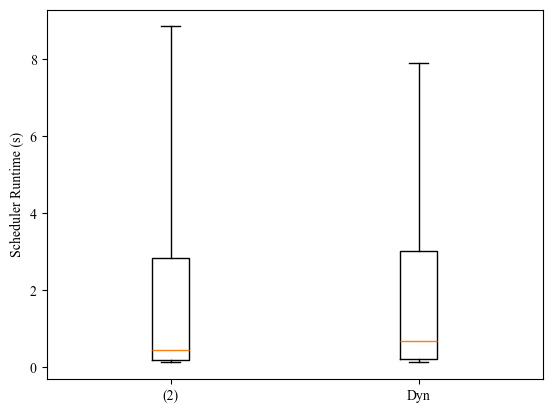

In [619]:
ax = plt.gca()
ax.boxplot([
    dagsched_2_limit_10_runtimes,
    # dagsched_4_runtimes,
    # dagsched_8_runtimes,
    # dagsched_32_runtimes,
    # dagsched_16_runtimes,
    # dagsched_low_arrival_runtimes,
    # dagsched_high_arrival_runtimes,
    # dagsched_dyn_sel_sysml_runtimes,
    # dagsched_dyn_sel_gcp_runtimes
    # dagsched_dyn_no_select,
    dagsched_dyn_limit_10_runtimes,
], labels=[
    # "DAGSched (1)",
    # "(1)",
    "(2)",
    # "(4)",
    # "(8)",
    "Dyn",
    # "SysML",
    # "GCP",
    # "Low Arrival",
    # "High Arrival",
    # "Dyn-NoSel",
    # "DAGSched (4)",
    # "DAGSched (8)",
    # "DAGSched (16)",
    # "DAGSched (32)",
    # "DAGSched (Dyn)",
], whis=(10, 90), showfliers=False)
# plt.xlabel("Optimization")
plt.ylabel("Scheduler Runtime (s)")

In [35]:
np.median(erdos4_runtimes), np.median(gcloud_runtimes), np.median(cloudlab_runtimes)

(0.061222, 0.0229975, 0.054356)

In [36]:
0.061222 / 0.0229975

2.6621154473312316

In [31]:
np.percentile(erdos4_runtimes, 90), np.percentile(gcloud_runtimes, 90)

(0.15663540000000006, 0.11616860000000005)

In [32]:
0.15663540000000006 / 0.11616860000000005

1.3483454220847975

In [620]:
goodput = {
    "FIFO": {
        80: [987, 948, 980],
        85: [963, 944, 979],
        90: [945, 958, 971],
        95: [893, 917, 978],
       100: [879, 925, 952],
       105: [876, 974, 953],
       115: [759, 741, 906],
       120: [688, 694, 893],
       130: [313, 212, 779],
       135: [149,  85,  96],
       140: [ 87, 201,  67],
       145: [ 47,  55,  52],
       150: [ 61,  58,  69],
       155: [133, 154, 140],
       160: [153, 135, 132],
       175: [120, 121, 145],
    },
    "EDF": {
        80: [994, 973, 989],
        85: [980, 972, 987],
        90: [979, 982, 982],
        95: [964, 964, 985],
       100: [958, 965, 978],
       105: [956, 989, 981],
       115: [945, 924, 964],
       120: [915, 914, 957],
       130: [871, 833, 941],
       135: [830, 791, 840],
       140: [760, 741, 768],
       145: [735, 653, 743],
       150: [687, 655, 692],
       155: [595, 520, 591],
       160: [552, 487, 548],
       175: [411, 388, 426],
    },
    "Graphene": {
        80: [991, 960, 982],
        85: [972, 962, 979],
        90: [963, 965, 977],
        95: [927, 940, 982],
       100: [926, 943, 969],
       105: [922, 973, 961],
       115: [849, 831, 929],
       120: [815, 797, 924],
       130: [653, 615, 841],
       135: [568, 587, 627],
       140: [537, 566, 592],
       145: [518, 497, 572],
       150: [472, 530, 519],
       155: [520, 504, 546],
       160: [513, 481, 517],
       175: [430, 423, 484],
    },
    "TetriSched": {
        80: [992, 976, 991],
        85: [977, 973, 990],
        90: [980, 981, 988],
        95: [964, 964, 987],
       100: [971, 966, 979],
       105: [969, 982, 982],
       115: [951, 921, 962],
       120: [929, 906, 954],
       130: [894, 845, 924],
       135: [841, 803, 826],
       140: [785, 753, 793],
       145: [760, 717, 760],
       150: [731, 701, 734],
       155: [670, 611, 678],
       160: [666, 601, 636],
       175: [561, 534, 577],
    },
    "DAGSched": {
        80: [999, 997, 998],
        85: [998, 997, 999],
        90: [996, 996, 999],
        95: [995, 997, 998],
       100: [996, 992, 997],
       105: [994, 994, 996],
       115: [993, 975, 991],
       120: [979, 974, 988],
       130: [969, 938, 973],
       135: [921, 904, 931],
       140: [914, 889, 906],
       145: [893, 885, 897],
       150: [888, 861, 883],
       155: [853, 836, 852],
       160: [868, 820, 833],
       175: [788, 770, 797],
    }
}

In [621]:
datapoints = {}
for scheduler, arrival_rates in goodput.items():
    datapoints[scheduler] = {}
    for arrival_rate, attainment in arrival_rates.items():
        attainments = np.array(attainment) / 10
        datapoints[scheduler][arrival_rate] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: FIFO
Rate: 80, Data: DataPoint(min=94.8, mean=97.16666666666667, median=98.0, max=98.7, sd=2.0792626898334285)
Rate: 85, Data: DataPoint(min=94.4, mean=96.2, median=96.3, max=97.9, sd=1.7521415467935229)
Rate: 90, Data: DataPoint(min=94.5, mean=95.8, median=95.8, max=97.1, sd=1.2999999999999972)
Rate: 95, Data: DataPoint(min=89.3, mean=92.93333333333334, median=91.7, max=97.8, sd=4.382160806421111)
Rate: 100, Data: DataPoint(min=87.9, mean=91.86666666666667, median=92.5, max=95.2, sd=3.690979996333402)
Rate: 105, Data: DataPoint(min=87.6, mean=93.43333333333334, median=95.3, max=97.4, sd=5.159780357082401)
Rate: 115, Data: DataPoint(min=74.1, mean=80.2, median=75.9, max=90.6, sd=9.051519209502898)
Rate: 120, Data: DataPoint(min=68.8, mean=75.83333333333333, median=69.4, max=89.3, sd=11.66633332857129)
Rate: 130, Data: DataPoint(min=21.2, mean=43.46666666666667, median=31.3, max=77.9, sd=30.24472405781434)
Rate: 135, Data: DataPoint(min=8.5, mean=11.0, median=9.6, max=14.9, s

In [627]:
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

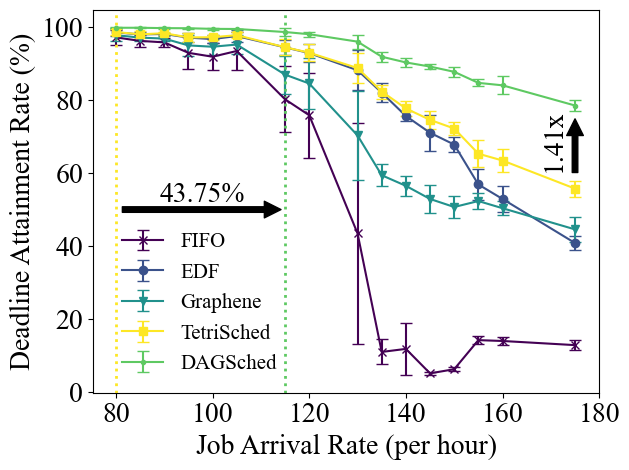

In [635]:
x_vals = list(sorted(datapoints["EDF"].keys()))
plt.errorbar(x_vals, 
             [datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals, 
             [datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals, 
             [datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals,
             [datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DAGSched", color=dagsched, capsize=4)
plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
plt.xticks(list(np.arange(80, 190, 20)))
# plt.ylim((30, 105))
plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="lower left", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
plt.tight_layout()
# plt.legend()
plt.annotate('', xy=(175, 75), xytext=(175, 60),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")
plt.savefig("goodput_vs_arrival_rate.png")

In [629]:
miss_rate_datapoints = {}
for scheduler, arrival_rates in goodput.items():
    miss_rate_datapoints[scheduler] = {}
    for arrival_rate, attainment in arrival_rates.items():
        attainments = 100 - (np.array(attainment) / 10)
        miss_rate_datapoints[scheduler][arrival_rate] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, arrival_rates in miss_rate_datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: FIFO
Rate: 80, Data: DataPoint(min=1.2999999999999972, mean=2.8333333333333335, median=2.0, max=5.200000000000003, sd=2.0792626898334285)
Rate: 85, Data: DataPoint(min=2.0999999999999943, mean=3.799999999999997, median=3.700000000000003, max=5.599999999999994, sd=1.7521415467935229)
Rate: 90, Data: DataPoint(min=2.9000000000000057, mean=4.200000000000003, median=4.200000000000003, max=5.5, sd=1.2999999999999972)
Rate: 95, Data: DataPoint(min=2.200000000000003, mean=7.066666666666667, median=8.299999999999997, max=10.700000000000003, sd=4.382160806421111)
Rate: 100, Data: DataPoint(min=4.799999999999997, mean=8.133333333333331, median=7.5, max=12.099999999999994, sd=3.690979996333402)
Rate: 105, Data: DataPoint(min=2.5999999999999943, mean=6.566666666666667, median=4.700000000000003, max=12.400000000000006, sd=5.159780357082401)
Rate: 115, Data: DataPoint(min=9.400000000000006, mean=19.8, median=24.099999999999994, max=25.900000000000006, sd=9.051519209502898)
Rate: 120, Data

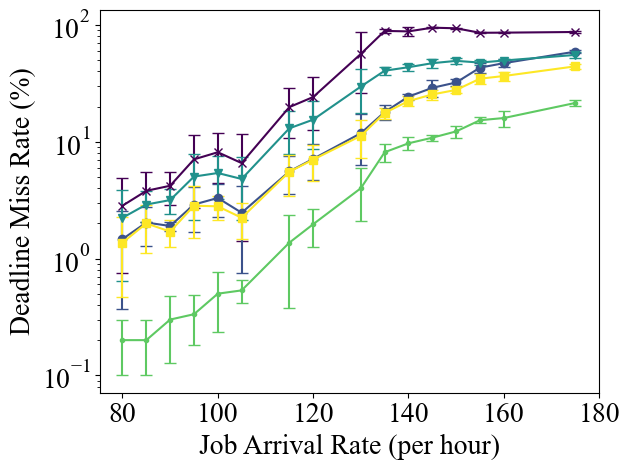

In [631]:
x_vals = list(sorted(miss_rate_datapoints["EDF"].keys()))
plt.errorbar(x_vals, 
             [miss_rate_datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals,
             [miss_rate_datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DAGSched", color=dagsched, capsize=4)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
plt.xticks(list(np.arange(80, 190, 20)))
plt.yscale('log')
# plt.ylim((30, 105))
# plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Deadline Miss Rate (%)", fontsize=20)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.legend(loc="lower left", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
plt.tight_layout()
# plt.legend()
# plt.annotate('', xy=(175, 75), xytext=(175, 60),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")
plt.savefig("miss_rate_vs_arrival_rate.pdf")

In [477]:
resource_sweep_goodput = {
    "FIFO": {
        30000: [980, 987, 948],
        25000: [955, 972, 890],
        20000: [856, 869, 647],
        15000: [ 33,  38,  48],
        10000: [  7,   5,   7],
         5000: [  2,   0,   0],
    },
    "EDF": {
        30000: [989, 994, 973],
        25000: [983, 987, 961],
        20000: [956, 961, 901],
        15000: [680, 688, 614],
        10000: [294, 248, 250],
         5000: [ 41,  39,  40],
    },
    "TetriSched": {
        30000: [991, 992, 976],
        25000: [981, 987, 956],
        20000: [947, 961, 904],
        15000: [722, 715, 681],
        10000: [411, 393, 378],
         5000: [ 99, 102, 111],
    },
    "Graphene": {
        30000: [982, 991, 960],
        25000: [969, 981, 918],
        20000: [904, 917, 753],
        15000: [456, 425, 374],
        10000: [223, 228, 189],
         5000: [ 56,  52,  64],
    },
    "DAGSched": {
        30000: [998, 999, 997],
        25000: [995, 999, 988],
        20000: [975, 985, 951],
        15000: [856, 874, 843],
        10000: [637, 633, 645],
         5000: [380, 387, 376],
    }
}

In [478]:
resource_gaps = defaultdict(dict)
for scheduler, cluster_size_goodputs in resource_sweep_goodput.items():
    for cluster_size, attainments in cluster_size_goodputs.items():
        dagsched_attainments = np.array(resource_sweep_goodput["DAGSched"][cluster_size])
        scheduler_gap = dagsched_attainments / np.array(attainments)
        resource_gaps[scheduler][cluster_size] = DataPoint(min=np.min(scheduler_gap), mean=np.mean(scheduler_gap), median=np.median(scheduler_gap), max=np.max(scheduler_gap), sd=np.std(scheduler_gap, ddof=1))

resource_gaps

/var/folders/h6/86xr3m2d521dld0_3m0y4f800000gn/T/ipykernel_78126/1813506734.py:5: RuntimeWarning: divide by zero encountered in divide
  scheduler_gap = dagsched_attainments / np.array(attainments)
/Users/sukritkalra/PhD/venv/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


defaultdict(dict,
            {'FIFO': {30000: DataPoint(min=1.012158054711246, mean=1.0274043884543673, median=1.0183673469387755, max=1.0516877637130801, sd=0.02125795293433299),
              25000: DataPoint(min=1.0277777777777777, mean=1.0599249846940888, median=1.0418848167539267, max=1.1101123595505618, sd=0.04403216532725541),
              20000: DataPoint(min=1.1334867663981587, mean=1.2474554514773584, median=1.139018691588785, max=1.4698608964451314, sd=0.19262862459292884),
              15000: DataPoint(min=17.5625, mean=22.16729797979798, median=23.0, max=25.939393939393938, sd=4.2500744121485825),
              10000: DataPoint(min=91.0, mean=103.24761904761904, median=92.14285714285714, max=126.6, sd=20.23182648010526),
              5000: DataPoint(min=190.0, mean=inf, median=inf, max=inf, sd=nan)},
             'EDF': {30000: DataPoint(min=1.0050301810865192, mean=1.0129320878997559, median=1.0091001011122345, max=1.024665981500514, sd=0.010363602488003994),
        

dict_keys([0, 1, 2, 3, 4, 5])


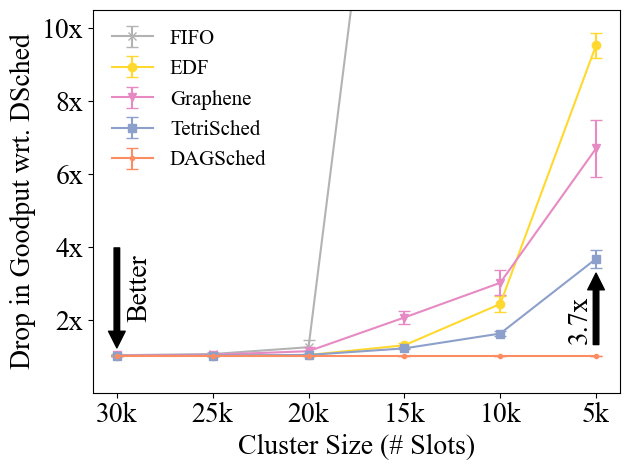

In [481]:
x_vals = dict(enumerate(list(sorted(resource_gaps["EDF"].keys(), reverse=True))))

print(x_vals.keys())
plt.errorbar(x_vals.keys(), 
             [resource_gaps["FIFO"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["FIFO"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["EDF"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["EDF"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["Graphene"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["Graphene"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["TetriSched"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["TetriSched"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["DAGSched"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["DAGSched"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='.', label="DAGSched", color=dagsched, capsize=4)
plt.ylim((0, 10.5))
# plt.xticks(x_vals.keys(), ["30k", "25k", "20k", "10k", "5k"])?
plt.xticks(ticks=list(x_vals.keys()), labels=["30k", "25k", "20k", "15k", "10k", "5k"])
plt.yticks(ticks=list(np.arange(2, 10.5, 2)), labels=[f"{int(x)}x" for x in np.arange(2, 10.5, 2)])
plt.xlabel("Cluster Size (# Slots)", fontsize=20)
plt.ylabel("Drop in Goodput wrt. DSched", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="upper left", fontsize=15, ncol=1, columnspacing=1, frameon=False,)
plt.annotate('', xy=(0, 1.2), xytext=(0, 4),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('', xy=(5, 3.3), xytext=(5, 1.3),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(0.1, 2.1, "Better", rotation="vertical", color='black', fontsize=20)
plt.text(4.7, 1.5, "3.7x", rotation="vertical", color='black', fontsize=20)
plt.tight_layout()
plt.savefig("cluster_size_sweep.png")

([<matplotlib.axis.XTick at 0x2ab4ba820>,
 [Text(0, 0, 'FIFO'),
  Text(1, 0, 'EDF'),
  Text(2, 0, 'Graphene'),
  Text(3, 0, 'TetriSched'),
  Text(4, 0, 'DAGSched')])

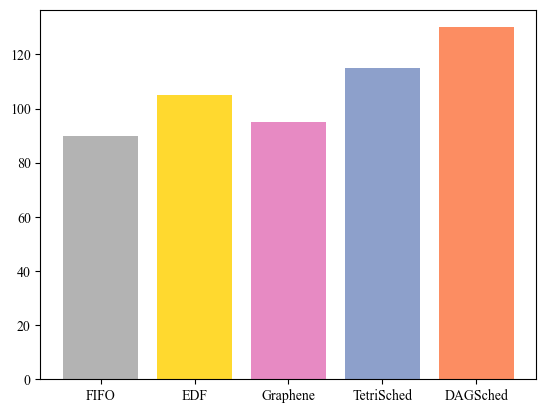

In [482]:
p95 = {
    "FIFO": 90,
    "EDF": 105,
    "Graphene": 95,
    "TetriSched": 115,
    "DAGSched": 130,
}

schedulers = list(p95.keys())
xs = np.arange(1, len(schedulers) + 1)
barWidth = 0.50

plt.bar([0], [p95["FIFO"]], color=fifo, label="FIFO")
plt.bar([1], [p95["EDF"]], color=edf, label="EDF")
plt.bar([2], [p95["Graphene"]], color=graphene, label="Graphene")
plt.bar([3], [p95["TetriSched"]], color=tetrisched, label="TetriSched")
plt.bar([4], [p95["DAGSched"]], color=dagsched, label="DAGSched")

plt.xticks(range(0, 5), p95.keys())

# plt.legend()

# plt.bar(xs, [p95[schedulers[x-1]] for x in xs])

# dynamic_utility_color = "orange"
# static_utility_color = "green"

# fig = plt.figure(figsize=(4, 4))
# dynamic_bar = plt.bar(x[0], goodputs[0][0], width=1.5*barWidth, edgecolor="black")
# static_bar = plt.bar(x[1:] + barWidth * 1, [dynamic_utility for dynamic_utility, _ in goodputs[1:]], width=1.5*barWidth, edgecolor="black", color=dynamic_utility_color)
# plt.bar(x[:-1] + barWidth * 0, [static_utility for _, static_utility in goodputs[1:]], width=barWidth, edgecolor="black", color=static_utility_color)
# plt.xticks([r for r in x[:-1]], schedulers[1:])
# # plt.plot([x[0] - barWidth, x[-2] + barWidth], [50, 50], '--', color='red')
# # fig.text(0.5, 0.80, "Peak SLO Attainment", fontsize=10, color='red')
# plt.xlabel("Time Discretization (s)")
# plt.ylabel("Deadline Attainment (%)")
# legend_elements = [
#     Patch(facecolor=dynamic_utility_color, label=types[0]),
#     Patch(facecolor=static_utility_color, label=types[1]),
# ]
# plt.legend(handles=legend_elements, loc=(0.65, 0.70), framealpha=0)

In [553]:
utilization_at_p99 = {
    "FIFO": [32.04, 32.52, 36.30],
    "EDF": [48.21, 48.45, 51.83],
    "Graphene": [48.66, 48.89, 53.31],
    "TetriSched": [48.07, 48.37, 51.51],
    "DAGSched": [80.197, 76.58, 77.72],
}

utilization_at_p99_datapoints = {}
for scheduler, points in utilization_at_p99.items():
    utilization_at_p99_datapoints[scheduler] = DataPoint(
        min=np.min(points),
        mean=np.mean(points),
        median=np.median(points),
        max=np.max(points),
        sd=np.std(points, ddof=1))

Text(0.5, 0, 'Scheduler')

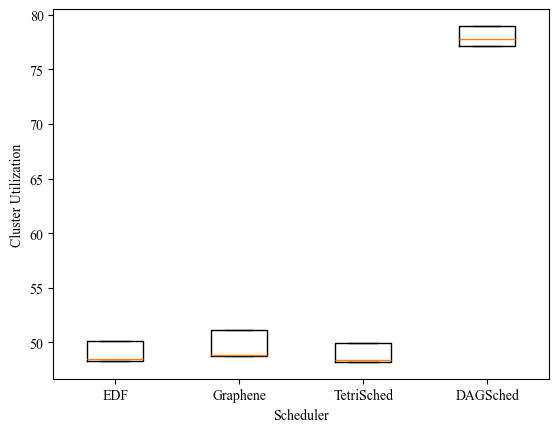

In [484]:
ax = plt.gca()
ax.boxplot([
    utilization_at_p99["EDF"],
    utilization_at_p99["Graphene"],
    utilization_at_p99["TetriSched"],
    utilization_at_p99["DAGSched"],
], labels=[
    "EDF", "Graphene", "TetriSched", "DAGSched"
], whis=(10, 90), showfliers=False)
plt.ylabel("Cluster Utilization")
plt.xlabel("Scheduler")

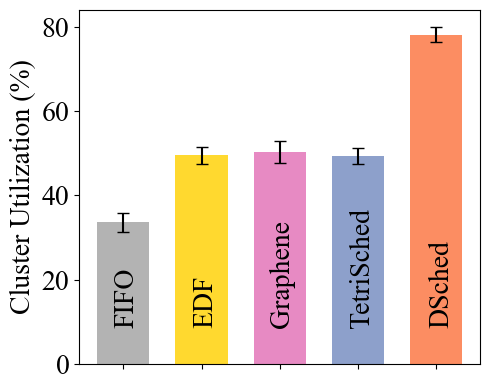

In [601]:
# plt.bar([0], [utilization_at_p99["FIFO"]], color=fifo, label="FIFO")
fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
plt.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
plt.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
plt.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
plt.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
plt.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DAGSched", width=0.15)

plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
plt.text(0.88, 10, "DSched", rotation="vertical", color='black', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Cluster Utilization (%)", fontsize=20)
plt.tight_layout()
plt.savefig("cluster_utilization_at_p99.png")

In [412]:
78.5 / 55.73

1.4085770680064598

In [486]:
slo_sweep = {
    "FIFO": {
        5: [127, 86, 110],
       10: [134, 93, 112],
       25: [157, 94, 118],
       50: [182, 94, 131],
      100: [200, 95, 175],  
      200: [269, 145, 310],  
    },
    "EDF": {
        5: [778, 746, 789],
       10: [805, 760, 801],
       25: [839, 791, 842],
       50: [851, 823, 856],
      100: [874, 830, 896],  
      200: [900, 841, 933],  
    },
    "TetriSched": {
        5: [780, 734, 775],
       10: [791, 758, 792],
       25: [839, 793, 827],
       50: [873, 826, 859],
      100: [892, 850, 872],  
      200: [904, 865, 902],  
    },
    "Graphene": {
        5: [473, 493, 504],
       10: [476, 523, 543],
       25: [566, 596, 606],
       50: [653, 651, 704],
      100: [711, 723, 728],  
      200: [762, 764, 811],  
    },
    "DAGSched": {
        5: [914, 886, 921],
       10: [907, 901, 902],
       25: [928, 916, 929],
       50: [936, 915, 931],
      100: [944, 923, 947],  
      200: [950, 935, 915],  
    },
}

slo_sweep_datapoints = {}
for scheduler, datapoints in slo_sweep.items():
    slo_sweep_datapoints[scheduler] = {}
    for slo, slo_datapoints in datapoints.items():
        slo_datapoints = 100 - (np.array(slo_datapoints) / 10)
        slo_sweep_datapoints[scheduler][slo] = DataPoint(
        min=np.min(slo_datapoints),
        mean=np.mean(slo_datapoints),
        median=np.median(slo_datapoints),
        max=np.max(slo_datapoints),
        sd=np.std(slo_datapoints, ddof=1))

slo_sweep_datapoints

{'FIFO': {5: DataPoint(min=87.3, mean=89.23333333333333, median=89.0, max=91.4, sd=2.0599352740640544),
  10: DataPoint(min=86.6, mean=88.7, median=88.8, max=90.7, sd=2.0518284528683233),
  25: DataPoint(min=84.3, mean=87.69999999999999, median=88.2, max=90.6, sd=3.179622619116928),
  50: DataPoint(min=81.8, mean=86.43333333333332, median=86.9, max=90.6, sd=4.418521623046935),
  100: DataPoint(min=80.0, mean=84.33333333333333, median=82.5, max=90.5, sd=5.484827557301444),
  200: DataPoint(min=69.0, mean=75.86666666666666, median=73.1, max=85.5, sd=8.590886644190654)},
 'EDF': {5: DataPoint(min=21.099999999999994, mean=22.900000000000002, median=22.200000000000003, max=25.400000000000006, sd=2.2338307903688728),
  10: DataPoint(min=19.5, mean=21.133333333333336, median=19.900000000000006, max=24.0, sd=2.490649179096351),
  25: DataPoint(min=15.799999999999997, mean=17.599999999999998, median=16.099999999999994, max=20.900000000000006, sd=2.861817604250843),
  50: DataPoint(min=14.400000

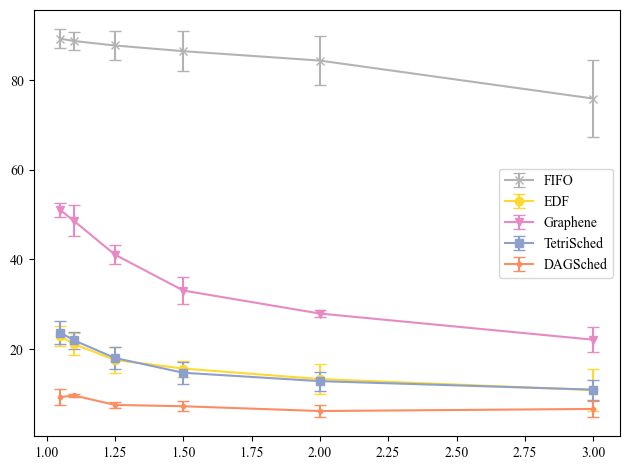

In [487]:
x_axis_points = list(sorted(slo_sweep_datapoints["FIFO"].keys()))
x_axis_points_labels = [(100 + x) / 100 for x in x_axis_points]
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["FIFO"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["FIFO"][x].sd  for x in x_axis_points], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["EDF"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["EDF"][x].sd  for x in x_axis_points], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["Graphene"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["Graphene"][x].sd  for x in x_axis_points], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["TetriSched"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["TetriSched"][x].sd  for x in x_axis_points], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["DAGSched"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["DAGSched"][x].sd  for x in x_axis_points], 
             marker='.', label="DAGSched", color=dagsched, capsize=4)

x_labels = [str((100 + x) / 100) for x in x_axis_points]
# plt.xticks(x_axis_points, x_labels)
# print(

# plt.xscale('log')

plt.legend()
plt.tight_layout()

[1.05, 1.1, 1.25, 1.5, 2.0, 3.0]
[1.05, '', 1.25, 1.5, 2.0, 3.0]


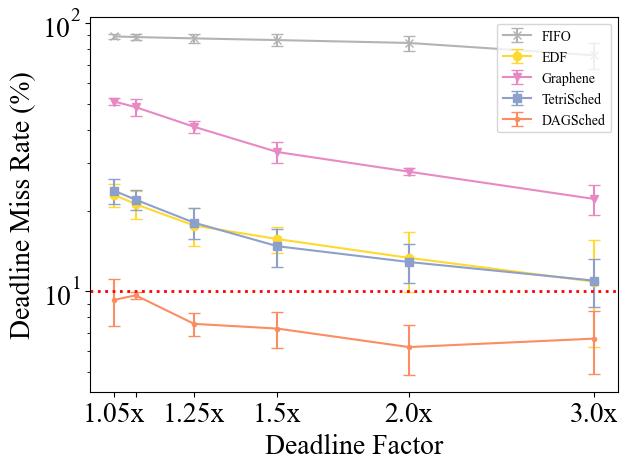

In [603]:
x_axis_points = list(sorted(slo_sweep_datapoints["FIFO"].keys()))
x_axis_points_labels = [(100 + x) / 100 for x in x_axis_points]
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["FIFO"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["FIFO"][x].sd  for x in x_axis_points], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["EDF"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["EDF"][x].sd  for x in x_axis_points], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["Graphene"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["Graphene"][x].sd  for x in x_axis_points], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["TetriSched"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["TetriSched"][x].sd  for x in x_axis_points], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
plt.errorbar(x_axis_points_labels, 
             [slo_sweep_datapoints["DAGSched"][x].mean for x in x_axis_points], 
             yerr=[slo_sweep_datapoints["DAGSched"][x].sd  for x in x_axis_points], 
             marker='.', label="DAGSched", color=dagsched, capsize=4)
plt.axhline(y=10, color='r', linestyle=':', linewidth=2)

plt.xscale('log')
plt.yscale('log')

# x_labels = [str((100 + x) / 100) for x in x_axis_points]
plt.xticks(x_axis_points_labels, [f"{label}x" if label != 1.1 else "" for label in x_axis_points_labels])
# print(
print(x_axis_points_labels)
print([label if label != 1.1 else "" for label in x_axis_points_labels])
plt.xlabel("Deadline Factor", fontsize=20)
plt.ylabel("Deadline Miss Rate (%)", fontsize=20)
# plt.xlim((1, 3.5))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend()
plt.tight_layout()
plt.savefig("dmr_vs_slo_factor.png")

In [545]:
Runtime = namedtuple("Runtime", "p10, p50, p75, p90, p95, p99, mean, std, max")
dagsched_runtimes = {
    80: to_s([18043,13321,84114,11627,6985,55121,17939,65582,43778,9878,11947,35496,27922,21952,6882,11106,27970,13985,15692,30904,6061,11501,62980,19508,36773,18379,9048,13674,14348,19101,13809,179040,18698,1010610,266139,31504,40087,45654,12831,92803,268923,62907,36786,74976,55104,12385,28593,28105,37619,12418,26244,26902,349174,32889,28117,17322,7128,33831,26695,25843,18531,20114,44225,13999,82613,14286,15062,37915,32513,41059,46444,158292,27732,30521,36333,13110,39608,63605,32865,4370,37946,20685,23485,29596,34091,12361,38911,21995,34933,12828,33889,7954,8772,8534,23248,10589,18229,77155,10377,119968,23966,20759,16383,13725,128612,17113,9615,13449,17804,48839,22115,24566,28457,15624,9187,27711,20345,51031,53132,26827,38875,11998,132184,16064,14350,84212,37788,17528,35111,16249,157558,16037,14293,48542,19151,87357,22359,10542,15519,48127,33825,14440,9900,20510,87939,13645,84439,39141,5897,32514,168847,26215,35878,16343,93952,30102,29212,30784,12174,28489,32453,16383,10864,9117,55181,13216,32267,31373,18657,12135,18546,8102,9758,30872,31116,25266,10010,32494,8331,56981,32532,36032,16777,11577,14144,54832,13814,43631,26872,18816,8692,20306,13913,12460,8634,7729,11434,8371,8313,18431,7685,119762,6134,14529,18862,11660,53472,53424,73583,168607,46064,115273,300282,99284,29061,13711,14780,35070,21772,18519,9909,12280,13461,19077,8422,3971,11584,52204,17775,47945,10199,15685,16710,7854,73169,56430,9201,17851,42234,4532,19803,15763,17260,13796,9531,7749,17713,109122,12651,16075,11908,24044,10027,133315,15290,4808,11142,9171,31809,10445,13053,28729,47732,15040,12891,23874,20141,29076,20944,14612,9483,22701,60965,20014,65155,32998,18949,8376,11074,71615,25261,7890,29707,6612,14122,5416,15711,12973,26902,8700,13281,8487,6191,12245,12573,9168,13111,19920,8040,27264,16737,31042,24285,25948,15161,24631,31871,18584,22111,23135,12075,221403,13798,150704,103585,82368,8893,33906,30281,18595,17608,16552,26419,164448,26629,30050,37455,30358,21743,14883,24454,16567,11909,21683,35484,8910,25875,6861,18033,33673,16638,16335,18009,9033,15405,15641,7574,218877,30581,45191,8405,24811,21804,4402,30929,18371,31180,26960,20143,30560,52304,24081,18812,25064,20546,25367,19052,19066,15323,19158,90972,8895,11017,4027,13136,32107,10056,16979,9843,13282,9786,14746,11213,16624,18720,27713,22945,7033,29413,44105,79742,22980,13144,42346,40433,9735,22125,78138,24008,6194,43216,12244,10462,14763,26608,23970,4851,21104,27877,22716,22504,54440,22556,55851,26265,54452,12260,36756,11605,57404,62141,20535,22059,80542,117491,17777,22999,8009,16361,13851,30790,13118,9734,6933,68736,11516,24683,162578,37686,7389,20480,65619,12626,23519,89543,24326,154958,41206,415757,36926,26772,7081,32530,24363,27977,22076,151681,9970,151253,14009,26508,73597,17593,143804,145612,336086,43965,94813,9839,31008,21412,15485,26516,21602,14422,7630,28706,16024,54832,10985,10568,9188,10899,13223,1074083,20781,24909,88786,20354,204754,24281,14221,12163,11079,24070,50936,5869,39539,26853,13603,19421,11798,31598,14276,8400,15805,117921,15015,97058,9838,15133,9716,73735,34275,8223,15077,14674,27787,36729,97172,14292,20494,22223,137991,20688,14679,17975,19254,12875,36487,10561,15893,8092,31988,26936,22263,24082,21174,16640,8735,27188,32104,68632,11690,60614,32266,14625,40761,14261,18542,57337,18394,69418,12390,61288,26936,22381,20119,29223,55698,16387,71012,22723,43401,12897,48441,14192,11627,44358,207703,32929,32735,39429,28070,13247,9641,22637,12015,52487,19644,35117,13737,9913,11922,9601,9687,8102,47541,9031,40797,13920,12601,7385,16339,14093,37765,33135,14502,25247,21792,15426,14059,80776,10869,33110,16251,9244,12278,18385,23209,21648,16052,12107,11676,10791,29581,22226,19014,28219,9858,7118,4874,36951,32598,9054,22290,19072,17105,4899,11360,13565,7973,23026,13670,20478,20854,11794,23510,6554,30233,15461,30024,18754,16465,222606,59748,23072,108012,43670,86222,19542,9571265,2113992,498444,32996,220844,22204,36930,47615,14772,17354,25771,14768,10408,18497,10138,30154,21472,32347,10605,23112,28744,5789,18307,13407,17242,11628,13671,39929,14042,39478,33501,16321,12218,68216,21139,31333,18975,11796,10684,10959,40993,11786,7873,16628,29317,22383,14787,24029,18524,11844,10706,17861,35287,11898,12324,8811,18839,27345,15838,234367,39345,21170,22457,20655,19958,39783,10442,34354,61097,12730,59646,12304,112010,9029,58793,14897,91092,21990,15134,54590,31391,28143,27462,14298,9248,13188,14016,16219,23274,6743,9921,7873,8228,46305,10337,22179,9592,23277,11662,16045,20087,12016,12377,19334,12100,15941,18818,16474,23779,25317,9195,17959,16235,6389,9339,10571,28272,45196,7277,7914,136141,37733,57757,5854,28541,172359,18730,54014,274656,56998,24886,37737,16739,11429,61373,18035,136971,24381,95715,28673,98223,131044,27326,17936,33436,6953,9831,11052,6576,19053,5075,16535,6388,32738,11816,14948,21970,9818,24135,33156,15048,14115,57173,23268,14369,67309,9323,42768,26478,50568,18796,14002,18697,30985,24535,44196,13933,110642,8570,22185,15552,12730,6742,16931,42067,13609,27676,10801,14325,64560,22218,19545,10649,49263,17596,11852,15135,18800,74650,21684,12323,26075,22615,12582,6167,12065,20809,14222,61007,12378,16881,17535,84104,23944,18594,23551,11231,32190,12050,9614,12858,39715,18113,83679,10292,10892,19716,16823,17469,26884,206968,19358,11779,86778,15814,12241,90964,22843,30069,168103,25073,26768,43649,8999,36942,41535,12703,31948,9921,234385,41313,118375,33369,30268,28058,50213,16366,22530,16159,193532,22133,16074,19912,23011,19675,23777,10863,20461,19503,16575,13481,11454,15749,281581,48717,15876,8391,6589,54599,18273,86520,73308,17640,67698,33016,17859,35791,17332,27673,29308,17244,12252,10248,41472,15095,28369,37061,58090,15409,24754,52268,12422,28600,11925,30167,14587,163392,39000,48966,50012,28051,211863,21192,11363,19484,13161,190357,27548,79014,75769,22235,42924,15086,17327,26138,62455,33430,71856,283437,25331,22882,15423,35024,20311,11738,20221,161100,37425,12103,75833,28911,84492,9281,17061,13196]),
    85: to_s([18372,13648,80050,10743,6969,60867,18449,35582,17085,9744,59032,17712,31681,4937,33038,10830,18010,14964,19778,15915,105673,24599,9691,161350,43986,26943,13811,13947,14826,12069,12259,80277,32198,438168,95531,197458,29244,49845,39673,369678,57576,267839,54805,128598,46658,15749,37176,37040,40272,16830,16470,67931,10016,20135,8163,10629,32231,14180,11143,13377,12727,74542,14603,104437,21462,52905,27222,29020,21932,13970,196180,16110,33666,99728,10541,18182,18621,15760,47760,16781,32935,29786,42455,16360,8476,25188,8660,16455,17024,13791,16685,57241,13993,68254,25279,21364,118270,32622,133372,18149,184789,25502,13931,59877,10853,10416,30192,13535,12400,59950,20012,23103,44768,13036,47398,12101,12852,21139,40771,19954,25748,15124,98776,42006,25190,22570,72465,15242,26593,189762,13863,17607,80001,19243,14287,75612,13532,12708,10031,111889,27384,16175,83554,7904,16534,12330,7869,11200,29120,9062,137351,16890,71363,27454,80838,52038,14558,109637,6549,53639,154812,21035,35342,47272,48512,66423,21544,30655,25935,12785,35098,12723,15216,27764,51682,15661,14130,25005,11317,48935,9018254,3312852,2055885,482753,34003,9465,35914,26687,45175,47320,7758,16388,11854,8098,22254,7136,18159,7329,8015,6901,23593,11001,55028,12185,69894,17294,41351,9837,5893,46830,31930,155669,21170,106158,17530,34049,13326,17220,18122,11600,17646,24445,16627,18647,22314,16609,9111,23301,77493,16585,16847,32701,81436,18657,12736,37123,251341,77395,33202,181860,13839,92051,20616,29280,17030,15576,35723,18668,89492,26751,17731,57038,46508,21884,85301,26589,3593,6390,44176,50767,11142,10734,8007,34084,34183,22460,10178,16503,10673,43466,33377,28977,64794,20760,23380,18387,15088,166989,5805,16907,34846,13995,39942,8493,25319,22304,25244,8404,61130,11764,24617,39584,10146,11689,115213,10084,17531,24524,9915,22431,11893,18985,8244,18650,12007,21427,30105,27361,11412,19578,33279,151493,10102,13314,12838,24096,31202,74450,8661,15226,24250,13292,21023,52371,16733,24726,21358,29014,24330,10713,29649,25208,14209,19619,37790,40927,19421,16400,14002,32868,17870,15291,21242,9406,268191,22914,19728,36528,22561,29969,11355,9089,17197,4973,16906,33025,14263,12854,32188,14080,22566,102405,14700,5197,260900,13945,323854,26446,28938,46622,34105,247380,50616,198182,33506,26568,49880,14379,11781,14039,7785,34713,8245,28278,13710,29007,11811,32321,14616,33671,16371,20626,12871,58185,42874,21362,41266,22823,32675,17704,29769,12481,51131,78589,16986,28135,8003,38466,32969,13403,125172,14626,23603,43136,50291,15484,22447,21261,31573,10083,72510,8159,12620,58050,12168,12153,7303,74496,14631,10856,23496,13109,10775,11117,52965,16219,24757,173399,26864,10962,17934,63263,19045,44931,50056,21015,224832,15682,38175,16305,30584,113642,21765,57468,11295,41358,392217,11255,38328,17116,375421,227110,17668,666491,239785,160513,16459,93856,97132,13454,73748,61260,34772,17251,22069,5995,23635,23948,18873,64023,17178,12227,8122,8782,1624954,34232,33354,530084,1103368,14992,1062423,15159,274998,28113,3367089,2577121,2088956,100509,60564,81631,55184,33972,19280,14311,11470,28561,16544,67949,14654,80463,5682,31758,23440,10775,21286,10224,20825,13928,12756,95027,17733,27082,62688,11822,105820,12718,55673,16290,58147,13195,15544,10293,11939,17687,33278,83826,14251,42046,18772,29133,10587,22614,34815,12035,9945,58737,19337,14909,55534,65008,7740,43841,12540,13399,22455,21413,27785,18169,23731,27426,19571,15209,31725,24625,21666,30339,150778,5088,24368,18241,10159,202935,23240,280074,25819,17932,208945,23969,15920,23131,43168,186203,10754,47867,111752,10123,49388,25137,20989,17013,73388,53009,24762,8449,18227,6027,16700,40235,11309,16288,21491,19241,18100,27592,89455,58865,87667,110389,18745,29145,18295,48906,16140,7227,17638,49671,9596,27629,5420,12876,8798,4353,12105,86277,19575,35411,20847,15726,11947,6520,24844,15296,10490,19038,21621,71454,19932,20310,33412,37363,16057,19576,22927,184151,34322,38081,17201,13094,109078,356195,18105,23534,24555,18347,15927,16982,21953,7177,24682,6468,6057,10620,8422,56153,33224,11580,24541,24511,13847,20601,10636,21136,14310,13156,11523,12935,120105,20368,45812,26029,23134,85825,49466,16198,33160,13200,14236,10523,14227,12270,33174,118250,37578,547534,69287,88894,25141,96149,53738,86178,136583,975596,49737,39900,62866,9946,10070,25512,15033,13949,66163,40895,93586,15606,122036,46159,28131,16630,30053,178934,16800,17184,28735,11917,21202,31581,20360,20707,19182,16982,18533,10676,17405,14384,15246,12443,9830,15467,32654,9076,18670,18388,36537,5484,24437,6831,19469,9214,14518,26945,25701,11928,21461,24508,17895,18441,24292,14942,14021,18561,9998,25393,6002,16627,9927,13469,51526,18246,7494,10709,44677,14029,25565,19922,7485,15265,59840,191198,144677,18565,28624,26695,45368,26631,19981,280528,24349,155685,252892,143414,151327,17272,25552,19141,92034,8076,39145,7189,18965,8024,25575,8262,24654,13306,16694,6609,20639,29248,10450,10484,18243,57328,21245,11324,245482,19637,185665,47072,61478,14673,83630,21032,31200,33423,15040,47400,106009,24764,13118,33598,39471,6101,20517,20815,14656,24359,10680,15475,86281,26576,16732,14133,85644,26078,9817,15149,15296,75080,26031,14368,20611,21982,14388,6937,14578,15288,12907,30048,9517,13156,14912,90078,28509,28625,20198,13758,31383,14060,11309,13413,43722,23550,69578,16401,10887,23256,10567,18829,31032,159782,19037,90017,172942,18901,13024,102538,49841,8498,54442,14460,19003,18771,11386,12324,29476,10883,156905,18209,124424,33280,124365,49388,32019,54796,47722,52276,17846,19132,207156,23486,21564,27023,20555,17900,22402,11224,21515,22536,17723,10722,11222,10396,290642,21637,106044,7729,8620,12195,23728,44590,43456,7509,174464,27546,49766,17851,32128,32149,25638,14353,18978,8199,33032,20574,18313,67868,36754,20304,7854,92543,14324,9205,41187,11272,13766,128244,49772,47095,24929,57630,21289,10988,9977,26192,13329,168448,18089,97659,68770,18192,28104,16003,10736,44065,16122,32819,182770,129055,14551,39399,10437,28675,15156,20946,20820,193943,26691,87959,20515,32840,49339]),
    90: to_s([17254,13508,37034,10228,7038,60540,14401,66344,23487,37653,82127,47432,59293,22019,6431,19397,62596,17306,19112,82680,7853,11817,142834,30041,44323,83229,6469,14347,24858,70302,24409,19822,63070,15611,9246,17750,12245,50320,12071,25918,240655,38360,137767,73378,134424,11750,150439,42033,35734,38906,24421,15406,132965,40605,23676,27092,83903,38188,57966,52719,38405,36941,57393,209515,103051,16045,41208,32308,72025,36976,151749,71874,64263,29192,152408,15339,59656,49147,14845,22832,65967,83835,37340,51893,43835,13859,36258,22159,15557,14197,39122,7519,8096,10825,18255,197568,44830,25974,191606,17124,382309,65803,25489,16626,200086,10626,51989,17817,65218,7903,32550,21373,18829,22270,49678,28435,81894,52662,17566,17094,33422,128871,123714,41090,666898,35244,17087,25087,30519,81297,17524,20642,27592,18221,13279,22782,6931,18658,73228,18622,6228,15872,25930,15234,73567,8083,11830,226245,8304,735457,28878,30693,14920,353893,27961,11581,36097,207831,24178,114091,79145,17000,70830,163863,53726,11996,18367,19236,10032,40709,10024,32279,63425,20245,9385,24947,5371,13483,6085635,2568723,459096,17873,25562,62106,21864,12183,20998,25485,15301,33634,15776,11091,20277,13953,121388,22562,9251,35752,6618,71637,13851,70687,14649,111009,261472,15177,42967,87304,50499,19222,59249,8522,57685,46123,10904,37941,159379,33798,139680,18572,15858,27862,25525,11603,23135,71643,19407,11938,25407,24189,17819,9869,27133,31819,44941,231059,91712,141974,35101,38828,16489,17368,23390,4133,20451,93894,49197,9801,21348,54964,25377,9074,14926,6692,10487,14472,7525,20499,10717,11432,35340,11408,8860,23690,65591,14608,19730,52395,15322,31928,9800,14690,21359,146386,40294,9320,20941,14098,9593,24776,9217,5115,17278,11779,20780,28137,19730,18452,6973,4721,16866,11010,10789,16170,34289,9302,37061,15589,9299,17521,13031,8823,15867,16106,29512,23911,18960,12585,215001,30255,23973,23113,116530,23573,44088,7546,36211,30211,20063,20028,27388,26369,23764,15626,30214,7970,9334,10249,23678,15373,15300,53451,19626,11670,10294,20430,31357,8988,14680,11719,10291,235859,17926,27143,10944,20073,34563,12269,9164,28508,7534,24867,14938,10716,10123,44979,20528,16543,24491,26335,55287,10134,43628,8496,106981,12658,52082,41024,150248,58124,31369,22185,15428,17255,14820,4759,11035,14263,13943,16278,81234,14529,29467,11080,17336,25718,5409,197350,53531,80890,12773,58640,75867,28201,6270,11025,26765,19391,20289,25981,26720,13360,115951,44257,17280,7582,38928,25360,17450,70063,27182,24800,49579,21575,40064,32599,37351,71613,29086,102462,24075,87343,55547,98313,224901,54132,7849,163334,16024,78008,14783,8073,39154,11072,19502,19644,51274,20188,15627,36907,51514,20662,77589,15751,94853,252145,31851,14532,29542,38199,30611,93301,106573,27606,15672,193918,60148,101233,65550,11655,134801,26234,760834,486196,20575,8761,33455,70130,44682,28856,18539,49899,34493,13606,18913,30639,31109,18033,110152,13408,62071,13254,6418,676208,8347,23505,175323,1372509,91745,152525,868039,247670,683063,13456275,5232181,2462321,451741,131262,45061,10338,39462,137526,62106,15430,81440,17567,46655,24991,18383,19080,10388,29911,9181,13779,36445,17867,90913,10283,34118,12676,12842,14979,24047,15801,12247,22153,12349,12226,22974,7808,22350,57533,10189,67723,29156,27021,17261,42882,32124,157517,5305,61863,110724,14159,30659,121949,57281,69086,21369,95401,23253,16846,24464,18728,20156,16508,43395,23898,32801,20933,5194,49062,23197,19670,13305,50329,21871,167170,42940,70706,495898,43694,49911,73412,22351,24723,89145,10120,8453,32392,16129,7315,10973,19038,31682,19676,69937,30752,12192,12480,6501,21138,6130,22234,93556,12829,17459,36497,25631,28421,15148,76264,22140,24750,52631,12591,34885,17624,13277,18750,6025,14268,16933,10276,10694,7904,20676,14298,5671,9769,3864,21861,15399,44243,38874,12156,20384,18592,6045,23444,13181,9692,11885,15397,49053,13204,39474,9768,40950,22781,17852,39147,24195,359376,40366,17332,15488,29924,194165,12322,76303,14344,25008,27134,114660,13243,33919,11520,48217,37888,25479,12302,16757,14783,24950,6645,16708,28173,10137,12955,14824,307556,20047,11566,24406,126587,7575,63119,15959,46785,32452,16178,32145,70230,20861,53683,29164,12930,21536,27247,33039,108063,60623,48226,138888,59609,46590,58222,69530,84791,30259,196487,87482,173590,28858,24873,13967,5536,24279,172559,9913,101057,14955,21606,21480,140300,38085,30881,36473,106560,163138,20798,9178,20012,12933,15045,33435,18430,18437,74606,17819,22855,22736,23562,9708,9992,9373,16878,16203,47340,5030,29142,6567,5497,40000,18056,27170,7833,12829,10556,14123,19940,14981,30713,17899,25987,18585,40806,18933,149943,19894,91073,23421,16746,9059,28731,19747,31477,14914,15312,18681,149930,10997,10342,7150,7157,759400,17282,25573,205667,4936,17925,86943,81102,21454,23302,41256,264110,6594,150709,12964,35299,20142,18048,17831,48438,5184,29323,12200,7312,13504,9983,39187,7174,38929,15354,17045,30050,10774,26104,29235,51035,23402,22941,22850,14384,32978,15159,26861,37832,47854,21362,13489,31357,59862,61022,17447,17728,16704,9361,15928,13928,14769,15850,14999,9090,17645,38280,11421,20579,78958,12604,13705,20357,81201,21388,15123,15089,13304,30231,22583,7270,31756,7886,6461,14644,8736,8149,7668,11813,20055,15663,58401,15246,20018,10138,10657,20221,26353,16099,12622,46842,99425,104312,14312,25448,25606,17442,16505,42051,248332,39112,19599,108313,14467,12359,156462,48759,9771,71699,14951,122014,38459,6026,23335,26815,10007,49064,13285,140179,64184,112920,29536,36722,35940,77673,17911,27842,17416,149097,28961,10036,12913,21929,8977,21080,27437,28877,30092,23018,16156,9744,9911,295246,17821,8935,9480,9613,12122,26614,48425,57167,9257,55072,26968,11279,59513,16385,24534,27736,21204,13374,10720,34248,17092,17175,113630,27085,25020,14601,40728,14757,40790,13411,11427,12404,187748,46279,41585,92053,37316,18154,14813,10765,18719,17184,133607,21191,71680,66410,37780,15177,30398,14726,20413,13845,35097,114183,79882,177693,52798,14289,18177,14643,18007,17915,257556,34663,25035,23327,53304,46589,9615,14167,20942,9393]),
    95: to_s([18095,13096,39132,7870,9524,48441,16901,61123,11594,9094,78049,13783,36176,26484,6541,57167,13864,11442,12893,69190,77132,15074,63637,239786,20813,32390,44311,22449,11757,8939,10372,141386,33155,682505,7792,18422,33233,56005,12874,32360,60648,110445,190893,102081,111419,280841,41722,565279,26287,201959,27356,253243,73981,24365,54295,12188,12107,32074,11396,15679,17134,72290,8105,161844,16688,8771,170061,18039,73059,8055,36101,37439,14551,61532,16209,27447,43182,19804,5147,12850,25909,22088,49051,18733,38342,36959,13499,22883,16980,20293,6794,36427,20801,12894,16483,22528,105877,24675,8023,413949,17306,27906,15588,27588,51767,11163,41914,25058,22934,30694,58724,15786,40274,10276,64230,30334,36340,14407,18049,12207,20191,134013,217341,35387,41591,185857,12940,818741,22924,72514,85850,41132,27723,12916,15170,24877,64963,17296,45515,26020,18450,14043,66182,8994,80431,13885,88775,4817,125936,34285,25130,47434,13464,151189,25185,19155,18321,7998,145370,12129,17759,10419,27045,79751,109124,36257,22988,35992,16435,32181,22931,9720,54701,39276,17899,16403,27362,9512,6731,11021223,517821,567963,9089,8846,99575,13519,44735,25392,12019,9595,11775,13168,15591,23463,7493,17156,5447,14601,8057,25757,12249,12660,9795,14447,39245,99723,63379,7070,31951,16540,85709,79797,273847,14633,114371,16718,29078,21681,185769,31429,21152,284184,19623,82000,26145,35741,58330,11785,32189,10419,22936,24668,12223,132396,32540,9058,181541,30846,100007,88347,110392,44346,140230,46271,19822,12263,67120,367664,95272,48808,12685,32085,102666,28946,20165,9526,14163,47905,83900,26708,16934,48334,28179,51108,21038,34240,13682,55316,33909,12702,45750,15449,8639,39709,24647,203397,23572,50599,23006,15045,7496,23586,20452,8190,9342,34583,10446,26077,19431,27683,18955,14306,29455,17307,9160,22574,20468,38469,6197,27589,19059,31906,12576,25315,16584,30421,9082,21573,13855,10696,185262,11980,230101,22295,10594,21826,75051,17693,20455,42085,16146,20024,107684,16700,54356,38599,12179,27302,11883,7666,27820,9180,9501,29593,7625,13731,10432,21250,32591,23024,29596,17702,16860,255689,14504,33775,155981,23283,44652,6050,36673,62557,36284,13813,12494,28101,14359,14449,12984,36094,26969,32159,15712,23124,28403,19939,13080,20448,30989,56163,23482,22676,15005,30634,11079,9256,16331,21587,17260,103125,21752,63182,14974,24833,29484,5463,130723,81591,22018,34671,16591,78438,49052,33746,15190,37002,86908,13190,18412,59779,91190,11811,10197,20177,132746,8414,20977,57653,16983,19186,14967,53378,53979,29262,54484,17655,34745,320077,39718,40586,55345,38259,33931,29851,89203,38178,10834,14726,9945,34922,35237,28502,27352,126568,17835,7367,22025,63863,86631,25198,11208,96531,30405,14096,20091,16021,8478,71266,30497,13697,65131,11824,20016,61594,13012,12228,60433,25672,53513,12825,320780,51225,411512,12759,18250,112511,48307,20138,17241,17328,52418,24984,19556,37031,22143,36551,58470,27944,11713,13209,13614,389131,10778,34982,220830,181923,42387,8364,69194,418275,17790,3168686,804781,671466,27006,10407,28138,147095,35824,27665,127991,29552,9007,122270,65696,9730,55570,27573,30398,28253,5127,10271,42706,10650,72824,9693,13383,14435,9196,7249,32417,15665,14417,11954,16042,11371,31884,6071,27249,115540,36594,141217,14871,149151,16184,8775,40220,135334,17240,73442,30964,26029,21306,27639,54208,12370,13971,17229,28106,10050,8013,11985,15989,18378,62138,31072,84186,19151,39948,37370,51879,12387,13192,13862,42556,172496,12802,229073,14707,131713,59323,24314,33749,17552,69359,136881,113367,7347,146976,15998,11448,70898,10608,90589,72020,10291,9630,25922,198943,19661,6333,22289,6030,45128,19422,16767,21964,14448,135370,80803,14985,63434,16713,26442,19193,18572,18361,13637,13532,12625,22352,17260,16569,8999,13430,13717,27484,11046,13105,19648,15404,4503,43285,20471,25599,25660,8664,11874,6434,16983,11581,15656,61270,7598,27736,6925,19772,21345,18051,20217,12656,184270,27632,63316,13458,6689,127208,39616,7412748,2504934,665596,478859,369325,12928,38196,19124,33347,31263,12551,11118,22440,21243,20012,18395,34066,10118,47885,37432,7430,21598,18590,14354,14328,12054,110480,130493,54552,17194,21622,7717,99604,10465,33431,55137,25058,25906,11592,58022,676780,53143,57905,161968,119279,175273,24302,51581,23340,37460,40625,100046,36221,31215,52736,42242,15978,56956,29510,17233,10844,10835,79455,71686,28507,40330,8909,19576,166368,26140,7876,182763,22769,21283,25310,14659,48895,22126,8544,20913,25210,19431,11712,21153,15637,45049,68150,29470,11468,16317,10217,58486,49031,11634,15410,8413,14637,22531,34527,16768,12374,25149,15901,5717,22263,18131,13562,35992,12976,12300,17716,14493,5589,17032,10214,9177,31786,9535,11177,64513,41108,92511,26095,16585,193939,25512,48140,106580,152390,21393,13833,68663,24655,25180,13693,232456,3782,112895,31656,14671,168430,81080,16849,101264,149337,15184,11827,26309,22987,27381,26110,9123,18276,14060,17837,32673,17556,6825,34144,28888,21326,115607,12750,23499,114252,15109,41806,20691,76566,58344,58031,25470,50133,13637,86540,58469,11348,28769,10663,29246,19564,16319,11920,35826,12845,26508,21673,15641,72208,10969,27166,25237,113711,13762,14467,36656,16027,8506,41741,10689,10283,24581,8784,10224,23797,11932,13697,14568,9682,13775,17893,63076,24974,12778,14948,10165,22749,44004,26959,24880,12044,22187,29418,18413,8063,9529,10997,13846,33724,152592,19728,12185,184584,73930,13744,97410,80995,17261,21998,18648,14049,17149,34418,10513,10960,30319,22044,151590,50051,87467,17285,17808,58006,217677,21940,45838,18954,154060,23258,11411,56780,22094,8445,15362,30446,16478,8727,22994,15444,16949,20191,261794,13922,178323,20273,21844,27845,12551,49025,56026,20027,262046,21289,70149,37175,15620,37407,20686,23713,21914,14114,36867,17575,25576,44304,92066,33795,28303,49193,19473,33256,13949,12426,37283,206454,47493,37298,61257,22820,35865,13744,4263,21264,11641,58159,21816,139909,54180,39977,18070,18432,13826,20076,36596,30763,117752,532918,277759,43306,13733,172007,18718,21036,39755,83669,28607,12641,135549,26683,94374,10671,11385,44077,17572,21949]),
   100: to_s([18902,13521,37060,7863,8108,58138,18850,34264,83306,22340,46088,18408,46742,21922,10277,39569,16029,73088,12661,13840,91441,48474,22558,181897,46909,48327,13746,16413,21639,83039,12297,131169,87376,17177,214721,16636,4684,34635,18163,32690,96145,25518,96972,70885,56326,110160,95610,18758,20179,87190,19942,61712,80385,26949,9002,12812,26010,16999,18025,71123,24620,41687,124509,38457,19562,57624,37178,36498,18838,201674,13497,13517,147441,77230,20369,25123,34431,73155,15134,25282,30956,36927,18014,16637,42897,18917,28857,35695,22444,7454,52512,18209,43870,13711,21546,225353,34823,30071,203008,92020,505763,13743,27787,78760,13088,23180,37080,14007,99376,71581,23005,51218,11862,42623,16091,17489,20112,30625,23005,20405,17783,114034,19055,29438,30502,144604,26624,60072,12414,15838,16723,16314,20105,14471,18290,13580,22917,23871,29819,15628,7000,95858,20577,16303,9406,10358,23747,14891,28638,47995,18360,203602,51735,86503,10720,47888,133607,36391,92693,15069,23250,67340,20835,17146,35489,15191,33825,18963,7836,15316,43056,14425,7835,10129,25612,43160,9570,8976471,3590317,898104,28431,24280,73397,14263,11638,24229,27523,11395,11708,14424,14132,16854,6594,143370,11157,29499,6477,73368,33545,77109,24545,14110,96180,10324,61764,85163,175347,141612,274929,30785,62066,19048,18423,33402,825034,26191,25626,29355,20419,8877,9313,5932,98949,124798,12199,111895,23614,12429,67283,7589,241433,33265,32980,12559,14460,25304,15920,12464,77394,68025,45700,28104,12143,25483,55935,38599,86982,38929,18736,88503,3256,7250,29951,53524,6824,10247,32396,18271,16052,13497,38616,20683,9628,11609,176427,6961,16059,30134,20209,12914,30237,17110,89523,9425,13442,57406,17235,5890,41018,13832,40894,10400,18389,15737,46002,17164,29190,11761,4509,13903,8676,9295,43386,13123,27941,39415,45791,10628,10965,22884,17028,23206,10060,11458,6852,13104,14463,11664,11429,74103,13337,95124,10575,11908,53574,47252,44556,13623,23104,180096,52626,16748,246906,17703,40517,32161,12682,54820,26405,27302,62671,25512,35551,11493,17242,20930,5438,19064,13467,9943,391685,23259,4875,169286,42328,6678,9073,15272,6145,54846,11449,18085,27149,37122,14564,13914,61886,104762,17550,23310,57104,14970,139793,28157,218824,23008,26494,58056,49810,15985,15273,32414,40030,10922,11012,12359,19454,17790,105465,15315,56378,17160,7944,14767,5797,22755,43079,40410,20722,8409,9861,117506,14921,29007,346995,11163,47097,299124,129758,438624,42802,22429,27615,158741,64866,9212,90448,29147,33091,69962,109807,21657,49457,40374,10753,31112,52829,67906,68008,25920,110309,9483,31415,109792,52150,108543,17286,28483,34939,114165,36075,19898,21095,148791,11210,6376,16795,7688,63116,17742,31782,81554,16963,15668,16080,13411,17834,62177,11392,25953,46597,29643,28438,312820,5651,49353,18255,138867,71923,131615,527010,129489,264704,13711,20687,13783,32410,18599,18871,22671,33784,19991,12985,25515,24459,41612,8046,16845,9453,22270,27843,12702,9006,26578,6849,8617,14144,8021,10987,19289,27068,7289205,2733484,523167,21605,13878,13041,15122,17819,11111,67715,9723,15363,20602,152252,63706,32711,15232,6642,182595,132714,14992,55751,7922,11880,87980,27044,13427,10631,15095,9185,24009,12602,12806,13773,7951,10715,17673,9975,24375,104888,14544,62739,8377,131267,16898,26973,36336,15561,13095,69773,16244,15451,32026,71182,23234,13842,24345,109394,29978,44489,17002,14254,24344,18046,16148,21325,88672,12533,37997,10040,157481,9884,133207,45491,11277,9258,39204,18886,29569,26954,17876,7766,39040,20314,11146,210320,7078,13417,12495,76251,29031,16553,38492,34903,15795,48243,34237,10080,251057,22364,22591,16065,67431,12559,20039,22485,37389,24496,61155,105930,24406,39716,11765,10528,19855,15478,8594,16427,34693,10452,19814,27268,16721,17020,23775,19794,21240,8416,14216,10848,11993,16386,14444,21963,30877,4667,11397,17559,6525,8877,33841,15801,72766,9508,59327,10375,16964,21021,16426,12392,16696,4704,53699,20408,48137,23769,20482,30397,8535258,3503405,3740760,404643,16014,31933,37850,27871,4963,11217,5361,15099,9172,15201,38587,9997,19582,33837,14434,19480,11286,130204,27972,25402,44622,13184,7515,56469,104678,57665,14575,19636,23660,75868,12394,68732,24083,15523,55778,18849,20731,171891,64942,24784,40983,90287,91832,70882,166571,85274,60521,443092,180585,46498,58405,78067,135577,15675,30879,39696,23289,62323,14784,52373,57100,9847,36463,24213,27845,79529,142038,22671,7902,227129,30083,28102,11986,90523,10923,27194,7370,297412,18334,60531,19420,35521,23067,19022,33974,33220,6634,19218,8750,11164,87106,62070,28816,48183,20870,14361,23234,18436,14079,70804,19579,12026,15386,13497,77370,171490,17968,185001,73596,10812,8801,16505,18181,41002,31718,13964,8956,103727,14551,6027,9548,449157,185974,22780,13226,435841,290739,33398,119728,437456,28411,93074,15567,9860,9318,464455,55586,794436,324350,57618,18799,225830,209144,33866,57391,9147,42394,43531,44610,18416,40271,10924,20157,38730,14913,6248,29901,15327,24660,77938,12034,30734,170982,11512,68784,23654,67475,28406,23867,32207,45055,17765,153850,21343,17037,28672,22887,28324,21070,14528,15265,47752,28737,16882,19557,66378,22880,17148,16988,30019,24822,19724,24697,27105,5600,34998,11694,12088,19891,22084,5758,9660,12272,17426,84697,6473,9938,15569,12874,45038,15776,10092,77043,18418,25198,15209,12315,173868,66985,31612,30329,13330,198311,15042,36993,91889,156149,26358,145879,31824,10147,21276,17586,41628,13131,12615,52699,38747,9293,54306,15790,20255,72904,15303,148413,47729,18493,50240,34031,23793,57696,88171,41984,39087,14008,14134,12576,20548,17482,22647,10286,29743,14465,28741,23938,16019,11441,10700,21674,21329,9087,8774,16070,25034,60067,16563,10526,179252,28948,26636,28551,61913,32129,38419,35815,23937,12045,125625,26568,45332,91164,21195,36109,50366,27301,17699,21921,14366,35760,20306,45252,50834,36142,29456,23180,37369,254421,13789,27388,14850,71306,16641,177839,91818,10272,17464,60311,16387,23468,37313,29193,130181,486999,96100,178799,20418,16196,21529,20340,31112,107602,36711,25385,58710,147836,46325,66160,63877,25172,22066,17803]),
   105: to_s([16914,13803,80629,16598,6803,7813,6637,39031,17005,8508,117149,24137,16983,10846,10176,45439,10931,63639,25359,50427,17623,12847,12701,123261,89466,40234,10197,17247,33221,13964,19198,198872,27330,624954,297245,144520,401717,393834,99515,128412,693629,357113,45350,146601,47130,131193,119626,42069,129973,87671,35900,91245,100276,78520,12216,61980,342796,138497,99412,38063,340649,78183,788377,65024,122711,13959,232490,37659,172252,158206,423507,29444,202132,29071,69586,63860,351837,15019,32969,37520,208879,146460,22874,61214,75434,19178,238998,10768,29347,11565,42319,65391,71967,22264,30504,8810,87644,18979,315570,28051,188802,18558,10378,22043,11258,16573,214442,25512,136990,28315,38190,15314,77706,23610,103260,11987,65734,16012,212958,214611,17985,31343,18791,133130,6163,48452,25832,140901,89440,17233,21219,23837,14400,21416,44865,12439,13514,13589,13868,13880,12016,16077,78664,18848,27656,4585,133325,29099,140097,156892,15891,245453,18886,30379,17714,452104,25349,574918,167100,189922,37789,51526,122577,29812,22296,31250,17315,14228,17900,10954,20580,49046,22542,10430,36991,7112,18376,8211070,3377498,1922384,844057,25121,98618,10841,13834,8805,15903,25749,18752,9609,18784,11434,12540,114282,20780,15471,16089,12872,39423,11829,137464,26064,21091,26952,12407,36687,115186,92115,563558,23529,59726,385990,33602,674581,64785,591310,45562,373725,25492,821825,45166,137188,208911,117525,17006,73591,10024,32776,20689,13121,56381,328055,137479,74116,43429,129826,124868,244326,620470,819003,157116,95690,379855,81006,479690,196535,199530,177981,1133309,144236,131733,241223,27099,52616,29951,22297,19887,52747,16265,21815,26082,55537,15445,104706,53635,36703,10307,103312,14918,25766,55909,51180,16717,35916,13852,38108,13440,52606,18035,45831,10020,13180,20342,18940,11776,12553,35311,20431,11048,16527,18900,31172,18463,21605,12624,43404,21177,20946,53209,21122,18200,19497,58306,43170,22008,66979,35104,192331,34499,122081,15931,129951,96730,11663,10207,16641,9979,129766,11290,34155,26630,43782,9215,45136,27805,27714,13407,36786,40471,28948,21008,13549,33867,19166,9252,7110,7641,16908,12698,200024,9128,18598,15509,14680,11254,9179,22271,5993,10312,15704,8843,87140,14531,13339,20830,22052,36023,34228,7368,38336,63395,742020,15539,793326,24845,21728,66831,21839,360646,28081,252989,41314,109729,16750,74107,11096,9590,11190,25914,9672,12402,21001,28933,6774,66228,38732,16215,15414,24416,44738,51191,6557,45910,64771,27683,13489,14000,19498,20910,19227,17417,14795,16935,17757,21001,42138,15248,18497,45812,18212,85932,6630,163403,12262,37890,3886,61439,16755,20388,9707,73904,61301,12611,90218,65111,135308,55338,17276,12211,51840,23485,19210,24377,37117,14081,34313,6191,134821,46399,55973,16312,323391,43214,60051,103546,183899,8734,85221,16641,18828,24061,29966,20267,13124,19921,12428,103320,12651,465738,10147,170554,11905,131835,29937,33213,7181,50992,16431,25443,25823,11624,27433,33375,54183,7686,13270,9065,12507,22288,662638,165032,129923,31377,2247312,25256,60232,9003,833470,14440,7386822,3427880,1771155,566923,84917,17544,167907,30197,48204,24911,12473,29067,43898,11141,48677,25645,20626,15438,23485,60055,17227,24696,18175,37082,12515,177230,9705,25851,14395,25207,10436,31545,11864,10384,12740,12195,29312,23563,20379,18308,26313,39264,9392,151167,6138,7329,9777,164367,11569,243460,38729,224464,15600,46371,202304,123878,41221,207578,18904,99788,33483,64442,25622,52990,16500,79002,32176,35913,8332,127307,21159,68719,12203,11594,18310,17886,31244,43312,128020,13396,13575,19651,24866,55199,12241,9805,8446,18202,6137,25747,7362,40447,8712,89216,20050,17026,153088,36788,111965,29309,42856,11607,17337,26053,21701,24251,16439,293693,16364,546740,16815,16186,32491,18295,16784,24678,20952,20109,16281,21041,29163,17422,24389,14807,55895,12184,5522,61068,13458,11310,13709,81613,27839,14571,4588,19158,15054,11774,13966,33973,36321,13669,28175,15992,23892,13080,25207,7882,61038,25712,22458,22729,144209,35311,15255120,4797168,981725,1090296,11221,29776,12647,24705,15431,37013,29874,19901,19303,13215,11836,46406,18378,82649,14160,34666,12397,23379,12871,11426,41642,15890,5347,44659,54509,28614,24525,47316,90666,116553,38343,27775,20244,11099,18747,12128,33880,378881,7498,38578,486254,585842,141327,47206,190912,8090,4857,14052,52960,13747,16869,10338,21169,14926,18800,139635,21250,56044,13297,89281,25538,62988,26563,21874,19986,80562,188040,181534,34748,142834,42138,71323,25394,13142,13441,13975,6658,38199,13009,10444,10732,12148,8429,15796,15856,37365,6907,19100,8699,51469,29503,59675,18232,5255,49631,8034,62683,24583,19321,41893,20463,20459,19928,20722,10357,153662,10178,45025,12854,25342,7503,21387,15029,43414,42930,10203,11533,88408,19653,49154,7045,20102,127605,29501,17173,147935,154009,18579,67487,24464,19878,38552,17207,236246,23313,124074,14175,103371,121722,32168,27331,19502,5787,8900,9714,6440,29801,5793,18572,5977,39948,9662,16713,31049,16317,18397,42475,8784,11664,67237,16810,7077,180409,13090,19828,17963,53315,14952,10268,49356,65789,21940,51760,10437,53462,9008,12825,9499,8513,10174,15527,40065,12150,17360,11476,16921,42339,21060,16133,17193,241590,17201,27643,14485,15591,84477,41736,15698,15259,28742,15381,7622,13866,16155,7724,116712,11448,14473,12873,109238,16882,29938,28172,11633,23409,15284,9927,7445,26411,28447,60225,16438,8512,44215,15104,15638,30311,344208,17487,12932,131781,11665,17280,75046,44007,11321,78688,23489,27904,27047,6701,21031,29168,9329,47104,10357,87589,28939,107311,19197,57384,46340,63611,20205,20960,28139,122427,20090,11969,15617,16669,19930,15926,17070,14258,24378,23312,12884,8172,19327,201347,45943,7220,168318,18167,21598,35337,48399,51476,11841,58882,26674,9193,79240,13290,33298,20551,34623,19313,12521,53088,17587,19540,41848,89222,22825,22942,40996,19865,34454,17584,10246,15486,149129,56198,40099,20182,46736,22037,14341,12619,36528,10644,63278,23454,229317,51679,55522,31827,29604,32721,28373,247318,30174,77206,178964,20240,22805,16071,46235,15711,12181,29264,223183,24777,63605,29302,27311,67820,11875,15347,11660,14516,13791]),
   115: to_s([17416,13565,39138,11939,9131,68140,17127,66206,15033,11023,76003,13643,31207,17089,17461,43405,11455,60490,17208,19888,89744,17741,17681,164955,31631,24414,12960,15823,12499,11842,12892,119075,77558,19135,10312,80390,57028,68142,7663,55011,21605,104434,230041,13018,450893,42285,139479,17133,374506,208855,361272,274836,24487,39871,30958,13631,60318,31443,15983,39424,51972,15370,6254,33604,228085,8400,17541,51832,6288,22736,13655,16693,94371,39980,17206,25316,48209,34207,70899,10475,43477,63397,15766,13598,20952,70884,54086,18525,25197,3790,46037,12153,44492,12091,177181,64814,91817,545485,11087,17833,51342,17122,47327,42018,25946,156850,22168,40068,11481,18559,40697,16732,83881,19721,14102,22914,23600,21197,10366,9936,217464,37066,50421,33772,41147,51465,43435,22430,15689,25409,41712,14022,16870,17105,19852,18290,19056,31194,15296,74939,72897,18166,13525,21120,4873,25595,285983,8324,56169,47657,27645,19839,25166,23681,259423,28496,189811,62813,49672,90585,32220,122965,25059,23058,493312,14498,40074,34837,9967,47109,23310,23276,8025,9604,20927,17458,51893,7014902,2363744,1777098,481010,40828,55703,33788,13315,17237,84312,17447,35914,27434,12686,24889,48444,11870,10144,13228,3960,19996,12486,20942,18154,18914,29230,11384,37703,11359,34540,13584,106193,148273,19263,22443,34946,30041,128486,27110,14292,121517,39670,29351,71039,44711,35080,4721,26622,101779,18315,106613,19858,11679,11649,79357,132653,64787,82364,22504,6400,70140,43371,60082,70985,37328,44547,54698,95829,20316,64245,155657,450778,155306,162121,91968,19252,16186,29361,64016,44015,74894,47056,81430,57554,9305,46994,38589,54959,63601,44740,16016,116235,18304,53908,95086,23221,136030,39825,15564,78044,23872,42086,12768,39574,32011,4429,12179,88441,13083,12092,23109,8301,53029,15904,13393,10806,34109,34829,9909,51599,75767,50877,59522,256235,19577,146036,32056,22678,39025,79210,342854,31929,191407,33137,18228,153186,42169,310851,21460,19219,24378,18503,33570,27817,19269,14524,53040,9975,13190,43375,25261,13596,49298,46525,15794,24304,25040,15649,51672,11655,18736,25387,87605,40660,19876,34947,26625,23874,26645,11579,50837,59524,64732,36367,32382,28296,14223,23141,43062,46978,285286,36878,90058,87259,90097,187069,38329,379589,100472,66508,99130,26765,25691,196939,117882,18849,17343,37269,14672,59892,14459,48089,117756,26721,26574,80859,11683,131604,26832,12767,197890,24399,124582,12107,7586,26247,19162,59689,12260,137394,11070,96075,109129,68243,25863,19624,22145,53045,22050,26600,17391,15641,73892,100862,20525,52249,78470,13410,42773,141675,195035,212847,17217,65731,36731,41987,4433,167569,37144,30536,79313,39090,235739,107474,56040,33744,494639,17979,37514,41043,76297,117691,112882,118772,179364,42228,29455,28816,65209,20077,97802,19273,25131,90417,30931,29753,70532,15001,27110,19351,17592,30129,10615,317302,10678,293607,265857,16864,319077,4373,611809,42686,17597,167156,41777,31636,80847,255203,46115,58602,49849,8078,5724,48889,1552398,20438,51058,376658,22625,923052,37915,23874,26614,315457,2750697,1492945,419286,510704,38291,107361,105963,59879,147101,217468,29283,256552,57990,286053,126886,22423,149184,357077,76982,80072,35017,36762,112056,20621,125342,165633,48840,38111,12180,204115,53604,199633,11982,28858,32423,30097,14929,43544,21064,29724,73203,43605,25166,42159,11537,18512,117979,259174,41857,397970,80285,180574,241563,143407,125413,256147,134036,47768,121792,23375,91963,55204,23024,20703,53183,16514,54068,18576,8665,46836,242339,56343,208361,41819,221843,178120,27829,520374,220713,6778,46597,451774,329271,68677,46257,761876,22898,17169,38866,148475,63543,96565,32178,358352,15372,244769,68968,22854,203716,61221,302622,14278,40369,203618,17732,52056,39755,43331,102798,96750,23284,109519,17268,12979,40123,32187,23928,23073,32460,21140,34792,133084,10842,24847,27016,6536,33181,14806,3748,71966,50209,6139,38575,13054,37020,18377,9510,34644,11447,9558,14638,83914,7898,25998,16015,16024,30823,25041,13517,35085,218079,39405,31782,167059,25054,412736,24006,10804907,4362067,698564,567278,171246,33017,46011,27015,10269,27934,10062,28177,12895,18003,51918,56849,12011,41417,18614,18902,42004,7736,35791,18526,9190,24326,12904,120127,147983,12812,36369,28501,24401,64671,16219,11329,95301,17117,40304,16906,13909,129237,21990,16846,63211,75093,48866,51935,141254,34218,860545,891508,57888,40669,50331,66265,167924,183909,116258,315924,31993,106224,47469,78686,20755,66622,37513,11448,11219,14186,155634,29872,7857,265873,15861,7170,35703,190959,8178,44944,14298,91957,117498,117149,132755,29448,106420,47157,128036,99854,75661,48483,58058,160570,68772,88589,27993,20739,25937,58002,18679,22243,15917,29202,7878,46329,16671,23593,47534,20206,84312,151862,20295,6708,34653,75489,9766,36311,41563,8481,139502,22890,6349,8753,6711,1003699,18664,24786,883509,9153,135247,170599,22584,152465,410911,32081,194452,4852,669930,476295,48668,910378,204904,1141149,40020,315123,35431,435105,43713,72389,10917,35292,26417,27400,88138,44457,21774,7128,44554,20928,9189,470591,15557,8527,288826,42710,40155,167164,37420,393699,34844,255959,148218,17877,519047,183540,31949,38676,42770,75066,22503,134819,34322,21723,61946,34881,13290,29512,21662,22891,16844,117818,26114,21183,14443,17194,9110,23703,9242,18432,28322,13605,4905,25147,10474,20345,16044,12322,15786,14272,47556,25302,18433,8706,12523,28394,37661,15233,17873,17114,31720,32039,36253,15931,12166,11135,19733,64870,364976,37293,17452,5829,6616,18035,69128,85889,17828,46130,54068,18438,11765,33585,9782,42553,18499,18427,5472,75346,319036,30308,41392,26993,8282,27725,26721,22287,195193,94566,84104,222768,104628,15917,53702,42180,23500,17024,31349,13841,31026,18381,26605,17201,13380,6836,18489,23043,25410,100993,55511,35415,216737,38739,33057,26719,20341,363883,41144,54830,34251,47795,79505,31661,49108,54463,73140,30155,16625,126450,26085,38541,14011,16984,14660,193777,60599,46430,19384,34815,75393,13489,14186,26227,11267,62339,24560,111845,71411,10923,66697,19445,13556,18240,37928,28920,60196,54166,158862,92996,385537,51250,27196,14510,54574,137160,26882,14742,41496,69318,40913,8763,24243,18381,20734,19433]),
   120: to_s([18875,13258,38563,12111,8119,69596,7829,52115,70619,26113,62025,31337,23455,28201,9698,16912,12986,100871,14001,49130,14346,17002,90862,11805,42762,18550,10046,11286,16076,58520,62113,73210,96793,8706,12697,57396,38459,14056,63458,43482,12236,152576,15357,204484,85379,57572,21820,27958,546634,23456,173236,202196,82546,41415,59569,12924,14987,37925,21390,80105,27507,44998,14553,174699,31795,94913,36543,51396,102130,34564,16295,30297,16237,47060,24630,24514,16870,71519,16483,39837,51154,15879,13359,46618,19284,43592,8371,35800,4321,8776,13155,20616,13163,12278,7722,32566,12980,158027,17099,143455,17014,61932,14299,152386,10991,20562,17487,76372,11795,21042,30123,50895,15236,78410,35484,34516,19512,48120,39190,12554,15589,317619,9210,57659,241990,11268,52688,55267,134014,44718,14055,27362,19538,92987,23743,14555,13868,75079,20367,46417,13822,46193,21743,16421,12257,7200,24418,11618,94251,23442,16412,14675,20169,34715,25934,168369,17103,29763,19189,132502,25347,129443,107208,22905,63228,33010,21760,33023,30397,22593,23511,23662,14427,14205,11287,26570,16828,44353,6922286,4604990,1494069,785903,377696,62647,38059,22905,15813,13529,41082,43125,8701,8557,16487,46488,11706,5629,11379,4270,18147,19706,15599,10393,24115,36573,46654,138814,72903,62773,45332,165082,236481,30212,176446,435447,151906,53031,293080,889357,68889,711352,103266,201836,413578,388343,470332,145793,736031,1566333,1116550,286725,56168,554508,151172,2585302,921049,1895696,496122,93956,428369,195210,558764,7534856,862734,272318,678664,921209,615137,192204,1020799,381519,123083,393958,185964,270642,308296,247750,268654,517870,133957,135145,120063,38344,20559,26950,54886,29565,18627,23296,38102,20069,36767,15551,11477,59122,89621,241964,18708,317178,218090,129422,98476,68775,46911,6794,89002,25003,33151,51092,44281,12873,15531,223831,72851,200933,84409,166355,118087,55485,170858,39478,110373,38098,39251,98400,31203,55963,29196,96560,296850,86541,443278,87258,37028,87788,342368,50831,526932,21943,216747,22117,614524,53001,125404,171467,212672,289179,202653,373069,958676,625383,185158,278048,317182,240381,606576,81477,28053,41268,95254,57911,139420,26012,106372,16421,364343,109447,350084,18553,32940,175153,205872,267803,26986,146329,27891,10933,42375,42515,46477,83152,55093,87887,35057,1122529,27945,17684,27268,28381,143342,55403,141719,27304,481098,87300,8815,42170,31945,123066,95159,17293,127417,143148,425158,67736,74546,21850,751863,112338,36880,54085,81944,283060,264333,9580,132316,292523,96084,61827,113491,197505,521226,1190100,38729,176124,984741,207057,188007,261617,39208,223454,71505,25112,91298,82326,19423,61519,12759,44669,94400,13939,33088,25254,51030,44551,16220,70726,67313,97446,67706,39496,67199,199975,119568,29161,146305,135511,48435,7454,39326,6308,86417,23286,50453,115748,39805,18667,43191,66101,47907,42688,121821,12477,35309,27191,115719,32549,39760,16397,23297,19818,190978,27556,256802,46422,31214,101645,162959,28865,53708,326423,74377,29572,224353,10993,80128,41481,244757,106167,92530,70247,76257,143261,1715320,746719,778508,739679,254122,334036,430332,494233,93035,484596,5484553,2803831,1063474,666819,855061,27937,43485,54799,40926,716842,14945,28490,34026,117618,106137,154988,582081,201882,147158,651583,466269,475014,63368,20525,70492,478796,1606388,171928,70452,351893,21570,101316,25754,172894,54749,20412,27676,39519,22437,15687,19652,126457,24122,116236,15758,19676,8947,11459,32440,225597,53180,455061,62257,165325,196602,417694,293444,219257,121218,323443,260376,56363,91321,55949,203632,47082,111685,33899,84335,39618,16078,73078,100142,47269,29414,37915,20887,17771,55180,40898,36799,16703,22724,20478,375705,17314,71394,200285,39269,55643,18790,101699,41681,121651,36117,313564,16969,25932,31170,13308,102281,18215,26621,40083,6641,31239,110774,34954,43433,29644,249347,63172,16137,22647,18702,99442,34093,53963,14266,13589,11371,22461,24574,26022,13935,40381,31792,5670,14748,3905,16374,26435,120380,51401,10994,178417,9006,28288,17537,25413,10216,52582,21193,68405,12823,34502,41732,27129,21009,24134,10824,31104,164258,70676,30769,53554,87997,173684,90025,161630,61714,27234,39520,19748,38739,31544,48555,5815,37324,33908,24893,33380,21170,61851,11109,95316,75397,11961,43433,49550,286257,45891,27889,17538,47724,15193,42839,263556,13765,19703,116721,227391,139626,89047,39674,32439,51015,69350,73864,70036,2264574,28873,330548,127224,177353,449831,146013,180471,472480,27308,124517,265743,608329,408674,260138,34837,9691,46880,223494,48657,120851,64709,72435,272646,46276,100973,207143,61663,45795,24760,453236,20588,633321,55468,341844,82744,285993,171173,473961,741103,691063,51800,422592,466079,1391227,938258,683387,362941,171259,219356,651608,141612,92041,409440,262646,83984,177464,144110,170958,265932,101272,77916,102846,112402,30278,29450,298443,25055,598479,31255,525332,105220,68678,159903,675002,586343,655046,168098,327094,240565,263775,124356,137989,19437,29223,173016,85463,30227,324545,48358,311938,167347,174653,26285,67488,34675,376705,185635,159289,12923,325147,461100,134834,384100,716409,55943,570967,355738,740521,73025,352316,362456,312219,284408,193887,78644,140888,238377,84340,96442,42218,67461,31512,51835,39956,23040,21554,38506,132268,92518,32336,44336,17629,86684,139230,24446,62390,17620,457141,26628,58893,17596,18745,219526,50843,23683,63532,22821,28984,294403,17703,121975,24697,124676,11547,37764,22968,15711,22885,12684,18885,13435,22908,5912,16804,13993,13402,53922,4640,39355,19674,40306,16205,13750,59772,11433,56109,17347,34459,11299,111101,49195,91199,32081,13143,44187,14577,30535,28982,249139,45448,14678,159269,62277,16873,151772,250432,34720,153012,18512,24418,145962,9948,24532,28351,12686,35655,11709,194365,40974,97226,23986,33347,108148,52175,40210,18345,18329,256286,33376,22131,16523,15865,39946,18896,20163,14234,17136,13440,12054,10354,10825,59549,27967,9017,15584,31196,16574,17921,92700,119883,21074,81111,26889,52359,87721,24493,38622,20216,14424,23281,8949,38640,18818,32767,40129,62643,32956,10437,48046,12287,8879,10727,31911,16386,148205,185223,92187,20830,73339,25341,14343,6459,17510,12966,134637,20216,138213,84481,23142,41017,9625,8492,74744,13690,90232,199698,79308,331641,508643,131392,82962,24075,13198,18373,289618,34438,12718,79807,32360,69645,9250,23574,16812]),
   130: to_s([18348,13071,38102,12923,9089,69684,7255,51979,103546,12947,50294,116409,35651,148477,11274,47727,17381,14297,18224,64100,72400,24149,79793,127798,99233,72556,42889,13326,9771,95012,20137,154297,152584,586109,51136,399456,406730,34523,175368,645360,780700,547754,1327095,10980055,2396783,366909,441953,697606,227992,198467,42986,173599,357022,209455,176183,133248,257486,76836,69542,79304,364124,75108,251035,335259,214033,239369,316793,718307,199890,203181,90392,419929,99169,242018,35159,20042,218222,78334,16046,156823,27185,30318,285560,22336,61624,19547,45741,95076,57652,280752,44886,39482,14821,86649,146744,18808,176085,618850,6615,968749,25440,770563,908262,458804,27745,41329,8209,112637,470628,145488,39348,39529,112212,22208,184252,49413,33605,101123,98247,37205,38157,559448,13695,31363,196734,41662,175153,107459,89580,296705,20115,59769,67648,16893,296410,37695,49475,22023,20891,62788,53126,4190,114710,23038,9114,18720,46810,24567,9023,720535,12551,39958,43572,12079,90452,18746,21963,198384,15252,133841,44675,30754,66940,89281,119553,11930,30026,29381,10093,43283,20485,18429,22093,30668,15939,16981,36269,6482,8700,2108544,2800320,475942,404043,22548,8919,16970,14860,27166,35247,12382,19752,12599,14320,12461,38311,258758,25022,30089,6264,282741,22038,28056,51527,65463,381194,70882,375614,58257,281715,117812,606333,50898,525658,57464,23630,50057,40756,291396,511545,316690,101212,68134,97352,273532,118986,144569,489708,270696,341022,84553,237552,1720701,298390,715060,339511,712122,545220,3172631,648398,587833,121677,430651,491815,526216,544023,926688,2149148,826379,127658,709664,496307,428692,165468,399671,167354,180390,149881,205228,53474,66907,215735,137912,56146,132734,92295,395787,20231,37670,120464,167287,152812,131153,147921,110795,140727,322857,467823,128851,70883,122963,82440,352946,178741,27307,160384,165832,70278,33245,356151,208424,80091,39545,17067,210099,254787,30882,107128,123232,69237,7494,217867,20651,31839,73413,64562,30230,26079,59283,28308,56150,82802,61107,55969,144732,30989,182412,39445,35466,190679,32566,22771,37248,12480,50259,48208,14173,131543,41906,8427,44538,26101,86998,293146,78843,215543,87645,42058,36408,61815,51461,40076,131524,48110,57085,392810,111503,59863,126061,21696,280267,65452,61753,43018,42790,470222,68504,31975,115935,38661,30522,54096,17385,241256,45136,27330,62594,32329,306833,11635,308680,40014,634270,376958,454647,256162,231948,79526,436568,32315,243355,164836,12552,376244,271370,45875,331470,139808,55011,37124,181511,201166,33642,152238,38031,18656,70841,232051,123478,65938,90879,124632,117793,58056,30348,78671,37294,35891,108208,13196,64406,22325,214315,58420,28178,62216,49250,9527,49168,53257,37772,171573,64551,27294,305518,12303,24446,14222,277168,40816,19120,36059,204714,25040,60840,36060,196634,15191,143866,24046,9392,50701,41573,275708,41262,202007,120888,87215,16547,98842,17726,65759,149435,15620,14234,29760,98838,50250,415237,39667,288465,25653,141855,316806,74273,577630,53492,762164,206812,792392,813414,751036,1162404,1007974,488289,353392,327069,891046,262438,324839,190192,302313,120578,81216,172352,89669,2229196,454240,110448,76694,1959110,91233,102644,1089082,644161,126337,7331633,4780341,7646966,562323,495391,251608,974211,410548,464694,457949,114348,533550,129967,366478,470678,841043,455357,289576,533442,470044,595578,79252,484501,497197,630317,963765,1535536,186936,250786,576213,111763,431380,84668,80252,88590,45136,12259,26702,23063,29095,82591,19038,32427,88932,21003,31515,53831,94637,512943,317893,233278,72004,357291,269512,386695,50158,750644,164325,313361,146928,77653,81632,159161,97921,66737,134728,61834,61685,65113,5971,76470,95390,295524,116045,50542,273330,37390,286199,192534,36342,94550,30900,57264,142617,61381,204280,434715,28840,77458,83368,423556,159653,130302,559777,228615,69625,188651,88240,89322,548518,57188,100199,30512,340888,264772,27266,192980,39172,189834,509205,461416,37385,450426,73291,157977,587222,59100,38779,95086,50474,279095,77471,37892,51174,22623,177155,20478,5623,18775,95128,22391,91541,17836,153679,7551,67121,18965,18111,8743,31496,13773,150725,11270,29608,24296,30117,17819,34196,14734,29828,19183,86788,20045,23953,66820,178625,181400,7512628,1349629,870809,490548,322608,50696,54074,140725,24584,30876,63130,21436,20804,36985,93360,12510,43277,56876,26206,61003,11630,322944,153364,74269,290926,30091,310131,157236,76461,130165,415735,52983,135191,169698,23895,236547,168220,1010362,139812,33532,775450,4528637,577497,236334,1479257,399345,95883,601264,470878,217125,6756105,524252,462608,435000,550802,249642,688925,88820,405627,620962,200353,332120,136979,283134,46669,221791,23049,138432,72874,59765,14872,278751,72131,295806,35817,28398,296172,156379,50152,582675,22268,249835,30057,219391,120280,38936,107780,174444,91053,303584,115845,54193,403616,276725,35624,49970,243816,17537,241861,20547,51206,29505,25335,19066,68463,35976,18954,33234,21342,18887,23773,48099,35509,79413,20269,27001,25465,18062,79513,17758,82604,79676,21854,144254,11282,368379,281015,25352,30354,1557606,63089,75698,36096,17079,19316,38935,170487,780355,10492,58497,66574,163168,268076,284755,489741,134145,442026,27766,39322,215512,80942,280836,99100,97484,49664,43088,122946,5062,46702,41113,35585,29285,122129,258018,69040,27850,580275,49072,301737,338000,294279,112462,198353,188355,660305,243478,800092,405275,895906,165850,63624,64208,153681,268361,149770,101843,89096,106936,29666,89338,217369,262771,220980,234378,21603,29590,14261,37347,30332,15717,44124,12428,18116,38329,16024,14575,10755,28986,27306,9474,17428,9809,24523,107900,13460,33106,17446,12138,204050,25759,42782,34083,18865,43385,14175,46252,18701,36778,14594,88487,275212,26830,35624,6620,7304,164135,41199,83310,10511,461765,18593,37771,51776,11845,34169,52147,74829,74365,51798,222290,65886,19344,33583,40271,58952,46583,30195,46537,11242,268394,22605,390733,95398,14996,19547,26660,503601,11542,45102,17066,16024,33876,13229,148234,12874,112630,29533,18685,11393,21292,46193,55601,17499,115038,21542,16842,28746,85162,45314,22594,43934,17959,17498,65424,29161,32625,69554,35641,20142,13184,41283,23300,17117,15343,13452,18826,221555,70737,52856,23670,103204,23587,12422,11736,17750,10843,137757,22152,97698,58939,12840,46728,26866,47005,22641,12222,56751,104811,371431,17870,87412,21248,31895,585765,21055,441278,592141,35387,26333,23562,113397,74775]),
   135: to_s([18515,13505,39267,12147,8540,75400,108639,26728,70844,10600,73587,14884,26843,14622,29933,13482,26185,6706,13222,37358,14578,18676,50041,153096,54086,12354,25318,17321,17256,14877,101744,83888,21997,45474,26137,65239,38338,17082,226716,24692,22878,202706,362392,27408,244134,209733,305864,68264,40050,297652,16223,306131,519180,22479,13627,73625,127493,16834,322812,311666,51164,354475,157436,437380,97057,728250,726991,389540,1706514,3302306,377688,555513,59797,1165639,1347692,2238897,285052,1010867,3828402,388348,3682866,944633,397716,713615,778436,463273,689654,999959,38003,37162,212421,333840,198090,60854,19990,55217,437035,99788,15904,766714,156584,505159,389704,30897,95309,345074,71373,343295,83938,975548,422333,627884,633512,461217,547841,778994,325830,613977,391617,888000,246359,106976,268291,54749,171043,225787,824599,310842,113434,293870,422975,680405,96310,303955,350385,125707,153305,37827,106199,1063277,64624,570818,568495,112381,608568,200925,27192,174076,35307,164682,68387,34460,300137,66032,144290,219398,27689,198774,260827,64878,150410,178607,78742,545779,409695,358765,37012,71332,55986,172675,160436,150983,273280,138673,122008,105629,57587,16426,516854,3709250,4028749,1621942,948668,672814,209697,239191,125508,85902,280189,333729,376478,213108,214790,290474,210402,634593,679083,102572,412807,903846,84093,300855,292132,53334,135130,126632,61408,70369,225124,120497,438882,490486,393555,133825,390057,659716,194282,177786,1011039,913447,511679,458359,389064,150238,213137,274574,192980,739774,97506,1314565,969652,1713769,1013257,344914,330786,77349,140476,356219,475354,899144,581526,115251,477394,152051,479512,198540,394320,243450,665665,533409,1713727,915910,744333,1465159,5106638,1793633,1179031,621405,261972,269321,51342,299197,595344,766504,434139,221003,283526,407168,310728,23526,89744,62528,115869,57477,50129,89835,102896,507246,73328,29537,471121,49462,51457,449294,133328,129136,108964,193833,38675,132010,106048,109159,8007,83952,202227,159600,113176,168643,79662,237585,80558,136493,48721,415428,79047,102933,166327,142519,394644,76466,110828,885025,99885,1484803,40225,210871,255282,553750,397752,502651,228705,187071,185821,60404,246224,158619,119853,125206,435913,716457,257121,227815,207979,223603,337559,90626,97750,69938,72627,475960,390938,212476,186873,317813,226816,512430,164474,553886,193044,188362,43019,117740,252399,113787,93349,227628,70325,55604,68899,36065,53049,54172,239218,104140,44185,100264,33165,275343,656749,254877,62640,188226,672813,541665,250175,428454,627236,241759,111662,722569,449034,729149,458796,383873,267942,199482,200307,1553609,2067219,70556,1198356,158054,199453,62023,43525,314535,18802,414897,197049,272712,217347,958895,103607,68927,255962,735952,200228,343107,792612,622152,559122,662410,441505,1209040,514462,228244,159863,1019466,67847,121761,417692,705191,364988,38209,234646,138776,30031,25065,84862,54730,173321,79870,110212,363578,830280,195357,97658,1091520,815624,31149,201911,21122,495796,184728,15396,283400,779309,77842,239447,54471,63904,212112,12849,35488,82058,35143,118915,117155,291694,23794,23807,155495,56596,12864,534850,40320,726566,17730,670981,894821,187486,29091,34163,135417,919424,189468,282280,93965,88607,144560,294320,69337,239975,411860,251848,2037752,139848,217765,346885,163542,117743,66549,314001,321045,1691822,7092429,7808474,866133,568217,551220,1174950,310138,399444,313380,538197,1032302,466186,1410442,290919,575629,726055,250547,278031,635503,335036,49608,40961,475158,81976,77984,261837,277173,435319,168308,375500,1921981,530865,303035,287562,183185,295657,348547,155273,109720,130665,78541,75833,59651,68678,23854,340801,81631,31053,108107,23634,99847,496344,235284,102009,570129,369175,1138697,880827,95732,264194,278386,183019,164553,66309,110480,99190,28820,250831,160360,70485,155210,75560,73844,63250,76004,105458,99345,558853,96556,117019,609226,570665,43960,185064,613445,1265240,411472,568210,87640,33368,455694,222803,97467,200522,93816,225148,650194,1241468,157893,610462,638872,19312,106933,231402,534398,73050,57211,169156,146572,37574,104821,43096,135194,28385,43078,42673,23140,230435,23679,76701,14524,79085,36456,20769,104416,45948,10919,68428,161253,134773,99999,41471,56024,39638,336009,9260,83853,69882,131554,267025,103961,609597,461014,1683371,1097563,72602,238404,105946,223313,138948,1365552,1334976,390091,50584,361811,217523,875972,376421,275861,36182,187318,75000,482912,55105,57186,32639,101552,31967,82507,208188,110563,42351,272229,60547,119757,581641,281429,51230,699784,58367,121704,125161,241015,123302,181308,360710,29713,355802,35432,359195,155462,73163,20408,16485,48570,98903,144546,142382,3930678,30045,738855,634927,236054,327092,72245,2253245,310590,750483,435537,327854,453660,506701,2074572,141175,636266,301946,315493,212899,94394,207273,373788,119775,173433,48571,228468,69323,289805,641007,33703,276083,945799,1131861,613314,430822,63176,419682,106021,743941,688723,411707,226735,377365,408488,750291,205832,1128762,853748,435826,870099,743390,1863768,450357,361116,259517,168044,166388,288466,147598,150734,297928,104159,18712,291392,38505,132790,48470,21818,16017,35697,252601,40503,19816,256629,245503,42088,214700,104010,147477,94835,36245,64954,25636,256581,90721,84671,288303,649684,481108,847790,52368,514111,538351,1262283,336154,197648,180037,165759,110103,180404,304545,252516,379556,52324,48761,361839,719674,166120,443022,40884,111021,21010,133660,36072,85617,50053,385828,16178,837358,152333,94860,505875,74227,238486,989431,127277,158590,39379,75863,1670346,1114172,1274283,144406,295820,216977,383987,41701,189307,776861,226082,380500,288336,9575,163949,201030,126044,307554,169392,544754,42208,18449,51424,104021,168861,37262,73503,171108,270741,199357,143242,277557,74897,14290,59341,90471,323327,56669,200622,74034,215284,364782,56548,1055002,65947,101702,101065,331156,12411,175974,353886,161704,145749,398040,150728,626580,125885,671732,114080,309170,605870,668174,85479,795363,345271,214732,553311,370860,452431,170472,554019,870330,259661,8931,430364,82594,554170,499878,300661,431283,97507,190652,72526,406035,31152,90207,227433,37137,64939,200427,887607,106244,73278,82423,313700,39083,123953,996082,532467,548856,803509,257513,44936,1515218,576113,609445,167727,809898,300212,1298035,364937,254211,505166,86894,76413,113885,55453,141794,270732,177383,352134,449572,797843,119167,594694,787288,639619,197352,180498,650580,615695,1675276,511896,2039171,1643972,1152186,433900,731849,283019,1028361,649396,1088956,217112,334852,264849,127865,330670,261491,207306,305236,876361,98053,262450,296857,37894,82666,43916,14298,19573,15108,32521,8244,24083,25208,30125,6285]),
   140: to_s([17039,13675,39935,12138,8713,74806,104462,21890,77937,20241,56061,62458,39923,74055,12247,33177,17363,9964,14646,88306,112650,15477,53904,44326,20680,9890,59048,21349,15758,20067,81817,68937,2553111,26600,93188,86777,713915,33423,47737,1399270,338838,177392,468660,298227,80279,286096,765263,454863,787470,308543,714704,1345531,93773,59895,91108,55648,853535,404061,65523,400440,164973,290674,728750,193390,151954,149019,291645,595662,273885,411548,161980,1024174,673729,740976,1303350,345761,25941,866080,2502556,722744,725200,1062787,714111,147776,645850,197860,67703,338593,124481,250359,184597,54014,135717,116166,122368,63085,745543,46509,347651,79027,31858,56053,11797,68074,245627,704135,101658,804842,473930,1463925,165446,65148,264862,387154,274815,1571552,1097375,240776,286460,734400,186277,261412,364251,434928,230461,80428,499964,628902,212326,699232,81237,398534,89975,478309,678994,189466,532966,1180640,322108,75263,742657,164666,380740,205210,96112,110994,1349504,1302859,375471,305595,182154,136734,80173,104758,674773,305625,441981,104360,128245,124470,52928,303061,57297,108447,878970,114713,61036,248151,50949,191892,506493,169745,168951,248271,24068,92972,10082629,1159363,1006488,1249011,72536,111674,1015051,196509,151333,139508,224420,661610,793198,1169360,535199,1006409,2099514,495372,524010,143467,94180,549932,61527,213812,188180,250226,222611,252774,474121,48195,471784,209062,611899,523261,301282,467467,659286,2611565,993174,605970,353990,129335,256493,119675,224861,233699,87257,39654,1025183,210405,133409,172340,2220106,175786,726994,2145750,357118,344341,444378,1345206,714218,1007132,1544074,3322386,478873,1386919,1469418,620954,1047166,1104719,1349243,953243,1202043,314805,493772,596243,268833,209474,862066,192433,70761,16883,59442,22959,14434,32415,23738,62531,17200,13531,45479,32967,122246,478816,17115,53989,182613,87949,34133,75326,80827,64751,57492,46483,69566,49837,16087,242460,68164,15488,158362,160190,59175,80282,191453,348702,480107,40353,101918,258860,107098,122040,56681,670285,435157,764607,1146325,279651,125472,419579,1981058,607365,502655,213242,73473,997953,274759,314065,715535,886325,1192073,179966,234461,1106165,678997,634776,726705,278243,328233,271901,460843,402594,128467,175031,123288,93132,880958,645399,1018550,361551,63760,584465,898720,238001,827286,205711,93079,223104,299135,221705,147237,238221,258717,387376,280881,114557,60202,145400,220278,840355,1053127,224044,168838,267392,742446,152891,977320,142936,135990,347835,488582,280403,154610,369790,210792,245145,272014,271942,298871,409047,452471,236816,510821,144446,93582,111936,154344,51054,110434,20689,37933,100319,449093,114264,5994,246962,412488,730112,744754,700478,442066,234053,1594989,282804,629769,874067,1502316,914383,526189,548131,1103025,565554,542558,920458,556763,224408,486589,195047,39397,368292,259262,29135,194601,120837,33101,85869,796273,46201,80028,231194,254026,241706,580739,337910,431524,75279,528385,664567,438457,523603,317298,111089,95466,208208,343104,502931,60069,612977,129225,38732,263943,64876,55361,46120,103896,156047,526024,46025,257848,798329,40709,390338,98708,446477,266448,1638196,283204,484934,1330094,282823,298788,340012,509490,965274,166510,766205,178190,128972,143130,409405,505531,62028,1114102,624874,2080639,4695596,1001517,800563,2069264,1198208,974305,814146,1212543,1231451,1192836,60037969,1855249,1466761,472850,407874,833054,575560,620304,519809,831534,545516,940611,553220,358239,506122,679228,68979,232823,172266,637322,274669,652592,376663,441442,582746,919030,664758,393384,207258,443997,314465,665034,163324,178509,90956,82336,176241,100046,157981,87016,240711,136729,30912,49668,461986,10673,261009,933155,493410,749850,449945,799740,1177771,394585,357939,204878,397548,238839,523638,391614,61014,101668,456090,77150,140070,75071,47104,52514,70304,17147,63023,423836,52334,25055,44253,53349,489254,208921,535339,192927,136849,734982,262048,57372,108512,115932,399239,1565752,75740,1199466,164262,747462,177739,736395,548649,337804,434701,757304,185480,523648,379988,351839,221574,417791,363581,393533,497511,561104,415725,114454,188415,217866,78961,79606,162428,81040,37932,359040,214551,404039,51854,316096,56721,99486,62178,22667,129149,446975,113211,210446,5931,220506,161258,86077,176707,107706,190355,8471,13058,31931,34001,166346,31232,30340,57687,94209,109639,264250,132393,122467,54585,129584,53308,52535,692186,554803,311774,7839395,3787509,863452,1599422,1199819,455031,43755,942896,153062,144412,44340,205069,98568,544027,45435,49137,123034,341991,199510,760281,923974,68939,551968,233031,1031567,332397,686587,509492,196836,1156397,742019,1007666,1675275,966268,251457,258740,410591,298911,527353,413238,214292,218275,178883,304697,253461,81723,30237,66620,224096,47111,152677,72665,63591,46650,96013,33172,107501,312412,50429,134247,21263,36890,92704,82534,286913,346801,209453,258808,585454,534751,1055456,1757398,282541,188898,434591,178846,324269,980251,665322,515049,254754,495952,462934,367947,520795,2139762,1036379,1544238,455498,634707,381126,875763,206778,99083,1115645,15497,30876,207849,756829,295095,187210,47453,30281,39008,20260,92063,182177,853441,27911,122429,155706,88726,35346,596328,36973,188082,930720,474127,162562,648547,1567219,1013460,51099,356201,1449786,261723,566899,717804,991232,3150740,437809,758160,247107,1196689,484732,822554,298530,2949412,1563505,859279,79444,622212,263060,1181170,398081,336939,208449,155730,254170,129087,109503,288023,159532,186304,279036,50908,86417,116847,42922,343386,60475,47193,310984,413122,1164277,421049,756625,120778,75071,48521,89308,74479,1104520,1154445,1891323,276429,783590,508239,970181,129548,527306,1178519,993851,744963,1059991,528047,718404,702832,677627,565230,945902,371796,874080,148514,260919,115104,52370,114405,123928,72457,75357,96219,89667,81177,62683,135161,15318,20402,31981,25992,40010,41304,73298,266064,338449,76066,179110,111734,181692,196482,434923,153038,41296,61512,148418,364988,44822,423389,81026,108669,532475,85547,22308,617213,559140,95700,285470,722366,232562,446859,1404884,944554,1329679,591487,616375,848236,275553,1215422,678693,1394093,1270682,282096,677468,335270,141790,227672,407444,239936,462793,232600,55169,210643,174016,512000,79343,229781,82864,1030415,281070,83534,582916,290801,211069,152239,69760,364536,446618,1239714,565586,949534,411717,400628,363025,534858,1321537,184497,922023,218990,12434,232963,93067,112700,250668,240154,356582,106086,158983,210280,137725,197395,170317,422059,282915,1292244,1552186,568086,889599,386971,612770,972604,916929,547227,193896,1686859,3287455,575598,444938,266400,424276,450309,461521,364002,143638,131122,257829,256183,228954,315923,32109,328086,172122,186011,321098,1105667,301658,298165,56785,1085425,166265,35996,35849,589040]),
   145: to_s([17605,13388,37280,11374,8925,74562,18426,106890,32218,28601,44864,27769,59099,43267,39843,20100,10566,9091,53896,34185,15326,45764,38650,22882,185578,27918,35122,12611,11964,13029,27257,20013,116818,1873843,48198,154420,1208813,121777,101744,189212,197113,515578,268057,253508,1010072,32319631,699714,447098,931913,813945,965763,292067,664827,661536,1117868,816563,2591792,1468472,725174,1846315,1950115,856329,804498,302511,435580,663807,1052001,741968,637160,320854,593052,1444147,1498062,1413925,793892,284440,346297,734328,621354,670619,2549340,672664,3617661,208637,286024,222117,513705,632020,436995,570747,862144,296273,57358,367912,56058,149408,298836,97828,348638,61304,445513,236207,32212,128451,67171,45288,429342,169813,155040,123468,183106,104541,217571,181754,296208,671684,153843,246663,234528,183271,149828,157340,695004,142911,466565,668664,56876,33539,401728,481071,68929,495143,65017,77129,121072,306143,623657,76897,190568,289462,488967,149504,956830,109653,405303,153029,65601,235796,797591,313626,252775,177619,1206954,690695,438519,232114,625110,737307,129921,184579,270876,77017,453958,164911,182895,396018,837152,234859,184292,739946,399646,391974,482136,118786,320663,268567,302256,6937392,3300600,687191,849028,533293,301423,639134,513434,691824,832536,879901,409621,302042,1063152,1232762,572985,1135203,651834,554638,287533,924447,405864,99572,725241,118992,477807,52519,298542,269634,465941,1393045,1015017,1184429,943096,315537,62874,229526,616885,1143883,4229163,609961,718333,534714,997379,294476,458398,381507,387225,111252,691936,292417,36141,69377,190906,154919,516095,167250,85542,303752,1840956,441677,185352,112753,140127,1509439,242500,360764,1957311,1836888,183415,1163828,651977,336387,699839,1456180,806428,152290,649130,717548,2160308,163733,1183727,1076845,1222629,1312013,220286,812478,935284,498153,508935,1171464,239610,628399,812749,164561,82673,485300,189165,62260,436125,229842,69471,684091,303778,96182,160598,237240,613778,249873,375749,269919,231269,856479,148898,201025,250455,576491,242522,381787,395642,64268,242718,64239,103602,51780,443052,190181,233521,275249,28562,945464,236915,35001,85323,521140,300352,237791,68782,106387,532205,1183066,622656,280445,348430,460320,528271,232917,1357259,1668383,1254458,735915,1050735,545681,1445599,425795,234462,672947,112610,273266,147713,358214,634918,485646,1774962,405364,236117,2037773,291255,467326,2381794,447078,686083,363932,2424998,322291,298721,282780,83210,100930,112633,240829,69024,67116,84310,693753,32655,680049,139926,57465,41513,158198,616728,70060,120068,57947,21055,83469,149249,388689,63053,244191,141562,192340,42492,142934,152762,29155,19874,172934,31552,30173,52062,33622,221575,19583,105554,184529,130360,172666,468760,122484,309886,959102,798011,4150729,1101232,382570,645608,463528,252616,41218,230602,77137,628018,117134,40971,321501,190487,133706,251882,167394,489219,114248,701557,279834,937716,1035017,1083032,542902,105551,216618,140683,560234,67779,451643,615338,221775,208321,343745,242585,576154,93872,79531,213516,155287,645826,74598,267427,458430,159834,1075453,146299,104485,226157,374440,61388,554776,439524,460975,428270,149359,406036,466432,200005,541262,3577612,814566,1063959,1292106,1332803,1917748,762713,1250593,2142078,968143,494367,809582,354536,295414,147198,227450,56604,407769,43568,4280828,773733,365221,1332599,2572019,2784426,3699860,1368187,17915357,2001550,1519962,1420389,720591,257967,1687904,126889,110442,380430,101652,476441,322616,319993,452307,308744,290824,622393,327918,386719,413725,1614685,472689,188957,219079,1111858,826309,399541,465820,808777,672400,1076280,2895200,80821,782241,127582,912749,714078,1084246,733312,282931,157035,62466,250225,344048,77598,398673,221797,136592,253371,174266,472589,255910,93592,206034,26373,90076,141611,282129,42013,111999,569026,204317,101305,73611,65216,65479,129404,152686,93990,47090,91003,394182,14152,422398,324004,45406,319956,438079,436466,339170,83224,206366,413274,697354,2076984,1165956,297515,599080,834557,258503,784473,813087,584374,562185,389687,758696,2081949,817806,1944460,1118424,628799,2486392,433413,1189530,1266795,349441,398641,656447,222523,472126,1530555,382150,801675,231038,207725,340407,91108,102993,107535,212785,114499,579313,355804,408737,161839,441451,206534,182116,118780,241216,305143,58126,163794,116445,97646,164993,64473,18416,294224,120888,66355,43903,82144,114124,143276,26783,127917,423740,18485,167389,212278,18253,111508,215890,109219,139891,135706,141935,709428,31027,423353,145182,49911,487744,808927,107944,1142079,500013,181265,524494,244623,173311,215237,956815,394156,71130,316945,154863,112876,483418,690192,127372,66652,209639,139261,99253,336300,96793,297280,155711,391660,1786309,186639,228715,827418,72720,563831,798232,454326,500326,473822,257153,133625,583692,263592,62416,109547,264161,260597,44074,378723,184791,185345,67465,56537,62377,81847,168544,102853,77905,33332,243332,287719,74342,197047,29973,77999,54368,149530,401825,386634,711518,1814223,145717,53170,193567,462052,392556,420646,984431,424632,717671,949567,519968,654458,248224,222421,259934,131189,160581,165428,348212,123296,66875,280924,246671,172640,182425,1041439,325978,86224,32208,395396,76968,58208,24189,87797,124607,101585,73997,67350,530684,56169,115293,94215,45810,29320,67023,8771,153788,116662,52189,91806,258128,71670,159773,869531,419170,486420,692124,101714,278117,552184,231709,440321,751117,2128504,825668,396261,563382,793071,807760,490345,875748,1039491,61811,479328,141409,213446,78066,74367,105008,248187,105887,33141,448026,204458,512164,22399,445904,426350,108554,22157,47567,59676,168550,100951,22304,64851,370458,110435,807754,1617298,2290243,470640,383180,185320,67805,377881,497664,350234,472003,961276,1475664,1513948,571588,338010,667146,209713,623213,1270555,310638,717598,150240,225568,325018,329434,146185,155818,149128,299378,240078,276018,162752,42550,109123,29165,86085,29187,290106,86039,96823,173803,34133,144197,82289,299492,187832,320257,113394,297374,178718,90627,166990,142606,130657,895569,392012,197548,258659,35150,36133,563561,25961,35120,247038,114727,246978,62585,363996,145510,109183,283847,78460,421719,271365,63851,233754,320198,515687,299201,1093564,398478,832346,108559,274922,192276,25443,468233,439054,88161,269379,537295,75272,58676,213528,823309,592358,22547,596242,820715,464449,396255,147724,301021,1217137,51332,896577,447800,805856,59965,119597,227883,180348,905496,255458,409593,391945,4358711,579596,1289837,632840,1285851,619718,1145000,3551334,1075514,1047839,1386309,726088,3507714,912096,2546838,1076321,1387733,2349681,1209817,3593047,668507,1151946,1406574,968382,142339,375034,271225,178901,234979,376705,1090702,217929,112147,208551,676457,110359,187241,244490,53673,212226,151081,366918,267792,68972,158413,101843,355203,206076,521102,110621,115618,169888,198365]),
   150: to_s([18316,13658,39807,12244,9483,75734,18879,71842,38903,16280,47389,62593,46392,28636,8437,33548,41028,15471,12721,13595,82121,10114,82617,332032,62912,72763,15165,13165,10472,20419,29613,543786,18242,1392861,53739,2510363,111640,41005,259092,2840926,473526,737053,776391,915816,60049771,767222,1128515,742286,1287156,2018119,901688,797565,673511,802106,1630132,588799,651929,404365,1072877,405302,419700,187520,748928,456890,375611,331792,222230,1019921,164045,208760,309809,408001,22467,195330,17810,143918,45066,66157,405278,46057,144516,111594,56508,120496,166858,401891,198968,383482,475204,141612,227218,60885,322226,1081791,573635,728991,197654,488435,371583,484849,150738,1098252,173516,849798,621956,1011500,654688,256280,176239,63722,446419,607726,283942,89591,159245,396149,385830,451612,601722,430926,803783,226050,611156,958210,630584,1286736,151757,96322,174754,67495,461812,65666,110505,363979,111874,236993,47484,64832,261562,350111,758164,5871,297446,259679,644186,1066210,74172,76104,336949,187155,657720,95598,192843,379804,278893,184225,610473,54901,168830,127727,91853,180264,47746,162550,67266,228678,52601,54094,122044,86263,26923,148763,56453,186847,191493,342176,118581,174500,404660,696403,8463743,1423147,1510560,1223218,547215,583789,141093,412760,796579,1664800,486709,854614,666004,815975,669180,389547,586913,1000660,741197,576790,904463,1092981,730189,931348,74592,694244,591759,660071,767035,710603,920088,399981,976524,497479,171928,628116,701688,231924,266932,135967,225952,460455,543107,583398,1320731,684010,586922,676282,1065604,370707,364255,258052,868487,655148,248332,668995,1417459,38502,1495787,324384,547468,303746,232405,311657,573580,1769912,1730856,2497538,987323,1027657,695498,602560,240692,510655,4474077,1066024,63132,580866,376761,262268,199743,312759,27535,27052,27784,66734,136616,60017,23536,23548,10382,24731,28880,102566,98819,283801,691375,383967,316960,125566,60067,293478,315494,191369,34854,34046,93639,27253,109082,98430,44771,35915,21228,309387,72636,101512,46996,54306,57543,27470,60428,289674,50147,191627,163739,24697,105956,126591,57189,205898,789705,65176,368860,218365,99431,402973,553743,687663,853744,330348,277359,980507,562884,1403714,2072662,2613691,432941,1480499,413839,3278765,1351697,527893,591691,1715362,1216199,1799099,1132040,685039,1088499,967808,539638,639978,506790,1440999,174425,53439,383258,107373,109236,141806,102570,443576,54012,336266,115133,215461,236698,539163,63021,343080,545928,523955,638582,400144,836022,296058,736115,1604499,300542,36511,330925,415792,357695,983719,844844,197661,622406,960609,577470,393013,512871,561425,726270,97690,65691,32089,91334,143625,166896,106057,55287,133996,477905,135584,397515,400771,160527,707930,378798,262009,737996,336522,539658,148574,164730,288882,622425,422138,121532,148120,73590,228900,264439,202944,350937,124208,562355,330399,103670,86523,97093,146940,110743,482835,426859,369753,255609,87552,126581,114981,217231,407931,117946,310750,280637,242129,154966,283291,712168,646139,229020,585436,408758,50203,107447,355735,315760,122611,724762,391276,68502,135869,322213,88453,747363,143095,559142,258535,67836,536213,318836,366775,716229,236990,226290,412207,1601292,418197,190016,1773431,99199,203171,1373007,350156,675744,873301,266862,111358,1609840,50784,169989,644411,1881044,1882559,1368170,1368340,373693,1055756,143326,92356,422686,180212,7547344,4528030,952220,568130,621569,105923,173202,133561,79432,440075,232292,473177,55533,540966,197612,179947,114705,292097,134055,560285,61336,72184,327749,522109,1012753,1005074,571189,589320,708207,174994,403418,326503,494898,504846,93577,987543,631331,801157,290253,640946,1189094,168305,85342,397775,189958,102246,404974,280429,101376,499101,79011,453959,97288,401549,296832,315620,109525,324668,122579,73653,75236,200517,163053,245438,319213,244939,107222,144228,370319,13511,428228,118588,100861,28003,23815,657879,351410,31345,557229,33564,420529,943872,852840,390476,312885,456917,161683,491021,1396259,854489,1136865,40739,206329,998207,273905,488003,122388,1268804,993948,331445,624708,328903,143496,428604,235427,453310,306684,470898,568194,374354,343057,196913,240185,830317,377930,462788,118356,294231,495229,581763,536132,500648,730041,307084,503201,1744653,705454,486790,648466,424987,207502,178088,505424,331991,228874,256082,318478,251798,305571,405081,159264,118331,230151,157016,441826,395459,73699,143207,140720,722495,335279,275217,309168,592357,1179284,97146,394536,842815,1019880,51525,2347104,229394,496367,787372,480199,1153268,1302785,912895,1004283,629796,575783,638916,451105,391751,347173,222289,697062,759499,220396,689394,1531644,1009810,903900,1055140,150014,116699,964962,1013164,481183,42201,898269,459244,335201,226989,306613,355083,3266808,1719439,980856,532158,1022328,738554,131751,189027,226178,85525,233008,144651,629859,219793,270821,245701,240909,250406,720103,453092,575868,128132,1372804,517689,1513713,220712,502691,137970,329064,54106,771617,778673,757153,338968,4225319,862099,927180,422022,1164616,1645878,752155,3945979,497522,796108,261746,383338,315897,237045,404398,973519,903789,1323435,525772,288162,38906,113096,101981,111692,94678,120173,131370,71097,141396,519947,144294,256843,601764,2212030,542150,852865,1537117,1253730,746965,1442938,1201984,473783,587589,941700,1071759,285771,348704,937774,588613,1804955,1060832,6521189,2402883,5996903,1219365,1540022,1257068,1375253,655115,1189075,1412150,803672,1251843,831224,1727223,814353,463041,1434895,396070,377835,841916,471471,2734882,2612969,745538,562674,755541,1910506,295741,25595,287114,233680,257337,878470,312953,677341,696561,143119,263505,2066886,44924,247075,580445,127279,837726,23002,326191,217583,78871,469081,302612,1162412,154758,521274,122936,220578,546883,119935,910280,307399,24424,171026,90246,68639,142407,95554,189432,278969,76541,93363,104422,35907,163748,373589,244981,58777,399660,133201,262156,99877,215877,116332,145230,48282,30132,68876,83255,71422,46871,181759,208300,75782,162538,121229,201507,2593944,222804,488587,389360,476887,2509865,561566,867526,293524,345488,503320,247180,1770087,91025,312213,382458,76662,510903,504720,340712,893717,152319,682134,486662,217212,3697203,1720039,587024,6385638,1509607,2462285,526244,1405275,467928,678411,525575,1315666,965696,197433,1508964,433087,451745,552359,796347,342240,74833,121467,247363,80194,46916,97489,457374,69067,55883,44058,809874,72336,68199,108792,109387,50502,184124,69425,124725,25138,228691,78055,19462,36496,32877,56544,272838,65369,318489,54432,132452,41966,15256,121093,26424,60297,20876,43252,21960,343429,202510,68017,30907,27192,39889,18731,52238,33299,48694,317133,202763,173580,152271,15795,126329,35772,18764,163700,16316,33639,166268,350159,21762,1254168,64499,122775,483031,58892,228294,175732,56162,180636,175913,533912,161180,456232,36932,430239,197684,569310]),
   155: to_s([16979,13176,37810,11479,7740,8963,63295,31812,12900,11224,15199,25605,12272,24712,7922,16796,14576,23919,12748,18027,242742,14533,116636,9954,49293,20876,15828,19266,13689,20657,21362,84076,44822,1849003,430557,153371,48980,170652,662214,32870557,60061913,1133362,3347284,776564,132266,481620,240421,765793,345449,571059,752835,663502,942487,1609191,675715,628722,805237,669918,558951,774403,539160,1097307,360414,2163191,390599,257315,1062490,628371,964460,196068,1250841,375762,89644,364100,787648,205402,540522,674117,658751,282548,407058,389444,382082,366471,438975,4456657,977770,1466594,395578,87148,176040,305647,532144,391566,206021,735508,232001,392685,42775,457600,511125,86666,67285,979301,35440,54261,45850,191706,291552,271667,312348,233850,462677,52964,621315,761242,334324,143825,278327,998827,839737,721154,68505,1095177,148471,571185,1754952,268521,1618643,320905,1024829,251524,336807,1326538,713978,1045948,56777,52615,602610,958606,807556,729430,925303,281139,539544,617882,1078389,562072,1951257,168481,326969,385104,1107473,1421379,730764,1615635,1046815,1304052,2179764,1086817,681323,744999,632267,504157,641354,614104,562501,543416,438388,774442,248277,567912,1133193,1478236,676258,3354607,306784,222989,181854,22295178,3674813,4621078,2228662,1302011,2204995,347377,521168,159014,347417,328851,585833,693356,742280,719067,362008,562862,214842,82599,348248,584194,863720,142334,244716,712933,796641,771016,394650,1756097,629982,785383,3739468,1137239,1241824,764207,2015421,292362,301228,737877,779481,195525,629488,868879,361827,189797,586548,543994,1402470,2500573,983211,663724,299827,1123452,1427920,1486607,1372525,962716,7364347,3213066,808175,2819501,349979,764311,268193,710150,1154564,477417,408414,1347889,1265805,426267,375472,850484,643505,464749,2546922,168945,216166,163504,77218,283594,144831,80879,350012,54639,57916,234563,750524,439277,497783,110657,165179,2407316,526123,404571,276703,424995,593324,440147,128054,195683,147987,256877,534080,318606,149181,210414,158051,53531,286583,179662,398032,475355,160382,1107803,1218181,397362,1426512,194054,1156692,744262,567740,48224,397454,24732,158139,246369,202330,96996,57562,140138,230466,71460,346169,86795,290490,168140,128287,23628,949508,195782,1052007,217317,1575244,439340,30041,517382,62286,468359,229441,276134,133309,265889,539110,882377,167119,330598,89137,406203,916852,335937,155772,498271,377688,1182985,664092,296586,559260,561500,311670,761455,381952,1350192,464350,59357,318870,1589299,101531,531783,778916,711147,845777,1369317,238393,105978,296413,1133281,993905,656074,1998853,905925,1109221,139711,969388,1868306,1408085,1165705,457666,1011337,917667,368510,922420,146517,89764,239463,19584,53378,135728,140692,166422,304635,90174,169309,237987,578201,140402,334808,759955,562812,329431,322288,695161,1023210,128878,716199,409473,191049,370590,844035,529245,511822,493612,401535,308048,259432,52781,139680,115284,100768,29771,64711,93535,16223,55355,23263,18014,212886,140491,86593,149103,286565,107329,1318406,93789,231645,266274,662537,859452,611859,214078,946374,431214,659644,453440,502306,830179,378083,69325,677412,299928,1367169,2557993,325380,1053960,221653,29025,500517,116571,106220,26597,157288,317925,107112,517468,906439,588402,353313,237686,359553,175031,669036,220573,750099,543046,349321,354099,316545,233127,779249,1684969,658569,704801,204816,476423,2157406,2139460,1985836,2701290,504531,216942,184202,259156,472329,486857,226267,645832,653931,760150,81361,252138,368370,370050,705913,181453,115140,42520,510683,704878,562276,1020261,387721,534835,996160,1585836,1222634,448009,636553,1141332,1088626,773849,109608,652378,139273,288663,505418,80962,94590,68462,110814,217949,255824,147962,149196,339587,59307,33311,61550,149052,27749,15023,22311,209569,39227,305706,36034,316299,55302,364596,34002,396435,204796,504290,417843,244597,172617,395219,34064,261244,364705,163055,114280,166393,249282,69637,413915,142764,50186,75839,49363,56189,333016,76698,448078,49895,60330,756762,833357,375267,895616,955985,223765,64935,167201,82112,681553,60043102,258514,1013687,902387,719546,240223,1940745,866167,251268,1432973,269640,686720,426681,315337,670432,284873,285399,904770,43828,484601,778946,910186,810738,862480,1748591,343465,295713,797666,595983,188152,345054,236331,407750,105956,139986,71661,103727,421772,140478,612242,791789,252220,222546,212490,231022,737337,67280,336947,659999,578994,782838,788455,183440,1778680,759800,754856,945852,810304,317667,219303,527347,265831,306088,731802,440432,174628,3750145,3851454,3257494,1131104,939661,52397,26742,18814,32229,34161,40715,239047,76976,53234,236864,326839,300408,118072,39951,62509,209078,792579,83557,265439,730912,626346,767721,541651,2157673,296400,377430,229981,1847593,1887864,370014,96606,698508,261014,895506,920979,769989,1518468,566317,837835,597759,70467,379648,37532,249272,149904,288042,191535,295171,240606,335292,292482,331289,139793,129659,31716,161039,94928,201655,497654,162265,117156,24911,220502,451847,41608,396206,450650,1124489,357047,37038,699452,267907,109559,643239,300576,148329,505689,243686,314972,445140,316354,272880,578423,781942,654544,468065,593258,764522,300752,601813,230610,243637,68677,117936,804413,128622,141320,160068,544166,776033,334942,816209,112899,255528,1237942,118802,782410,259798,183642,1492906,2210864,733408,2590973,905349,90269,483536,1389743,261264,435567,768961,348394,2178312,869994,3403307,702441,1522803,1104698,606140,889426,951907,668331,1413825,124868,999194,1696781,183531,673819,244542,461464,549336,1501701,1970828,357382,1351138,255361,155289,421439,726163,306059,862850,370532,431801,172019,1137743,244564,1288511,496675,1411088,458331,487221,856869,245906,127567,445209,394897,95944,51874,26491,721319,869560,2430153,1105759,2797732,1291736,871237,624199,368337,537834,1161059,543306,1195291,310823,325922,236203,3606576,390029,714157,62989,13388,11959,7598,16793,12119,32278,20481,20710,18379,23706,7651,34543,27085,27718,26589,7300,12712,13831,8059,18004,32809,18174,15983,27546,37629,16616,12988,24494,22680,20055,39997,30651,9989,24275,23835,40551,38421,33027,36655,15775,40346,17189,26604,7425,14283,30510,14922,12333,23352,38558,11555,31928,27540,27261,10543,21526,21267,34173,57797,17994,5276,16678,33899,17817,20574,23234,10664,24409,29039,27016,21024,15322,13180,27593,16613,15340,9432,14721,11648,21562,15777,25634,7911,10673,12429,7863,4399,7093,53947,33063,23837,25931,33164,22738,20381,9791,7128,10122,19030,23621,16292,33715,13135,27990,31562,17106,18754,18787,19687,15209,27008,54024,44731,24174,38687,27528,36416,18330,36564,6155,10568,25531,19156,31258,24802,35326,15701,28257,13446,8627,36527,35911,24868,30643,11722,29402,29111,14506,16051,27490,12257,14734,24183,13620,35470,17626,13075,8817,21501,27941,19576]),
   160: to_s([18671,13716,39995,13590,8059,52327,39226,43132,9280,44438,59874,44229,18620,36157,18254,65348,20831,15984,22083,120960,22681,67682,189240,38120,212294,40699,74046,38920,28351,24658,64984,38955,1229628,384485,510449,928389,173064,88560,328680,943581,720582,1998103,1491573,1028103,1566200,1361510,504058,2549750,496582,300165,429700,392501,76239,152739,66419,505040,558231,677682,329032,64493,226032,411637,255162,30280,252260,184449,214977,34435,529428,160656,646815,475623,106659,107849,246634,231611,166660,765289,257637,402140,179932,351221,246148,440487,555986,635098,478132,219127,1467821,482953,620833,470934,588200,100282,878686,484549,27473,1185988,21812,593973,431499,32692,37153,25198,218648,119440,294773,106650,725570,87388,345796,234710,351831,115255,209341,740427,100843,348398,150899,181578,996987,805937,1428102,1049903,674747,742549,294978,180591,190566,1456675,314791,705263,191055,293743,975945,190459,100786,98083,569585,276946,497740,1018694,318929,280439,101131,278438,304862,560549,90811,36382,101312,79790,388894,288104,196664,521252,325483,461671,85511,922533,151726,411776,155672,178054,851277,833796,510192,837563,438786,622039,405396,277256,359394,433113,2668466,1640948,473059,721421,1353412,777273,37810709,5108133,4723076,3162007,1312914,1205695,1377451,858063,2977831,783492,1319196,853974,1369246,595910,714018,216833,1865268,578210,188947,1078441,239053,1193500,406895,586961,717388,143400,220198,110779,18995,168409,159706,739468,1151599,481573,696370,2119513,513086,1678574,1377279,298009,1076331,1157734,2811388,800517,2268602,800782,403999,548362,3090566,1828767,1087325,1491372,280823,1279258,2106467,785968,271991,222929,518875,1121208,182515,210575,207632,784249,359491,70906,2194757,601161,1637998,85037,1756539,727473,162318,379182,107540,494190,513586,157390,193410,1538955,110777,101268,427411,227868,700794,191584,193356,136420,118120,276003,439464,211351,294926,131967,496894,204489,993692,342385,368313,212087,339080,238079,988209,672237,813948,540762,327627,1140737,634544,614662,444452,262703,154564,735829,439925,319640,275815,293305,303605,189354,108998,109755,230637,140307,63805,27343,219267,48276,208108,274260,367980,1217853,85720,395782,483323,201711,818994,333336,1087755,994199,390135,400038,1128016,859122,821646,843522,2245412,1787849,1576551,522138,1331919,2130606,805707,307474,439258,1388163,450045,960443,900046,595868,436087,712953,668503,791205,1135154,519765,135269,1497692,462851,374244,306399,639513,353893,403678,278955,530897,78948,474217,88869,126070,55331,354685,768919,242172,463983,587153,592263,905636,1181609,300683,228204,223542,261232,113927,51107,159276,1286378,172238,231086,2137753,202944,1054495,612686,541345,653937,745172,267617,572199,152176,386078,300791,230611,303166,431887,578798,130286,208876,2487080,593533,1172462,248415,572016,587835,216838,1162977,2046129,594588,620297,314798,2430287,1894591,590527,655005,112457,296487,486275,91374,207131,151050,246279,67020,478225,525268,342324,350397,134121,19557,72584,80744,192099,115247,117037,154656,215634,382894,219141,730420,454241,771593,323102,184568,1630385,1622911,632300,211500,1996677,1240860,1982814,843875,1229532,1464313,2080317,2650120,1048729,150194,52079,843788,160732,636413,184066,192119,219069,682346,897972,335165,85239,187869,1804929,562032,1072590,668467,1814748,747503,679404,605936,486702,109632,102586,1078181,205624,935080,177478,449496,571404,498196,788001,3229781,823394,489647,226776,3342996,2019668,460726,1821960,549951,715333,1231788,1427373,208113,995017,352033,1515875,688525,697110,1348513,295925,258200,353701,156034,158387,350535,181969,762476,226959,733794,497360,159716,184153,309352,529598,457488,70702,114093,164477,731903,1368654,369300,813235,403330,890539,1850641,260132,1729615,824810,642595,328628,355152,120180,489502,716455,738432,262473,663150,1624739,1119269,246672,1226645,978410,933503,900699,120690,816212,1056517,1472015,3144290,291814,209207,113457,260295,318589,55586,182539,631165,353604,878631,468444,107164,427377,227696,485914,2483222,139956,1217819,1878823,197090,1678227,1053566,335623,853076,945604,357534,1343000,2762257,634700,894703,2308829,321888,641436,861655,1224329,767000,444122,1122712,707689,1507372,1086270,427125,850285,108351,716252,645189,300685,776278,229114,532960,919931,878705,105138,1316325,357937,934591,250003,233275,527117,248400,362167,320057,261817,100111,34277,97555,97941,209477,97341,567171,253501,235114,236512,341786,343455,133676,428725,42547,83960,473846,646012,386349,151167,108338,462867,1234715,273409,1028979,734776,545668,109869,1131937,1681423,786696,488303,632269,1238223,622299,803147,24402968,4867599,5182187,7090831,5705204,2534751,3577643,507444,105347,201950,332005,534107,300477,290503,132431,194176,47644,431495,33537,43011,218942,87739,22713,80530,151048,51461,71519,62182,167845,28263,104053,64686,145794,24487,40710,156766,78795,262731,212501,129457,243999,3916898,24668,34125,209745,1703490,325793,457436,695062,566438,1671130,930129,934491,1299616,603457,1550130,5038331,440557,1977834,923395,1096545,142642,47283,259126,71833,11369,100572,239742,40462,26740,416733,306613,43002,849192,99364,80574,331260,922068,706498,1793519,692704,2466329,552033,325366,840328,1807784,469675,24346,534094,165724,334104,662833,140361,601362,782274,289448,602438,805142,344862,57961,109995,357311,353276,642636,154864,662034,168265,42453,507697,1602624,999466,684492,372595,216878,62810,620887,95768,7709185,423647,977794,3222659,1046892,635230,1371691,1218947,969769,532834,378556,771180,1012663,1131683,1928884,1361222,1135522,1908254,1516872,901180,6276545,972848,1851960,4870023,830994,2455668,814787,756729,2699383,1262518,26660596,1065247,357375,890968,472078,1196144,325901,355365,113006,657539,540163,221884,316420,639891,1925152,370024,1092750,468754,724482,922442,406306,223543,475101,492772,83808,49067,461912,1053088,1153729,362255,303994,302147,83362,27021,56086,10501,9544,16613,13303,9745,16677,26963,29019,30702,26038,19512,17596,43771,22279,17647,35964,21236,23869,15796,8022,17695,32491,14593,35448,31440,21739,12081,9879,14263,22907,11760,15346,56062,20603,23310,37004,51037,36830,20521,23803,32936,32249,20661,26345,9799,20255,19066,19580,31616,16558,39766,7432,51726,11552,18761,9351,24989,28307,25768,15481,36294,12990,10544,29420,20380,20632,10120,14550,21600,20203,33288,11781,7476,25674,26125,19701,22252,30371,8592,29654,24065,30565,12491,26946,9295,17448,17254,22777,7457,22084,10255,22374,13820,16941,10844,20935,10417,8625,7782,8185,23196,51540,36317,22292,28876,35084,32573,13036,21381,14445,30048,24693,16648,40207,26165,27303,30198,15150,17533,18733,17032,23541,48191,33829,39919,24059,22845,19126,29637,24586,18008,4740,18508,20300,14970,26894,21806,19791,16302,22709,20299,8334,24631,29765,35939,21784,10293,33643,23491,18631,15172,18546,31009,21606,38451,26753,36869,15125]),
   175: to_s([17138,14220,12702,16981,11059,67153,100432,53320,82321,33178,159146,112803,41540,146483,90615,223062,56687,21806,30222,253437,229812,20725,34171,610633,118416,24128,18584,38101,32471,72372,90258,39044,105932,1954198,110198,857722,179283,136154,404903,741808,534720,746787,9501864,903157,782957,203310,28533,73469,185416,168484,868532,481912,1244133,944423,770662,562004,299303,569834,574602,382312,225396,773415,507071,923927,1064719,1366283,190752,344038,326826,379021,98869,1497524,2065530,613963,884290,551618,3181615,1494002,1073951,774835,1725761,1132277,5623158,337395,999791,920503,1444085,761129,3146535,991598,790669,498979,360405,482758,38564,363509,296360,145770,1009481,2064231,460098,2250814,577489,396016,270721,675359,801046,424287,672462,1737331,554410,1122184,845922,453869,598453,286557,913759,1087521,61941423,3473470,1226050,1040037,596370,763053,632800,232632,855995,1935060,488956,464494,295577,409792,786333,809282,1093425,633453,262107,136056,326023,328397,362070,406124,251700,459316,176713,558139,228740,254155,573207,558134,429630,202626,473022,126995,522450,116539,466362,1499455,1339510,709189,1364223,1649951,658688,1863589,558649,272220,140575,1092634,233762,814727,292186,432573,319963,2701895,493618,602536,409354,254558,688759,7368795,4422304,3514859,2792744,1089909,1392714,494341,682603,1060567,765824,501526,1120440,781587,674776,464117,672043,1243677,457663,245792,210830,120528,259896,108098,909057,872926,465043,92532,1987439,978984,2603726,646518,2094259,6757856,7600230,518017,4998751,15635762,4255930,2265098,2593764,1987398,651821,6988701,2271290,571835,618641,552677,694026,893010,640442,441560,974992,392950,829752,1060605,1374864,349766,170507,1885815,1287065,601012,29075,1413962,904306,775753,478146,141102,165997,100574,645315,340884,1607704,421572,1654197,505085,1491464,734958,296886,2953436,1467605,235785,108326,142091,184348,139506,129213,243550,385248,491967,360582,510705,869365,314342,32814,336796,525830,477822,434627,109393,1457722,97767,517512,16436,389983,146399,337321,55976,57434,420446,124288,207354,337483,127618,551330,309778,1481511,821654,998954,664252,84344,460878,287647,304342,846773,711464,169994,62004,163138,331188,391826,52974,661157,1418255,606570,2771702,237617,1959433,422542,1812554,627674,2507486,1544738,459993,988710,1543311,470786,1562848,1101081,22519183,1484284,1115403,2024680,2737766,706379,444815,429963,339280,368209,289987,3130561,451236,963066,485304,766705,2026621,1081551,332046,1143630,716871,201146,463564,578742,973374,385298,417281,98285,52411,117571,311456,100656,69317,596090,336178,241733,59150,497962,614238,582327,242933,530804,452799,75163,554737,302190,299104,153270,964663,102527,218714,166047,212951,98440,192295,543602,476920,362622,52157,168383,195852,163871,1003020,415627,773411,357815,1253463,721785,604962,2129921,561832,1833186,365297,375646,272980,489826,55604,1082937,441557,366918,130032,1276166,779807,1395431,1339186,372609,577620,509949,2095975,694692,820745,1650926,1582513,651753,1627322,285740,1398745,359466,185501,137037,422618,321038,1198709,932661,1103515,447998,311833,1028691,1122468,185448,2650341,2441116,550335,2004420,1177155,3437118,1018025,7314468,1969572,3959330,1140220,475169,637282,576000,556042,497992,1637701,598143,1081741,302026,492984,670906,67149,623008,282334,336907,192053,1544927,321045,1352679,1488488,4542391,3553988,711787,2264417,384541,784222,1084752,1582007,240541,2109299,523959,433915,2516005,1107892,1374363,749642,1023820,1046428,959381,718811,731833,251697,448163,689078,1448090,897654,302634,18919277,7512050,9259345,6431647,4413780,3074276,2993002,611119,373790,1863646,19467,614148,217292,1866302,275943,698374,650791,336783,959289,1432982,3197233,304449,1341777,533924,543144,1078328,1260086,839480,506490,2227892,1226905,600186,2245637,786653,373228,270576,163679,38057706,1922608,948802,591021,25085077,605204,381750,5448444,91982,493299,1442752,2011811,626465,649968,323131,1155414,619097,482925,1171936,6883608,1755483,2586947,992751,701984,436656,4763836,605205,414408,1064917,519279,696094,496858,472625,1138729,1297846,1237972,395357,78233,269915,498392,474097,97173,290353,2040855,1394142,1398595,2759247,652890,954456,1721908,437367,358498,438789,1024575,7126829,433489,3858550,1268639,1085685,553468,869079,478609,1607269,1652878,851029,830855,1160240,356120,942736,457324,38354,265137,475883,786122,683846,1215550,538075,605605,212005,191107,388240,2466707,755830,565941,631088,192914,1511251,93789,478948,806559,609826,849170,328558,379809,1047238,506395,308935,328612,299717,203594,167392,151936,104570,162985,809959,414730,218933,314674,636809,448908,1602638,402684,383694,1605068,228013,451191,534942,109582,896515,986644,1056201,550021,8765908,5361712,3054324,4490357,5359103,712979,782520,561260,368916,64608,436570,400335,409706,453271,1492093,70789,316242,213980,53882,274155,352998,1368528,115478,331680,500048,475736,2214309,821116,1021124,2171085,380149,2253168,1335896,8043161,1066648,436212,438762,1077546,2009258,673748,584341,1365667,1080532,409754,540531,813647,518348,648052,485590,350108,665617,809726,1825716,250820,382160,193119,845490,238596,649980,1025684,762187,725749,145364,533239,498031,192749,251211,366057,165809,29378,924345,1521232,779621,1921214,41405334,13473014,4140236,4052712,1702273,2095262,1138296,3698373,1131015,1566771,718607,1862583,680531,613295,520880,1132355,901344,1323100,796007,587486,348368,196278,1080718,875103,1896780,116863,461193,123585,562623,286688,912750,289239,445649,344705,180656,1308693,159297,284897,681480,181165,46574,507785,288932,815657,448671,3749484,695641,6599147,966714,512983,706766,78234,698630,554968,1507131,2336166,2866967,445157,1812147,1215206,664670,3861464,1697044,1433818,537304,1394003,1165732,717786,1885901,287984,84605,420843,975454,492190,694119,1611473,665469,502295,269110,1015043,303496,232145,267880,724756,661716,525932,131759,35023,11854,19613,12612,6442,10965,31420,30331,16912,14935,24429,25638,32267,33669,37266,47488,44007,11768,16145,12008,26885,14804,14686,28283,35141,36116,7245,17869,13278,14557,32465,32361,26116,26380,24980,13854,16869,11493,34876,32426,10495,23054,22379,6022,39953,28340,16173,11983,4845,9967,11692,14686,12213,13170,16879,22328,22887,44843,22877,23573,26067,44690,36038,28591,24714,23505,27485,17374,34377,19763,30338,33241,11793,47701,12347,27423,8302,15724,21111,24467,22203,26915,27201,12306,32571,25826,28620,5813,16910,28280,25818,32015,12079,15222,32009,10655,21566,38455,15920,39157,26457,13894,26282,7425,12979,8505,13250,32252,14484,6377,19106,14220,31261,21054,20173,8149,21147,12943,9839,11438,11385,31730,41750,28334,35953,29427,29897,23477,9583,13043,13332,33334,18437,13129,42746,16316,16721,26608,12451,11158,19548,18924,22476,33160,52940,47952,22667,42688,27010,18066,24858,27831,6709,17383,22498,20614,36996,15014,18673,18712,19472,15776,8680,16002,25870,25106,16670,235744,28738,20885,11110,15344,22716,10500,27233,17694,25976,29625,21637,10229]), 
}

dagsched_runtime_points = {}
for arrival_rate, runtimes in dagsched_runtimes.items():
    dagsched_runtime_points[arrival_rate] = Runtime(
        p10=np.percentile(runtimes, 10),
        p50=np.percentile(runtimes, 50),
        p75=np.percentile(runtimes, 75),
        p90=np.percentile(runtimes, 90),
        p95=np.percentile(runtimes, 95),
        p99=np.percentile(runtimes, 99),
        mean=np.mean(runtimes),
        std=np.std(runtimes, ddof=1),
        max=np.max(runtimes))

for arrival_rate, point in dagsched_runtime_points.items():
    print(f"Runtime for {arrival_rate}: {point}")

Runtime for 80: Runtime(p10=0.0095965, p50=0.0205225, p75=0.03429475, p90=0.0734455, p95=0.122129, p99=0.2816737999999999, mean=0.04851228012048193, std=0.31578183751062505, max=9.571265)
Runtime for 85: Runtime(p10=0.010416, p50=0.021564, p75=0.043005, p90=0.097132, p95=0.176699, p99=0.697401500000007, mean=0.06901432896064583, std=0.3561055905511944, max=9.018254)
Runtime for 90: Runtime(p10=0.0098005, p50=0.0232775, p75=0.04658925, p90=0.105436, p95=0.16468975000000002, p99=0.6856826999999976, mean=0.07798665261044178, std=0.5136831917351236, max=13.456275)
Runtime for 95: Runtime(p10=0.010379, p50=0.023463, p75=0.04814, p90=0.11281820000000002, p95=0.18225899999999998, p99=0.575773640000004, mean=0.07366804330312185, std=0.4452306144551858, max=11.021223)
Runtime for 100: Runtime(p10=0.0102735, p50=0.02383, p75=0.049431, p90=0.1098025, p95=0.18026714999999996, p99=0.5457298199999829, mean=0.08733963279678068, std=0.5059787806785874, max=8.976471)
Runtime for 105: Runtime(p10=0.0104

<ErrorbarContainer object of 3 artists>

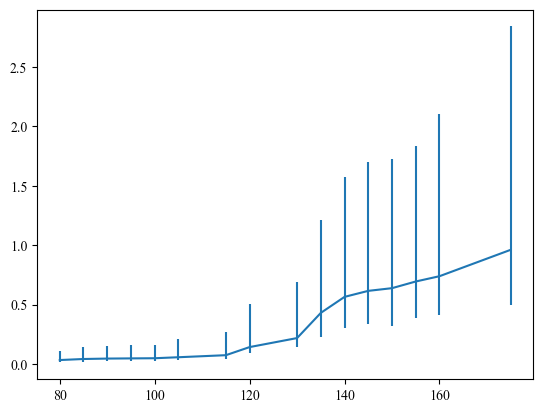

In [521]:
arrival_rates_x = list(sorted(dagsched_runtime_points.keys()))

plt.errorbar(arrival_rates_x, [dagsched_runtime_points[x].p75 for x in arrival_rates_x], yerr=[[dagsched_runtime_points[x].p50 for x in arrival_rates_x], [dagsched_runtime_points[x].p90 for x in arrival_rates_x]])
# plt.errorbar(arrival_rates_x, 
# plt.yscale('log')

In [540]:
def cdf(x):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x, y

x = {}
y = {}

for arrival_rate, points in dagsched_runtimes.items():
    x[arrival_rate], y[arrival_rate] = cdf(points)

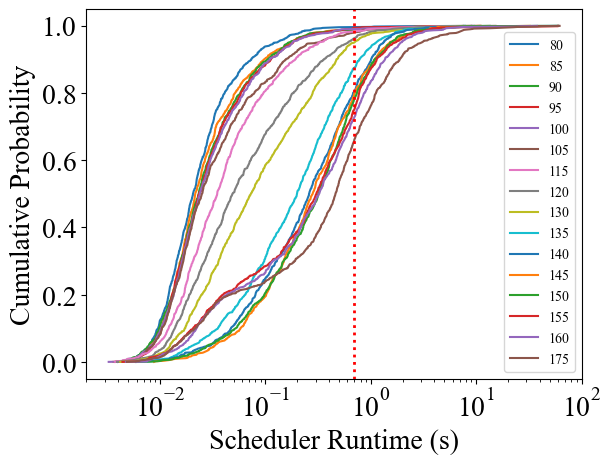

In [609]:
for arrival_rate in dagsched_runtimes.keys():
    plt.plot(x[arrival_rate], y[arrival_rate], label=f"{arrival_rate}")
plt.axvline(x=dagsched_runtime_points[130].p95,color='r', linestyle=':', linewidth=2)
plt.legend()
plt.xscale('log')
plt.xlabel("Scheduler Runtime (s)", fontsize=20)
plt.ylabel("Cumulative Probability", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [551]:
runtimes = to_s([24857,8542,9357,41644,26583,17364,43728,37237,11270,29120,10486,33295,25122,37436,78657,16057,34554,43823,38787,26600,41790,14601,37326,37796,18442,39381,89031,50089,71975,67831,76260,137561,135006,115843,177249,450495,162736,78356,93685,120695,111560,176187,122887,203372,89744,91069,221761,102763,149972,203594,174176,153309,176891,165316,150219,116292,124764,114729,125352,153780,92940,105651,395471,338846,177415,148762,128746,163844,663740,57832,101013,83784,185416,65288,70190,93267,92406,10425251,4118462,5222340,3451665,1073645,1169743,1796415,189730,242961,167162,184830,150931,170957,1430597,1345662,228436,207040,2376260,290617,3480702,275662,6267930,386132,3609409,371261,216098,303361,330887,2394289,562220,335265,2638398,160530,156563,137301,177232,199518,2022438,160938,2040199,177720,166594,156390,1784529,214163,2360159,3252372,263934,4714611,282975,4172496,3783914,319469,7174405,20254387,309474,39633004,62111010,64529724,9756802,1645025,1694141,254734,159740,165746,2778905,168278,341166,292743,2361582,2728032,3529522,655583,6018500,295730,6536427,4804343,2485182,2881872,2400457,258310,2982354,208669,257444,1062775,4305034,462544,4424371,1061124,11041333,355023,60272448,60263416,60159711,9521434,158892,60201771,4081886,60379637,60734043,2054895,402507,7111567,10037395,236400,60343227,19401535,28572562,4393738,2945108,270244,6874828,195822,5660137,1615609,165905,3267751,160625,215589,195447,1929025,137935,189411,1067645,139927,1195191,155735,300205,8520326,1293410,1511682,1142634,1055675,1110478,1115140,330403,207070,1686827,1372522,172550,1225453,226256,266020,1158979,107915,106357,962477,115525,806168,244678,463516,201157,1852780,2273319,204603,5577925,805963,10095749,14208708,186915,60325794,5387171,2544901,2683010,3214776,221483,3025996,4113139,217070,2504080,3395237,3108530,2693316,2658200,264523,1496141,257287,194586,1649539,2468162,510495,3725952,3374606,198442,3707669,61629310,61733415,5782862,1565252,7366435,6540524,53331586,60963059,8570837,184659,1949725,179637,175233,2646891,725856,270703,226654,322214,402384,126323,92047,138446,136623,1019620,137223,358156,177796,106485,105754,729558,121739,913688,2201449,2679852,1373233,1813843,1814241,2555965,3657467,119080,1701349,235663,519330,2875832,290802,485981,280559,265814,127932,142790,1229429,136766,144700,201923,1050219,213531,941584,107793,972294,113184,2100239,247085,198227,138551,2722598,206410,217893,3671838,528141,405353,3473174,6130565,6268307,3898844,523577,442499,390710,369366,279518,285086,307697,2914338,2172081,303152,649666,7829591,527874,331717,321821,3120215,1372600,269846,3641723,314673,5806920,482374,498102,6351946,355119,276800,12131008,41072949,60167716,60376430,60087375,56105044,60114913,60106697,9384309,61636533,33147327,60931807,1836849,1503497,2039689,2108394,365726,12208768,2396685,2717686,3083683,3224100,270899,60732979,13129846,61767708,13553774,197490,7918323,7323770,172857,7669574,5859347,278993,12381645,2065994,1978218,2304368,171605,162223,144495,149200,1463201,271363,138233,237391,309194,392679,222409,165768,111635,1034192,200968,263443,242755,3067171,257026,2946108,2616252,207638,626005,298430,223480,2130255,1847158,196886,2573702,8131627,113133,13490238,6325623,114756,1494098,2113348,176011,383083,418945,193259,214978,2167552,251414,250497,323300,318040,288895,243373,200828,254872,192435,1775022,186432,1170581,792921,431732,334892,5046080,296997,276424,476492,5917427,6130181,434502,430888,3029414,297864,3755361,7277391,573620,4506328,7228067,374409,8372592,6608026,8050737,8091926,3879614,3077167,2125250,4549631,355829,8641885,10883898,60388859,60228967,60098258,15334643,8782487,5279371,4093099,3028447,2775468,253440,3057908,3188897,2911565,361541,3856732,59863925,265086,60200978,14907561,14798555,373853,13938349,4461729,21920193,52865689,281818,26408915,60076615,60252140,60110869,61726158,2912379,155127,141835,128764,125760,1009275,127217,107751,281947,1228714,163122,454170,130746,111292,110567,567525,745858,75009,85797,86867,171031,107105,97136,124543,700601,1607734,196680,1248459,1050420,132874,859635,1510446,117910,1015342,1747285,1103670,1032725,136570,1635881,130731,2998561,168806,130211,1246739,805043,1313179,1284211,119986,129257,335999,1232413,141218,1435679,237057,189839,2178155,159136,183769,1502930,143762,128252,1462814,223814,172419,229122,180196,204459,1343568,1360644,138048,975252,1671317,1861573,5515007,8179371,109705,4913756,3270143,60137770,60953975,17621608,1274256,1035309,13715233,2600252,2627992,357447,2003012,243346,267218,259582,204181,206380,1101600,196272,162039,132202,159177,200110,1427044,306688,5185595,3169345,346720,6763601,4911602,502460,8003226,689585,9546226,4638202,319205,6480370,4819864,12050116,28755956,61851928,63997195,28955814,5984016,278603,2490655,61722971,60285149,43584304,2181599,2333195,57688175,45151132,12082881,27492000,2003582,2625095,2684340,8362021,212234,5765983,4775438,183835,1337003,2611560,350937,1590749,176976,130423,1276474,155458,146280,778339,125704,716959,1502686,118264,2496852,179759,198401,1810406,2825539,263252,7192883,297958,2964872,14898839,3548250,18475259,1343699,1571935,148988,213179,898381,166939,288780,171609,124881,1032696,1108917,1268305,2628955,2366915,236744,2102416,1652101,131366,7833141,837311,60717483,1298262,113543,133933,97804,424984,164066,627346,1251576,139982,648122,143855,174442,1573236,1916585,2109660,155100,142596,2352436,627557,395039,17810248,4414481,3017625,257314,17680183,212932,14510989,19092375,196257,11743110,19934586,283975,61461446,7864263,10398708,2714049,1696923,1815682,4439310,315720,619284,3022413,272593,4036085,240454,2200849,2119167,2796417,785863,300490,2657801,3606748,317801,309498,711493,261222,3734685,397870,556076,2911079,231158,2025783,2114938,249991,60268334,1454096,64193836,723488,861805,1137413,9930645,967931,884223,2387974,1808491,1266766,1873151,1563036,2784332,351959,3925247,21570323,6084909,6226867,5183940,5002932,234245,554985,441792,320678,5553879,154617,2803132,1892964,149797,230454,2119488,133595,1613216,1025751,3761711,150873,999815,1051885,239620,790161,125681,914387,1044128,160343,1556462,1420633,160480,1058311,634717,68296,89450,558250,1553867,2638163,88173,1522850,425019,665116,418492,642032,423483,813793,211225,194815,1985332,1552409,2013230,262808,2167084,230229,1704481,133836,183359,3810222,3230201,354516,4087332,8158991,521049,4898780,2113930,182640,1973617,2437298,262328,1921767,61272077,54820696,3402418,5544584,153063,1766956,5529965,2279352,284888,185402,1665157,2657910,187281,1754232,3269423,184698,220338,195729,1790501,2399188,2687630,302855,213732,280059,1965867,212410,193387,206437,108830,182781,636706,698774,126031,111562,497644,731410,1078930,109271,1059912,183300,176408,1126180,181764,140948,1101222,134924,1310292,1157732,1233623,2172288,1902195,189206,249609,149394,175235,143742,137193,132247,1043493,118705,136863,166934,142317,125152,239528,101932,1047557,1276320,137176,1757123,247821,310912,6838855,5318930,271603,2603819,246005,2297630,2436479,2737383,3531530,2208785,7313239,2455912,2381785,2322969,4039220,3715757,1481029,2161924,150892,150422,174304,141310,163197,248510,1474655,1268882,1187714,852799,1293926,274683,1744016,175785,189972,228608,2592088,2810437,141985,1815159,2262024,172618,3113720,409956,340084,3861830,6310777,4994036,3265844,297753,176293,2652072,609490,284603,3084482,2258557,1828328,1861320,250574,171441,149869,85428,48325,30560])
np.percentile(runtimes, 90)

8.431685599999996

In [552]:
90 / 80

1.125